**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [67]:
import pandas as pd
import numpy as np
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [68]:
# Ваш код здесь
adver_data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [69]:
# Ваш код здесь
# X = adver_data[['TV', 'Radio', 'Newspaper']].to_numpy()  # другой способ
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data.Sales.values

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [70]:
# Ваш код здесь
means = X.mean(axis=0)  # средние значения
stds = X.std(axis=0)  # стандартные отклонения

n_rows = len(X)
n_columns = len(X[0])
X_z = np.zeros(shape=(n_rows, n_columns))  # матрица с будущими Z-значениями

for row in range(n_rows):
    for column in range(n_columns):
        X_z[row][column] = ((X[row][column]-means[column])/stds[column])

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [71]:
# Ваш код здесь
ones = np.ones(shape=(200, 1))
X = np.hstack((ones, X_z))

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [72]:
def mserror(y, y_pred):
    # Ваш код здесь
    return sum((y_pred - y)**2)/len(y)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [73]:
# Ваш код здесь
# создаём pd.Series, заполныенный медианными значениями
series_filled_with_med = pd.Series(np.repeat(adver_data.Sales.median(),
                                             len(adver_data.Sales)),
                                   index=adver_data.Sales.index)

answer1 = mserror(adver_data.Sales, series_filled_with_med)
print(round(answer1, 3))

28.346


In [121]:
with open('linreg_stochastic_grad_descent_1.txt', mode='w') as file:
    file.write(str(round(answer1, 3)))

**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [74]:
# Ваш код здесь
def normal_equation(X, y):
    pinv_X = np.linalg.pinv(X)
    return np.dot(pinv_X, y)

In [75]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [76]:
# Ваш код здесь
answer2 = np.dot(norm_eq_weights, [1, 0, 0, 0])
print(round(answer2, 3))

14.022


In [122]:
with open('linreg_stochastic_grad_descent_2.txt', mode='w') as file:
    file.write(str(round(answer2, 3)))

**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [77]:
# Ваш код здесь
def linear_prediction(X, w):
    n_rows = len(X)
    y_pred = [np.dot(X[row], w) for  row in range(n_rows)]
    return y_pred

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [78]:
y_pred = linear_prediction(X, norm_eq_weights)

In [79]:
answer3 = mserror(y, y_pred) # Ваш код здесь
print(round(answer3, 3))

2.784


In [123]:
with open('linreg_stochastic_grad_descent_3.txt', mode='w') as file:
    file.write(str(round(answer3, 3)))

**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [96]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    # X - в данном случае это признаковое описание одного объёкта выборки / просто одна строка
    # y - в данном случае это одно число / один ответ с тем же индексом строки, что и X
    n = len(y)
    grad0 = 2*((np.dot(X[train_ind], w))-y[train_ind])*X[train_ind][0]
    grad1 = 2*((np.dot(X[train_ind], w))-y[train_ind])*X[train_ind][1]
    grad2 = 2*((np.dot(X[train_ind], w))-y[train_ind])*X[train_ind][2]
    grad3 = 2*((np.dot(X[train_ind], w))-y[train_ind])*X[train_ind][3]
    return  w - eta/n * np.array([grad0, grad1, grad2, grad3])

In [97]:
w = np.array([0, 0, 0, 0])
stochastic_gradient_step(X=X, y=y, w=w, train_ind=80)

array([ 0.00118   , -0.00097336,  0.00027377, -0.00044834])

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

`np.random.seed`  если у вас есть код, который использует случайные числа, которые вы хотите отладить, может быть очень полезно установить начальное значение перед каждым запуском, чтобы код выполнял одно и то же при каждом запуске.

для расчётов нужно искать ошибку по одному элементу выборки и брать от неё градиент, а для мониторинга нужно смотреть общую среднеквадратичную ошибку по всей выборке. 

In [98]:
def stochastic_gradient_descent(X, y, w_init, eta=0.01, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])     
        # Ваш код здесь
        w = stochastic_gradient_step(X=X, y=y, w=w, train_ind=random_ind, eta=eta)
        mse_error = mserror(y=y, y_pred=linear_prediction(X=X, w=w))
        errors.append(mse_error)
        iter_num += 1
        if verbose == True:
            print('iter_num:', iter_num, 'mse_error:', mse_error)
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [104]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X=X, y=y, w_init=w, eta=0.01, max_iter=1e5,
                                                                            min_weight_dist=1e-8, seed=42, verbose=True)# Ваш код здесь

iter_num: 1 mse_error: 223.66538899863156
iter_num: 2 mse_error: 223.63640485031922
iter_num: 3 mse_error: 223.55491009541456
iter_num: 4 mse_error: 223.4807624515579
iter_num: 5 mse_error: 223.47256426508545
iter_num: 6 mse_error: 223.44655231890474
iter_num: 7 mse_error: 223.39175144920213
iter_num: 8 mse_error: 223.3214521757322
iter_num: 9 mse_error: 223.2707462145908
iter_num: 10 mse_error: 223.2585746385283
iter_num: 11 mse_error: 223.20263393030626
iter_num: 12 mse_error: 223.1464246501442
iter_num: 13 mse_error: 223.1182865596016
iter_num: 14 mse_error: 223.05639626029313
iter_num: 15 mse_error: 223.01523254529158
iter_num: 16 mse_error: 222.99035057946475
iter_num: 17 mse_error: 222.98741420324143
iter_num: 18 mse_error: 222.96901770985096
iter_num: 19 mse_error: 222.87192976119704
iter_num: 20 mse_error: 222.84459487822633
iter_num: 21 mse_error: 222.78857273967887
iter_num: 22 mse_error: 222.76972781414096
iter_num: 23 mse_error: 222.72086214383265
iter_num: 24 mse_error: 22

iter_num: 191 mse_error: 215.30377386062187
iter_num: 192 mse_error: 215.26044654631966
iter_num: 193 mse_error: 215.24155800007975
iter_num: 194 mse_error: 215.1268560776807
iter_num: 195 mse_error: 215.104900323985
iter_num: 196 mse_error: 215.07724174081937
iter_num: 197 mse_error: 215.0347630222584
iter_num: 198 mse_error: 215.01081049774746
iter_num: 199 mse_error: 214.90661722922042
iter_num: 200 mse_error: 214.89695426587926
iter_num: 201 mse_error: 214.86590561932752
iter_num: 202 mse_error: 214.80866427557135
iter_num: 203 mse_error: 214.7807038585128
iter_num: 204 mse_error: 214.7472921834304
iter_num: 205 mse_error: 214.632867415376
iter_num: 206 mse_error: 214.54330422034465
iter_num: 207 mse_error: 214.52753141028296
iter_num: 208 mse_error: 214.47411121397298
iter_num: 209 mse_error: 214.45466293431338
iter_num: 210 mse_error: 214.4392512029974
iter_num: 211 mse_error: 214.43665370647648
iter_num: 212 mse_error: 214.4033076206975
iter_num: 213 mse_error: 214.3704204503705

iter_num: 462 mse_error: 203.2841765914216
iter_num: 463 mse_error: 203.16610276256029
iter_num: 464 mse_error: 203.0934942712677
iter_num: 465 mse_error: 203.06560370238773
iter_num: 466 mse_error: 203.05042647318368
iter_num: 467 mse_error: 203.03381360311315
iter_num: 468 mse_error: 203.0132084205734
iter_num: 469 mse_error: 202.96876817337633
iter_num: 470 mse_error: 202.92935345512785
iter_num: 471 mse_error: 202.86064242745644
iter_num: 472 mse_error: 202.8433128379498
iter_num: 473 mse_error: 202.80986904389033
iter_num: 474 mse_error: 202.788276999623
iter_num: 475 mse_error: 202.78085296027024
iter_num: 476 mse_error: 202.73374654942106
iter_num: 477 mse_error: 202.7147341600446
iter_num: 478 mse_error: 202.7090183257437
iter_num: 479 mse_error: 202.68025022115765
iter_num: 480 mse_error: 202.67034774234685
iter_num: 481 mse_error: 202.61510294563013
iter_num: 482 mse_error: 202.5894134451905
iter_num: 483 mse_error: 202.48186450006494
iter_num: 484 mse_error: 202.47456034681


iter_num: 741 mse_error: 192.62294864573397
iter_num: 742 mse_error: 192.53565713782322
iter_num: 743 mse_error: 192.51128963754417
iter_num: 744 mse_error: 192.43161050168376
iter_num: 745 mse_error: 192.42272826723237
iter_num: 746 mse_error: 192.40015013606734
iter_num: 747 mse_error: 192.38441830792735
iter_num: 748 mse_error: 192.32842330599942
iter_num: 749 mse_error: 192.28061986255926
iter_num: 750 mse_error: 192.2621647466932
iter_num: 751 mse_error: 192.1756624261008
iter_num: 752 mse_error: 192.14395264928368
iter_num: 753 mse_error: 192.03275803319906
iter_num: 754 mse_error: 192.01116786985614
iter_num: 755 mse_error: 192.00919824381316
iter_num: 756 mse_error: 191.9848798399607
iter_num: 757 mse_error: 191.95964763440585
iter_num: 758 mse_error: 191.94927211272167
iter_num: 759 mse_error: 191.94384776115606
iter_num: 760 mse_error: 191.89321025385837
iter_num: 761 mse_error: 191.84091232973304
iter_num: 762 mse_error: 191.81530663660928
iter_num: 763 mse_error: 191.735093

iter_num: 1013 mse_error: 182.7307700351547
iter_num: 1014 mse_error: 182.7282242762687
iter_num: 1015 mse_error: 182.70435653401452
iter_num: 1016 mse_error: 182.66562140408016
iter_num: 1017 mse_error: 182.65407932109846
iter_num: 1018 mse_error: 182.63836878708594
iter_num: 1019 mse_error: 182.62304994562453
iter_num: 1020 mse_error: 182.56637165931986
iter_num: 1021 mse_error: 182.54254816355424
iter_num: 1022 mse_error: 182.46450287130813
iter_num: 1023 mse_error: 182.38927692659382
iter_num: 1024 mse_error: 182.33106735225158
iter_num: 1025 mse_error: 182.24572909895397
iter_num: 1026 mse_error: 182.1999595903885
iter_num: 1027 mse_error: 182.19400432472435
iter_num: 1028 mse_error: 182.09724965438662
iter_num: 1029 mse_error: 182.01215216635129
iter_num: 1030 mse_error: 181.9944640735421
iter_num: 1031 mse_error: 181.97414685555515
iter_num: 1032 mse_error: 181.9089963990405
iter_num: 1033 mse_error: 181.8929745819075
iter_num: 1034 mse_error: 181.89172010021414
iter_num: 1035 m

iter_num: 1277 mse_error: 173.5560893102651
iter_num: 1278 mse_error: 173.53341959972533
iter_num: 1279 mse_error: 173.52638423554842
iter_num: 1280 mse_error: 173.50444178318227
iter_num: 1281 mse_error: 173.44873088588153
iter_num: 1282 mse_error: 173.3999210789225
iter_num: 1283 mse_error: 173.39074140684014
iter_num: 1284 mse_error: 173.35081491576264
iter_num: 1285 mse_error: 173.33962725128873
iter_num: 1286 mse_error: 173.29265762971357
iter_num: 1287 mse_error: 173.2490653085419
iter_num: 1288 mse_error: 173.21156270674518
iter_num: 1289 mse_error: 173.19900634141214
iter_num: 1290 mse_error: 173.17680597959713
iter_num: 1291 mse_error: 173.14707276508386
iter_num: 1292 mse_error: 173.13178377247948
iter_num: 1293 mse_error: 173.1000625251697
iter_num: 1294 mse_error: 173.09282931462272
iter_num: 1295 mse_error: 173.0842443450156
iter_num: 1296 mse_error: 173.0695806140707
iter_num: 1297 mse_error: 173.06088961911314
iter_num: 1298 mse_error: 173.03406878100745
iter_num: 1299 m

iter_num: 1554 mse_error: 163.97041287780004
iter_num: 1555 mse_error: 163.88374558473487
iter_num: 1556 mse_error: 163.8688144160105
iter_num: 1557 mse_error: 163.85171124564542
iter_num: 1558 mse_error: 163.82974020588696
iter_num: 1559 mse_error: 163.81145806195366
iter_num: 1560 mse_error: 163.79220196615918
iter_num: 1561 mse_error: 163.7843097551271
iter_num: 1562 mse_error: 163.76273652265422
iter_num: 1563 mse_error: 163.73586973515452
iter_num: 1564 mse_error: 163.72514006576836
iter_num: 1565 mse_error: 163.69926172707346
iter_num: 1566 mse_error: 163.65808754812474
iter_num: 1567 mse_error: 163.59968322853084
iter_num: 1568 mse_error: 163.51989044172626
iter_num: 1569 mse_error: 163.46742232361478
iter_num: 1570 mse_error: 163.4650403372643
iter_num: 1571 mse_error: 163.44038707457744
iter_num: 1572 mse_error: 163.4263304480972
iter_num: 1573 mse_error: 163.40609901564687
iter_num: 1574 mse_error: 163.38840764502658
iter_num: 1575 mse_error: 163.3150787877731
iter_num: 1576 

iter_num: 1803 mse_error: 155.77068062808698
iter_num: 1804 mse_error: 155.70718882086985
iter_num: 1805 mse_error: 155.6846003591369
iter_num: 1806 mse_error: 155.67847241024455
iter_num: 1807 mse_error: 155.66459656461336
iter_num: 1808 mse_error: 155.6511869008223
iter_num: 1809 mse_error: 155.63694089559812
iter_num: 1810 mse_error: 155.62666852544672
iter_num: 1811 mse_error: 155.60261888113374
iter_num: 1812 mse_error: 155.56018307988435
iter_num: 1813 mse_error: 155.54206697578135
iter_num: 1814 mse_error: 155.5381888768523
iter_num: 1815 mse_error: 155.4987420196245
iter_num: 1816 mse_error: 155.48452714526218
iter_num: 1817 mse_error: 155.43591647121826
iter_num: 1818 mse_error: 155.42116573526147
iter_num: 1819 mse_error: 155.38987753073692
iter_num: 1820 mse_error: 155.3580483942046
iter_num: 1821 mse_error: 155.33309556841198
iter_num: 1822 mse_error: 155.3058263607714
iter_num: 1823 mse_error: 155.27685356862037
iter_num: 1824 mse_error: 155.24456734264012
iter_num: 1825 m

iter_num: 1991 mse_error: 150.17866919748525
iter_num: 1992 mse_error: 150.15691837048038
iter_num: 1993 mse_error: 150.1390492725555
iter_num: 1994 mse_error: 150.12170511126135
iter_num: 1995 mse_error: 150.1118082908269
iter_num: 1996 mse_error: 150.09887330310733
iter_num: 1997 mse_error: 150.07150105139374
iter_num: 1998 mse_error: 150.06771026001746
iter_num: 1999 mse_error: 150.0446346812852
iter_num: 2000 mse_error: 149.99675458151748
iter_num: 2001 mse_error: 149.98382251862728
iter_num: 2002 mse_error: 149.9512350808979
iter_num: 2003 mse_error: 149.90396649670578
iter_num: 2004 mse_error: 149.88051872546035
iter_num: 2005 mse_error: 149.84797556616056
iter_num: 2006 mse_error: 149.80816771829785
iter_num: 2007 mse_error: 149.79075704350416
iter_num: 2008 mse_error: 149.7830952692073
iter_num: 2009 mse_error: 149.72992246277622
iter_num: 2010 mse_error: 149.68014494661963
iter_num: 2011 mse_error: 149.64343933984975
iter_num: 2012 mse_error: 149.61462539393014
iter_num: 2013 

iter_num: 2259 mse_error: 142.20967853625257
iter_num: 2260 mse_error: 142.1963492097556
iter_num: 2261 mse_error: 142.17907355585405
iter_num: 2262 mse_error: 142.15735021160197
iter_num: 2263 mse_error: 142.12881808743904
iter_num: 2264 mse_error: 142.12402972817685
iter_num: 2265 mse_error: 142.11452400604
iter_num: 2266 mse_error: 142.05255264530078
iter_num: 2267 mse_error: 142.02929086122535
iter_num: 2268 mse_error: 141.9699695444178
iter_num: 2269 mse_error: 141.92152409988566
iter_num: 2270 mse_error: 141.85990985001172
iter_num: 2271 mse_error: 141.7957357807329
iter_num: 2272 mse_error: 141.7517479670445
iter_num: 2273 mse_error: 141.70010194329262
iter_num: 2274 mse_error: 141.6627514002613
iter_num: 2275 mse_error: 141.6577020994398
iter_num: 2276 mse_error: 141.61280187556648
iter_num: 2277 mse_error: 141.60296824550412
iter_num: 2278 mse_error: 141.58364729606677
iter_num: 2279 mse_error: 141.55140268129654
iter_num: 2280 mse_error: 141.54048257849865
iter_num: 2281 mse_

iter_num: 2523 mse_error: 134.809003011244
iter_num: 2524 mse_error: 134.77992453652655
iter_num: 2525 mse_error: 134.72238185304147
iter_num: 2526 mse_error: 134.71230187529284
iter_num: 2527 mse_error: 134.6865744649015
iter_num: 2528 mse_error: 134.67134915480838
iter_num: 2529 mse_error: 134.60006258194377
iter_num: 2530 mse_error: 134.59187622665127
iter_num: 2531 mse_error: 134.5637143246881
iter_num: 2532 mse_error: 134.5514072183313
iter_num: 2533 mse_error: 134.53103832340923
iter_num: 2534 mse_error: 134.51218461899228
iter_num: 2535 mse_error: 134.50035933124636
iter_num: 2536 mse_error: 134.47966470846072
iter_num: 2537 mse_error: 134.42236056807317
iter_num: 2538 mse_error: 134.39976424037448
iter_num: 2539 mse_error: 134.3907420013937
iter_num: 2540 mse_error: 134.3870619809472
iter_num: 2541 mse_error: 134.33121945922716
iter_num: 2542 mse_error: 134.31932040976025
iter_num: 2543 mse_error: 134.27110573398883
iter_num: 2544 mse_error: 134.22699133460318
iter_num: 2545 ms

iter_num: 2796 mse_error: 128.4920066156866
iter_num: 2797 mse_error: 128.48868427323805
iter_num: 2798 mse_error: 128.46753825431782
iter_num: 2799 mse_error: 128.45201458932664
iter_num: 2800 mse_error: 128.40319582791216
iter_num: 2801 mse_error: 128.33966562538356
iter_num: 2802 mse_error: 128.33763316203854
iter_num: 2803 mse_error: 128.3191436950847
iter_num: 2804 mse_error: 128.30489503318103
iter_num: 2805 mse_error: 128.29065386336333
iter_num: 2806 mse_error: 128.26962984761735
iter_num: 2807 mse_error: 128.2652798097461
iter_num: 2808 mse_error: 128.19375313818406
iter_num: 2809 mse_error: 128.15533607855963
iter_num: 2810 mse_error: 128.13661464986558
iter_num: 2811 mse_error: 128.1288377087486
iter_num: 2812 mse_error: 128.0856931650282
iter_num: 2813 mse_error: 128.07538280056906
iter_num: 2814 mse_error: 128.05830243353117
iter_num: 2815 mse_error: 128.0128140900436
iter_num: 2816 mse_error: 127.99754018798401
iter_num: 2817 mse_error: 127.9678876707067
iter_num: 2818 ms

iter_num: 3054 mse_error: 122.5760026717839
iter_num: 3055 mse_error: 122.55509747088921
iter_num: 3056 mse_error: 122.5306672905343
iter_num: 3057 mse_error: 122.49952234907876
iter_num: 3058 mse_error: 122.47353037620124
iter_num: 3059 mse_error: 122.46292707040047
iter_num: 3060 mse_error: 122.43081325236034
iter_num: 3061 mse_error: 122.42064629225587
iter_num: 3062 mse_error: 122.38244311910978
iter_num: 3063 mse_error: 122.37760301634789
iter_num: 3064 mse_error: 122.32840175305472
iter_num: 3065 mse_error: 122.3194662484128
iter_num: 3066 mse_error: 122.30773180577944
iter_num: 3067 mse_error: 122.30302698784044
iter_num: 3068 mse_error: 122.28302034122882
iter_num: 3069 mse_error: 122.22771061130929
iter_num: 3070 mse_error: 122.22136907335793
iter_num: 3071 mse_error: 122.20481162108263
iter_num: 3072 mse_error: 122.19037752775162
iter_num: 3073 mse_error: 122.18853410918193
iter_num: 3074 mse_error: 122.17381053590401
iter_num: 3075 mse_error: 122.15412414666585
iter_num: 307

iter_num: 3253 mse_error: 117.95153398210935
iter_num: 3254 mse_error: 117.95281007003615
iter_num: 3255 mse_error: 117.93349754129854
iter_num: 3256 mse_error: 117.91568976118626
iter_num: 3257 mse_error: 117.901773027403
iter_num: 3258 mse_error: 117.87031410726537
iter_num: 3259 mse_error: 117.86341284527265
iter_num: 3260 mse_error: 117.85558075166753
iter_num: 3261 mse_error: 117.83990921583634
iter_num: 3262 mse_error: 117.83635612493352
iter_num: 3263 mse_error: 117.81874203046046
iter_num: 3264 mse_error: 117.80407022784449
iter_num: 3265 mse_error: 117.7896795174295
iter_num: 3266 mse_error: 117.78352719908689
iter_num: 3267 mse_error: 117.76461509280179
iter_num: 3268 mse_error: 117.75697949307785
iter_num: 3269 mse_error: 117.74292521628149
iter_num: 3270 mse_error: 117.73677475729365
iter_num: 3271 mse_error: 117.7063473984017
iter_num: 3272 mse_error: 117.69499022006022
iter_num: 3273 mse_error: 117.67867561887938
iter_num: 3274 mse_error: 117.66578679657387
iter_num: 3275

iter_num: 3438 mse_error: 114.0273379585124
iter_num: 3439 mse_error: 114.00755021377682
iter_num: 3440 mse_error: 113.98879319624784
iter_num: 3441 mse_error: 113.98100858807761
iter_num: 3442 mse_error: 113.96580601502711
iter_num: 3443 mse_error: 113.93886248732706
iter_num: 3444 mse_error: 113.93091887531232
iter_num: 3445 mse_error: 113.8944745796285
iter_num: 3446 mse_error: 113.83364001916524
iter_num: 3447 mse_error: 113.82391952299159
iter_num: 3448 mse_error: 113.75168305044805
iter_num: 3449 mse_error: 113.73980785953694
iter_num: 3450 mse_error: 113.70110832446524
iter_num: 3451 mse_error: 113.68523643844061
iter_num: 3452 mse_error: 113.68669196137427
iter_num: 3453 mse_error: 113.66243793304704
iter_num: 3454 mse_error: 113.6511678697976
iter_num: 3455 mse_error: 113.6249483598418
iter_num: 3456 mse_error: 113.6195925551377
iter_num: 3457 mse_error: 113.58579929562907
iter_num: 3458 mse_error: 113.56020768883816
iter_num: 3459 mse_error: 113.55188402963793
iter_num: 3460 

iter_num: 3633 mse_error: 109.8121699321569
iter_num: 3634 mse_error: 109.7941515879773
iter_num: 3635 mse_error: 109.76800348917108
iter_num: 3636 mse_error: 109.76633174759587
iter_num: 3637 mse_error: 109.73776752220165
iter_num: 3638 mse_error: 109.71166871443828
iter_num: 3639 mse_error: 109.69180225482177
iter_num: 3640 mse_error: 109.68461711167815
iter_num: 3641 mse_error: 109.65619342931626
iter_num: 3642 mse_error: 109.63320626220418
iter_num: 3643 mse_error: 109.62599170180616
iter_num: 3644 mse_error: 109.61068487123632
iter_num: 3645 mse_error: 109.58463020967805
iter_num: 3646 mse_error: 109.57426638132263
iter_num: 3647 mse_error: 109.56156955943614
iter_num: 3648 mse_error: 109.54836744878976
iter_num: 3649 mse_error: 109.53909458189257
iter_num: 3650 mse_error: 109.52568146427573
iter_num: 3651 mse_error: 109.48623935931387
iter_num: 3652 mse_error: 109.47284550449413
iter_num: 3653 mse_error: 109.45392547143791
iter_num: 3654 mse_error: 109.43814972505984
iter_num: 36

iter_num: 3828 mse_error: 105.92115564158398
iter_num: 3829 mse_error: 105.88792898085927
iter_num: 3830 mse_error: 105.87616925540988
iter_num: 3831 mse_error: 105.85432476041817
iter_num: 3832 mse_error: 105.84485896340868
iter_num: 3833 mse_error: 105.82762831327385
iter_num: 3834 mse_error: 105.82604272773962
iter_num: 3835 mse_error: 105.80362837561876
iter_num: 3836 mse_error: 105.75681854812741
iter_num: 3837 mse_error: 105.7437924247074
iter_num: 3838 mse_error: 105.7310612160581
iter_num: 3839 mse_error: 105.71663215476032
iter_num: 3840 mse_error: 105.71840604898058
iter_num: 3841 mse_error: 105.69032705242427
iter_num: 3842 mse_error: 105.66827987660638
iter_num: 3843 mse_error: 105.65318478651861
iter_num: 3844 mse_error: 105.65160306323509
iter_num: 3845 mse_error: 105.63914366778765
iter_num: 3846 mse_error: 105.59507542485237
iter_num: 3847 mse_error: 105.58288040929423
iter_num: 3848 mse_error: 105.57821614537058
iter_num: 3849 mse_error: 105.54687965042733
iter_num: 38

iter_num: 4044 mse_error: 101.56927362089242
iter_num: 4045 mse_error: 101.56015586523986
iter_num: 4046 mse_error: 101.55185480122267
iter_num: 4047 mse_error: 101.52182634200615
iter_num: 4048 mse_error: 101.5056944431601
iter_num: 4049 mse_error: 101.46073172065665
iter_num: 4050 mse_error: 101.45061902163123
iter_num: 4051 mse_error: 101.44768418094013
iter_num: 4052 mse_error: 101.44069603943288
iter_num: 4053 mse_error: 101.39837249262557
iter_num: 4054 mse_error: 101.38640106543298
iter_num: 4055 mse_error: 101.38115740747824
iter_num: 4056 mse_error: 101.37831494306967
iter_num: 4057 mse_error: 101.36605782885685
iter_num: 4058 mse_error: 101.3626859293392
iter_num: 4059 mse_error: 101.3528882475894
iter_num: 4060 mse_error: 101.3425339065777
iter_num: 4061 mse_error: 101.32611196840779
iter_num: 4062 mse_error: 101.28520739488893
iter_num: 4063 mse_error: 101.27674575510056
iter_num: 4064 mse_error: 101.21948776499717
iter_num: 4065 mse_error: 101.20504909955974
iter_num: 4066

iter_num: 4241 mse_error: 97.52240397089679
iter_num: 4242 mse_error: 97.52149231738913
iter_num: 4243 mse_error: 97.4786140657953
iter_num: 4244 mse_error: 97.46662091744834
iter_num: 4245 mse_error: 97.44820265590684
iter_num: 4246 mse_error: 97.4451289945648
iter_num: 4247 mse_error: 97.40254048475889
iter_num: 4248 mse_error: 97.38339475895215
iter_num: 4249 mse_error: 97.37437072297027
iter_num: 4250 mse_error: 97.35367223184589
iter_num: 4251 mse_error: 97.34518107184253
iter_num: 4252 mse_error: 97.33324133665961
iter_num: 4253 mse_error: 97.31770126164923
iter_num: 4254 mse_error: 97.30656878039456
iter_num: 4255 mse_error: 97.27318407920713
iter_num: 4256 mse_error: 97.26266590618188
iter_num: 4257 mse_error: 97.23934597351165
iter_num: 4258 mse_error: 97.23274910845863
iter_num: 4259 mse_error: 97.19738356814169
iter_num: 4260 mse_error: 97.15489328866897
iter_num: 4261 mse_error: 97.14313796460418
iter_num: 4262 mse_error: 97.14044024144569
iter_num: 4263 mse_error: 97.13189

iter_num: 4518 mse_error: 92.21001202065123
iter_num: 4519 mse_error: 92.20841696552438
iter_num: 4520 mse_error: 92.1966008468877
iter_num: 4521 mse_error: 92.17424808331175
iter_num: 4522 mse_error: 92.13571495920525
iter_num: 4523 mse_error: 92.12071308943487
iter_num: 4524 mse_error: 92.0822115433216
iter_num: 4525 mse_error: 92.06319536800913
iter_num: 4526 mse_error: 92.04502553606018
iter_num: 4527 mse_error: 92.04411374577211
iter_num: 4528 mse_error: 92.03055068411955
iter_num: 4529 mse_error: 92.02659467242113
iter_num: 4530 mse_error: 91.99740512597741
iter_num: 4531 mse_error: 91.9865964595821
iter_num: 4532 mse_error: 91.93922170374651
iter_num: 4533 mse_error: 91.91553079576468
iter_num: 4534 mse_error: 91.90059353573626
iter_num: 4535 mse_error: 91.88055487620397
iter_num: 4536 mse_error: 91.8623711868229
iter_num: 4537 mse_error: 91.82535774573779
iter_num: 4538 mse_error: 91.81537419947368
iter_num: 4539 mse_error: 91.79347268979429
iter_num: 4540 mse_error: 91.7676671

iter_num: 4768 mse_error: 88.0709876273029
iter_num: 4769 mse_error: 88.05874979030845
iter_num: 4770 mse_error: 88.03909440112713
iter_num: 4771 mse_error: 88.00584532900547
iter_num: 4772 mse_error: 88.00362677244608
iter_num: 4773 mse_error: 87.99247758808411
iter_num: 4774 mse_error: 87.94725327699051
iter_num: 4775 mse_error: 87.92901297652595
iter_num: 4776 mse_error: 87.91727528553983
iter_num: 4777 mse_error: 87.9115715999822
iter_num: 4778 mse_error: 87.90860201513524
iter_num: 4779 mse_error: 87.89545166816926
iter_num: 4780 mse_error: 87.86753098960212
iter_num: 4781 mse_error: 87.86671502434393
iter_num: 4782 mse_error: 87.82158856086069
iter_num: 4783 mse_error: 87.79882156454572
iter_num: 4784 mse_error: 87.79252259035118
iter_num: 4785 mse_error: 87.7803245589932
iter_num: 4786 mse_error: 87.75757374687726
iter_num: 4787 mse_error: 87.72584180362126
iter_num: 4788 mse_error: 87.69412773824406
iter_num: 4789 mse_error: 87.66835869903802
iter_num: 4790 mse_error: 87.670686

iter_num: 5026 mse_error: 83.50726841066171
iter_num: 5027 mse_error: 83.47834124226607
iter_num: 5028 mse_error: 83.44827624056019
iter_num: 5029 mse_error: 83.42170433101039
iter_num: 5030 mse_error: 83.4091580490171
iter_num: 5031 mse_error: 83.40183133045976
iter_num: 5032 mse_error: 83.39357365532872
iter_num: 5033 mse_error: 83.38331141468399
iter_num: 5034 mse_error: 83.36891262604291
iter_num: 5035 mse_error: 83.36511797662152
iter_num: 5036 mse_error: 83.35815355944028
iter_num: 5037 mse_error: 83.35557613619007
iter_num: 5038 mse_error: 83.35407393700953
iter_num: 5039 mse_error: 83.34846783904159
iter_num: 5040 mse_error: 83.34115875527704
iter_num: 5041 mse_error: 83.33390510456178
iter_num: 5042 mse_error: 83.31238073589877
iter_num: 5043 mse_error: 83.30734658339365
iter_num: 5044 mse_error: 83.2951948441918
iter_num: 5045 mse_error: 83.27772161615513
iter_num: 5046 mse_error: 83.26744429073133
iter_num: 5047 mse_error: 83.26250003368074
iter_num: 5048 mse_error: 83.24100

iter_num: 5270 mse_error: 79.94310456179348
iter_num: 5271 mse_error: 79.93117495627922
iter_num: 5272 mse_error: 79.9248066170277
iter_num: 5273 mse_error: 79.91689637632369
iter_num: 5274 mse_error: 79.90735268451303
iter_num: 5275 mse_error: 79.89971169341268
iter_num: 5276 mse_error: 79.89009717794144
iter_num: 5277 mse_error: 79.860354877847
iter_num: 5278 mse_error: 79.84524491234913
iter_num: 5279 mse_error: 79.82565572716825
iter_num: 5280 mse_error: 79.82360766777104
iter_num: 5281 mse_error: 79.81648616733673
iter_num: 5282 mse_error: 79.77569363380523
iter_num: 5283 mse_error: 79.76185979153682
iter_num: 5284 mse_error: 79.75744490135816
iter_num: 5285 mse_error: 79.71668564690914
iter_num: 5286 mse_error: 79.7014267083078
iter_num: 5287 mse_error: 79.68079992343435
iter_num: 5288 mse_error: 79.67125797665483
iter_num: 5289 mse_error: 79.6506382616606
iter_num: 5290 mse_error: 79.64699932882654
iter_num: 5291 mse_error: 79.60564059639698
iter_num: 5292 mse_error: 79.60176853

iter_num: 5540 mse_error: 75.66860559334462
iter_num: 5541 mse_error: 75.6713010997132
iter_num: 5542 mse_error: 75.62921430743717
iter_num: 5543 mse_error: 75.62226184104094
iter_num: 5544 mse_error: 75.59185858160404
iter_num: 5545 mse_error: 75.58229141633063
iter_num: 5546 mse_error: 75.55190658702449
iter_num: 5547 mse_error: 75.51575252658228
iter_num: 5548 mse_error: 75.49818682775249
iter_num: 5549 mse_error: 75.48381075686841
iter_num: 5550 mse_error: 75.47774932561923
iter_num: 5551 mse_error: 75.4515776643833
iter_num: 5552 mse_error: 75.4456505966447
iter_num: 5553 mse_error: 75.43636817950565
iter_num: 5554 mse_error: 75.41158727232137
iter_num: 5555 mse_error: 75.37940857008833
iter_num: 5556 mse_error: 75.34338640017742
iter_num: 5557 mse_error: 75.32093669270841
iter_num: 5558 mse_error: 75.29239571991357
iter_num: 5559 mse_error: 75.28579364112963
iter_num: 5560 mse_error: 75.2687217280352
iter_num: 5561 mse_error: 75.25416573738066
iter_num: 5562 mse_error: 75.2329082

iter_num: 5799 mse_error: 72.00420442437512
iter_num: 5800 mse_error: 71.99038269398461
iter_num: 5801 mse_error: 71.98266796900664
iter_num: 5802 mse_error: 71.96836418454916
iter_num: 5803 mse_error: 71.9676753036138
iter_num: 5804 mse_error: 71.95912588245606
iter_num: 5805 mse_error: 71.9578299080016
iter_num: 5806 mse_error: 71.94623939771274
iter_num: 5807 mse_error: 71.90441183252507
iter_num: 5808 mse_error: 71.88808299284405
iter_num: 5809 mse_error: 71.86395382328676
iter_num: 5810 mse_error: 71.8505663698489
iter_num: 5811 mse_error: 71.83552028000224
iter_num: 5812 mse_error: 71.79528114868707
iter_num: 5813 mse_error: 71.7819485186474
iter_num: 5814 mse_error: 71.77088146515183
iter_num: 5815 mse_error: 71.74501114896911
iter_num: 5816 mse_error: 71.71713106421123
iter_num: 5817 mse_error: 71.69671603878561
iter_num: 5818 mse_error: 71.68575557447943
iter_num: 5819 mse_error: 71.68092503207596
iter_num: 5820 mse_error: 71.67397373703545
iter_num: 5821 mse_error: 71.6630215

iter_num: 6067 mse_error: 68.25262874323025
iter_num: 6068 mse_error: 68.24649615927353
iter_num: 6069 mse_error: 68.24389586295905
iter_num: 6070 mse_error: 68.23452912465227
iter_num: 6071 mse_error: 68.23104881435017
iter_num: 6072 mse_error: 68.21481840643528
iter_num: 6073 mse_error: 68.19942035478101
iter_num: 6074 mse_error: 68.1828588170739
iter_num: 6075 mse_error: 68.15992959347722
iter_num: 6076 mse_error: 68.13275439917555
iter_num: 6077 mse_error: 68.1285680955114
iter_num: 6078 mse_error: 68.12026468166263
iter_num: 6079 mse_error: 68.10571634399946
iter_num: 6080 mse_error: 68.08459799964199
iter_num: 6081 mse_error: 68.08051335968665
iter_num: 6082 mse_error: 68.07786519558907
iter_num: 6083 mse_error: 68.07371721717632
iter_num: 6084 mse_error: 68.05083148639298
iter_num: 6085 mse_error: 68.04053402625044
iter_num: 6086 mse_error: 68.02084050312718
iter_num: 6087 mse_error: 68.01657605694817
iter_num: 6088 mse_error: 68.00400242764456
iter_num: 6089 mse_error: 67.99066

iter_num: 6334 mse_error: 65.00434187013516
iter_num: 6335 mse_error: 64.99941284440693
iter_num: 6336 mse_error: 64.9775002560484
iter_num: 6337 mse_error: 64.95796866509184
iter_num: 6338 mse_error: 64.95050629916518
iter_num: 6339 mse_error: 64.93476902264621
iter_num: 6340 mse_error: 64.92893806434328
iter_num: 6341 mse_error: 64.90129624705914
iter_num: 6342 mse_error: 64.88871021482046
iter_num: 6343 mse_error: 64.88525737380503
iter_num: 6344 mse_error: 64.8828624320868
iter_num: 6345 mse_error: 64.88010529783084
iter_num: 6346 mse_error: 64.86627985765915
iter_num: 6347 mse_error: 64.83203073357684
iter_num: 6348 mse_error: 64.82680896433467
iter_num: 6349 mse_error: 64.81343284148528
iter_num: 6350 mse_error: 64.78704629085398
iter_num: 6351 mse_error: 64.76841256625492
iter_num: 6352 mse_error: 64.74969138286087
iter_num: 6353 mse_error: 64.72961381361822
iter_num: 6354 mse_error: 64.71984975172505
iter_num: 6355 mse_error: 64.71483800918202
iter_num: 6356 mse_error: 64.69042

iter_num: 6602 mse_error: 61.690050751208034
iter_num: 6603 mse_error: 61.684735779737736
iter_num: 6604 mse_error: 61.677684659371145
iter_num: 6605 mse_error: 61.66094834021578
iter_num: 6606 mse_error: 61.65723212854488
iter_num: 6607 mse_error: 61.65345644822046
iter_num: 6608 mse_error: 61.63434473619925
iter_num: 6609 mse_error: 61.61881316536274
iter_num: 6610 mse_error: 61.60543081179364
iter_num: 6611 mse_error: 61.60165820882192
iter_num: 6612 mse_error: 61.59050780836301
iter_num: 6613 mse_error: 61.577484038223794
iter_num: 6614 mse_error: 61.57379559963805
iter_num: 6615 mse_error: 61.56711841937525
iter_num: 6616 mse_error: 61.561985034379525
iter_num: 6617 mse_error: 61.5416461593565
iter_num: 6618 mse_error: 61.534064570849935
iter_num: 6619 mse_error: 61.525984571237935
iter_num: 6620 mse_error: 61.51498189962666
iter_num: 6621 mse_error: 61.50250808734823
iter_num: 6622 mse_error: 61.48538823426938
iter_num: 6623 mse_error: 61.45132056326611
iter_num: 6624 mse_error: 

iter_num: 6873 mse_error: 58.76572302890668
iter_num: 6874 mse_error: 58.758098505876795
iter_num: 6875 mse_error: 58.7516124198145
iter_num: 6876 mse_error: 58.72762532636252
iter_num: 6877 mse_error: 58.712050311955224
iter_num: 6878 mse_error: 58.70862463559088
iter_num: 6879 mse_error: 58.70171806638186
iter_num: 6880 mse_error: 58.69434200512906
iter_num: 6881 mse_error: 58.66935487755973
iter_num: 6882 mse_error: 58.66733721941254
iter_num: 6883 mse_error: 58.651786444267636
iter_num: 6884 mse_error: 58.650728510574524
iter_num: 6885 mse_error: 58.633022169767266
iter_num: 6886 mse_error: 58.622622828855484
iter_num: 6887 mse_error: 58.620614821688896
iter_num: 6888 mse_error: 58.60369516848933
iter_num: 6889 mse_error: 58.585596933591404
iter_num: 6890 mse_error: 58.56869118184084
iter_num: 6891 mse_error: 58.54156286711622
iter_num: 6892 mse_error: 58.5271955055446
iter_num: 6893 mse_error: 58.51928242474592
iter_num: 6894 mse_error: 58.512813182694714
iter_num: 6895 mse_error:

iter_num: 7139 mse_error: 55.81434404227473
iter_num: 7140 mse_error: 55.813295247515015
iter_num: 7141 mse_error: 55.81214429510175
iter_num: 7142 mse_error: 55.807747167821454
iter_num: 7143 mse_error: 55.79045509436151
iter_num: 7144 mse_error: 55.783406839500884
iter_num: 7145 mse_error: 55.759727414498485
iter_num: 7146 mse_error: 55.74031438876072
iter_num: 7147 mse_error: 55.709558492999165
iter_num: 7148 mse_error: 55.69831979159711
iter_num: 7149 mse_error: 55.692678566793404
iter_num: 7150 mse_error: 55.67487797697491
iter_num: 7151 mse_error: 55.66738450175089
iter_num: 7152 mse_error: 55.65694335342051
iter_num: 7153 mse_error: 55.65594750838629
iter_num: 7154 mse_error: 55.650635676670426
iter_num: 7155 mse_error: 55.642652982198214
iter_num: 7156 mse_error: 55.638021553579456
iter_num: 7157 mse_error: 55.62053254892272
iter_num: 7158 mse_error: 55.61725115971101
iter_num: 7159 mse_error: 55.60144247817729
iter_num: 7160 mse_error: 55.590359928681686
iter_num: 7161 mse_err

iter_num: 7326 mse_error: 53.78781671552011
iter_num: 7327 mse_error: 53.758258661669736
iter_num: 7328 mse_error: 53.75137546373266
iter_num: 7329 mse_error: 53.74681852771915
iter_num: 7330 mse_error: 53.74124027322182
iter_num: 7331 mse_error: 53.718859549015264
iter_num: 7332 mse_error: 53.71603499919775
iter_num: 7333 mse_error: 53.71441201110198
iter_num: 7334 mse_error: 53.70809520138784
iter_num: 7335 mse_error: 53.702562280608724
iter_num: 7336 mse_error: 53.69154264176659
iter_num: 7337 mse_error: 53.680354583926245
iter_num: 7338 mse_error: 53.67348795612747
iter_num: 7339 mse_error: 53.66194137996075
iter_num: 7340 mse_error: 53.65542570070807
iter_num: 7341 mse_error: 53.6512492354353
iter_num: 7342 mse_error: 53.65032289708301
iter_num: 7343 mse_error: 53.64939713722573
iter_num: 7344 mse_error: 53.62618157497886
iter_num: 7345 mse_error: 53.61544108978422
iter_num: 7346 mse_error: 53.59903583792961
iter_num: 7347 mse_error: 53.59486180667136
iter_num: 7348 mse_error: 53.

iter_num: 7514 mse_error: 51.870059727535
iter_num: 7515 mse_error: 51.85433238048327
iter_num: 7516 mse_error: 51.82598406296733
iter_num: 7517 mse_error: 51.800454271221334
iter_num: 7518 mse_error: 51.79570752846024
iter_num: 7519 mse_error: 51.78893591432181
iter_num: 7520 mse_error: 51.78391879842337
iter_num: 7521 mse_error: 51.773989220413924
iter_num: 7522 mse_error: 51.761615362580415
iter_num: 7523 mse_error: 51.74880140869403
iter_num: 7524 mse_error: 51.73786891575612
iter_num: 7525 mse_error: 51.736408068921044
iter_num: 7526 mse_error: 51.716322959218026
iter_num: 7527 mse_error: 51.71167337325953
iter_num: 7528 mse_error: 51.69017118083928
iter_num: 7529 mse_error: 51.68513705367943
iter_num: 7530 mse_error: 51.68330448880711
iter_num: 7531 mse_error: 51.67815903279421
iter_num: 7532 mse_error: 51.669075000348656
iter_num: 7533 mse_error: 51.65384201911318
iter_num: 7534 mse_error: 51.635588488988745
iter_num: 7535 mse_error: 51.606325545809135
iter_num: 7536 mse_error: 

iter_num: 7762 mse_error: 49.54324094802196
iter_num: 7763 mse_error: 49.53819055228503
iter_num: 7764 mse_error: 49.54141538702591
iter_num: 7765 mse_error: 49.524270601332425
iter_num: 7766 mse_error: 49.512065427380904
iter_num: 7767 mse_error: 49.50650390928416
iter_num: 7768 mse_error: 49.50173023995023
iter_num: 7769 mse_error: 49.4928850923234
iter_num: 7770 mse_error: 49.4916658118427
iter_num: 7771 mse_error: 49.47389031589943
iter_num: 7772 mse_error: 49.44590096708823
iter_num: 7773 mse_error: 49.435466495062265
iter_num: 7774 mse_error: 49.438691867769506
iter_num: 7775 mse_error: 49.43652337828804
iter_num: 7776 mse_error: 49.42797525968899
iter_num: 7777 mse_error: 49.41012436668451
iter_num: 7778 mse_error: 49.39493550714327
iter_num: 7779 mse_error: 49.36806864690825
iter_num: 7780 mse_error: 49.360194491238914
iter_num: 7781 mse_error: 49.35498539440212
iter_num: 7782 mse_error: 49.34285573798089
iter_num: 7783 mse_error: 49.336438668634294
iter_num: 7784 mse_error: 49

iter_num: 8021 mse_error: 47.249183586093885
iter_num: 8022 mse_error: 47.23701723665496
iter_num: 8023 mse_error: 47.23608078235763
iter_num: 8024 mse_error: 47.23564964241415
iter_num: 8025 mse_error: 47.22893310844655
iter_num: 8026 mse_error: 47.22432476346217
iter_num: 8027 mse_error: 47.218280537864196
iter_num: 8028 mse_error: 47.200083630098746
iter_num: 8029 mse_error: 47.19172080211258
iter_num: 8030 mse_error: 47.16634925522738
iter_num: 8031 mse_error: 47.162636145738325
iter_num: 8032 mse_error: 47.158996129212625
iter_num: 8033 mse_error: 47.13554686859877
iter_num: 8034 mse_error: 47.13024465387697
iter_num: 8035 mse_error: 47.12183623176676
iter_num: 8036 mse_error: 47.11470992324581
iter_num: 8037 mse_error: 47.11084345603864
iter_num: 8038 mse_error: 47.106330785078136
iter_num: 8039 mse_error: 47.095654082328814
iter_num: 8040 mse_error: 47.09100774220126
iter_num: 8041 mse_error: 47.07431655521255
iter_num: 8042 mse_error: 47.06480552524453
iter_num: 8043 mse_error:

iter_num: 8268 mse_error: 45.033434007464564
iter_num: 8269 mse_error: 45.020271035228326
iter_num: 8270 mse_error: 45.0080584608566
iter_num: 8271 mse_error: 44.99978122565147
iter_num: 8272 mse_error: 44.99173217962565
iter_num: 8273 mse_error: 44.98158980809453
iter_num: 8274 mse_error: 44.97230213322906
iter_num: 8275 mse_error: 44.964729567728426
iter_num: 8276 mse_error: 44.963833735282215
iter_num: 8277 mse_error: 44.94769599605157
iter_num: 8278 mse_error: 44.92675285570763
iter_num: 8279 mse_error: 44.92449180051167
iter_num: 8280 mse_error: 44.919049154267526
iter_num: 8281 mse_error: 44.91276714231686
iter_num: 8282 mse_error: 44.911688384903236
iter_num: 8283 mse_error: 44.89148909885831
iter_num: 8284 mse_error: 44.885702404788624
iter_num: 8285 mse_error: 44.88111724620799
iter_num: 8286 mse_error: 44.87432766737297
iter_num: 8287 mse_error: 44.865211586609206
iter_num: 8288 mse_error: 44.86488958606644
iter_num: 8289 mse_error: 44.846116913936385
iter_num: 8290 mse_error

iter_num: 8532 mse_error: 42.91317052485888
iter_num: 8533 mse_error: 42.89473092946229
iter_num: 8534 mse_error: 42.885886474162405
iter_num: 8535 mse_error: 42.869227609652214
iter_num: 8536 mse_error: 42.86189213682828
iter_num: 8537 mse_error: 42.85765800132032
iter_num: 8538 mse_error: 42.842744279064384
iter_num: 8539 mse_error: 42.838246138183315
iter_num: 8540 mse_error: 42.835367088744114
iter_num: 8541 mse_error: 42.83394629017363
iter_num: 8542 mse_error: 42.82999943586856
iter_num: 8543 mse_error: 42.82783489890448
iter_num: 8544 mse_error: 42.815717793243955
iter_num: 8545 mse_error: 42.79482166034981
iter_num: 8546 mse_error: 42.78475102829906
iter_num: 8547 mse_error: 42.77664399178987
iter_num: 8548 mse_error: 42.770657541420825
iter_num: 8549 mse_error: 42.764221847690834
iter_num: 8550 mse_error: 42.761836282635635
iter_num: 8551 mse_error: 42.75517893217786
iter_num: 8552 mse_error: 42.75145502498939
iter_num: 8553 mse_error: 42.74723253768097
iter_num: 8554 mse_erro

iter_num: 8788 mse_error: 40.87122414088101
iter_num: 8789 mse_error: 40.86803062837531
iter_num: 8790 mse_error: 40.86395835584952
iter_num: 8791 mse_error: 40.86015793535459
iter_num: 8792 mse_error: 40.847183872616206
iter_num: 8793 mse_error: 40.846220400169294
iter_num: 8794 mse_error: 40.84323953660518
iter_num: 8795 mse_error: 40.83759559240406
iter_num: 8796 mse_error: 40.826839333315895
iter_num: 8797 mse_error: 40.818208990247
iter_num: 8798 mse_error: 40.81738446975182
iter_num: 8799 mse_error: 40.813776351908196
iter_num: 8800 mse_error: 40.80461575519014
iter_num: 8801 mse_error: 40.80403888397576
iter_num: 8802 mse_error: 40.79208527394167
iter_num: 8803 mse_error: 40.77566802715917
iter_num: 8804 mse_error: 40.7689978053995
iter_num: 8805 mse_error: 40.75140780797487
iter_num: 8806 mse_error: 40.73690085131306
iter_num: 8807 mse_error: 40.74022767453585
iter_num: 8808 mse_error: 40.73928355397895
iter_num: 8809 mse_error: 40.73069081772942
iter_num: 8810 mse_error: 40.72

iter_num: 9053 mse_error: 38.83657189611751
iter_num: 9054 mse_error: 38.82140504981375
iter_num: 9055 mse_error: 38.80962576330566
iter_num: 9056 mse_error: 38.80668990046112
iter_num: 9057 mse_error: 38.8031478432049
iter_num: 9058 mse_error: 38.7924628331069
iter_num: 9059 mse_error: 38.771771080164164
iter_num: 9060 mse_error: 38.77088157899145
iter_num: 9061 mse_error: 38.76610337708844
iter_num: 9062 mse_error: 38.75460249982413
iter_num: 9063 mse_error: 38.750001472256734
iter_num: 9064 mse_error: 38.74587492468659
iter_num: 9065 mse_error: 38.743312757118446
iter_num: 9066 mse_error: 38.73854153289011
iter_num: 9067 mse_error: 38.72629212874387
iter_num: 9068 mse_error: 38.724156925104865
iter_num: 9069 mse_error: 38.71267183540007
iter_num: 9070 mse_error: 38.70978080132872
iter_num: 9071 mse_error: 38.69606446052505
iter_num: 9072 mse_error: 38.68923050523865
iter_num: 9073 mse_error: 38.67995086716142
iter_num: 9074 mse_error: 38.67602013491021
iter_num: 9075 mse_error: 38.6

iter_num: 9321 mse_error: 37.02920360918254
iter_num: 9322 mse_error: 37.028392193503116
iter_num: 9323 mse_error: 37.02511334304168
iter_num: 9324 mse_error: 37.02210618912773
iter_num: 9325 mse_error: 37.01474470910516
iter_num: 9326 mse_error: 37.00048847774064
iter_num: 9327 mse_error: 36.99848380472366
iter_num: 9328 mse_error: 36.995115160008524
iter_num: 9329 mse_error: 36.97451458936822
iter_num: 9330 mse_error: 36.97010709649624
iter_num: 9331 mse_error: 36.968469712399795
iter_num: 9332 mse_error: 36.96106586758921
iter_num: 9333 mse_error: 36.94990380049038
iter_num: 9334 mse_error: 36.93974893719426
iter_num: 9335 mse_error: 36.93818293735565
iter_num: 9336 mse_error: 36.92958661902952
iter_num: 9337 mse_error: 36.926663608216046
iter_num: 9338 mse_error: 36.90508053155388
iter_num: 9339 mse_error: 36.90312119967165
iter_num: 9340 mse_error: 36.88018663004068
iter_num: 9341 mse_error: 36.872953123457506
iter_num: 9342 mse_error: 36.85328180745719
iter_num: 9343 mse_error: 3

iter_num: 9579 mse_error: 35.33112724649203
iter_num: 9580 mse_error: 35.32821720640357
iter_num: 9581 mse_error: 35.32291025713272
iter_num: 9582 mse_error: 35.320989060346065
iter_num: 9583 mse_error: 35.317451144982854
iter_num: 9584 mse_error: 35.31438852223037
iter_num: 9585 mse_error: 35.30736056813081
iter_num: 9586 mse_error: 35.297444056028056
iter_num: 9587 mse_error: 35.29353304260951
iter_num: 9588 mse_error: 35.274941558191394
iter_num: 9589 mse_error: 35.268475002026435
iter_num: 9590 mse_error: 35.26738769503515
iter_num: 9591 mse_error: 35.25439693312131
iter_num: 9592 mse_error: 35.23726916926566
iter_num: 9593 mse_error: 35.226700456252594
iter_num: 9594 mse_error: 35.216220382070425
iter_num: 9595 mse_error: 35.21332262056715
iter_num: 9596 mse_error: 35.203486656495514
iter_num: 9597 mse_error: 35.193121383414784
iter_num: 9598 mse_error: 35.17716736774358
iter_num: 9599 mse_error: 35.170336190891625
iter_num: 9600 mse_error: 35.16942933981516
iter_num: 9601 mse_err

iter_num: 9825 mse_error: 33.797389857504506
iter_num: 9826 mse_error: 33.79168697086557
iter_num: 9827 mse_error: 33.78700595945522
iter_num: 9828 mse_error: 33.780093420318714
iter_num: 9829 mse_error: 33.776647922618935
iter_num: 9830 mse_error: 33.77075272337142
iter_num: 9831 mse_error: 33.75950825860799
iter_num: 9832 mse_error: 33.75575025266256
iter_num: 9833 mse_error: 33.75259110685508
iter_num: 9834 mse_error: 33.748824097198906
iter_num: 9835 mse_error: 33.74799759766888
iter_num: 9836 mse_error: 33.745290232598755
iter_num: 9837 mse_error: 33.73231447131136
iter_num: 9838 mse_error: 33.71136201984287
iter_num: 9839 mse_error: 33.70910601892653
iter_num: 9840 mse_error: 33.696900122996375
iter_num: 9841 mse_error: 33.69820935156972
iter_num: 9842 mse_error: 33.69663387961957
iter_num: 9843 mse_error: 33.69256023306307
iter_num: 9844 mse_error: 33.68912513249242
iter_num: 9845 mse_error: 33.6868719619357
iter_num: 9846 mse_error: 33.68286430997366
iter_num: 9847 mse_error: 3

iter_num: 10095 mse_error: 32.23493715693421
iter_num: 10096 mse_error: 32.217308031054436
iter_num: 10097 mse_error: 32.21671564340344
iter_num: 10098 mse_error: 32.21619793928287
iter_num: 10099 mse_error: 32.213939678122216
iter_num: 10100 mse_error: 32.20889904551564
iter_num: 10101 mse_error: 32.205881268938064
iter_num: 10102 mse_error: 32.202396951553304
iter_num: 10103 mse_error: 32.1965546482297
iter_num: 10104 mse_error: 32.19302069359176
iter_num: 10105 mse_error: 32.18989456121883
iter_num: 10106 mse_error: 32.184663002759336
iter_num: 10107 mse_error: 32.18143067187926
iter_num: 10108 mse_error: 32.17537165472157
iter_num: 10109 mse_error: 32.17334611870665
iter_num: 10110 mse_error: 32.167520828037304
iter_num: 10111 mse_error: 32.16483164155475
iter_num: 10112 mse_error: 32.145887627996636
iter_num: 10113 mse_error: 32.14243557710588
iter_num: 10114 mse_error: 32.13815915302509
iter_num: 10115 mse_error: 32.130100392851425
iter_num: 10116 mse_error: 32.12741141656798
ite

iter_num: 10278 mse_error: 31.092926853666267
iter_num: 10279 mse_error: 31.085362177586358
iter_num: 10280 mse_error: 31.085741856013847
iter_num: 10281 mse_error: 31.08474494253046
iter_num: 10282 mse_error: 31.07955548174268
iter_num: 10283 mse_error: 31.08096403286486
iter_num: 10284 mse_error: 31.066039022805935
iter_num: 10285 mse_error: 31.063587564476087
iter_num: 10286 mse_error: 31.06212782428236
iter_num: 10287 mse_error: 31.059626127488983
iter_num: 10288 mse_error: 31.058631344459307
iter_num: 10289 mse_error: 31.057228912783604
iter_num: 10290 mse_error: 31.054870764508095
iter_num: 10291 mse_error: 31.050452840235895
iter_num: 10292 mse_error: 31.049461957793202
iter_num: 10293 mse_error: 31.045911876140806
iter_num: 10294 mse_error: 31.03737947572314
iter_num: 10295 mse_error: 31.026142435465026
iter_num: 10296 mse_error: 31.022684252248037
iter_num: 10297 mse_error: 31.02053286503854
iter_num: 10298 mse_error: 31.009716856637166
iter_num: 10299 mse_error: 31.0007649898

iter_num: 10541 mse_error: 29.615174567246
iter_num: 10542 mse_error: 29.61348621011801
iter_num: 10543 mse_error: 29.609331561709656
iter_num: 10544 mse_error: 29.59646916310788
iter_num: 10545 mse_error: 29.58956522728451
iter_num: 10546 mse_error: 29.58349750169019
iter_num: 10547 mse_error: 29.579999688584984
iter_num: 10548 mse_error: 29.57845478393127
iter_num: 10549 mse_error: 29.576713168350224
iter_num: 10550 mse_error: 29.574696835458898
iter_num: 10551 mse_error: 29.56338354657244
iter_num: 10552 mse_error: 29.560680188356784
iter_num: 10553 mse_error: 29.55762651712418
iter_num: 10554 mse_error: 29.548999585589744
iter_num: 10555 mse_error: 29.538135732234288
iter_num: 10556 mse_error: 29.537237011448113
iter_num: 10557 mse_error: 29.528197021910206
iter_num: 10558 mse_error: 29.514186423151596
iter_num: 10559 mse_error: 29.511113989273564
iter_num: 10560 mse_error: 29.50757958443229
iter_num: 10561 mse_error: 29.504752044469214
iter_num: 10562 mse_error: 29.49268685300833


iter_num: 10801 mse_error: 28.06141683867744
iter_num: 10802 mse_error: 28.05862552670883
iter_num: 10803 mse_error: 28.05704245133216
iter_num: 10804 mse_error: 28.05694306628396
iter_num: 10805 mse_error: 28.05555275601763
iter_num: 10806 mse_error: 28.05033973186224
iter_num: 10807 mse_error: 28.044337782603993
iter_num: 10808 mse_error: 28.034438959217763
iter_num: 10809 mse_error: 28.023466223028635
iter_num: 10810 mse_error: 28.019540790137103
iter_num: 10811 mse_error: 28.0166428651161
iter_num: 10812 mse_error: 28.01270409606653
iter_num: 10813 mse_error: 27.999317954850504
iter_num: 10814 mse_error: 27.992951575490416
iter_num: 10815 mse_error: 27.981678288780394
iter_num: 10816 mse_error: 27.971824589174986
iter_num: 10817 mse_error: 27.965625687631796
iter_num: 10818 mse_error: 27.962732843268032
iter_num: 10819 mse_error: 27.959449201192864
iter_num: 10820 mse_error: 27.958652636825455
iter_num: 10821 mse_error: 27.958552470762346
iter_num: 10822 mse_error: 27.9546405731903

iter_num: 11029 mse_error: 26.95541178975467
iter_num: 11030 mse_error: 26.949303709665873
iter_num: 11031 mse_error: 26.948569273033947
iter_num: 11032 mse_error: 26.94060481591053
iter_num: 11033 mse_error: 26.938359739595054
iter_num: 11034 mse_error: 26.93795503028671
iter_num: 11035 mse_error: 26.937550571782072
iter_num: 11036 mse_error: 26.934867285451272
iter_num: 11037 mse_error: 26.934024842795473
iter_num: 11038 mse_error: 26.93302005353344
iter_num: 11039 mse_error: 26.93293790269694
iter_num: 11040 mse_error: 26.92705824726021
iter_num: 11041 mse_error: 26.924629503925434
iter_num: 11042 mse_error: 26.919647803173138
iter_num: 11043 mse_error: 26.91640926921583
iter_num: 11044 mse_error: 26.912365703537663
iter_num: 11045 mse_error: 26.906209214138403
iter_num: 11046 mse_error: 26.905275491449032
iter_num: 11047 mse_error: 26.902419577592593
iter_num: 11048 mse_error: 26.899928785884036
iter_num: 11049 mse_error: 26.89750304599334
iter_num: 11050 mse_error: 26.895728893824

iter_num: 11244 mse_error: 26.02085105975696
iter_num: 11245 mse_error: 26.015161145406147
iter_num: 11246 mse_error: 26.01674075049452
iter_num: 11247 mse_error: 26.015980874943235
iter_num: 11248 mse_error: 26.012890516538974
iter_num: 11249 mse_error: 26.00987296683828
iter_num: 11250 mse_error: 26.006185385491463
iter_num: 11251 mse_error: 26.003262475911562
iter_num: 11252 mse_error: 26.003209742119235
iter_num: 11253 mse_error: 26.000827108551302
iter_num: 11254 mse_error: 25.998151959924908
iter_num: 11255 mse_error: 25.998246881138567
iter_num: 11256 mse_error: 25.993537722287634
iter_num: 11257 mse_error: 25.99020720163439
iter_num: 11258 mse_error: 25.988948955110065
iter_num: 11259 mse_error: 25.986215281619224
iter_num: 11260 mse_error: 25.978808976245187
iter_num: 11261 mse_error: 25.971001292741242
iter_num: 11262 mse_error: 25.969609265260296
iter_num: 11263 mse_error: 25.967894267618
iter_num: 11264 mse_error: 25.96257198522988
iter_num: 11265 mse_error: 25.961538078843

iter_num: 11504 mse_error: 24.84899271934541
iter_num: 11505 mse_error: 24.8453030536173
iter_num: 11506 mse_error: 24.838299666656614
iter_num: 11507 mse_error: 24.834065249691676
iter_num: 11508 mse_error: 24.831192094722972
iter_num: 11509 mse_error: 24.829200437462895
iter_num: 11510 mse_error: 24.81589206829163
iter_num: 11511 mse_error: 24.81140685939702
iter_num: 11512 mse_error: 24.80483542555641
iter_num: 11513 mse_error: 24.802211175665498
iter_num: 11514 mse_error: 24.799863376121465
iter_num: 11515 mse_error: 24.79699487056062
iter_num: 11516 mse_error: 24.788092780554663
iter_num: 11517 mse_error: 24.78123653615205
iter_num: 11518 mse_error: 24.776748065289617
iter_num: 11519 mse_error: 24.77226438034487
iter_num: 11520 mse_error: 24.76947265958698
iter_num: 11521 mse_error: 24.76682288670567
iter_num: 11522 mse_error: 24.763943160171948
iter_num: 11523 mse_error: 24.762232582885964
iter_num: 11524 mse_error: 24.75526140765036
iter_num: 11525 mse_error: 24.746396979809383


iter_num: 11687 mse_error: 24.134548944246358
iter_num: 11688 mse_error: 24.13425026016176
iter_num: 11689 mse_error: 24.123001976428316
iter_num: 11690 mse_error: 24.1091767771589
iter_num: 11691 mse_error: 24.106810856973798
iter_num: 11692 mse_error: 24.102338725386844
iter_num: 11693 mse_error: 24.09135338168431
iter_num: 11694 mse_error: 24.07979772873143
iter_num: 11695 mse_error: 24.070849115222053
iter_num: 11696 mse_error: 24.07412225141491
iter_num: 11697 mse_error: 24.071870162322128
iter_num: 11698 mse_error: 24.057566857433006
iter_num: 11699 mse_error: 24.05070731011603
iter_num: 11700 mse_error: 24.047914759736944
iter_num: 11701 mse_error: 24.043837314942657
iter_num: 11702 mse_error: 24.03841711583574
iter_num: 11703 mse_error: 24.03421332521615
iter_num: 11704 mse_error: 24.033629920815684
iter_num: 11705 mse_error: 24.028854233184248
iter_num: 11706 mse_error: 24.02725569927085
iter_num: 11707 mse_error: 24.024910061580105
iter_num: 11708 mse_error: 24.02083701608684

iter_num: 11949 mse_error: 23.090891383139727
iter_num: 11950 mse_error: 23.087992841242276
iter_num: 11951 mse_error: 23.084989594136815
iter_num: 11952 mse_error: 23.082970640943955
iter_num: 11953 mse_error: 23.080732165980365
iter_num: 11954 mse_error: 23.078321862663465
iter_num: 11955 mse_error: 23.072270816932907
iter_num: 11956 mse_error: 23.067000306810282
iter_num: 11957 mse_error: 23.05771704931483
iter_num: 11958 mse_error: 23.055088152475065
iter_num: 11959 mse_error: 23.05175623427442
iter_num: 11960 mse_error: 23.04708447573108
iter_num: 11961 mse_error: 23.045779945817397
iter_num: 11962 mse_error: 23.04159925080179
iter_num: 11963 mse_error: 23.039244876913337
iter_num: 11964 mse_error: 23.035111098406045
iter_num: 11965 mse_error: 23.025828302096198
iter_num: 11966 mse_error: 23.023192026449923
iter_num: 11967 mse_error: 23.020059093948152
iter_num: 11968 mse_error: 23.0167370068128
iter_num: 11969 mse_error: 23.014641922154873
iter_num: 11970 mse_error: 23.0123968801

iter_num: 12242 mse_error: 21.956250196396578
iter_num: 12243 mse_error: 21.952506423448884
iter_num: 12244 mse_error: 21.94923224182419
iter_num: 12245 mse_error: 21.946619878218954
iter_num: 12246 mse_error: 21.94160293478685
iter_num: 12247 mse_error: 21.933506340589318
iter_num: 12248 mse_error: 21.93168292274282
iter_num: 12249 mse_error: 21.92909534926168
iter_num: 12250 mse_error: 21.92341944994746
iter_num: 12251 mse_error: 21.917816577043695
iter_num: 12252 mse_error: 21.91590840510896
iter_num: 12253 mse_error: 21.910284522135996
iter_num: 12254 mse_error: 21.910338717820476
iter_num: 12255 mse_error: 21.907568827858196
iter_num: 12256 mse_error: 21.90491160498824
iter_num: 12257 mse_error: 21.90086059787162
iter_num: 12258 mse_error: 21.891517284986286
iter_num: 12259 mse_error: 21.888237019843846
iter_num: 12260 mse_error: 21.886651607068043
iter_num: 12261 mse_error: 21.886995315282274
iter_num: 12262 mse_error: 21.8853707121711
iter_num: 12263 mse_error: 21.88325313473712

iter_num: 12442 mse_error: 21.19650521956687
iter_num: 12443 mse_error: 21.190890696574435
iter_num: 12444 mse_error: 21.183482575986044
iter_num: 12445 mse_error: 21.177885759095997
iter_num: 12446 mse_error: 21.169357914686458
iter_num: 12447 mse_error: 21.166575927782905
iter_num: 12448 mse_error: 21.163731229114465
iter_num: 12449 mse_error: 21.16171658512271
iter_num: 12450 mse_error: 21.150304450170516
iter_num: 12451 mse_error: 21.147038531942012
iter_num: 12452 mse_error: 21.14539331184829
iter_num: 12453 mse_error: 21.142822481795758
iter_num: 12454 mse_error: 21.141744592611396
iter_num: 12455 mse_error: 21.139722895275472
iter_num: 12456 mse_error: 21.127360043120035
iter_num: 12457 mse_error: 21.122888769919882
iter_num: 12458 mse_error: 21.118316304708284
iter_num: 12459 mse_error: 21.116417899828
iter_num: 12460 mse_error: 21.114171714940156
iter_num: 12461 mse_error: 21.10889824493523
iter_num: 12462 mse_error: 21.10422955233272
iter_num: 12463 mse_error: 21.102077532363

iter_num: 12682 mse_error: 20.37235815384328
iter_num: 12683 mse_error: 20.37113826307099
iter_num: 12684 mse_error: 20.36553405255189
iter_num: 12685 mse_error: 20.361136690445143
iter_num: 12686 mse_error: 20.355796680515528
iter_num: 12687 mse_error: 20.351317822675682
iter_num: 12688 mse_error: 20.350295675201306
iter_num: 12689 mse_error: 20.345115727244593
iter_num: 12690 mse_error: 20.344453838075367
iter_num: 12691 mse_error: 20.340179116827155
iter_num: 12692 mse_error: 20.339254316087448
iter_num: 12693 mse_error: 20.338330240943268
iter_num: 12694 mse_error: 20.328583525594595
iter_num: 12695 mse_error: 20.32705182115309
iter_num: 12696 mse_error: 20.324787152506524
iter_num: 12697 mse_error: 20.321674137486635
iter_num: 12698 mse_error: 20.319002958788566
iter_num: 12699 mse_error: 20.310355021926206
iter_num: 12700 mse_error: 20.30821128180009
iter_num: 12701 mse_error: 20.305896252808502
iter_num: 12702 mse_error: 20.302289350431113
iter_num: 12703 mse_error: 20.300441750

iter_num: 12868 mse_error: 19.728703713145656
iter_num: 12869 mse_error: 19.722811564314963
iter_num: 12870 mse_error: 19.714426467788424
iter_num: 12871 mse_error: 19.7134626886368
iter_num: 12872 mse_error: 19.711825871896284
iter_num: 12873 mse_error: 19.69988945221076
iter_num: 12874 mse_error: 19.699037014798265
iter_num: 12875 mse_error: 19.69713845119492
iter_num: 12876 mse_error: 19.69471562937356
iter_num: 12877 mse_error: 19.69152233544763
iter_num: 12878 mse_error: 19.688902062604267
iter_num: 12879 mse_error: 19.68665695728574
iter_num: 12880 mse_error: 19.685217254654194
iter_num: 12881 mse_error: 19.67956188738667
iter_num: 12882 mse_error: 19.67805956604826
iter_num: 12883 mse_error: 19.676076672525635
iter_num: 12884 mse_error: 19.67435784089879
iter_num: 12885 mse_error: 19.665422217284306
iter_num: 12886 mse_error: 19.66261523872857
iter_num: 12887 mse_error: 19.66212827734371
iter_num: 12888 mse_error: 19.658360194115428
iter_num: 12889 mse_error: 19.651604178162597


iter_num: 13053 mse_error: 19.04843596621187
iter_num: 13054 mse_error: 19.046062350603567
iter_num: 13055 mse_error: 19.044615610932595
iter_num: 13056 mse_error: 19.043509186231677
iter_num: 13057 mse_error: 19.038027919099015
iter_num: 13058 mse_error: 19.035674639069256
iter_num: 13059 mse_error: 19.032700546946145
iter_num: 13060 mse_error: 19.030673550871267
iter_num: 13061 mse_error: 19.028810465611038
iter_num: 13062 mse_error: 19.02844628756014
iter_num: 13063 mse_error: 19.025935677642448
iter_num: 13064 mse_error: 19.029085303974366
iter_num: 13065 mse_error: 19.022759171646015
iter_num: 13066 mse_error: 19.020706971461276
iter_num: 13067 mse_error: 19.017736826127994
iter_num: 13068 mse_error: 19.014542572248292
iter_num: 13069 mse_error: 19.012070229160287
iter_num: 13070 mse_error: 19.009665094696178
iter_num: 13071 mse_error: 19.007628352089053
iter_num: 13072 mse_error: 19.00447504993336
iter_num: 13073 mse_error: 19.001802565150893
iter_num: 13074 mse_error: 19.0011485

iter_num: 13270 mse_error: 18.381749419929644
iter_num: 13271 mse_error: 18.37354113650917
iter_num: 13272 mse_error: 18.368594970841176
iter_num: 13273 mse_error: 18.364687604666322
iter_num: 13274 mse_error: 18.361828448412915
iter_num: 13275 mse_error: 18.35862500647227
iter_num: 13276 mse_error: 18.355535795382675
iter_num: 13277 mse_error: 18.35352394763052
iter_num: 13278 mse_error: 18.351737185893164
iter_num: 13279 mse_error: 18.348605035557107
iter_num: 13280 mse_error: 18.34762649516498
iter_num: 13281 mse_error: 18.340620137739336
iter_num: 13282 mse_error: 18.339172286101025
iter_num: 13283 mse_error: 18.33733678685474
iter_num: 13284 mse_error: 18.3356668581754
iter_num: 13285 mse_error: 18.32779288484777
iter_num: 13286 mse_error: 18.328584911548035
iter_num: 13287 mse_error: 18.324650419510974
iter_num: 13288 mse_error: 18.323395854436697
iter_num: 13289 mse_error: 18.32129035659539
iter_num: 13290 mse_error: 18.31856892992333
iter_num: 13291 mse_error: 18.31339839411380

iter_num: 13456 mse_error: 17.80007737308782
iter_num: 13457 mse_error: 17.799610416957368
iter_num: 13458 mse_error: 17.798689381858296
iter_num: 13459 mse_error: 17.79669609504443
iter_num: 13460 mse_error: 17.799809510325765
iter_num: 13461 mse_error: 17.79899356493183
iter_num: 13462 mse_error: 17.795178763460004
iter_num: 13463 mse_error: 17.79328082129529
iter_num: 13464 mse_error: 17.79133068347385
iter_num: 13465 mse_error: 17.78843136809731
iter_num: 13466 mse_error: 17.78258121906636
iter_num: 13467 mse_error: 17.78040639451742
iter_num: 13468 mse_error: 17.77628560279394
iter_num: 13469 mse_error: 17.76952011817015
iter_num: 13470 mse_error: 17.762760011988767
iter_num: 13471 mse_error: 17.757443725584558
iter_num: 13472 mse_error: 17.752699766841246
iter_num: 13473 mse_error: 17.751524414108275
iter_num: 13474 mse_error: 17.7517995040982
iter_num: 13475 mse_error: 17.751861576416953
iter_num: 13476 mse_error: 17.752136463001282
iter_num: 13477 mse_error: 17.746426499227788


iter_num: 13700 mse_error: 17.133499851586965
iter_num: 13701 mse_error: 17.13034815113842
iter_num: 13702 mse_error: 17.12794386036936
iter_num: 13703 mse_error: 17.127181946315968
iter_num: 13704 mse_error: 17.122795098403696
iter_num: 13705 mse_error: 17.11970168900848
iter_num: 13706 mse_error: 17.11681994867939
iter_num: 13707 mse_error: 17.115433168980086
iter_num: 13708 mse_error: 17.112242219565864
iter_num: 13709 mse_error: 17.10639497459464
iter_num: 13710 mse_error: 17.103483762548834
iter_num: 13711 mse_error: 17.103141027997022
iter_num: 13712 mse_error: 17.101877666715623
iter_num: 13713 mse_error: 17.10010911785476
iter_num: 13714 mse_error: 17.099994901905095
iter_num: 13715 mse_error: 17.097247211078304
iter_num: 13716 mse_error: 17.092681332834253
iter_num: 13717 mse_error: 17.091297884003133
iter_num: 13718 mse_error: 17.090083923342387
iter_num: 13719 mse_error: 17.08756617445504
iter_num: 13720 mse_error: 17.084319913773534
iter_num: 13721 mse_error: 17.08216506921

iter_num: 13911 mse_error: 16.545855605994635
iter_num: 13912 mse_error: 16.53955627671805
iter_num: 13913 mse_error: 16.536939165509867
iter_num: 13914 mse_error: 16.53462391787808
iter_num: 13915 mse_error: 16.534957367736958
iter_num: 13916 mse_error: 16.532200678855215
iter_num: 13917 mse_error: 16.528343742725905
iter_num: 13918 mse_error: 16.525790571805434
iter_num: 13919 mse_error: 16.523626410354048
iter_num: 13920 mse_error: 16.521901915936784
iter_num: 13921 mse_error: 16.51908602961099
iter_num: 13922 mse_error: 16.518205403316735
iter_num: 13923 mse_error: 16.518874885685623
iter_num: 13924 mse_error: 16.51787058513638
iter_num: 13925 mse_error: 16.51452940250097
iter_num: 13926 mse_error: 16.514525100949967
iter_num: 13927 mse_error: 16.510684306793387
iter_num: 13928 mse_error: 16.502783848091585
iter_num: 13929 mse_error: 16.494893048772948
iter_num: 13930 mse_error: 16.4932357910226
iter_num: 13931 mse_error: 16.491046161686896
iter_num: 13932 mse_error: 16.48900415589

iter_num: 14092 mse_error: 16.071579935422776
iter_num: 14093 mse_error: 16.066540789652773
iter_num: 14094 mse_error: 16.062243421494664
iter_num: 14095 mse_error: 16.059025481052554
iter_num: 14096 mse_error: 16.056154293830012
iter_num: 14097 mse_error: 16.056385771021997
iter_num: 14098 mse_error: 16.054131748349413
iter_num: 14099 mse_error: 16.05092114672764
iter_num: 14100 mse_error: 16.049602454018018
iter_num: 14101 mse_error: 16.047699043998488
iter_num: 14102 mse_error: 16.047081679637657
iter_num: 14103 mse_error: 16.044362427956962
iter_num: 14104 mse_error: 16.03477578738959
iter_num: 14105 mse_error: 16.032323744480124
iter_num: 14106 mse_error: 16.03255603756322
iter_num: 14107 mse_error: 16.029531545207863
iter_num: 14108 mse_error: 16.029122083765387
iter_num: 14109 mse_error: 16.027045806781366
iter_num: 14110 mse_error: 16.02714670242114
iter_num: 14111 mse_error: 16.02088717499618
iter_num: 14112 mse_error: 16.01837545646912
iter_num: 14113 mse_error: 16.0190542187

iter_num: 14366 mse_error: 15.322970517226905
iter_num: 14367 mse_error: 15.320186675972455
iter_num: 14368 mse_error: 15.318614394843983
iter_num: 14369 mse_error: 15.315852399491488
iter_num: 14370 mse_error: 15.315063627837558
iter_num: 14371 mse_error: 15.311552755711348
iter_num: 14372 mse_error: 15.308061371829506
iter_num: 14373 mse_error: 15.306523278764203
iter_num: 14374 mse_error: 15.304984544752928
iter_num: 14375 mse_error: 15.303671720986252
iter_num: 14376 mse_error: 15.302204307676284
iter_num: 14377 mse_error: 15.299153980414172
iter_num: 14378 mse_error: 15.289841436381726
iter_num: 14379 mse_error: 15.288200603096973
iter_num: 14380 mse_error: 15.285974705535939
iter_num: 14381 mse_error: 15.2843810028176
iter_num: 14382 mse_error: 15.282447168898843
iter_num: 14383 mse_error: 15.276700449721124
iter_num: 14384 mse_error: 15.276149969376082
iter_num: 14385 mse_error: 15.272390768244458
iter_num: 14386 mse_error: 15.264954418637462
iter_num: 14387 mse_error: 15.261247

iter_num: 14572 mse_error: 14.778642972331099
iter_num: 14573 mse_error: 14.776932308647256
iter_num: 14574 mse_error: 14.773393208044531
iter_num: 14575 mse_error: 14.77161251863883
iter_num: 14576 mse_error: 14.771268625017965
iter_num: 14577 mse_error: 14.764896285913576
iter_num: 14578 mse_error: 14.76220724944757
iter_num: 14579 mse_error: 14.755236934548764
iter_num: 14580 mse_error: 14.75460321736567
iter_num: 14581 mse_error: 14.754541004979686
iter_num: 14582 mse_error: 14.752361476145733
iter_num: 14583 mse_error: 14.74887029552762
iter_num: 14584 mse_error: 14.747425329839503
iter_num: 14585 mse_error: 14.74097486733207
iter_num: 14586 mse_error: 14.738056294711564
iter_num: 14587 mse_error: 14.735139172819444
iter_num: 14588 mse_error: 14.733279826390344
iter_num: 14589 mse_error: 14.731637440467326
iter_num: 14590 mse_error: 14.729345512931216
iter_num: 14591 mse_error: 14.726399906404332
iter_num: 14592 mse_error: 14.726819434301245
iter_num: 14593 mse_error: 14.723932654

iter_num: 14834 mse_error: 14.122784388016617
iter_num: 14835 mse_error: 14.1212190266863
iter_num: 14836 mse_error: 14.121053560105116
iter_num: 14837 mse_error: 14.119590353792686
iter_num: 14838 mse_error: 14.11822882018802
iter_num: 14839 mse_error: 14.112999210866748
iter_num: 14840 mse_error: 14.111198074322587
iter_num: 14841 mse_error: 14.10732230987524
iter_num: 14842 mse_error: 14.105916159785767
iter_num: 14843 mse_error: 14.104445042716291
iter_num: 14844 mse_error: 14.102550716298083
iter_num: 14845 mse_error: 14.100002107489152
iter_num: 14846 mse_error: 14.100028214219323
iter_num: 14847 mse_error: 14.09759261367743
iter_num: 14848 mse_error: 14.096334760281945
iter_num: 14849 mse_error: 14.095067079130013
iter_num: 14850 mse_error: 14.089769783563938
iter_num: 14851 mse_error: 14.087874409066622
iter_num: 14852 mse_error: 14.087377741036596
iter_num: 14853 mse_error: 14.083961485718572
iter_num: 14854 mse_error: 14.079900904338174
iter_num: 14855 mse_error: 14.079322719

iter_num: 15016 mse_error: 13.73899674835594
iter_num: 15017 mse_error: 13.737144604280907
iter_num: 15018 mse_error: 13.735857496989459
iter_num: 15019 mse_error: 13.732102498572017
iter_num: 15020 mse_error: 13.729362115579379
iter_num: 15021 mse_error: 13.728151431003011
iter_num: 15022 mse_error: 13.727643456016686
iter_num: 15023 mse_error: 13.726395998996503
iter_num: 15024 mse_error: 13.722931497923428
iter_num: 15025 mse_error: 13.720259495003747
iter_num: 15026 mse_error: 13.71214034240612
iter_num: 15027 mse_error: 13.711058678277595
iter_num: 15028 mse_error: 13.70678483070234
iter_num: 15029 mse_error: 13.70646683536028
iter_num: 15030 mse_error: 13.702801606873244
iter_num: 15031 mse_error: 13.700965454158263
iter_num: 15032 mse_error: 13.695844301423536
iter_num: 15033 mse_error: 13.694620797587334
iter_num: 15034 mse_error: 13.691083246292333
iter_num: 15035 mse_error: 13.689599922743962
iter_num: 15036 mse_error: 13.68891076909968
iter_num: 15037 mse_error: 13.687642609

iter_num: 15300 mse_error: 13.219453565287056
iter_num: 15301 mse_error: 13.217702539980587
iter_num: 15302 mse_error: 13.216165279560611
iter_num: 15303 mse_error: 13.215234876756924
iter_num: 15304 mse_error: 13.21270568610356
iter_num: 15305 mse_error: 13.210214294080124
iter_num: 15306 mse_error: 13.20944195930293
iter_num: 15307 mse_error: 13.207120636055265
iter_num: 15308 mse_error: 13.207962764245048
iter_num: 15309 mse_error: 13.203110318924711
iter_num: 15310 mse_error: 13.197041673976212
iter_num: 15311 mse_error: 13.197738014410278
iter_num: 15312 mse_error: 13.1958175959142
iter_num: 15313 mse_error: 13.195735287832003
iter_num: 15314 mse_error: 13.194655908637273
iter_num: 15315 mse_error: 13.194499862383267
iter_num: 15316 mse_error: 13.193289967361807
iter_num: 15317 mse_error: 13.189625746247618
iter_num: 15318 mse_error: 13.188650159565569
iter_num: 15319 mse_error: 13.184820886039942
iter_num: 15320 mse_error: 13.179261631404351
iter_num: 15321 mse_error: 13.17486577

iter_num: 15485 mse_error: 12.84724123872329
iter_num: 15486 mse_error: 12.845841967045509
iter_num: 15487 mse_error: 12.845057628366922
iter_num: 15488 mse_error: 12.837321845789743
iter_num: 15489 mse_error: 12.83456814323256
iter_num: 15490 mse_error: 12.826844076347989
iter_num: 15491 mse_error: 12.824642566339953
iter_num: 15492 mse_error: 12.823875705427227
iter_num: 15493 mse_error: 12.822238896469663
iter_num: 15494 mse_error: 12.817570505399136
iter_num: 15495 mse_error: 12.816930588237472
iter_num: 15496 mse_error: 12.816197089978436
iter_num: 15497 mse_error: 12.810390291347487
iter_num: 15498 mse_error: 12.805056979384409
iter_num: 15499 mse_error: 12.80553542431921
iter_num: 15500 mse_error: 12.804127548213714
iter_num: 15501 mse_error: 12.80439280409505
iter_num: 15502 mse_error: 12.80306784887045
iter_num: 15503 mse_error: 12.798452509242823
iter_num: 15504 mse_error: 12.797152732974213
iter_num: 15505 mse_error: 12.791358977151567
iter_num: 15506 mse_error: 12.790168963

iter_num: 15675 mse_error: 12.43139474838408
iter_num: 15676 mse_error: 12.430049482333816
iter_num: 15677 mse_error: 12.429069074930414
iter_num: 15678 mse_error: 12.42767779286261
iter_num: 15679 mse_error: 12.420436055136554
iter_num: 15680 mse_error: 12.418445422062055
iter_num: 15681 mse_error: 12.416901928713731
iter_num: 15682 mse_error: 12.416371925405114
iter_num: 15683 mse_error: 12.415089474709125
iter_num: 15684 mse_error: 12.413625840766967
iter_num: 15685 mse_error: 12.412285312612717
iter_num: 15686 mse_error: 12.41158309154559
iter_num: 15687 mse_error: 12.409387900601695
iter_num: 15688 mse_error: 12.407400565042607
iter_num: 15689 mse_error: 12.40364797451426
iter_num: 15690 mse_error: 12.402307231217929
iter_num: 15691 mse_error: 12.39999765142161
iter_num: 15692 mse_error: 12.399342181014571
iter_num: 15693 mse_error: 12.396338973482095
iter_num: 15694 mse_error: 12.394556311831785
iter_num: 15695 mse_error: 12.392169665669096
iter_num: 15696 mse_error: 12.391854405

iter_num: 15861 mse_error: 12.121680003202181
iter_num: 15862 mse_error: 12.120140258486735
iter_num: 15863 mse_error: 12.119158220964469
iter_num: 15864 mse_error: 12.119639735957088
iter_num: 15865 mse_error: 12.1191122706027
iter_num: 15866 mse_error: 12.118472953652269
iter_num: 15867 mse_error: 12.112240006602763
iter_num: 15868 mse_error: 12.110851283973743
iter_num: 15869 mse_error: 12.109282598356236
iter_num: 15870 mse_error: 12.109269848356416
iter_num: 15871 mse_error: 12.1048703988807
iter_num: 15872 mse_error: 12.10295053027086
iter_num: 15873 mse_error: 12.101756658895683
iter_num: 15874 mse_error: 12.099335600887603
iter_num: 15875 mse_error: 12.098218611608736
iter_num: 15876 mse_error: 12.09646817974314
iter_num: 15877 mse_error: 12.095082245723146
iter_num: 15878 mse_error: 12.094476310430046
iter_num: 15879 mse_error: 12.093562050424707
iter_num: 15880 mse_error: 12.092033203880419
iter_num: 15881 mse_error: 12.089056464653009
iter_num: 15882 mse_error: 12.0885007514

iter_num: 16121 mse_error: 11.645977889929462
iter_num: 16122 mse_error: 11.641771615661964
iter_num: 16123 mse_error: 11.637187328451187
iter_num: 16124 mse_error: 11.636686915248957
iter_num: 16125 mse_error: 11.633191523497576
iter_num: 16126 mse_error: 11.631069180336626
iter_num: 16127 mse_error: 11.629811354421227
iter_num: 16128 mse_error: 11.628521883530174
iter_num: 16129 mse_error: 11.623287883396284
iter_num: 16130 mse_error: 11.6234688958157
iter_num: 16131 mse_error: 11.61927475031673
iter_num: 16132 mse_error: 11.616944639020435
iter_num: 16133 mse_error: 11.615303253474348
iter_num: 16134 mse_error: 11.615553326153027
iter_num: 16135 mse_error: 11.614648791667525
iter_num: 16136 mse_error: 11.613793046425021
iter_num: 16137 mse_error: 11.613017130116155
iter_num: 16138 mse_error: 11.609239784855312
iter_num: 16139 mse_error: 11.608576992370295
iter_num: 16140 mse_error: 11.606863552411733
iter_num: 16141 mse_error: 11.60735531956447
iter_num: 16142 mse_error: 11.60643699

iter_num: 16301 mse_error: 11.35117121384151
iter_num: 16302 mse_error: 11.351273641831954
iter_num: 16303 mse_error: 11.348266202746402
iter_num: 16304 mse_error: 11.346893961743804
iter_num: 16305 mse_error: 11.34242682118234
iter_num: 16306 mse_error: 11.342294938102613
iter_num: 16307 mse_error: 11.341100152461317
iter_num: 16308 mse_error: 11.33983321850439
iter_num: 16309 mse_error: 11.33953280813312
iter_num: 16310 mse_error: 11.335336310344369
iter_num: 16311 mse_error: 11.334519468578891
iter_num: 16312 mse_error: 11.332465534684943
iter_num: 16313 mse_error: 11.32971943304652
iter_num: 16314 mse_error: 11.327959963636593
iter_num: 16315 mse_error: 11.323769493879622
iter_num: 16316 mse_error: 11.322556256194611
iter_num: 16317 mse_error: 11.318517768778896
iter_num: 16318 mse_error: 11.31448250962459
iter_num: 16319 mse_error: 11.31185659038804
iter_num: 16320 mse_error: 11.31044243355363
iter_num: 16321 mse_error: 11.309623454774771
iter_num: 16322 mse_error: 11.308366798414

iter_num: 16565 mse_error: 10.93036200840596
iter_num: 16566 mse_error: 10.928323969553626
iter_num: 16567 mse_error: 10.926376863047379
iter_num: 16568 mse_error: 10.925254177691604
iter_num: 16569 mse_error: 10.923172231158505
iter_num: 16570 mse_error: 10.922165181221667
iter_num: 16571 mse_error: 10.92154312646801
iter_num: 16572 mse_error: 10.919592418325465
iter_num: 16573 mse_error: 10.918803292139227
iter_num: 16574 mse_error: 10.91326237625401
iter_num: 16575 mse_error: 10.912450835189944
iter_num: 16576 mse_error: 10.91099414009931
iter_num: 16577 mse_error: 10.906104123088886
iter_num: 16578 mse_error: 10.90658367450239
iter_num: 16579 mse_error: 10.905510103723511
iter_num: 16580 mse_error: 10.904980926223265
iter_num: 16581 mse_error: 10.902900877437833
iter_num: 16582 mse_error: 10.902563312469017
iter_num: 16583 mse_error: 10.90222596622176
iter_num: 16584 mse_error: 10.901584446970398
iter_num: 16585 mse_error: 10.90208637334943
iter_num: 16586 mse_error: 10.90098184061

iter_num: 16746 mse_error: 10.649070858357398
iter_num: 16747 mse_error: 10.647187154461278
iter_num: 16748 mse_error: 10.644928933360834
iter_num: 16749 mse_error: 10.643746315772106
iter_num: 16750 mse_error: 10.64274878372597
iter_num: 16751 mse_error: 10.63807997815938
iter_num: 16752 mse_error: 10.634892655754381
iter_num: 16753 mse_error: 10.63379403123462
iter_num: 16754 mse_error: 10.633183931178275
iter_num: 16755 mse_error: 10.632049215143168
iter_num: 16756 mse_error: 10.631439960208198
iter_num: 16757 mse_error: 10.630445397984685
iter_num: 16758 mse_error: 10.629603848337336
iter_num: 16759 mse_error: 10.629827187664757
iter_num: 16760 mse_error: 10.626075911391295
iter_num: 16761 mse_error: 10.62584765879545
iter_num: 16762 mse_error: 10.62437774193823
iter_num: 16763 mse_error: 10.623304924947583
iter_num: 16764 mse_error: 10.618500035296416
iter_num: 16765 mse_error: 10.617152308094914
iter_num: 16766 mse_error: 10.616760645630166
iter_num: 16767 mse_error: 10.615632932

iter_num: 17005 mse_error: 10.223873807836021
iter_num: 17006 mse_error: 10.22276222090347
iter_num: 17007 mse_error: 10.22173069930291
iter_num: 17008 mse_error: 10.218099919304773
iter_num: 17009 mse_error: 10.216088013508278
iter_num: 17010 mse_error: 10.21565765324247
iter_num: 17011 mse_error: 10.214613446315287
iter_num: 17012 mse_error: 10.212603289513464
iter_num: 17013 mse_error: 10.210152464683816
iter_num: 17014 mse_error: 10.207777266483891
iter_num: 17015 mse_error: 10.206498999831433
iter_num: 17016 mse_error: 10.205067601795406
iter_num: 17017 mse_error: 10.204181510286624
iter_num: 17018 mse_error: 10.202581680075307
iter_num: 17019 mse_error: 10.196569203989807
iter_num: 17020 mse_error: 10.194798390828412
iter_num: 17021 mse_error: 10.194741483096507
iter_num: 17022 mse_error: 10.19359145332718
iter_num: 17023 mse_error: 10.192434702320389
iter_num: 17024 mse_error: 10.18735739743445
iter_num: 17025 mse_error: 10.186175236696982
iter_num: 17026 mse_error: 10.185135628

iter_num: 17186 mse_error: 9.963186109474641
iter_num: 17187 mse_error: 9.963357158403747
iter_num: 17188 mse_error: 9.961212661742632
iter_num: 17189 mse_error: 9.96062620906009
iter_num: 17190 mse_error: 9.958482718951975
iter_num: 17191 mse_error: 9.956454443221135
iter_num: 17192 mse_error: 9.955869672415131
iter_num: 17193 mse_error: 9.949994786825645
iter_num: 17194 mse_error: 9.949144568031898
iter_num: 17195 mse_error: 9.948012150085233
iter_num: 17196 mse_error: 9.946325733711264
iter_num: 17197 mse_error: 9.943246898317769
iter_num: 17198 mse_error: 9.942402280902472
iter_num: 17199 mse_error: 9.938899485198306
iter_num: 17200 mse_error: 9.935032410882313
iter_num: 17201 mse_error: 9.934409933092498
iter_num: 17202 mse_error: 9.934639490963189
iter_num: 17203 mse_error: 9.932958974907562
iter_num: 17204 mse_error: 9.929460737027592
iter_num: 17205 mse_error: 9.930266014471558
iter_num: 17206 mse_error: 9.928247971392063
iter_num: 17207 mse_error: 9.92435978902225
iter_num: 17

iter_num: 17458 mse_error: 9.60680581719761
iter_num: 17459 mse_error: 9.606463224138144
iter_num: 17460 mse_error: 9.607114991221124
iter_num: 17461 mse_error: 9.602881577442764
iter_num: 17462 mse_error: 9.60129165552195
iter_num: 17463 mse_error: 9.59903817445384
iter_num: 17464 mse_error: 9.596613507155698
iter_num: 17465 mse_error: 9.595660556876698
iter_num: 17466 mse_error: 9.593975740629078
iter_num: 17467 mse_error: 9.590051583742516
iter_num: 17468 mse_error: 9.588134249327277
iter_num: 17469 mse_error: 9.5886583040982
iter_num: 17470 mse_error: 9.588273680819837
iter_num: 17471 mse_error: 9.587865184039718
iter_num: 17472 mse_error: 9.589213341219589
iter_num: 17473 mse_error: 9.590563659500482
iter_num: 17474 mse_error: 9.590069347072404
iter_num: 17475 mse_error: 9.585325924777951
iter_num: 17476 mse_error: 9.58477427385781
iter_num: 17477 mse_error: 9.58475870015979
iter_num: 17478 mse_error: 9.583401145254927
iter_num: 17479 mse_error: 9.57948291517398
iter_num: 17480 ms

iter_num: 17730 mse_error: 9.261960027417295
iter_num: 17731 mse_error: 9.262253602834333
iter_num: 17732 mse_error: 9.260733666694097
iter_num: 17733 mse_error: 9.259858165066872
iter_num: 17734 mse_error: 9.258239332518402
iter_num: 17735 mse_error: 9.257502565837056
iter_num: 17736 mse_error: 9.256108377988307
iter_num: 17737 mse_error: 9.255013810660968
iter_num: 17738 mse_error: 9.253261170695263
iter_num: 17739 mse_error: 9.248723000597018
iter_num: 17740 mse_error: 9.24791957444649
iter_num: 17741 mse_error: 9.247441343511605
iter_num: 17742 mse_error: 9.24718075561122
iter_num: 17743 mse_error: 9.246726202347938
iter_num: 17744 mse_error: 9.245834677544217
iter_num: 17745 mse_error: 9.245321799266343
iter_num: 17746 mse_error: 9.24420870669971
iter_num: 17747 mse_error: 9.243155103407819
iter_num: 17748 mse_error: 9.241611799522435
iter_num: 17749 mse_error: 9.241732433463353
iter_num: 17750 mse_error: 9.238525093084458
iter_num: 17751 mse_error: 9.235383900830403
iter_num: 177

iter_num: 18000 mse_error: 8.921797884426251
iter_num: 18001 mse_error: 8.921218975361104
iter_num: 18002 mse_error: 8.91879911798734
iter_num: 18003 mse_error: 8.91871192942512
iter_num: 18004 mse_error: 8.917688097291602
iter_num: 18005 mse_error: 8.91566675817085
iter_num: 18006 mse_error: 8.91074594587135
iter_num: 18007 mse_error: 8.910163027011999
iter_num: 18008 mse_error: 8.907817956025667
iter_num: 18009 mse_error: 8.906623038824707
iter_num: 18010 mse_error: 8.907146905176738
iter_num: 18011 mse_error: 8.904827136728072
iter_num: 18012 mse_error: 8.90339946026418
iter_num: 18013 mse_error: 8.90281737587473
iter_num: 18014 mse_error: 8.90248953098431
iter_num: 18015 mse_error: 8.90057238884562
iter_num: 18016 mse_error: 8.900752407440871
iter_num: 18017 mse_error: 8.898686256931407
iter_num: 18018 mse_error: 8.89874047294388
iter_num: 18019 mse_error: 8.896777975255262
iter_num: 18020 mse_error: 8.897444502356672
iter_num: 18021 mse_error: 8.895483071068229
iter_num: 18022 mse

iter_num: 18184 mse_error: 8.704956358183244
iter_num: 18185 mse_error: 8.703781018357288
iter_num: 18186 mse_error: 8.702182158769057
iter_num: 18187 mse_error: 8.701262165465748
iter_num: 18188 mse_error: 8.701949260551004
iter_num: 18189 mse_error: 8.700794089936638
iter_num: 18190 mse_error: 8.699922022048721
iter_num: 18191 mse_error: 8.699405140856078
iter_num: 18192 mse_error: 8.698398238075479
iter_num: 18193 mse_error: 8.695010416652636
iter_num: 18194 mse_error: 8.694686972838271
iter_num: 18195 mse_error: 8.693982902161995
iter_num: 18196 mse_error: 8.69277286048266
iter_num: 18197 mse_error: 8.690870590397516
iter_num: 18198 mse_error: 8.68940075069479
iter_num: 18199 mse_error: 8.687230524957075
iter_num: 18200 mse_error: 8.686670469906495
iter_num: 18201 mse_error: 8.6856310434283
iter_num: 18202 mse_error: 8.68388028700829
iter_num: 18203 mse_error: 8.682230554768278
iter_num: 18204 mse_error: 8.681343906035682
iter_num: 18205 mse_error: 8.67997042430035
iter_num: 18206 

iter_num: 18456 mse_error: 8.38460446532046
iter_num: 18457 mse_error: 8.38276839045654
iter_num: 18458 mse_error: 8.381791765362395
iter_num: 18459 mse_error: 8.38165697269465
iter_num: 18460 mse_error: 8.380955704465906
iter_num: 18461 mse_error: 8.38063804433182
iter_num: 18462 mse_error: 8.380674897411843
iter_num: 18463 mse_error: 8.380255512227505
iter_num: 18464 mse_error: 8.379633626370595
iter_num: 18465 mse_error: 8.379392134265167
iter_num: 18466 mse_error: 8.37822961865132
iter_num: 18467 mse_error: 8.37821252810042
iter_num: 18468 mse_error: 8.37651907775353
iter_num: 18469 mse_error: 8.375559879007561
iter_num: 18470 mse_error: 8.37440951490939
iter_num: 18471 mse_error: 8.373554669889367
iter_num: 18472 mse_error: 8.370504126811904
iter_num: 18473 mse_error: 8.368976005614407
iter_num: 18474 mse_error: 8.366727991390261
iter_num: 18475 mse_error: 8.365844556788918
iter_num: 18476 mse_error: 8.365427156388662
iter_num: 18477 mse_error: 8.36336987533071
iter_num: 18478 mse

iter_num: 18724 mse_error: 8.081370709681412
iter_num: 18725 mse_error: 8.081330871961597
iter_num: 18726 mse_error: 8.081202442253437
iter_num: 18727 mse_error: 8.07911225387026
iter_num: 18728 mse_error: 8.076234866162592
iter_num: 18729 mse_error: 8.075254987353457
iter_num: 18730 mse_error: 8.074374495771096
iter_num: 18731 mse_error: 8.07358336706312
iter_num: 18732 mse_error: 8.072816482238231
iter_num: 18733 mse_error: 8.07289610255042
iter_num: 18734 mse_error: 8.072026260739946
iter_num: 18735 mse_error: 8.069350328082125
iter_num: 18736 mse_error: 8.067391625356969
iter_num: 18737 mse_error: 8.066086273452841
iter_num: 18738 mse_error: 8.065076151224119
iter_num: 18739 mse_error: 8.063864720279028
iter_num: 18740 mse_error: 8.063555056875009
iter_num: 18741 mse_error: 8.064039554897683
iter_num: 18742 mse_error: 8.06173534593539
iter_num: 18743 mse_error: 8.06230270114983
iter_num: 18744 mse_error: 8.062893831475455
iter_num: 18745 mse_error: 8.062164797055384
iter_num: 18746

iter_num: 18952 mse_error: 7.8471015605014225
iter_num: 18953 mse_error: 7.847849484863514
iter_num: 18954 mse_error: 7.847176323850185
iter_num: 18955 mse_error: 7.8464339253481965
iter_num: 18956 mse_error: 7.846752202407435
iter_num: 18957 mse_error: 7.847652849311021
iter_num: 18958 mse_error: 7.847294562816136
iter_num: 18959 mse_error: 7.847120168924956
iter_num: 18960 mse_error: 7.845341224772096
iter_num: 18961 mse_error: 7.844878353425936
iter_num: 18962 mse_error: 7.843937619318381
iter_num: 18963 mse_error: 7.841114413963445
iter_num: 18964 mse_error: 7.840019438090135
iter_num: 18965 mse_error: 7.8399331580631895
iter_num: 18966 mse_error: 7.839410148552179
iter_num: 18967 mse_error: 7.836892027492224
iter_num: 18968 mse_error: 7.8367510503511175
iter_num: 18969 mse_error: 7.836681560173671
iter_num: 18970 mse_error: 7.836621399067268
iter_num: 18971 mse_error: 7.8358852977101545
iter_num: 18972 mse_error: 7.835049815612722
iter_num: 18973 mse_error: 7.834606662370495
iter_

iter_num: 19196 mse_error: 7.635970062857537
iter_num: 19197 mse_error: 7.635230650881941
iter_num: 19198 mse_error: 7.6351847776715935
iter_num: 19199 mse_error: 7.635921126418241
iter_num: 19200 mse_error: 7.633446603425582
iter_num: 19201 mse_error: 7.633367185353302
iter_num: 19202 mse_error: 7.63148829589973
iter_num: 19203 mse_error: 7.629069521254604
iter_num: 19204 mse_error: 7.628462230286233
iter_num: 19205 mse_error: 7.628132488749759
iter_num: 19206 mse_error: 7.62688237559149
iter_num: 19207 mse_error: 7.624102475476483
iter_num: 19208 mse_error: 7.623403637589197
iter_num: 19209 mse_error: 7.622204346290889
iter_num: 19210 mse_error: 7.621458685171889
iter_num: 19211 mse_error: 7.621338364462371
iter_num: 19212 mse_error: 7.62073271070617
iter_num: 19213 mse_error: 7.619404165150732
iter_num: 19214 mse_error: 7.618949724708134
iter_num: 19215 mse_error: 7.617075114572016
iter_num: 19216 mse_error: 7.6157180429288935
iter_num: 19217 mse_error: 7.614535687835378
iter_num: 1

iter_num: 19423 mse_error: 7.441671838774266
iter_num: 19424 mse_error: 7.441011434287258
iter_num: 19425 mse_error: 7.439982679057697
iter_num: 19426 mse_error: 7.439614866067529
iter_num: 19427 mse_error: 7.438480643427548
iter_num: 19428 mse_error: 7.437524727593652
iter_num: 19429 mse_error: 7.435220739122042
iter_num: 19430 mse_error: 7.434592140122475
iter_num: 19431 mse_error: 7.43339524985398
iter_num: 19432 mse_error: 7.429512244332651
iter_num: 19433 mse_error: 7.428677000247965
iter_num: 19434 mse_error: 7.428359762571853
iter_num: 19435 mse_error: 7.4279463592405826
iter_num: 19436 mse_error: 7.426992584211715
iter_num: 19437 mse_error: 7.426081463444709
iter_num: 19438 mse_error: 7.425583731763794
iter_num: 19439 mse_error: 7.424559242824427
iter_num: 19440 mse_error: 7.423725949287249
iter_num: 19441 mse_error: 7.423282370549614
iter_num: 19442 mse_error: 7.422764665821984
iter_num: 19443 mse_error: 7.421628107730355
iter_num: 19444 mse_error: 7.420403600111187
iter_num: 

iter_num: 19605 mse_error: 7.2770779130763
iter_num: 19606 mse_error: 7.275964060323415
iter_num: 19607 mse_error: 7.275269167920344
iter_num: 19608 mse_error: 7.274567785712143
iter_num: 19609 mse_error: 7.27437561990563
iter_num: 19610 mse_error: 7.273914000139995
iter_num: 19611 mse_error: 7.272149051794263
iter_num: 19612 mse_error: 7.271298178530689
iter_num: 19613 mse_error: 7.271915792702474
iter_num: 19614 mse_error: 7.271042507706812
iter_num: 19615 mse_error: 7.270203755854093
iter_num: 19616 mse_error: 7.269632789044326
iter_num: 19617 mse_error: 7.266902289985977
iter_num: 19618 mse_error: 7.266590218431427
iter_num: 19619 mse_error: 7.265610252104511
iter_num: 19620 mse_error: 7.262884836315181
iter_num: 19621 mse_error: 7.26112347516797
iter_num: 19622 mse_error: 7.260013382760056
iter_num: 19623 mse_error: 7.259426049368268
iter_num: 19624 mse_error: 7.258044998447677
iter_num: 19625 mse_error: 7.257551437038285
iter_num: 19626 mse_error: 7.256170965823858
iter_num: 1962

iter_num: 19788 mse_error: 7.149018017022154
iter_num: 19789 mse_error: 7.146061439503469
iter_num: 19790 mse_error: 7.145269721615425
iter_num: 19791 mse_error: 7.144650376511322
iter_num: 19792 mse_error: 7.144468773013284
iter_num: 19793 mse_error: 7.142761754313779
iter_num: 19794 mse_error: 7.14210180769608
iter_num: 19795 mse_error: 7.141481830346784
iter_num: 19796 mse_error: 7.140705681360731
iter_num: 19797 mse_error: 7.141206326079057
iter_num: 19798 mse_error: 7.139895804798604
iter_num: 19799 mse_error: 7.138808386328688
iter_num: 19800 mse_error: 7.137500336444803
iter_num: 19801 mse_error: 7.1365113359586845
iter_num: 19802 mse_error: 7.136181429036708
iter_num: 19803 mse_error: 7.136056459538627
iter_num: 19804 mse_error: 7.135361919010008
iter_num: 19805 mse_error: 7.134667723009412
iter_num: 19806 mse_error: 7.134213784454101
iter_num: 19807 mse_error: 7.133134885787208
iter_num: 19808 mse_error: 7.131977549189901
iter_num: 19809 mse_error: 7.132050457443137
iter_num: 

iter_num: 20058 mse_error: 6.911136718266916
iter_num: 20059 mse_error: 6.91080531094538
iter_num: 20060 mse_error: 6.910467286025383
iter_num: 20061 mse_error: 6.908932134613817
iter_num: 20062 mse_error: 6.908516207748669
iter_num: 20063 mse_error: 6.9084933709461325
iter_num: 20064 mse_error: 6.90832289953037
iter_num: 20065 mse_error: 6.907655133932792
iter_num: 20066 mse_error: 6.907395073800206
iter_num: 20067 mse_error: 6.906367542543697
iter_num: 20068 mse_error: 6.906344784223738
iter_num: 20069 mse_error: 6.90577158211752
iter_num: 20070 mse_error: 6.905512156456667
iter_num: 20071 mse_error: 6.904611691198417
iter_num: 20072 mse_error: 6.902758188156323
iter_num: 20073 mse_error: 6.901048970053425
iter_num: 20074 mse_error: 6.901023878468295
iter_num: 20075 mse_error: 6.900920506870898
iter_num: 20076 mse_error: 6.900721341251362
iter_num: 20077 mse_error: 6.9000456523084255
iter_num: 20078 mse_error: 6.897251265747413
iter_num: 20079 mse_error: 6.896568814380944
iter_num: 2

iter_num: 20329 mse_error: 6.697393916562064
iter_num: 20330 mse_error: 6.695379671717132
iter_num: 20331 mse_error: 6.69529408563786
iter_num: 20332 mse_error: 6.6928848191589285
iter_num: 20333 mse_error: 6.692080793515824
iter_num: 20334 mse_error: 6.691028588840254
iter_num: 20335 mse_error: 6.690575352033704
iter_num: 20336 mse_error: 6.690591394042374
iter_num: 20337 mse_error: 6.690632216886417
iter_num: 20338 mse_error: 6.68834613105393
iter_num: 20339 mse_error: 6.687503182382495
iter_num: 20340 mse_error: 6.686968530415438
iter_num: 20341 mse_error: 6.686434670664982
iter_num: 20342 mse_error: 6.686418865873163
iter_num: 20343 mse_error: 6.685679778718277
iter_num: 20344 mse_error: 6.686201355047482
iter_num: 20345 mse_error: 6.68359800641966
iter_num: 20346 mse_error: 6.68196462694566
iter_num: 20347 mse_error: 6.681085763401834
iter_num: 20348 mse_error: 6.681099856265075
iter_num: 20349 mse_error: 6.6802169162538645
iter_num: 20350 mse_error: 6.678988040217169
iter_num: 20

iter_num: 20514 mse_error: 6.545876361388862
iter_num: 20515 mse_error: 6.546722281709069
iter_num: 20516 mse_error: 6.546118828160825
iter_num: 20517 mse_error: 6.54539880712304
iter_num: 20518 mse_error: 6.54517465130102
iter_num: 20519 mse_error: 6.544555878572338
iter_num: 20520 mse_error: 6.543328551033235
iter_num: 20521 mse_error: 6.54384947876109
iter_num: 20522 mse_error: 6.542614953638556
iter_num: 20523 mse_error: 6.542144573753469
iter_num: 20524 mse_error: 6.542608216143185
iter_num: 20525 mse_error: 6.5420977498476
iter_num: 20526 mse_error: 6.542129565178018
iter_num: 20527 mse_error: 6.541511514199699
iter_num: 20528 mse_error: 6.541287238537558
iter_num: 20529 mse_error: 6.54112780366726
iter_num: 20530 mse_error: 6.540433040665099
iter_num: 20531 mse_error: 6.537830520744262
iter_num: 20532 mse_error: 6.536613869122384
iter_num: 20533 mse_error: 6.536313662045284
iter_num: 20534 mse_error: 6.5350636614482
iter_num: 20535 mse_error: 6.534432169125066
iter_num: 20536 ms

iter_num: 20785 mse_error: 6.334839348446334
iter_num: 20786 mse_error: 6.333952484936109
iter_num: 20787 mse_error: 6.333166463475409
iter_num: 20788 mse_error: 6.331175106048722
iter_num: 20789 mse_error: 6.330656635151542
iter_num: 20790 mse_error: 6.330334467437463
iter_num: 20791 mse_error: 6.330524206272478
iter_num: 20792 mse_error: 6.329817957942285
iter_num: 20793 mse_error: 6.329600868169939
iter_num: 20794 mse_error: 6.328958760888949
iter_num: 20795 mse_error: 6.328358381187334
iter_num: 20796 mse_error: 6.327787585943038
iter_num: 20797 mse_error: 6.3272863039256615
iter_num: 20798 mse_error: 6.327782775715323
iter_num: 20799 mse_error: 6.326297280118588
iter_num: 20800 mse_error: 6.326319942527216
iter_num: 20801 mse_error: 6.3257050865026985
iter_num: 20802 mse_error: 6.325090357183047
iter_num: 20803 mse_error: 6.324431517965693
iter_num: 20804 mse_error: 6.3244294054472165
iter_num: 20805 mse_error: 6.3236821122184095
iter_num: 20806 mse_error: 6.322909895128983
iter_n

iter_num: 20967 mse_error: 6.208905983508388
iter_num: 20968 mse_error: 6.2088433019985505
iter_num: 20969 mse_error: 6.207998555625192
iter_num: 20970 mse_error: 6.208267465380177
iter_num: 20971 mse_error: 6.207907581109916
iter_num: 20972 mse_error: 6.207163992638101
iter_num: 20973 mse_error: 6.206365356579895
iter_num: 20974 mse_error: 6.204010656995044
iter_num: 20975 mse_error: 6.201887739796998
iter_num: 20976 mse_error: 6.201047298412436
iter_num: 20977 mse_error: 6.200460794180767
iter_num: 20978 mse_error: 6.20091349335068
iter_num: 20979 mse_error: 6.199811941473374
iter_num: 20980 mse_error: 6.198946222560576
iter_num: 20981 mse_error: 6.196354844060809
iter_num: 20982 mse_error: 6.19612389165914
iter_num: 20983 mse_error: 6.196133255712573
iter_num: 20984 mse_error: 6.194259522880792
iter_num: 20985 mse_error: 6.192129603179992
iter_num: 20986 mse_error: 6.191185221656017
iter_num: 20987 mse_error: 6.190372609254482
iter_num: 20988 mse_error: 6.189578361266517
iter_num: 2

iter_num: 21232 mse_error: 6.023480076806137
iter_num: 21233 mse_error: 6.024145719729944
iter_num: 21234 mse_error: 6.023739116765386
iter_num: 21235 mse_error: 6.0227515139158685
iter_num: 21236 mse_error: 6.021729934636005
iter_num: 21237 mse_error: 6.021077228591662
iter_num: 21238 mse_error: 6.021040074567334
iter_num: 21239 mse_error: 6.020084216007101
iter_num: 21240 mse_error: 6.017254134590182
iter_num: 21241 mse_error: 6.017382539228988
iter_num: 21242 mse_error: 6.017734689219866
iter_num: 21243 mse_error: 6.01693546021741
iter_num: 21244 mse_error: 6.016963628182623
iter_num: 21245 mse_error: 6.016964830333152
iter_num: 21246 mse_error: 6.015977879731842
iter_num: 21247 mse_error: 6.015089464597996
iter_num: 21248 mse_error: 6.014352751056313
iter_num: 21249 mse_error: 6.014825379443464
iter_num: 21250 mse_error: 6.01298966755543
iter_num: 21251 mse_error: 6.012234420904394
iter_num: 21252 mse_error: 6.011615629781934
iter_num: 21253 mse_error: 6.011200017423346
iter_num: 2

iter_num: 21500 mse_error: 5.846183492970099
iter_num: 21501 mse_error: 5.8462225574121565
iter_num: 21502 mse_error: 5.845459901955613
iter_num: 21503 mse_error: 5.844309856959071
iter_num: 21504 mse_error: 5.844712139376266
iter_num: 21505 mse_error: 5.843357967991402
iter_num: 21506 mse_error: 5.843557445168667
iter_num: 21507 mse_error: 5.842707539445293
iter_num: 21508 mse_error: 5.840984552553955
iter_num: 21509 mse_error: 5.840420853772466
iter_num: 21510 mse_error: 5.839614695476334
iter_num: 21511 mse_error: 5.838542193917536
iter_num: 21512 mse_error: 5.838112651534359
iter_num: 21513 mse_error: 5.838552172869404
iter_num: 21514 mse_error: 5.8379143359316545
iter_num: 21515 mse_error: 5.837307317286554
iter_num: 21516 mse_error: 5.836024011282531
iter_num: 21517 mse_error: 5.8358239166879935
iter_num: 21518 mse_error: 5.834855959617547
iter_num: 21519 mse_error: 5.8319094245640475
iter_num: 21520 mse_error: 5.832425088296294
iter_num: 21521 mse_error: 5.8311506377252265
iter_

iter_num: 21682 mse_error: 5.729647501637053
iter_num: 21683 mse_error: 5.728583257017396
iter_num: 21684 mse_error: 5.728979584089364
iter_num: 21685 mse_error: 5.728343345773069
iter_num: 21686 mse_error: 5.727528240195686
iter_num: 21687 mse_error: 5.7274401809500315
iter_num: 21688 mse_error: 5.724844293777119
iter_num: 21689 mse_error: 5.724314630935603
iter_num: 21690 mse_error: 5.723631199946042
iter_num: 21691 mse_error: 5.723103303775438
iter_num: 21692 mse_error: 5.722562535432461
iter_num: 21693 mse_error: 5.721449420455924
iter_num: 21694 mse_error: 5.719896132388378
iter_num: 21695 mse_error: 5.719368731778375
iter_num: 21696 mse_error: 5.718437665942475
iter_num: 21697 mse_error: 5.717699464533521
iter_num: 21698 mse_error: 5.715583624969257
iter_num: 21699 mse_error: 5.715236518702661
iter_num: 21700 mse_error: 5.714354515919483
iter_num: 21701 mse_error: 5.713580433263869
iter_num: 21702 mse_error: 5.71449465833786
iter_num: 21703 mse_error: 5.712869751337309
iter_num: 

iter_num: 21865 mse_error: 5.615909086915012
iter_num: 21866 mse_error: 5.615455459511975
iter_num: 21867 mse_error: 5.615129091312557
iter_num: 21868 mse_error: 5.615562285799451
iter_num: 21869 mse_error: 5.613844352719317
iter_num: 21870 mse_error: 5.613307652184483
iter_num: 21871 mse_error: 5.613341217400734
iter_num: 21872 mse_error: 5.61180459657732
iter_num: 21873 mse_error: 5.611240230806777
iter_num: 21874 mse_error: 5.611595438666115
iter_num: 21875 mse_error: 5.61094680125309
iter_num: 21876 mse_error: 5.6107113221074645
iter_num: 21877 mse_error: 5.610229426217147
iter_num: 21878 mse_error: 5.610563952698618
iter_num: 21879 mse_error: 5.609849454165563
iter_num: 21880 mse_error: 5.60949301553099
iter_num: 21881 mse_error: 5.607992826795476
iter_num: 21882 mse_error: 5.607111777967782
iter_num: 21883 mse_error: 5.6067381078167955
iter_num: 21884 mse_error: 5.606037252190571
iter_num: 21885 mse_error: 5.605530277063308
iter_num: 21886 mse_error: 5.6058218939560875
iter_num: 

iter_num: 22134 mse_error: 5.487101950809149
iter_num: 22135 mse_error: 5.486685313335476
iter_num: 22136 mse_error: 5.4856840329315535
iter_num: 22137 mse_error: 5.485029425506027
iter_num: 22138 mse_error: 5.484183255771777
iter_num: 22139 mse_error: 5.483383480204244
iter_num: 22140 mse_error: 5.483180282350066
iter_num: 22141 mse_error: 5.4829170159914575
iter_num: 22142 mse_error: 5.482518415798197
iter_num: 22143 mse_error: 5.4818049673931
iter_num: 22144 mse_error: 5.481153685601746
iter_num: 22145 mse_error: 5.481327667027301
iter_num: 22146 mse_error: 5.480861584021441
iter_num: 22147 mse_error: 5.478376996050758
iter_num: 22148 mse_error: 5.477908661866618
iter_num: 22149 mse_error: 5.479816727900668
iter_num: 22150 mse_error: 5.47934929531359
iter_num: 22151 mse_error: 5.4784602001296525
iter_num: 22152 mse_error: 5.477923501410071
iter_num: 22153 mse_error: 5.4777542089787765
iter_num: 22154 mse_error: 5.479665206050895
iter_num: 22155 mse_error: 5.47893911461639
iter_num: 

iter_num: 22317 mse_error: 5.39063385543297
iter_num: 22318 mse_error: 5.390932746150891
iter_num: 22319 mse_error: 5.390684078478188
iter_num: 22320 mse_error: 5.390878732969302
iter_num: 22321 mse_error: 5.390105962703054
iter_num: 22322 mse_error: 5.389701631456364
iter_num: 22323 mse_error: 5.38977824672701
iter_num: 22324 mse_error: 5.389424176289347
iter_num: 22325 mse_error: 5.389490164452479
iter_num: 22326 mse_error: 5.389241373732225
iter_num: 22327 mse_error: 5.388470955237786
iter_num: 22328 mse_error: 5.3888984269868105
iter_num: 22329 mse_error: 5.3867944927738565
iter_num: 22330 mse_error: 5.3862668063419745
iter_num: 22331 mse_error: 5.385555845610212
iter_num: 22332 mse_error: 5.383751956470023
iter_num: 22333 mse_error: 5.3832887206475695
iter_num: 22334 mse_error: 5.383431317589702
iter_num: 22335 mse_error: 5.382416086190663
iter_num: 22336 mse_error: 5.381886017435583
iter_num: 22337 mse_error: 5.381521293613063
iter_num: 22338 mse_error: 5.381262983422394
iter_num

iter_num: 22584 mse_error: 5.244788288802677
iter_num: 22585 mse_error: 5.244831298288871
iter_num: 22586 mse_error: 5.244429639665502
iter_num: 22587 mse_error: 5.24337619104069
iter_num: 22588 mse_error: 5.243112374546651
iter_num: 22589 mse_error: 5.242466013699364
iter_num: 22590 mse_error: 5.242880418291637
iter_num: 22591 mse_error: 5.241548876722934
iter_num: 22592 mse_error: 5.241564676322712
iter_num: 22593 mse_error: 5.241195072549195
iter_num: 22594 mse_error: 5.2393621762547635
iter_num: 22595 mse_error: 5.238558773908353
iter_num: 22596 mse_error: 5.236980433008468
iter_num: 22597 mse_error: 5.23499795378566
iter_num: 22598 mse_error: 5.234677939290067
iter_num: 22599 mse_error: 5.234461670806029
iter_num: 22600 mse_error: 5.233832569107831
iter_num: 22601 mse_error: 5.233416858137164
iter_num: 22602 mse_error: 5.23297947074319
iter_num: 22603 mse_error: 5.231653378728778
iter_num: 22604 mse_error: 5.230983305275746
iter_num: 22605 mse_error: 5.229653526800134
iter_num: 22

iter_num: 22858 mse_error: 5.099462585322367
iter_num: 22859 mse_error: 5.0986993426399625
iter_num: 22860 mse_error: 5.098191058385226
iter_num: 22861 mse_error: 5.0978831987515445
iter_num: 22862 mse_error: 5.098696313855366
iter_num: 22863 mse_error: 5.098506355000692
iter_num: 22864 mse_error: 5.097444494317632
iter_num: 22865 mse_error: 5.096667474522789
iter_num: 22866 mse_error: 5.095399551151556
iter_num: 22867 mse_error: 5.094957672054352
iter_num: 22868 mse_error: 5.094602090313617
iter_num: 22869 mse_error: 5.094969165493986
iter_num: 22870 mse_error: 5.094650680570201
iter_num: 22871 mse_error: 5.095220864630561
iter_num: 22872 mse_error: 5.095389815553114
iter_num: 22873 mse_error: 5.095179716777753
iter_num: 22874 mse_error: 5.094585643880871
iter_num: 22875 mse_error: 5.093908677981126
iter_num: 22876 mse_error: 5.093477949227128
iter_num: 22877 mse_error: 5.092136016708593
iter_num: 22878 mse_error: 5.091777901414093
iter_num: 22879 mse_error: 5.091581925277484
iter_num

iter_num: 23116 mse_error: 4.973065218804562
iter_num: 23117 mse_error: 4.972457099345349
iter_num: 23118 mse_error: 4.971182088026831
iter_num: 23119 mse_error: 4.970555472136709
iter_num: 23120 mse_error: 4.969547856824599
iter_num: 23121 mse_error: 4.969856867711638
iter_num: 23122 mse_error: 4.968915729629025
iter_num: 23123 mse_error: 4.9677177085667035
iter_num: 23124 mse_error: 4.966482977850167
iter_num: 23125 mse_error: 4.966054215665071
iter_num: 23126 mse_error: 4.965491698768691
iter_num: 23127 mse_error: 4.964676349620119
iter_num: 23128 mse_error: 4.965149953036244
iter_num: 23129 mse_error: 4.965064686036468
iter_num: 23130 mse_error: 4.96523474200623
iter_num: 23131 mse_error: 4.965413932497025
iter_num: 23132 mse_error: 4.96550339704552
iter_num: 23133 mse_error: 4.965145036710277
iter_num: 23134 mse_error: 4.964672911169378
iter_num: 23135 mse_error: 4.964277499747631
iter_num: 23136 mse_error: 4.9637220508477915
iter_num: 23137 mse_error: 4.963001210752405
iter_num: 

iter_num: 23329 mse_error: 4.874397917558692
iter_num: 23330 mse_error: 4.87417396177312
iter_num: 23331 mse_error: 4.873635734075729
iter_num: 23332 mse_error: 4.872822762076948
iter_num: 23333 mse_error: 4.872114949861318
iter_num: 23334 mse_error: 4.872141287595873
iter_num: 23335 mse_error: 4.871733548235752
iter_num: 23336 mse_error: 4.872393877337317
iter_num: 23337 mse_error: 4.872206240777664
iter_num: 23338 mse_error: 4.872555468869968
iter_num: 23339 mse_error: 4.872135002499266
iter_num: 23340 mse_error: 4.8709734896972305
iter_num: 23341 mse_error: 4.87041958268534
iter_num: 23342 mse_error: 4.869848394199054
iter_num: 23343 mse_error: 4.86927737626487
iter_num: 23344 mse_error: 4.8688855136604205
iter_num: 23345 mse_error: 4.867479678351564
iter_num: 23346 mse_error: 4.867394064962145
iter_num: 23347 mse_error: 4.867238714116851
iter_num: 23348 mse_error: 4.867153176234194
iter_num: 23349 mse_error: 4.866693160144884
iter_num: 23350 mse_error: 4.8660052861306164
iter_num: 

iter_num: 23592 mse_error: 4.759452131256121
iter_num: 23593 mse_error: 4.758935210233272
iter_num: 23594 mse_error: 4.759120660055106
iter_num: 23595 mse_error: 4.75835525715941
iter_num: 23596 mse_error: 4.758168008913599
iter_num: 23597 mse_error: 4.758189714285447
iter_num: 23598 mse_error: 4.75856610815369
iter_num: 23599 mse_error: 4.758169998704707
iter_num: 23600 mse_error: 4.759885096014865
iter_num: 23601 mse_error: 4.759671310461112
iter_num: 23602 mse_error: 4.759131821238761
iter_num: 23603 mse_error: 4.759527194054916
iter_num: 23604 mse_error: 4.759013518814146
iter_num: 23605 mse_error: 4.758059272989102
iter_num: 23606 mse_error: 4.758112703260393
iter_num: 23607 mse_error: 4.756422534569498
iter_num: 23608 mse_error: 4.75611601977301
iter_num: 23609 mse_error: 4.7558623469817665
iter_num: 23610 mse_error: 4.7552123346301425
iter_num: 23611 mse_error: 4.754448639088094
iter_num: 23612 mse_error: 4.753954864146589
iter_num: 23613 mse_error: 4.7535727262533785
iter_num: 

iter_num: 23845 mse_error: 4.665533065163498
iter_num: 23846 mse_error: 4.665665780196801
iter_num: 23847 mse_error: 4.66497930734112
iter_num: 23848 mse_error: 4.664867506014812
iter_num: 23849 mse_error: 4.66526713071136
iter_num: 23850 mse_error: 4.665647309016463
iter_num: 23851 mse_error: 4.665155808275973
iter_num: 23852 mse_error: 4.664879950526655
iter_num: 23853 mse_error: 4.663974009237452
iter_num: 23854 mse_error: 4.662918087919085
iter_num: 23855 mse_error: 4.663000762795777
iter_num: 23856 mse_error: 4.662761015478254
iter_num: 23857 mse_error: 4.661720631040604
iter_num: 23858 mse_error: 4.660817143584769
iter_num: 23859 mse_error: 4.660561909196757
iter_num: 23860 mse_error: 4.660307123758834
iter_num: 23861 mse_error: 4.660657275456465
iter_num: 23862 mse_error: 4.660480533004168
iter_num: 23863 mse_error: 4.660354374020699
iter_num: 23864 mse_error: 4.660177760821696
iter_num: 23865 mse_error: 4.659417177969511
iter_num: 23866 mse_error: 4.658082237966619
iter_num: 23

iter_num: 24096 mse_error: 4.585790621816456
iter_num: 24097 mse_error: 4.584937553188779
iter_num: 24098 mse_error: 4.585397753835909
iter_num: 24099 mse_error: 4.585644034576529
iter_num: 24100 mse_error: 4.586491935620134
iter_num: 24101 mse_error: 4.5868197168585825
iter_num: 24102 mse_error: 4.584720215783936
iter_num: 24103 mse_error: 4.584778944911031
iter_num: 24104 mse_error: 4.585139230001144
iter_num: 24105 mse_error: 4.584749219603946
iter_num: 24106 mse_error: 4.584519386738748
iter_num: 24107 mse_error: 4.5833320254678895
iter_num: 24108 mse_error: 4.58264391089801
iter_num: 24109 mse_error: 4.583482781512084
iter_num: 24110 mse_error: 4.583085131925726
iter_num: 24111 mse_error: 4.582616944961329
iter_num: 24112 mse_error: 4.581175626485774
iter_num: 24113 mse_error: 4.5804680795013875
iter_num: 24114 mse_error: 4.580928901128705
iter_num: 24115 mse_error: 4.580630299013499
iter_num: 24116 mse_error: 4.580264384082216
iter_num: 24117 mse_error: 4.580036174905967
iter_num

iter_num: 24349 mse_error: 4.506396459179473
iter_num: 24350 mse_error: 4.506050184350718
iter_num: 24351 mse_error: 4.504805262744746
iter_num: 24352 mse_error: 4.505117147628441
iter_num: 24353 mse_error: 4.5043054510788565
iter_num: 24354 mse_error: 4.503959722825097
iter_num: 24355 mse_error: 4.502716587828046
iter_num: 24356 mse_error: 4.50290364673868
iter_num: 24357 mse_error: 4.502534892027808
iter_num: 24358 mse_error: 4.502424802215641
iter_num: 24359 mse_error: 4.501643776831799
iter_num: 24360 mse_error: 4.501173672680695
iter_num: 24361 mse_error: 4.5006748963151235
iter_num: 24362 mse_error: 4.500498482079566
iter_num: 24363 mse_error: 4.499355120588206
iter_num: 24364 mse_error: 4.498987571970078
iter_num: 24365 mse_error: 4.497817880542943
iter_num: 24366 mse_error: 4.497493329780704
iter_num: 24367 mse_error: 4.495774824021055
iter_num: 24368 mse_error: 4.495292520951045
iter_num: 24369 mse_error: 4.493366489903257
iter_num: 24370 mse_error: 4.493075812723985
iter_num:

iter_num: 24535 mse_error: 4.435448548504991
iter_num: 24536 mse_error: 4.4352853806731165
iter_num: 24537 mse_error: 4.435118136299563
iter_num: 24538 mse_error: 4.435773949656489
iter_num: 24539 mse_error: 4.434575417786651
iter_num: 24540 mse_error: 4.434178018025226
iter_num: 24541 mse_error: 4.43303737086085
iter_num: 24542 mse_error: 4.432301924274154
iter_num: 24543 mse_error: 4.432611200366217
iter_num: 24544 mse_error: 4.4324564509440725
iter_num: 24545 mse_error: 4.431891944387911
iter_num: 24546 mse_error: 4.4317245526690945
iter_num: 24547 mse_error: 4.4318364121282965
iter_num: 24548 mse_error: 4.4313004130135
iter_num: 24549 mse_error: 4.431611611484786
iter_num: 24550 mse_error: 4.431809546819403
iter_num: 24551 mse_error: 4.432118718924732
iter_num: 24552 mse_error: 4.431594368750467
iter_num: 24553 mse_error: 4.431272973501111
iter_num: 24554 mse_error: 4.43085296861137
iter_num: 24555 mse_error: 4.428890994240621
iter_num: 24556 mse_error: 4.428243514291601
iter_num: 

iter_num: 24802 mse_error: 4.34813745292017
iter_num: 24803 mse_error: 4.347902814997256
iter_num: 24804 mse_error: 4.348543085306189
iter_num: 24805 mse_error: 4.347582479933396
iter_num: 24806 mse_error: 4.347131441058033
iter_num: 24807 mse_error: 4.346973615198899
iter_num: 24808 mse_error: 4.3467868924838005
iter_num: 24809 mse_error: 4.346173722808456
iter_num: 24810 mse_error: 4.3455609563183515
iter_num: 24811 mse_error: 4.345615275894791
iter_num: 24812 mse_error: 4.345273110692805
iter_num: 24813 mse_error: 4.3448784973219485
iter_num: 24814 mse_error: 4.344644011329821
iter_num: 24815 mse_error: 4.344173946199735
iter_num: 24816 mse_error: 4.343898987398562
iter_num: 24817 mse_error: 4.344199622683147
iter_num: 24818 mse_error: 4.343274346839232
iter_num: 24819 mse_error: 4.343242554283666
iter_num: 24820 mse_error: 4.343357130093782
iter_num: 24821 mse_error: 4.3429604915633275
iter_num: 24822 mse_error: 4.342344860201814
iter_num: 24823 mse_error: 4.341224377208905
iter_nu

iter_num: 25071 mse_error: 4.264056839377993
iter_num: 25072 mse_error: 4.263592940781423
iter_num: 25073 mse_error: 4.263505592641622
iter_num: 25074 mse_error: 4.263278750940418
iter_num: 25075 mse_error: 4.263889432561658
iter_num: 25076 mse_error: 4.263646913787166
iter_num: 25077 mse_error: 4.263326146054804
iter_num: 25078 mse_error: 4.263269422133316
iter_num: 25079 mse_error: 4.26294886050195
iter_num: 25080 mse_error: 4.261250480102489
iter_num: 25081 mse_error: 4.2615160325941215
iter_num: 25082 mse_error: 4.260871904669449
iter_num: 25083 mse_error: 4.261198182106144
iter_num: 25084 mse_error: 4.26055422931579
iter_num: 25085 mse_error: 4.260185941262306
iter_num: 25086 mse_error: 4.259871019874263
iter_num: 25087 mse_error: 4.259584139860364
iter_num: 25088 mse_error: 4.260052731870767
iter_num: 25089 mse_error: 4.25990791086335
iter_num: 25090 mse_error: 4.259969778402736
iter_num: 25091 mse_error: 4.259730296528359
iter_num: 25092 mse_error: 4.259503989785528
iter_num: 25

iter_num: 25341 mse_error: 4.1939982883548135
iter_num: 25342 mse_error: 4.193466236742927
iter_num: 25343 mse_error: 4.193304366324401
iter_num: 25344 mse_error: 4.193075901220799
iter_num: 25345 mse_error: 4.192666082708218
iter_num: 25346 mse_error: 4.192434603940643
iter_num: 25347 mse_error: 4.192132794427797
iter_num: 25348 mse_error: 4.192018391222637
iter_num: 25349 mse_error: 4.191202172466001
iter_num: 25350 mse_error: 4.190884042003209
iter_num: 25351 mse_error: 4.1910739502791525
iter_num: 25352 mse_error: 4.191227224055876
iter_num: 25353 mse_error: 4.191534544409747
iter_num: 25354 mse_error: 4.18989298083779
iter_num: 25355 mse_error: 4.190200234408632
iter_num: 25356 mse_error: 4.189638212633086
iter_num: 25357 mse_error: 4.1891982307905655
iter_num: 25358 mse_error: 4.188768976464314
iter_num: 25359 mse_error: 4.188331007038281
iter_num: 25360 mse_error: 4.188404578766524
iter_num: 25361 mse_error: 4.188348172422013
iter_num: 25362 mse_error: 4.187899287890605
iter_num

iter_num: 25611 mse_error: 4.127305898010823
iter_num: 25612 mse_error: 4.126797296052238
iter_num: 25613 mse_error: 4.126537692404565
iter_num: 25614 mse_error: 4.125896787117671
iter_num: 25615 mse_error: 4.125915537004907
iter_num: 25616 mse_error: 4.125704227062322
iter_num: 25617 mse_error: 4.12547965267862
iter_num: 25618 mse_error: 4.125372300912465
iter_num: 25619 mse_error: 4.125142596916566
iter_num: 25620 mse_error: 4.124592465075548
iter_num: 25621 mse_error: 4.122923826340082
iter_num: 25622 mse_error: 4.1226159068806085
iter_num: 25623 mse_error: 4.12292421937274
iter_num: 25624 mse_error: 4.12273619300314
iter_num: 25625 mse_error: 4.122809081735969
iter_num: 25626 mse_error: 4.1225982938755985
iter_num: 25627 mse_error: 4.122029699686358
iter_num: 25628 mse_error: 4.120674908193447
iter_num: 25629 mse_error: 4.1202285720452405
iter_num: 25630 mse_error: 4.11990877787276
iter_num: 25631 mse_error: 4.118920089509131
iter_num: 25632 mse_error: 4.118461867032154
iter_num: 2

iter_num: 25795 mse_error: 4.07967479602221
iter_num: 25796 mse_error: 4.0792186227765175
iter_num: 25797 mse_error: 4.078762615891893
iter_num: 25798 mse_error: 4.079323557201543
iter_num: 25799 mse_error: 4.07885602537645
iter_num: 25800 mse_error: 4.077890422992006
iter_num: 25801 mse_error: 4.077482743553886
iter_num: 25802 mse_error: 4.077146716469816
iter_num: 25803 mse_error: 4.076889691200294
iter_num: 25804 mse_error: 4.076402533853838
iter_num: 25805 mse_error: 4.075966658335663
iter_num: 25806 mse_error: 4.075533912397239
iter_num: 25807 mse_error: 4.07521743019623
iter_num: 25808 mse_error: 4.074728627190565
iter_num: 25809 mse_error: 4.074132619836283
iter_num: 25810 mse_error: 4.0737548338105105
iter_num: 25811 mse_error: 4.073776264390272
iter_num: 25812 mse_error: 4.073432161643125
iter_num: 25813 mse_error: 4.073360302854443
iter_num: 25814 mse_error: 4.0730812129029665
iter_num: 25815 mse_error: 4.07279465385567
iter_num: 25816 mse_error: 4.072722905835387
iter_num: 2

iter_num: 25978 mse_error: 4.038812215916747
iter_num: 25979 mse_error: 4.03852842745531
iter_num: 25980 mse_error: 4.038326409021455
iter_num: 25981 mse_error: 4.0379913642175485
iter_num: 25982 mse_error: 4.037130169823857
iter_num: 25983 mse_error: 4.037004160076728
iter_num: 25984 mse_error: 4.036562011259092
iter_num: 25985 mse_error: 4.036249276593437
iter_num: 25986 mse_error: 4.035757594592116
iter_num: 25987 mse_error: 4.035178782134733
iter_num: 25988 mse_error: 4.035444697511848
iter_num: 25989 mse_error: 4.034838619146319
iter_num: 25990 mse_error: 4.034650627901975
iter_num: 25991 mse_error: 4.034435505915971
iter_num: 25992 mse_error: 4.0341868643719
iter_num: 25993 mse_error: 4.03445315285506
iter_num: 25994 mse_error: 4.034754413084974
iter_num: 25995 mse_error: 4.034440785856785
iter_num: 25996 mse_error: 4.034188463924199
iter_num: 25997 mse_error: 4.033843266769849
iter_num: 25998 mse_error: 4.033593619523275
iter_num: 25999 mse_error: 4.033561116310396
iter_num: 260

iter_num: 26243 mse_error: 3.972939519817418
iter_num: 26244 mse_error: 3.9724557772402367
iter_num: 26245 mse_error: 3.9722645702047146
iter_num: 26246 mse_error: 3.9724181603349153
iter_num: 26247 mse_error: 3.9723688333066605
iter_num: 26248 mse_error: 3.972093752959497
iter_num: 26249 mse_error: 3.971919443274781
iter_num: 26250 mse_error: 3.9717512568516997
iter_num: 26251 mse_error: 3.9714245628976896
iter_num: 26252 mse_error: 3.9709756941782643
iter_num: 26253 mse_error: 3.97127862757206
iter_num: 26254 mse_error: 3.970832014155832
iter_num: 26255 mse_error: 3.970930260095052
iter_num: 26256 mse_error: 3.970705705439056
iter_num: 26257 mse_error: 3.9701526858342766
iter_num: 26258 mse_error: 3.9705816382860437
iter_num: 26259 mse_error: 3.9698781798074547
iter_num: 26260 mse_error: 3.96962983094636
iter_num: 26261 mse_error: 3.9698070890276993
iter_num: 26262 mse_error: 3.9695215395430137
iter_num: 26263 mse_error: 3.969356989187362
iter_num: 26264 mse_error: 3.968949123501601


iter_num: 26513 mse_error: 3.918758925347414
iter_num: 26514 mse_error: 3.9187338494576083
iter_num: 26515 mse_error: 3.918451893301841
iter_num: 26516 mse_error: 3.918301365710155
iter_num: 26517 mse_error: 3.9184264678461846
iter_num: 26518 mse_error: 3.9183150780961866
iter_num: 26519 mse_error: 3.9185735947561864
iter_num: 26520 mse_error: 3.9184704700340687
iter_num: 26521 mse_error: 3.9177914490055525
iter_num: 26522 mse_error: 3.9175527577000593
iter_num: 26523 mse_error: 3.9174000878025343
iter_num: 26524 mse_error: 3.9168958806531617
iter_num: 26525 mse_error: 3.9167128277860037
iter_num: 26526 mse_error: 3.916698006873812
iter_num: 26527 mse_error: 3.9170486603116057
iter_num: 26528 mse_error: 3.9174553581494513
iter_num: 26529 mse_error: 3.9171855607987265
iter_num: 26530 mse_error: 3.9169977799012883
iter_num: 26531 mse_error: 3.9162241471400034
iter_num: 26532 mse_error: 3.916574918437709
iter_num: 26533 mse_error: 3.9167919888489826
iter_num: 26534 mse_error: 3.9161886035

iter_num: 26694 mse_error: 3.8835788083784206
iter_num: 26695 mse_error: 3.883226069588226
iter_num: 26696 mse_error: 3.882873831822749
iter_num: 26697 mse_error: 3.882827386152835
iter_num: 26698 mse_error: 3.8827109533141897
iter_num: 26699 mse_error: 3.8823597658035327
iter_num: 26700 mse_error: 3.8823782630248798
iter_num: 26701 mse_error: 3.882105013930756
iter_num: 26702 mse_error: 3.881327252380298
iter_num: 26703 mse_error: 3.881489164827243
iter_num: 26704 mse_error: 3.8814508991277537
iter_num: 26705 mse_error: 3.8810135992773347
iter_num: 26706 mse_error: 3.88079433271165
iter_num: 26707 mse_error: 3.8806288978392955
iter_num: 26708 mse_error: 3.8805954521171464
iter_num: 26709 mse_error: 3.8802146066675176
iter_num: 26710 mse_error: 3.8799288208947393
iter_num: 26711 mse_error: 3.8792633130341097
iter_num: 26712 mse_error: 3.879307382455948
iter_num: 26713 mse_error: 3.87936936233444
iter_num: 26714 mse_error: 3.8785116265248876
iter_num: 26715 mse_error: 3.8780956319404334

iter_num: 26879 mse_error: 3.8419440979310777
iter_num: 26880 mse_error: 3.8417704150392287
iter_num: 26881 mse_error: 3.840424045361699
iter_num: 26882 mse_error: 3.840130971157077
iter_num: 26883 mse_error: 3.8398858662653557
iter_num: 26884 mse_error: 3.8396737099564064
iter_num: 26885 mse_error: 3.8396621984591706
iter_num: 26886 mse_error: 3.839179814014093
iter_num: 26887 mse_error: 3.8384220196012824
iter_num: 26888 mse_error: 3.838242336230286
iter_num: 26889 mse_error: 3.837931445776873
iter_num: 26890 mse_error: 3.837593774678461
iter_num: 26891 mse_error: 3.838979545180206
iter_num: 26892 mse_error: 3.8385069059310273
iter_num: 26893 mse_error: 3.8382645382059324
iter_num: 26894 mse_error: 3.838023125330204
iter_num: 26895 mse_error: 3.8378053227775775
iter_num: 26896 mse_error: 3.8380701754777853
iter_num: 26897 mse_error: 3.8377154192837457
iter_num: 26898 mse_error: 3.8374390048615505
iter_num: 26899 mse_error: 3.8371139856699745
iter_num: 26900 mse_error: 3.8373245791773

iter_num: 27059 mse_error: 3.8087283981631117
iter_num: 27060 mse_error: 3.8085724858805885
iter_num: 27061 mse_error: 3.8099578010949386
iter_num: 27062 mse_error: 3.8098280555526483
iter_num: 27063 mse_error: 3.809408525753071
iter_num: 27064 mse_error: 3.8091538283669
iter_num: 27065 mse_error: 3.8092463122773363
iter_num: 27066 mse_error: 3.8087448847058827
iter_num: 27067 mse_error: 3.809160134706718
iter_num: 27068 mse_error: 3.8095582060205375
iter_num: 27069 mse_error: 3.8090794594127635
iter_num: 27070 mse_error: 3.8088438370026405
iter_num: 27071 mse_error: 3.8090478423418817
iter_num: 27072 mse_error: 3.8087851267713186
iter_num: 27073 mse_error: 3.808746044573188
iter_num: 27074 mse_error: 3.80902081006127
iter_num: 27075 mse_error: 3.80871051682959
iter_num: 27076 mse_error: 3.8084367860810295
iter_num: 27077 mse_error: 3.808700043202399
iter_num: 27078 mse_error: 3.8091049584439736
iter_num: 27079 mse_error: 3.8091219437271993
iter_num: 27080 mse_error: 3.809386408078234


iter_num: 27302 mse_error: 3.7591877608440365
iter_num: 27303 mse_error: 3.7590528201366813
iter_num: 27304 mse_error: 3.7594099016315266
iter_num: 27305 mse_error: 3.759290305742417
iter_num: 27306 mse_error: 3.760647509100695
iter_num: 27307 mse_error: 3.760512825530337
iter_num: 27308 mse_error: 3.760288413500433
iter_num: 27309 mse_error: 3.7604879637280635
iter_num: 27310 mse_error: 3.7610540823721443
iter_num: 27311 mse_error: 3.7599801133866837
iter_num: 27312 mse_error: 3.75973158725932
iter_num: 27313 mse_error: 3.75932946177594
iter_num: 27314 mse_error: 3.7596221912330243
iter_num: 27315 mse_error: 3.759525682185845
iter_num: 27316 mse_error: 3.7593464268084
iter_num: 27317 mse_error: 3.759243217083923
iter_num: 27318 mse_error: 3.759120001915237
iter_num: 27319 mse_error: 3.758871877314509
iter_num: 27320 mse_error: 3.759085772741334
iter_num: 27321 mse_error: 3.7580143292393666
iter_num: 27322 mse_error: 3.7578688879197157
iter_num: 27323 mse_error: 3.75760796108162
iter_n

iter_num: 27560 mse_error: 3.7135292119380767
iter_num: 27561 mse_error: 3.713687439218694
iter_num: 27562 mse_error: 3.713456688540256
iter_num: 27563 mse_error: 3.7132206845154165
iter_num: 27564 mse_error: 3.713218184529721
iter_num: 27565 mse_error: 3.713601911578628
iter_num: 27566 mse_error: 3.713760165419265
iter_num: 27567 mse_error: 3.713289265023455
iter_num: 27568 mse_error: 3.713248200404912
iter_num: 27569 mse_error: 3.7130637748270696
iter_num: 27570 mse_error: 3.712299936820705
iter_num: 27571 mse_error: 3.712069380774401
iter_num: 27572 mse_error: 3.7122707199326452
iter_num: 27573 mse_error: 3.712040266410046
iter_num: 27574 mse_error: 3.7118274910781905
iter_num: 27575 mse_error: 3.7105067466465425
iter_num: 27576 mse_error: 3.710908227052334
iter_num: 27577 mse_error: 3.7110498022365643
iter_num: 27578 mse_error: 3.71038055557903
iter_num: 27579 mse_error: 3.710136321247295
iter_num: 27580 mse_error: 3.7096864810215493
iter_num: 27581 mse_error: 3.7095710244295073
it

iter_num: 27810 mse_error: 3.6646976360181243
iter_num: 27811 mse_error: 3.6646629909740973
iter_num: 27812 mse_error: 3.6649009207745893
iter_num: 27813 mse_error: 3.665064224213721
iter_num: 27814 mse_error: 3.665786919439254
iter_num: 27815 mse_error: 3.665433462230328
iter_num: 27816 mse_error: 3.6652428301212607
iter_num: 27817 mse_error: 3.6649546280912197
iter_num: 27818 mse_error: 3.664945254417806
iter_num: 27819 mse_error: 3.6651185716242263
iter_num: 27820 mse_error: 3.6650924017041064
iter_num: 27821 mse_error: 3.665304089536798
iter_num: 27822 mse_error: 3.665205167996052
iter_num: 27823 mse_error: 3.6650152025475595
iter_num: 27824 mse_error: 3.6651232530533844
iter_num: 27825 mse_error: 3.6652865293004027
iter_num: 27826 mse_error: 3.6649737966283995
iter_num: 27827 mse_error: 3.664851729300258
iter_num: 27828 mse_error: 3.6650251162657663
iter_num: 27829 mse_error: 3.6648060617798173
iter_num: 27830 mse_error: 3.6638027029825353
iter_num: 27831 mse_error: 3.663676416557

iter_num: 28046 mse_error: 3.627838364771789
iter_num: 28047 mse_error: 3.6276027634461263
iter_num: 28048 mse_error: 3.6273719229497816
iter_num: 28049 mse_error: 3.6272293309405925
iter_num: 28050 mse_error: 3.6271175663721236
iter_num: 28051 mse_error: 3.6270597496532115
iter_num: 28052 mse_error: 3.6269063446757523
iter_num: 28053 mse_error: 3.6267243468328716
iter_num: 28054 mse_error: 3.626489284667368
iter_num: 28055 mse_error: 3.626284775605786
iter_num: 28056 mse_error: 3.6263748159678566
iter_num: 28057 mse_error: 3.626298460768063
iter_num: 28058 mse_error: 3.6259579075871664
iter_num: 28059 mse_error: 3.6259266621557553
iter_num: 28060 mse_error: 3.6257176598239926
iter_num: 28061 mse_error: 3.6256600740681257
iter_num: 28062 mse_error: 3.6257155876893785
iter_num: 28063 mse_error: 3.6259278539345474
iter_num: 28064 mse_error: 3.625607169772583
iter_num: 28065 mse_error: 3.625769876674414
iter_num: 28066 mse_error: 3.625462821767099
iter_num: 28067 mse_error: 3.625504693135

iter_num: 28231 mse_error: 3.5988030588203377
iter_num: 28232 mse_error: 3.5988632660685074
iter_num: 28233 mse_error: 3.5990254211723847
iter_num: 28234 mse_error: 3.5988244752779446
iter_num: 28235 mse_error: 3.5985660885470248
iter_num: 28236 mse_error: 3.598421722314435
iter_num: 28237 mse_error: 3.5977695384622383
iter_num: 28238 mse_error: 3.597506843430906
iter_num: 28239 mse_error: 3.597297736064059
iter_num: 28240 mse_error: 3.5964725613535244
iter_num: 28241 mse_error: 3.5962719937510963
iter_num: 28242 mse_error: 3.5961973813769657
iter_num: 28243 mse_error: 3.5958905491112425
iter_num: 28244 mse_error: 3.5956005927752335
iter_num: 28245 mse_error: 3.595421834660391
iter_num: 28246 mse_error: 3.59570903835939
iter_num: 28247 mse_error: 3.5955978575624847
iter_num: 28248 mse_error: 3.5954146416277877
iter_num: 28249 mse_error: 3.5952154274340433
iter_num: 28250 mse_error: 3.59499697563162
iter_num: 28251 mse_error: 3.5946139305072955
iter_num: 28252 mse_error: 3.5941482712763

iter_num: 28423 mse_error: 3.5578597951649993
iter_num: 28424 mse_error: 3.5575495642162163
iter_num: 28425 mse_error: 3.5573496070443933
iter_num: 28426 mse_error: 3.557180607258432
iter_num: 28427 mse_error: 3.5570968275926
iter_num: 28428 mse_error: 3.5571072418657166
iter_num: 28429 mse_error: 3.556788746859756
iter_num: 28430 mse_error: 3.5561631160773355
iter_num: 28431 mse_error: 3.556072809543955
iter_num: 28432 mse_error: 3.556310173691052
iter_num: 28433 mse_error: 3.5561151032864347
iter_num: 28434 mse_error: 3.5557355983838397
iter_num: 28435 mse_error: 3.5546451495968974
iter_num: 28436 mse_error: 3.5541513496469146
iter_num: 28437 mse_error: 3.5538560403759676
iter_num: 28438 mse_error: 3.5537895273628357
iter_num: 28439 mse_error: 3.5536308704550983
iter_num: 28440 mse_error: 3.5534178702332446
iter_num: 28441 mse_error: 3.552736094478971
iter_num: 28442 mse_error: 3.5522005337205114
iter_num: 28443 mse_error: 3.5515386468682415
iter_num: 28444 mse_error: 3.5512393017339

iter_num: 28669 mse_error: 3.5208848711673046
iter_num: 28670 mse_error: 3.520720016855811
iter_num: 28671 mse_error: 3.521123243952596
iter_num: 28672 mse_error: 3.5209991625036916
iter_num: 28673 mse_error: 3.5207648303654473
iter_num: 28674 mse_error: 3.520172195841434
iter_num: 28675 mse_error: 3.5198965954015775
iter_num: 28676 mse_error: 3.520112513311206
iter_num: 28677 mse_error: 3.520019973372372
iter_num: 28678 mse_error: 3.5199718618664173
iter_num: 28679 mse_error: 3.5198493309468653
iter_num: 28680 mse_error: 3.519543234325118
iter_num: 28681 mse_error: 3.5199654939835994
iter_num: 28682 mse_error: 3.519861511744162
iter_num: 28683 mse_error: 3.519600548317793
iter_num: 28684 mse_error: 3.5193299049545663
iter_num: 28685 mse_error: 3.51904703536435
iter_num: 28686 mse_error: 3.5192379087977654
iter_num: 28687 mse_error: 3.5197497531141413
iter_num: 28688 mse_error: 3.520013533619423
iter_num: 28689 mse_error: 3.5196504761648186
iter_num: 28690 mse_error: 3.519448338725
ite

iter_num: 28919 mse_error: 3.4796038264378826
iter_num: 28920 mse_error: 3.4794925971011805
iter_num: 28921 mse_error: 3.4796471518842678
iter_num: 28922 mse_error: 3.480804831889113
iter_num: 28923 mse_error: 3.4808447730938665
iter_num: 28924 mse_error: 3.4809969614356366
iter_num: 28925 mse_error: 3.480734418829843
iter_num: 28926 mse_error: 3.4805675229156883
iter_num: 28927 mse_error: 3.47982983378846
iter_num: 28928 mse_error: 3.4796025320741655
iter_num: 28929 mse_error: 3.479576663182065
iter_num: 28930 mse_error: 3.4794100953512284
iter_num: 28931 mse_error: 3.4792346996483987
iter_num: 28932 mse_error: 3.4793869005064493
iter_num: 28933 mse_error: 3.4791979262977066
iter_num: 28934 mse_error: 3.478562263230885
iter_num: 28935 mse_error: 3.478768427991499
iter_num: 28936 mse_error: 3.478314079982708
iter_num: 28937 mse_error: 3.4785734266212454
iter_num: 28938 mse_error: 3.478437230865721
iter_num: 28939 mse_error: 3.47818251471873
iter_num: 28940 mse_error: 3.478095866482507


iter_num: 29187 mse_error: 3.4418428055548276
iter_num: 29188 mse_error: 3.4420150267541008
iter_num: 29189 mse_error: 3.4422431025600146
iter_num: 29190 mse_error: 3.442098270937302
iter_num: 29191 mse_error: 3.441670025139756
iter_num: 29192 mse_error: 3.4415492374479344
iter_num: 29193 mse_error: 3.4412560906991065
iter_num: 29194 mse_error: 3.4410842587613364
iter_num: 29195 mse_error: 3.4409304954507696
iter_num: 29196 mse_error: 3.4405770881663376
iter_num: 29197 mse_error: 3.4404102949649746
iter_num: 29198 mse_error: 3.4402235409597286
iter_num: 29199 mse_error: 3.440426592971192
iter_num: 29200 mse_error: 3.4401949836288135
iter_num: 29201 mse_error: 3.4402134633896013
iter_num: 29202 mse_error: 3.4398602852597047
iter_num: 29203 mse_error: 3.43979083930846
iter_num: 29204 mse_error: 3.4397192293342234
iter_num: 29205 mse_error: 3.439455969799278
iter_num: 29206 mse_error: 3.4391374350640835
iter_num: 29207 mse_error: 3.4391094083057383
iter_num: 29208 mse_error: 3.43901271180

iter_num: 29372 mse_error: 3.4188346422938354
iter_num: 29373 mse_error: 3.41810043624125
iter_num: 29374 mse_error: 3.4179615371486523
iter_num: 29375 mse_error: 3.417533086426405
iter_num: 29376 mse_error: 3.417359415308318
iter_num: 29377 mse_error: 3.417397658777753
iter_num: 29378 mse_error: 3.417232309142719
iter_num: 29379 mse_error: 3.417165059644241
iter_num: 29380 mse_error: 3.4169192574973493
iter_num: 29381 mse_error: 3.4167778384451277
iter_num: 29382 mse_error: 3.416997238286426
iter_num: 29383 mse_error: 3.4166957806025438
iter_num: 29384 mse_error: 3.4165832170737374
iter_num: 29385 mse_error: 3.416613702274235
iter_num: 29386 mse_error: 3.416667790594285
iter_num: 29387 mse_error: 3.415630792837457
iter_num: 29388 mse_error: 3.415606617184827
iter_num: 29389 mse_error: 3.415763096352308
iter_num: 29390 mse_error: 3.4156263280878285
iter_num: 29391 mse_error: 3.4162737253824678
iter_num: 29392 mse_error: 3.4162948076297925
iter_num: 29393 mse_error: 3.4162020368862716
i

iter_num: 29631 mse_error: 3.3827601918708283
iter_num: 29632 mse_error: 3.382875884980611
iter_num: 29633 mse_error: 3.383206965074474
iter_num: 29634 mse_error: 3.3831034175117094
iter_num: 29635 mse_error: 3.38305350561459
iter_num: 29636 mse_error: 3.3833105482666492
iter_num: 29637 mse_error: 3.383229855278538
iter_num: 29638 mse_error: 3.3834693819550434
iter_num: 29639 mse_error: 3.383418946850213
iter_num: 29640 mse_error: 3.383182528005343
iter_num: 29641 mse_error: 3.3831089327239194
iter_num: 29642 mse_error: 3.383700192694008
iter_num: 29643 mse_error: 3.383522069965545
iter_num: 29644 mse_error: 3.383423104540492
iter_num: 29645 mse_error: 3.3836539102772747
iter_num: 29646 mse_error: 3.3837427624492977
iter_num: 29647 mse_error: 3.3839992875093254
iter_num: 29648 mse_error: 3.3839259343153687
iter_num: 29649 mse_error: 3.3837556004354656
iter_num: 29650 mse_error: 3.383634180138171
iter_num: 29651 mse_error: 3.3835672062965263
iter_num: 29652 mse_error: 3.3835922933231375

iter_num: 29888 mse_error: 3.3598547757542048
iter_num: 29889 mse_error: 3.359782982115377
iter_num: 29890 mse_error: 3.3596760063140865
iter_num: 29891 mse_error: 3.3595488126681996
iter_num: 29892 mse_error: 3.359534817894722
iter_num: 29893 mse_error: 3.35944158069462
iter_num: 29894 mse_error: 3.3592476537366496
iter_num: 29895 mse_error: 3.3591795273229423
iter_num: 29896 mse_error: 3.358980638033645
iter_num: 29897 mse_error: 3.3587410941542237
iter_num: 29898 mse_error: 3.3585436151595736
iter_num: 29899 mse_error: 3.358396432957678
iter_num: 29900 mse_error: 3.3583035086673227
iter_num: 29901 mse_error: 3.3582395662026796
iter_num: 29902 mse_error: 3.358032978390458
iter_num: 29903 mse_error: 3.3578948156861976
iter_num: 29904 mse_error: 3.3577245316957285
iter_num: 29905 mse_error: 3.356751871541745
iter_num: 29906 mse_error: 3.356663936849725
iter_num: 29907 mse_error: 3.3562990316999173
iter_num: 29908 mse_error: 3.3564196800244552
iter_num: 29909 mse_error: 3.35621813740286

iter_num: 30130 mse_error: 3.3325072918757686
iter_num: 30131 mse_error: 3.3331357351367465
iter_num: 30132 mse_error: 3.3330084094443304
iter_num: 30133 mse_error: 3.33290138257855
iter_num: 30134 mse_error: 3.332688206597878
iter_num: 30135 mse_error: 3.3329401412197317
iter_num: 30136 mse_error: 3.333298098063309
iter_num: 30137 mse_error: 3.333531391088303
iter_num: 30138 mse_error: 3.3335182663476224
iter_num: 30139 mse_error: 3.3337187709243232
iter_num: 30140 mse_error: 3.333651177634041
iter_num: 30141 mse_error: 3.3334586967228534
iter_num: 30142 mse_error: 3.3333736952303252
iter_num: 30143 mse_error: 3.3334304762832074
iter_num: 30144 mse_error: 3.333642935011941
iter_num: 30145 mse_error: 3.3337628126841294
iter_num: 30146 mse_error: 3.333664053845201
iter_num: 30147 mse_error: 3.333498741551567
iter_num: 30148 mse_error: 3.333267792481355
iter_num: 30149 mse_error: 3.333320102589836
iter_num: 30150 mse_error: 3.3330690569309773
iter_num: 30151 mse_error: 3.333003791004239


iter_num: 30390 mse_error: 3.308207430247029
iter_num: 30391 mse_error: 3.308144134959408
iter_num: 30392 mse_error: 3.308197150440867
iter_num: 30393 mse_error: 3.3080207302470996
iter_num: 30394 mse_error: 3.3074050128160932
iter_num: 30395 mse_error: 3.3072480592393596
iter_num: 30396 mse_error: 3.307317076636504
iter_num: 30397 mse_error: 3.307248387748603
iter_num: 30398 mse_error: 3.307108243725237
iter_num: 30399 mse_error: 3.3070407910468025
iter_num: 30400 mse_error: 3.307159891786697
iter_num: 30401 mse_error: 3.3069192495216884
iter_num: 30402 mse_error: 3.3066699542457103
iter_num: 30403 mse_error: 3.306466991559068
iter_num: 30404 mse_error: 3.306321743439852
iter_num: 30405 mse_error: 3.3060991490278933
iter_num: 30406 mse_error: 3.3057590173939273
iter_num: 30407 mse_error: 3.3059534512181488
iter_num: 30408 mse_error: 3.3061295487092752
iter_num: 30409 mse_error: 3.306102327747086
iter_num: 30410 mse_error: 3.305896656702544
iter_num: 30411 mse_error: 3.305790942871515


iter_num: 30648 mse_error: 3.284643562162462
iter_num: 30649 mse_error: 3.2845565817613367
iter_num: 30650 mse_error: 3.2846607373204915
iter_num: 30651 mse_error: 3.2844364055842004
iter_num: 30652 mse_error: 3.2842392781137857
iter_num: 30653 mse_error: 3.2839945016883654
iter_num: 30654 mse_error: 3.283968920610095
iter_num: 30655 mse_error: 3.283913557044932
iter_num: 30656 mse_error: 3.2843632809770305
iter_num: 30657 mse_error: 3.2840099007991923
iter_num: 30658 mse_error: 3.2837957884439763
iter_num: 30659 mse_error: 3.2830885284185105
iter_num: 30660 mse_error: 3.2831748885142353
iter_num: 30661 mse_error: 3.2832789842562073
iter_num: 30662 mse_error: 3.28358363622083
iter_num: 30663 mse_error: 3.283441301980716
iter_num: 30664 mse_error: 3.283273910666363
iter_num: 30665 mse_error: 3.283217578126072
iter_num: 30666 mse_error: 3.2835927375481555
iter_num: 30667 mse_error: 3.283082921316287
iter_num: 30668 mse_error: 3.2828880895917765
iter_num: 30669 mse_error: 3.28275166260953

iter_num: 30884 mse_error: 3.2597458152995
iter_num: 30885 mse_error: 3.2599534580600547
iter_num: 30886 mse_error: 3.259918555313687
iter_num: 30887 mse_error: 3.2603636398352176
iter_num: 30888 mse_error: 3.259940327992484
iter_num: 30889 mse_error: 3.2598117778237734
iter_num: 30890 mse_error: 3.259961562423158
iter_num: 30891 mse_error: 3.25974825465122
iter_num: 30892 mse_error: 3.260343051832591
iter_num: 30893 mse_error: 3.2602083284094334
iter_num: 30894 mse_error: 3.260226737999904
iter_num: 30895 mse_error: 3.2600570660384154
iter_num: 30896 mse_error: 3.259720209287891
iter_num: 30897 mse_error: 3.2597518524815405
iter_num: 30898 mse_error: 3.259699124451539
iter_num: 30899 mse_error: 3.259689439710893
iter_num: 30900 mse_error: 3.259550132172484
iter_num: 30901 mse_error: 3.2593366699262627
iter_num: 30902 mse_error: 3.259561598246902
iter_num: 30903 mse_error: 3.259616865629604
iter_num: 30904 mse_error: 3.2595391050131504
iter_num: 30905 mse_error: 3.2596569463882163
iter

iter_num: 31142 mse_error: 3.2340247579018286
iter_num: 31143 mse_error: 3.233925299622316
iter_num: 31144 mse_error: 3.233835250218416
iter_num: 31145 mse_error: 3.2338929006957757
iter_num: 31146 mse_error: 3.233815386423323
iter_num: 31147 mse_error: 3.2336797482925737
iter_num: 31148 mse_error: 3.2335336964748627
iter_num: 31149 mse_error: 3.233331149889392
iter_num: 31150 mse_error: 3.23316199824032
iter_num: 31151 mse_error: 3.2332464860051418
iter_num: 31152 mse_error: 3.23361136418793
iter_num: 31153 mse_error: 3.2338323157508753
iter_num: 31154 mse_error: 3.233835122936532
iter_num: 31155 mse_error: 3.233002520835342
iter_num: 31156 mse_error: 3.232800545635722
iter_num: 31157 mse_error: 3.232665556957595
iter_num: 31158 mse_error: 3.2325889831214876
iter_num: 31159 mse_error: 3.232069271352542
iter_num: 31160 mse_error: 3.23197902115689
iter_num: 31161 mse_error: 3.2317170757470435
iter_num: 31162 mse_error: 3.2320514047999485
iter_num: 31163 mse_error: 3.2319007417248793
ite

iter_num: 31373 mse_error: 3.221341440817979
iter_num: 31374 mse_error: 3.2211233761118274
iter_num: 31375 mse_error: 3.2209889469587467
iter_num: 31376 mse_error: 3.2208630727638594
iter_num: 31377 mse_error: 3.2207181693008406
iter_num: 31378 mse_error: 3.220553184257256
iter_num: 31379 mse_error: 3.220104749968751
iter_num: 31380 mse_error: 3.2201585744738193
iter_num: 31381 mse_error: 3.2198521590888
iter_num: 31382 mse_error: 3.219758736837916
iter_num: 31383 mse_error: 3.2197240635188704
iter_num: 31384 mse_error: 3.2199417979755243
iter_num: 31385 mse_error: 3.2197832351070885
iter_num: 31386 mse_error: 3.2198620862222356
iter_num: 31387 mse_error: 3.219797477492408
iter_num: 31388 mse_error: 3.219398410325424
iter_num: 31389 mse_error: 3.2191798001327805
iter_num: 31390 mse_error: 3.2190572863027773
iter_num: 31391 mse_error: 3.218955506757835
iter_num: 31392 mse_error: 3.218749480748771
iter_num: 31393 mse_error: 3.2189514291190147
iter_num: 31394 mse_error: 3.218817331300984


iter_num: 31633 mse_error: 3.201206949883215
iter_num: 31634 mse_error: 3.2005878531979617
iter_num: 31635 mse_error: 3.200477709289921
iter_num: 31636 mse_error: 3.200694188352717
iter_num: 31637 mse_error: 3.2005549134814704
iter_num: 31638 mse_error: 3.2007774485713214
iter_num: 31639 mse_error: 3.2008244559401704
iter_num: 31640 mse_error: 3.2006744358039976
iter_num: 31641 mse_error: 3.20053391440978
iter_num: 31642 mse_error: 3.20042414454393
iter_num: 31643 mse_error: 3.200341570456855
iter_num: 31644 mse_error: 3.2002961582937313
iter_num: 31645 mse_error: 3.2004576769058644
iter_num: 31646 mse_error: 3.2004125640878964
iter_num: 31647 mse_error: 3.200345971846072
iter_num: 31648 mse_error: 3.200206901831237
iter_num: 31649 mse_error: 3.2001723036309304
iter_num: 31650 mse_error: 3.200348760511523
iter_num: 31651 mse_error: 3.199961975142271
iter_num: 31652 mse_error: 3.199835901008064
iter_num: 31653 mse_error: 3.1996206539855505
iter_num: 31654 mse_error: 3.199477894230624
it

iter_num: 31881 mse_error: 3.1839802579691856
iter_num: 31882 mse_error: 3.1843056060654193
iter_num: 31883 mse_error: 3.1852000230694593
iter_num: 31884 mse_error: 3.185015442481882
iter_num: 31885 mse_error: 3.1850764249764323
iter_num: 31886 mse_error: 3.185123467397771
iter_num: 31887 mse_error: 3.1849807394376204
iter_num: 31888 mse_error: 3.185126490349962
iter_num: 31889 mse_error: 3.1850213696487426
iter_num: 31890 mse_error: 3.184906697537583
iter_num: 31891 mse_error: 3.1844636478175676
iter_num: 31892 mse_error: 3.184174357811653
iter_num: 31893 mse_error: 3.1840826996250384
iter_num: 31894 mse_error: 3.184233945314534
iter_num: 31895 mse_error: 3.1843499128847474
iter_num: 31896 mse_error: 3.1843556074719985
iter_num: 31897 mse_error: 3.1842907541079692
iter_num: 31898 mse_error: 3.1840238627451685
iter_num: 31899 mse_error: 3.1838074720979144
iter_num: 31900 mse_error: 3.1840207021355957
iter_num: 31901 mse_error: 3.1838422589579536
iter_num: 31902 mse_error: 3.18384490164

iter_num: 32063 mse_error: 3.1717149380414837
iter_num: 32064 mse_error: 3.171534723402998
iter_num: 32065 mse_error: 3.1714020675298906
iter_num: 32066 mse_error: 3.1711109674392186
iter_num: 32067 mse_error: 3.170922699070376
iter_num: 32068 mse_error: 3.171132348549288
iter_num: 32069 mse_error: 3.1710312019710956
iter_num: 32070 mse_error: 3.170981875418247
iter_num: 32071 mse_error: 3.170794604113462
iter_num: 32072 mse_error: 3.1706115205501995
iter_num: 32073 mse_error: 3.1707807299667183
iter_num: 32074 mse_error: 3.170891312428383
iter_num: 32075 mse_error: 3.17084776712281
iter_num: 32076 mse_error: 3.1707958100459415
iter_num: 32077 mse_error: 3.170097711177491
iter_num: 32078 mse_error: 3.169901854580577
iter_num: 32079 mse_error: 3.1697470518722013
iter_num: 32080 mse_error: 3.1696624959367785
iter_num: 32081 mse_error: 3.1695935921314446
iter_num: 32082 mse_error: 3.1692201142400647
iter_num: 32083 mse_error: 3.169083607412954
iter_num: 32084 mse_error: 3.169145337563126


iter_num: 32317 mse_error: 3.15052088492759
iter_num: 32318 mse_error: 3.1503976707499715
iter_num: 32319 mse_error: 3.1502969665622373
iter_num: 32320 mse_error: 3.1502576793582717
iter_num: 32321 mse_error: 3.150660479522293
iter_num: 32322 mse_error: 3.150545486132718
iter_num: 32323 mse_error: 3.1505513501477624
iter_num: 32324 mse_error: 3.1506227928548003
iter_num: 32325 mse_error: 3.15039489816681
iter_num: 32326 mse_error: 3.1504193997598793
iter_num: 32327 mse_error: 3.1503500077385875
iter_num: 32328 mse_error: 3.1502697409281466
iter_num: 32329 mse_error: 3.150277730166809
iter_num: 32330 mse_error: 3.1501157551392316
iter_num: 32331 mse_error: 3.1499454623995176
iter_num: 32332 mse_error: 3.1501417972578487
iter_num: 32333 mse_error: 3.1500637059557697
iter_num: 32334 mse_error: 3.1499592259532743
iter_num: 32335 mse_error: 3.149785391359174
iter_num: 32336 mse_error: 3.1498157568838794
iter_num: 32337 mse_error: 3.14966591249331
iter_num: 32338 mse_error: 3.149276311409593

iter_num: 32531 mse_error: 3.1348107730100354
iter_num: 32532 mse_error: 3.134730145268999
iter_num: 32533 mse_error: 3.134761321631174
iter_num: 32534 mse_error: 3.134690110398284
iter_num: 32535 mse_error: 3.134687004631967
iter_num: 32536 mse_error: 3.1346099807285777
iter_num: 32537 mse_error: 3.1345733511502347
iter_num: 32538 mse_error: 3.1345715388502127
iter_num: 32539 mse_error: 3.134153015492042
iter_num: 32540 mse_error: 3.134357286509052
iter_num: 32541 mse_error: 3.134499384128322
iter_num: 32542 mse_error: 3.134412936398895
iter_num: 32543 mse_error: 3.1341764501837464
iter_num: 32544 mse_error: 3.13350994474097
iter_num: 32545 mse_error: 3.1331041020478922
iter_num: 32546 mse_error: 3.1332712074251763
iter_num: 32547 mse_error: 3.1333102650737827
iter_num: 32548 mse_error: 3.133149076832092
iter_num: 32549 mse_error: 3.132673665338595
iter_num: 32550 mse_error: 3.1324211647557
iter_num: 32551 mse_error: 3.132147704782426
iter_num: 32552 mse_error: 3.1319522359625434
iter

iter_num: 32742 mse_error: 3.117585771854593
iter_num: 32743 mse_error: 3.11767722018006
iter_num: 32744 mse_error: 3.117738145457455
iter_num: 32745 mse_error: 3.1176294947403402
iter_num: 32746 mse_error: 3.1175304711580725
iter_num: 32747 mse_error: 3.117342701687966
iter_num: 32748 mse_error: 3.1171813449640924
iter_num: 32749 mse_error: 3.1171307744689263
iter_num: 32750 mse_error: 3.116828389143153
iter_num: 32751 mse_error: 3.116641048355772
iter_num: 32752 mse_error: 3.116587920623422
iter_num: 32753 mse_error: 3.116507943458962
iter_num: 32754 mse_error: 3.11645425577097
iter_num: 32755 mse_error: 3.1163063732645213
iter_num: 32756 mse_error: 3.116005024851703
iter_num: 32757 mse_error: 3.1157531651299415
iter_num: 32758 mse_error: 3.1157783254226388
iter_num: 32759 mse_error: 3.115724926239714
iter_num: 32760 mse_error: 3.1154209816936578
iter_num: 32761 mse_error: 3.1153335570962395
iter_num: 32762 mse_error: 3.1149875004894283
iter_num: 32763 mse_error: 3.1146252422118335
i

iter_num: 32924 mse_error: 3.1042120198052676
iter_num: 32925 mse_error: 3.10425872569684
iter_num: 32926 mse_error: 3.104418245072681
iter_num: 32927 mse_error: 3.104311505079123
iter_num: 32928 mse_error: 3.104199383576892
iter_num: 32929 mse_error: 3.1043987617430147
iter_num: 32930 mse_error: 3.104337378243974
iter_num: 32931 mse_error: 3.1040921736063205
iter_num: 32932 mse_error: 3.1040105791146324
iter_num: 32933 mse_error: 3.1037152542868363
iter_num: 32934 mse_error: 3.1036025658945414
iter_num: 32935 mse_error: 3.1034345555192515
iter_num: 32936 mse_error: 3.1033352398799083
iter_num: 32937 mse_error: 3.1031603318786107
iter_num: 32938 mse_error: 3.103086422321304
iter_num: 32939 mse_error: 3.10309026907718
iter_num: 32940 mse_error: 3.1030988724399196
iter_num: 32941 mse_error: 3.1031370912191925
iter_num: 32942 mse_error: 3.1030308607842376
iter_num: 32943 mse_error: 3.10296278909134
iter_num: 32944 mse_error: 3.102794348271489
iter_num: 32945 mse_error: 3.102660484307861
i

iter_num: 33112 mse_error: 3.091699274817961
iter_num: 33113 mse_error: 3.0917029004145364
iter_num: 33114 mse_error: 3.091712207913987
iter_num: 33115 mse_error: 3.0916636594936016
iter_num: 33116 mse_error: 3.091543468244836
iter_num: 33117 mse_error: 3.091445268554311
iter_num: 33118 mse_error: 3.091509971745615
iter_num: 33119 mse_error: 3.0916601563708332
iter_num: 33120 mse_error: 3.091572893654398
iter_num: 33121 mse_error: 3.0914215078316682
iter_num: 33122 mse_error: 3.0910969793932916
iter_num: 33123 mse_error: 3.090967779808748
iter_num: 33124 mse_error: 3.0911568616792664
iter_num: 33125 mse_error: 3.0911307668913626
iter_num: 33126 mse_error: 3.0910075091508094
iter_num: 33127 mse_error: 3.0910667089309607
iter_num: 33128 mse_error: 3.0907457342087095
iter_num: 33129 mse_error: 3.090419415663058
iter_num: 33130 mse_error: 3.090380340973271
iter_num: 33131 mse_error: 3.090151313690267
iter_num: 33132 mse_error: 3.090283031645324
iter_num: 33133 mse_error: 3.090064611472818


iter_num: 33299 mse_error: 3.0773926389524315
iter_num: 33300 mse_error: 3.0770677418029084
iter_num: 33301 mse_error: 3.077081543449939
iter_num: 33302 mse_error: 3.0770124080488905
iter_num: 33303 mse_error: 3.0770357188733453
iter_num: 33304 mse_error: 3.0769514501751485
iter_num: 33305 mse_error: 3.0771453694908826
iter_num: 33306 mse_error: 3.0772484036127206
iter_num: 33307 mse_error: 3.0773491192199485
iter_num: 33308 mse_error: 3.0770712388086348
iter_num: 33309 mse_error: 3.0768742564876357
iter_num: 33310 mse_error: 3.076835991974881
iter_num: 33311 mse_error: 3.0766251504728213
iter_num: 33312 mse_error: 3.0768192468743507
iter_num: 33313 mse_error: 3.076801824705518
iter_num: 33314 mse_error: 3.0765590138533376
iter_num: 33315 mse_error: 3.0764326795943124
iter_num: 33316 mse_error: 3.076309794052069
iter_num: 33317 mse_error: 3.0766393717315306
iter_num: 33318 mse_error: 3.0765297717635782
iter_num: 33319 mse_error: 3.07636143554039
iter_num: 33320 mse_error: 3.07639805998

iter_num: 33492 mse_error: 3.066680493006113
iter_num: 33493 mse_error: 3.0670055917520203
iter_num: 33494 mse_error: 3.0668844856145343
iter_num: 33495 mse_error: 3.0667958471402765
iter_num: 33496 mse_error: 3.0667655608400164
iter_num: 33497 mse_error: 3.0668895812203267
iter_num: 33498 mse_error: 3.06679205773956
iter_num: 33499 mse_error: 3.066716137169921
iter_num: 33500 mse_error: 3.066694227457287
iter_num: 33501 mse_error: 3.0668182554545975
iter_num: 33502 mse_error: 3.066724002709937
iter_num: 33503 mse_error: 3.0666324294587133
iter_num: 33504 mse_error: 3.067073300679035
iter_num: 33505 mse_error: 3.0672530205287045
iter_num: 33506 mse_error: 3.067232777303624
iter_num: 33507 mse_error: 3.067274625937522
iter_num: 33508 mse_error: 3.067146324721744
iter_num: 33509 mse_error: 3.0670897085515314
iter_num: 33510 mse_error: 3.0669294071416573
iter_num: 33511 mse_error: 3.0668138591692538
iter_num: 33512 mse_error: 3.066734553247878
iter_num: 33513 mse_error: 3.066705060154851


iter_num: 33682 mse_error: 3.058772219476808
iter_num: 33683 mse_error: 3.0585391499031163
iter_num: 33684 mse_error: 3.058688493121189
iter_num: 33685 mse_error: 3.0585670120034956
iter_num: 33686 mse_error: 3.058504510821535
iter_num: 33687 mse_error: 3.0581590033070403
iter_num: 33688 mse_error: 3.05845828999865
iter_num: 33689 mse_error: 3.0584611559327732
iter_num: 33690 mse_error: 3.0583775118075596
iter_num: 33691 mse_error: 3.058264789039488
iter_num: 33692 mse_error: 3.0583194464443384
iter_num: 33693 mse_error: 3.0583417979177843
iter_num: 33694 mse_error: 3.058585917728079
iter_num: 33695 mse_error: 3.058713583848478
iter_num: 33696 mse_error: 3.058638843237836
iter_num: 33697 mse_error: 3.0585869794166256
iter_num: 33698 mse_error: 3.0587513626913743
iter_num: 33699 mse_error: 3.0587900915230115
iter_num: 33700 mse_error: 3.0587716204981525
iter_num: 33701 mse_error: 3.058584526986599
iter_num: 33702 mse_error: 3.0589077351738014
iter_num: 33703 mse_error: 3.059613544362441

iter_num: 33871 mse_error: 3.0511428466541086
iter_num: 33872 mse_error: 3.050935967538661
iter_num: 33873 mse_error: 3.051223945513234
iter_num: 33874 mse_error: 3.0510796351978855
iter_num: 33875 mse_error: 3.051004761311107
iter_num: 33876 mse_error: 3.0509578323838946
iter_num: 33877 mse_error: 3.0508662333661682
iter_num: 33878 mse_error: 3.0506569146547076
iter_num: 33879 mse_error: 3.050591624857402
iter_num: 33880 mse_error: 3.0504856269895946
iter_num: 33881 mse_error: 3.050461561230091
iter_num: 33882 mse_error: 3.0503475425867976
iter_num: 33883 mse_error: 3.0502293350417933
iter_num: 33884 mse_error: 3.0501101653148335
iter_num: 33885 mse_error: 3.0499497034081378
iter_num: 33886 mse_error: 3.050246100354814
iter_num: 33887 mse_error: 3.050124536943057
iter_num: 33888 mse_error: 3.049965983924909
iter_num: 33889 mse_error: 3.0498110493969346
iter_num: 33890 mse_error: 3.049722198111258
iter_num: 33891 mse_error: 3.0496692031356973
iter_num: 33892 mse_error: 3.04961906062883

iter_num: 34066 mse_error: 3.0394324844706824
iter_num: 34067 mse_error: 3.039368370779008
iter_num: 34068 mse_error: 3.039509438407757
iter_num: 34069 mse_error: 3.0394092855484187
iter_num: 34070 mse_error: 3.03963102778078
iter_num: 34071 mse_error: 3.0395951862684787
iter_num: 34072 mse_error: 3.0395781345040778
iter_num: 34073 mse_error: 3.0394617844238265
iter_num: 34074 mse_error: 3.0396372674672807
iter_num: 34075 mse_error: 3.0394359605184
iter_num: 34076 mse_error: 3.039335447419719
iter_num: 34077 mse_error: 3.0391449166001623
iter_num: 34078 mse_error: 3.039072268116534
iter_num: 34079 mse_error: 3.0387934667122893
iter_num: 34080 mse_error: 3.038894613104949
iter_num: 34081 mse_error: 3.0395859580744546
iter_num: 34082 mse_error: 3.0395444039169153
iter_num: 34083 mse_error: 3.0395733921990042
iter_num: 34084 mse_error: 3.0394300168389226
iter_num: 34085 mse_error: 3.039404463015097
iter_num: 34086 mse_error: 3.0392207732896286
iter_num: 34087 mse_error: 3.0391402652647717

iter_num: 34260 mse_error: 3.0281178796925405
iter_num: 34261 mse_error: 3.0280220276819376
iter_num: 34262 mse_error: 3.0277103087645605
iter_num: 34263 mse_error: 3.0276094326511327
iter_num: 34264 mse_error: 3.027620606151442
iter_num: 34265 mse_error: 3.0277611688793526
iter_num: 34266 mse_error: 3.027699060093734
iter_num: 34267 mse_error: 3.027512033525819
iter_num: 34268 mse_error: 3.027393789964629
iter_num: 34269 mse_error: 3.02741090987829
iter_num: 34270 mse_error: 3.0272690234882327
iter_num: 34271 mse_error: 3.0271870231975813
iter_num: 34272 mse_error: 3.0266691226770903
iter_num: 34273 mse_error: 3.026609516161741
iter_num: 34274 mse_error: 3.02671305170713
iter_num: 34275 mse_error: 3.0266246146263303
iter_num: 34276 mse_error: 3.0263098880513444
iter_num: 34277 mse_error: 3.026243282499791
iter_num: 34278 mse_error: 3.0262427813024635
iter_num: 34279 mse_error: 3.026144694887119
iter_num: 34280 mse_error: 3.0260045425647375
iter_num: 34281 mse_error: 3.025838379825093


iter_num: 34523 mse_error: 3.0148233238307114
iter_num: 34524 mse_error: 3.014406682536529
iter_num: 34525 mse_error: 3.014246341717802
iter_num: 34526 mse_error: 3.0142431327535295
iter_num: 34527 mse_error: 3.0142000297519034
iter_num: 34528 mse_error: 3.0141728133504238
iter_num: 34529 mse_error: 3.0140466225044737
iter_num: 34530 mse_error: 3.0140237546415314
iter_num: 34531 mse_error: 3.0138841790793527
iter_num: 34532 mse_error: 3.0137380848510187
iter_num: 34533 mse_error: 3.0138507994206343
iter_num: 34534 mse_error: 3.0139100071551854
iter_num: 34535 mse_error: 3.0137969512591565
iter_num: 34536 mse_error: 3.0138179031815238
iter_num: 34537 mse_error: 3.0138866642364293
iter_num: 34538 mse_error: 3.0139422484269978
iter_num: 34539 mse_error: 3.0139282450840494
iter_num: 34540 mse_error: 3.0136618916026636
iter_num: 34541 mse_error: 3.0134884681974357
iter_num: 34542 mse_error: 3.013136415520329
iter_num: 34543 mse_error: 3.013202892139923
iter_num: 34544 mse_error: 3.013025908

iter_num: 34777 mse_error: 3.009980199847547
iter_num: 34778 mse_error: 3.0098652143226645
iter_num: 34779 mse_error: 3.0099713646258848
iter_num: 34780 mse_error: 3.0098453364115105
iter_num: 34781 mse_error: 3.0096328304915003
iter_num: 34782 mse_error: 3.009639690309539
iter_num: 34783 mse_error: 3.0096198986466765
iter_num: 34784 mse_error: 3.009463493752614
iter_num: 34785 mse_error: 3.0096544884560807
iter_num: 34786 mse_error: 3.0097877894984504
iter_num: 34787 mse_error: 3.009610652232299
iter_num: 34788 mse_error: 3.009652841030629
iter_num: 34789 mse_error: 3.009599863293348
iter_num: 34790 mse_error: 3.009691291235325
iter_num: 34791 mse_error: 3.0096725235211204
iter_num: 34792 mse_error: 3.009560690049792
iter_num: 34793 mse_error: 3.009462832727971
iter_num: 34794 mse_error: 3.00939194484995
iter_num: 34795 mse_error: 3.009344291679408
iter_num: 34796 mse_error: 3.009209482878946
iter_num: 34797 mse_error: 3.008716392942903
iter_num: 34798 mse_error: 3.008719834837839
ite

iter_num: 35051 mse_error: 2.997904532063318
iter_num: 35052 mse_error: 2.997756042303655
iter_num: 35053 mse_error: 2.997856159410074
iter_num: 35054 mse_error: 2.9978168728175048
iter_num: 35055 mse_error: 2.9980066514055648
iter_num: 35056 mse_error: 2.9976982745331555
iter_num: 35057 mse_error: 2.9976113841415657
iter_num: 35058 mse_error: 2.9973529807371566
iter_num: 35059 mse_error: 2.9973416232693753
iter_num: 35060 mse_error: 2.997646704484264
iter_num: 35061 mse_error: 2.9975658842698185
iter_num: 35062 mse_error: 2.9974679874246983
iter_num: 35063 mse_error: 2.9973664113318716
iter_num: 35064 mse_error: 2.9974433886879184
iter_num: 35065 mse_error: 2.9975098379368488
iter_num: 35066 mse_error: 2.9973500931265975
iter_num: 35067 mse_error: 2.9972481090491216
iter_num: 35068 mse_error: 2.9973514626599354
iter_num: 35069 mse_error: 2.9972596305234673
iter_num: 35070 mse_error: 2.997168855018748
iter_num: 35071 mse_error: 2.996687622744864
iter_num: 35072 mse_error: 2.99667632305

iter_num: 35320 mse_error: 2.9853216614086016
iter_num: 35321 mse_error: 2.985394051296605
iter_num: 35322 mse_error: 2.9853816483299394
iter_num: 35323 mse_error: 2.9855167413216814
iter_num: 35324 mse_error: 2.9854105590620743
iter_num: 35325 mse_error: 2.9854889913425326
iter_num: 35326 mse_error: 2.9853950828006566
iter_num: 35327 mse_error: 2.9851689381507818
iter_num: 35328 mse_error: 2.9851561615958797
iter_num: 35329 mse_error: 2.985236893291902
iter_num: 35330 mse_error: 2.9851746208526184
iter_num: 35331 mse_error: 2.9851815826867454
iter_num: 35332 mse_error: 2.985458558318925
iter_num: 35333 mse_error: 2.9853735616497117
iter_num: 35334 mse_error: 2.9854104336449514
iter_num: 35335 mse_error: 2.985537223615913
iter_num: 35336 mse_error: 2.985390726535486
iter_num: 35337 mse_error: 2.985337584641899
iter_num: 35338 mse_error: 2.9857837628844073
iter_num: 35339 mse_error: 2.985769821518795
iter_num: 35340 mse_error: 2.985543222287223
iter_num: 35341 mse_error: 2.9854565952596

iter_num: 35515 mse_error: 2.9779980414741645
iter_num: 35516 mse_error: 2.9778679803441963
iter_num: 35517 mse_error: 2.977806367861549
iter_num: 35518 mse_error: 2.9776801312029413
iter_num: 35519 mse_error: 2.9777674672597865
iter_num: 35520 mse_error: 2.977644155102364
iter_num: 35521 mse_error: 2.9774740591861644
iter_num: 35522 mse_error: 2.9774225883046563
iter_num: 35523 mse_error: 2.9774658805401617
iter_num: 35524 mse_error: 2.977423792463211
iter_num: 35525 mse_error: 2.977387311400513
iter_num: 35526 mse_error: 2.9773941036765468
iter_num: 35527 mse_error: 2.9773766467327607
iter_num: 35528 mse_error: 2.9773426390842945
iter_num: 35529 mse_error: 2.9774982031652555
iter_num: 35530 mse_error: 2.977628323542857
iter_num: 35531 mse_error: 2.977683782940979
iter_num: 35532 mse_error: 2.9777509340492347
iter_num: 35533 mse_error: 2.9777092280975874
iter_num: 35534 mse_error: 2.9776419589199685
iter_num: 35535 mse_error: 2.9775674460539756
iter_num: 35536 mse_error: 2.97741715679

iter_num: 35707 mse_error: 2.974695362316211
iter_num: 35708 mse_error: 2.9748647683352174
iter_num: 35709 mse_error: 2.9747412697794773
iter_num: 35710 mse_error: 2.974687864593102
iter_num: 35711 mse_error: 2.9746638740955405
iter_num: 35712 mse_error: 2.9746190579029146
iter_num: 35713 mse_error: 2.9745369502757018
iter_num: 35714 mse_error: 2.9743501178969787
iter_num: 35715 mse_error: 2.9742618560123693
iter_num: 35716 mse_error: 2.9741472658682313
iter_num: 35717 mse_error: 2.974132220481842
iter_num: 35718 mse_error: 2.974248626281032
iter_num: 35719 mse_error: 2.9746329251012344
iter_num: 35720 mse_error: 2.974892018257599
iter_num: 35721 mse_error: 2.974781438035273
iter_num: 35722 mse_error: 2.9748486806047665
iter_num: 35723 mse_error: 2.974806980456226
iter_num: 35724 mse_error: 2.974697028678354
iter_num: 35725 mse_error: 2.974530808627354
iter_num: 35726 mse_error: 2.974539661764687
iter_num: 35727 mse_error: 2.974452262857566
iter_num: 35728 mse_error: 2.9744252884193214

iter_num: 35898 mse_error: 2.967768647418288
iter_num: 35899 mse_error: 2.9676978977603437
iter_num: 35900 mse_error: 2.967655568724258
iter_num: 35901 mse_error: 2.9677701883646184
iter_num: 35902 mse_error: 2.967472860012084
iter_num: 35903 mse_error: 2.9675077780130716
iter_num: 35904 mse_error: 2.9673869569753593
iter_num: 35905 mse_error: 2.9673196616123607
iter_num: 35906 mse_error: 2.9672080845258626
iter_num: 35907 mse_error: 2.9670845438732725
iter_num: 35908 mse_error: 2.9670699944352776
iter_num: 35909 mse_error: 2.966868496503326
iter_num: 35910 mse_error: 2.9667742172531892
iter_num: 35911 mse_error: 2.967067328414863
iter_num: 35912 mse_error: 2.966906787330806
iter_num: 35913 mse_error: 2.966820656280912
iter_num: 35914 mse_error: 2.9669251703499975
iter_num: 35915 mse_error: 2.9666874674614188
iter_num: 35916 mse_error: 2.966567098954327
iter_num: 35917 mse_error: 2.9667709138816303
iter_num: 35918 mse_error: 2.967044407502476
iter_num: 35919 mse_error: 2.96679617838845

iter_num: 36084 mse_error: 2.9623629567366754
iter_num: 36085 mse_error: 2.962515292623158
iter_num: 36086 mse_error: 2.9624854844224946
iter_num: 36087 mse_error: 2.9624556914737217
iter_num: 36088 mse_error: 2.962632437504476
iter_num: 36089 mse_error: 2.962476359669513
iter_num: 36090 mse_error: 2.9625360050424687
iter_num: 36091 mse_error: 2.9624945856227254
iter_num: 36092 mse_error: 2.9626459783769383
iter_num: 36093 mse_error: 2.9626326358362873
iter_num: 36094 mse_error: 2.9626089634909167
iter_num: 36095 mse_error: 2.9624974597217597
iter_num: 36096 mse_error: 2.9624835199503172
iter_num: 36097 mse_error: 2.962540941432183
iter_num: 36098 mse_error: 2.962501539171276
iter_num: 36099 mse_error: 2.962509623088114
iter_num: 36100 mse_error: 2.962375626066847
iter_num: 36101 mse_error: 2.9623348812730637
iter_num: 36102 mse_error: 2.9624020220754823
iter_num: 36103 mse_error: 2.9622686790779755
iter_num: 36104 mse_error: 2.9621483279418523
iter_num: 36105 mse_error: 2.961938439844

iter_num: 36278 mse_error: 2.956242779960241
iter_num: 36279 mse_error: 2.956233385034691
iter_num: 36280 mse_error: 2.956225423191904
iter_num: 36281 mse_error: 2.956095123693075
iter_num: 36282 mse_error: 2.956193869879166
iter_num: 36283 mse_error: 2.9561079452780983
iter_num: 36284 mse_error: 2.956175499958206
iter_num: 36285 mse_error: 2.9561465560781754
iter_num: 36286 mse_error: 2.9561071605716767
iter_num: 36287 mse_error: 2.9559908915068673
iter_num: 36288 mse_error: 2.9561485945364616
iter_num: 36289 mse_error: 2.956032431905618
iter_num: 36290 mse_error: 2.9559580135105152
iter_num: 36291 mse_error: 2.955868242397924
iter_num: 36292 mse_error: 2.9557785336981457
iter_num: 36293 mse_error: 2.9562082210277674
iter_num: 36294 mse_error: 2.956200098877551
iter_num: 36295 mse_error: 2.956190919374222
iter_num: 36296 mse_error: 2.95616509694581
iter_num: 36297 mse_error: 2.956117815127533
iter_num: 36298 mse_error: 2.9559648366092137
iter_num: 36299 mse_error: 2.9558903018589153
i

iter_num: 36471 mse_error: 2.9508218061016884
iter_num: 36472 mse_error: 2.950677124267072
iter_num: 36473 mse_error: 2.95048986874218
iter_num: 36474 mse_error: 2.9503852958233217
iter_num: 36475 mse_error: 2.950385440988603
iter_num: 36476 mse_error: 2.950490839239486
iter_num: 36477 mse_error: 2.950443594334089
iter_num: 36478 mse_error: 2.9503297458204103
iter_num: 36479 mse_error: 2.950494761676717
iter_num: 36480 mse_error: 2.9503787672411637
iter_num: 36481 mse_error: 2.950256722777647
iter_num: 36482 mse_error: 2.9503229368263337
iter_num: 36483 mse_error: 2.950254863563462
iter_num: 36484 mse_error: 2.9501802362020806
iter_num: 36485 mse_error: 2.9501583956286517
iter_num: 36486 mse_error: 2.949895609582338
iter_num: 36487 mse_error: 2.9496769021906055
iter_num: 36488 mse_error: 2.949659103546346
iter_num: 36489 mse_error: 2.949713865820344
iter_num: 36490 mse_error: 2.9496126473378683
iter_num: 36491 mse_error: 2.9494775028181413
iter_num: 36492 mse_error: 2.9494125472174515


iter_num: 36729 mse_error: 2.943129732193347
iter_num: 36730 mse_error: 2.942916995122746
iter_num: 36731 mse_error: 2.942606155665587
iter_num: 36732 mse_error: 2.9425817111976187
iter_num: 36733 mse_error: 2.9425287335618737
iter_num: 36734 mse_error: 2.942494126750453
iter_num: 36735 mse_error: 2.9423148533830115
iter_num: 36736 mse_error: 2.9420733713469054
iter_num: 36737 mse_error: 2.9421715101165398
iter_num: 36738 mse_error: 2.942188754928402
iter_num: 36739 mse_error: 2.942189069027869
iter_num: 36740 mse_error: 2.942136277890943
iter_num: 36741 mse_error: 2.942006090269764
iter_num: 36742 mse_error: 2.942363257232711
iter_num: 36743 mse_error: 2.942204930448686
iter_num: 36744 mse_error: 2.942182706019045
iter_num: 36745 mse_error: 2.9420251175798655
iter_num: 36746 mse_error: 2.9418677259250767
iter_num: 36747 mse_error: 2.9417412991772496
iter_num: 36748 mse_error: 2.9417051689294222
iter_num: 36749 mse_error: 2.9416713025947683
iter_num: 36750 mse_error: 2.941597814397659


iter_num: 36910 mse_error: 2.937419458549497
iter_num: 36911 mse_error: 2.9373559416585078
iter_num: 36912 mse_error: 2.9371565034965506
iter_num: 36913 mse_error: 2.937132807897746
iter_num: 36914 mse_error: 2.9369682599853757
iter_num: 36915 mse_error: 2.9371127993502824
iter_num: 36916 mse_error: 2.937041550348582
iter_num: 36917 mse_error: 2.936662680114417
iter_num: 36918 mse_error: 2.936554881449554
iter_num: 36919 mse_error: 2.9365044220645675
iter_num: 36920 mse_error: 2.9365052531416915
iter_num: 36921 mse_error: 2.936481804152142
iter_num: 36922 mse_error: 2.936400804227853
iter_num: 36923 mse_error: 2.936416155871318
iter_num: 36924 mse_error: 2.9362705441102652
iter_num: 36925 mse_error: 2.936209552052442
iter_num: 36926 mse_error: 2.9362426656212954
iter_num: 36927 mse_error: 2.9362970065551144
iter_num: 36928 mse_error: 2.9362536531618133
iter_num: 36929 mse_error: 2.936318509901403
iter_num: 36930 mse_error: 2.936280589685579
iter_num: 36931 mse_error: 2.9363247367083805

iter_num: 37118 mse_error: 2.9321280195098676
iter_num: 37119 mse_error: 2.9320653379358492
iter_num: 37120 mse_error: 2.9320369288771038
iter_num: 37121 mse_error: 2.9318569429285075
iter_num: 37122 mse_error: 2.9318149751895772
iter_num: 37123 mse_error: 2.9320733941527726
iter_num: 37124 mse_error: 2.9321317712687756
iter_num: 37125 mse_error: 2.9323906247622546
iter_num: 37126 mse_error: 2.9324347492358918
iter_num: 37127 mse_error: 2.932477777005985
iter_num: 37128 mse_error: 2.932302947266446
iter_num: 37129 mse_error: 2.932310463240946
iter_num: 37130 mse_error: 2.932197653790483
iter_num: 37131 mse_error: 2.9321878473391
iter_num: 37132 mse_error: 2.9320750958100774
iter_num: 37133 mse_error: 2.9320816421746088
iter_num: 37134 mse_error: 2.9320720905023894
iter_num: 37135 mse_error: 2.931995103837075
iter_num: 37136 mse_error: 2.9318760657652363
iter_num: 37137 mse_error: 2.9318082548504805
iter_num: 37138 mse_error: 2.931761229198129
iter_num: 37139 mse_error: 2.93174523440434

iter_num: 37300 mse_error: 2.9274212942124107
iter_num: 37301 mse_error: 2.9273999660075947
iter_num: 37302 mse_error: 2.927354342096249
iter_num: 37303 mse_error: 2.9273433113283427
iter_num: 37304 mse_error: 2.927273945543339
iter_num: 37305 mse_error: 2.927340465496627
iter_num: 37306 mse_error: 2.9272739093603515
iter_num: 37307 mse_error: 2.92726280425995
iter_num: 37308 mse_error: 2.9271663300980673
iter_num: 37309 mse_error: 2.9272686721502534
iter_num: 37310 mse_error: 2.92725440428172
iter_num: 37311 mse_error: 2.9271420377337813
iter_num: 37312 mse_error: 2.927273621883692
iter_num: 37313 mse_error: 2.927176997209367
iter_num: 37314 mse_error: 2.9271742680945643
iter_num: 37315 mse_error: 2.9270352632748016
iter_num: 37316 mse_error: 2.9270673662454554
iter_num: 37317 mse_error: 2.9270628535041534
iter_num: 37318 mse_error: 2.927035568378902
iter_num: 37319 mse_error: 2.9268965513093304
iter_num: 37320 mse_error: 2.9274152603176664
iter_num: 37321 mse_error: 2.927370008228766

iter_num: 37499 mse_error: 2.9215200812788633
iter_num: 37500 mse_error: 2.9214547834526035
iter_num: 37501 mse_error: 2.9219620946103246
iter_num: 37502 mse_error: 2.9218112738140154
iter_num: 37503 mse_error: 2.921680266062208
iter_num: 37504 mse_error: 2.9218055271342593
iter_num: 37505 mse_error: 2.9217119922497328
iter_num: 37506 mse_error: 2.9216652822742604
iter_num: 37507 mse_error: 2.921606151852024
iter_num: 37508 mse_error: 2.92155098494257
iter_num: 37509 mse_error: 2.9216147209230816
iter_num: 37510 mse_error: 2.9215070593796675
iter_num: 37511 mse_error: 2.921440756714253
iter_num: 37512 mse_error: 2.921419165081504
iter_num: 37513 mse_error: 2.9211976965852453
iter_num: 37514 mse_error: 2.9213442501962263
iter_num: 37515 mse_error: 2.921242713030905
iter_num: 37516 mse_error: 2.9211392289466778
iter_num: 37517 mse_error: 2.9212999325925955
iter_num: 37518 mse_error: 2.921286813671496
iter_num: 37519 mse_error: 2.921297843778015
iter_num: 37520 mse_error: 2.92125475969416

iter_num: 37760 mse_error: 2.913840151852268
iter_num: 37761 mse_error: 2.9138338989411783
iter_num: 37762 mse_error: 2.9139500793571256
iter_num: 37763 mse_error: 2.9138957257556912
iter_num: 37764 mse_error: 2.913848945275409
iter_num: 37765 mse_error: 2.913770079048056
iter_num: 37766 mse_error: 2.9136562908866512
iter_num: 37767 mse_error: 2.9139887311062624
iter_num: 37768 mse_error: 2.914138752576507
iter_num: 37769 mse_error: 2.914204133279765
iter_num: 37770 mse_error: 2.9141457656487506
iter_num: 37771 mse_error: 2.914048449855958
iter_num: 37772 mse_error: 2.913908939144919
iter_num: 37773 mse_error: 2.91378069818962
iter_num: 37774 mse_error: 2.9137873703800254
iter_num: 37775 mse_error: 2.913729417378795
iter_num: 37776 mse_error: 2.9136596419535046
iter_num: 37777 mse_error: 2.9136511890084797
iter_num: 37778 mse_error: 2.913713640292076
iter_num: 37779 mse_error: 2.9136621238272897
iter_num: 37780 mse_error: 2.913606453091315
iter_num: 37781 mse_error: 2.913632058254906
i

iter_num: 38016 mse_error: 2.9091811155720446
iter_num: 38017 mse_error: 2.909187789479227
iter_num: 38018 mse_error: 2.9091830150536038
iter_num: 38019 mse_error: 2.9091432810841082
iter_num: 38020 mse_error: 2.9090881991558484
iter_num: 38021 mse_error: 2.9090834421611125
iter_num: 38022 mse_error: 2.9090786869737655
iter_num: 38023 mse_error: 2.9090214669051657
iter_num: 38024 mse_error: 2.9089818420981
iter_num: 38025 mse_error: 2.9089249848376886
iter_num: 38026 mse_error: 2.9088752961862587
iter_num: 38027 mse_error: 2.9088417348332625
iter_num: 38028 mse_error: 2.908758360500376
iter_num: 38029 mse_error: 2.908678056878718
iter_num: 38030 mse_error: 2.9085877027741334
iter_num: 38031 mse_error: 2.9084878838730113
iter_num: 38032 mse_error: 2.908564859082215
iter_num: 38033 mse_error: 2.9086248942434763
iter_num: 38034 mse_error: 2.908529067851495
iter_num: 38035 mse_error: 2.9084818578861733
iter_num: 38036 mse_error: 2.908469786477089
iter_num: 38037 mse_error: 2.90845553693455

iter_num: 38278 mse_error: 2.9054325018893143
iter_num: 38279 mse_error: 2.9053562463519635
iter_num: 38280 mse_error: 2.904983853087899
iter_num: 38281 mse_error: 2.905297088938902
iter_num: 38282 mse_error: 2.9052552916249783
iter_num: 38283 mse_error: 2.9053131132866876
iter_num: 38284 mse_error: 2.905340713547267
iter_num: 38285 mse_error: 2.9052719356076597
iter_num: 38286 mse_error: 2.9053157204214743
iter_num: 38287 mse_error: 2.905117052967773
iter_num: 38288 mse_error: 2.9050854153872887
iter_num: 38289 mse_error: 2.9050605402172045
iter_num: 38290 mse_error: 2.9050258047805095
iter_num: 38291 mse_error: 2.905021035734229
iter_num: 38292 mse_error: 2.9051384484998106
iter_num: 38293 mse_error: 2.905102005746561
iter_num: 38294 mse_error: 2.9049916506772426
iter_num: 38295 mse_error: 2.904922820886455
iter_num: 38296 mse_error: 2.9049361766218578
iter_num: 38297 mse_error: 2.904924455279654
iter_num: 38298 mse_error: 2.9050200317921
iter_num: 38299 mse_error: 2.904907466029284


iter_num: 38461 mse_error: 2.903570021790673
iter_num: 38462 mse_error: 2.9034493340303946
iter_num: 38463 mse_error: 2.903350042676316
iter_num: 38464 mse_error: 2.90351712599723
iter_num: 38465 mse_error: 2.903381986718124
iter_num: 38466 mse_error: 2.903395432541708
iter_num: 38467 mse_error: 2.903336427434843
iter_num: 38468 mse_error: 2.903398061029726
iter_num: 38469 mse_error: 2.9032215642740935
iter_num: 38470 mse_error: 2.9031699213545554
iter_num: 38471 mse_error: 2.9031716955022713
iter_num: 38472 mse_error: 2.9030880128134733
iter_num: 38473 mse_error: 2.903017633432071
iter_num: 38474 mse_error: 2.9031163256920762
iter_num: 38475 mse_error: 2.903171854586584
iter_num: 38476 mse_error: 2.903273200765292
iter_num: 38477 mse_error: 2.9032405288396115
iter_num: 38478 mse_error: 2.903296090888415
iter_num: 38479 mse_error: 2.9034072626267555
iter_num: 38480 mse_error: 2.903328358462336
iter_num: 38481 mse_error: 2.9030003459080627
iter_num: 38482 mse_error: 2.9029352396595556
i

iter_num: 38724 mse_error: 2.8953614544551196
iter_num: 38725 mse_error: 2.895299962833544
iter_num: 38726 mse_error: 2.8952706030751347
iter_num: 38727 mse_error: 2.895392828647049
iter_num: 38728 mse_error: 2.895551209636648
iter_num: 38729 mse_error: 2.895561634330192
iter_num: 38730 mse_error: 2.8954564879388944
iter_num: 38731 mse_error: 2.895395775724038
iter_num: 38732 mse_error: 2.89522639218905
iter_num: 38733 mse_error: 2.8951975326677517
iter_num: 38734 mse_error: 2.8950908785663314
iter_num: 38735 mse_error: 2.89521957508204
iter_num: 38736 mse_error: 2.895154298253737
iter_num: 38737 mse_error: 2.895247575682023
iter_num: 38738 mse_error: 2.8952237631900277
iter_num: 38739 mse_error: 2.8952826348466703
iter_num: 38740 mse_error: 2.8953563920988254
iter_num: 38741 mse_error: 2.8955151487524695
iter_num: 38742 mse_error: 2.8954345043320795
iter_num: 38743 mse_error: 2.8953912570820477
iter_num: 38744 mse_error: 2.895297457712368
iter_num: 38745 mse_error: 2.8954605968735727


iter_num: 38992 mse_error: 2.8883666305745415
iter_num: 38993 mse_error: 2.8883448401855714
iter_num: 38994 mse_error: 2.8883995141677925
iter_num: 38995 mse_error: 2.8885361734140758
iter_num: 38996 mse_error: 2.8884863182852816
iter_num: 38997 mse_error: 2.888433984757276
iter_num: 38998 mse_error: 2.8883866154648796
iter_num: 38999 mse_error: 2.8883085308621945
iter_num: 39000 mse_error: 2.888214992515629
iter_num: 39001 mse_error: 2.8881984040774147
iter_num: 39002 mse_error: 2.8882256522644605
iter_num: 39003 mse_error: 2.8881798562591614
iter_num: 39004 mse_error: 2.8879260017024806
iter_num: 39005 mse_error: 2.8880473035444116
iter_num: 39006 mse_error: 2.887948320202223
iter_num: 39007 mse_error: 2.8879280748094858
iter_num: 39008 mse_error: 2.8879079986641973
iter_num: 39009 mse_error: 2.8878854584402025
iter_num: 39010 mse_error: 2.887966752516272
iter_num: 39011 mse_error: 2.8879532295183794
iter_num: 39012 mse_error: 2.888071630969423
iter_num: 39013 mse_error: 2.8880188075

iter_num: 39246 mse_error: 2.88271517202168
iter_num: 39247 mse_error: 2.8826911824563513
iter_num: 39248 mse_error: 2.8825964463826934
iter_num: 39249 mse_error: 2.8825657926845314
iter_num: 39250 mse_error: 2.8825312445551545
iter_num: 39251 mse_error: 2.8828091467343744
iter_num: 39252 mse_error: 2.88278650513289
iter_num: 39253 mse_error: 2.88276439239164
iter_num: 39254 mse_error: 2.8827152256840405
iter_num: 39255 mse_error: 2.882665457080013
iter_num: 39256 mse_error: 2.882799545612635
iter_num: 39257 mse_error: 2.8827428452548345
iter_num: 39258 mse_error: 2.882749895877316
iter_num: 39259 mse_error: 2.8827822857253422
iter_num: 39260 mse_error: 2.8827484968034707
iter_num: 39261 mse_error: 2.8826168948091526
iter_num: 39262 mse_error: 2.8825751218506026
iter_num: 39263 mse_error: 2.8825333210625543
iter_num: 39264 mse_error: 2.8824641268494666
iter_num: 39265 mse_error: 2.88248681879884
iter_num: 39266 mse_error: 2.8824736538711306
iter_num: 39267 mse_error: 2.8824351727594713

iter_num: 39513 mse_error: 2.8762736266457667
iter_num: 39514 mse_error: 2.8762977780187255
iter_num: 39515 mse_error: 2.8762243287990943
iter_num: 39516 mse_error: 2.876177733187741
iter_num: 39517 mse_error: 2.8761419371701247
iter_num: 39518 mse_error: 2.8761190913215544
iter_num: 39519 mse_error: 2.8761518326607387
iter_num: 39520 mse_error: 2.876176106229052
iter_num: 39521 mse_error: 2.8760788336621057
iter_num: 39522 mse_error: 2.875997406036097
iter_num: 39523 mse_error: 2.876043045287197
iter_num: 39524 mse_error: 2.8759674907320742
iter_num: 39525 mse_error: 2.875920535555398
iter_num: 39526 mse_error: 2.875968742795365
iter_num: 39527 mse_error: 2.8759330246095427
iter_num: 39528 mse_error: 2.875939676869136
iter_num: 39529 mse_error: 2.875917831635783
iter_num: 39530 mse_error: 2.875877083701297
iter_num: 39531 mse_error: 2.8758414278120097
iter_num: 39532 mse_error: 2.875847931371003
iter_num: 39533 mse_error: 2.8758074863093053
iter_num: 39534 mse_error: 2.875888004272882

iter_num: 39780 mse_error: 2.8704066661461844
iter_num: 39781 mse_error: 2.8705474355210963
iter_num: 39782 mse_error: 2.8705406705429444
iter_num: 39783 mse_error: 2.870488425499812
iter_num: 39784 mse_error: 2.8704962376126857
iter_num: 39785 mse_error: 2.8705840364868997
iter_num: 39786 mse_error: 2.8705456173465915
iter_num: 39787 mse_error: 2.8705089916214894
iter_num: 39788 mse_error: 2.8704365418594118
iter_num: 39789 mse_error: 2.8704141829036445
iter_num: 39790 mse_error: 2.870407661067666
iter_num: 39791 mse_error: 2.8703401687933887
iter_num: 39792 mse_error: 2.8703195664072005
iter_num: 39793 mse_error: 2.870274670269136
iter_num: 39794 mse_error: 2.870251353196991
iter_num: 39795 mse_error: 2.870256848774235
iter_num: 39796 mse_error: 2.8701891004996467
iter_num: 39797 mse_error: 2.870299504762286
iter_num: 39798 mse_error: 2.8702613101393717
iter_num: 39799 mse_error: 2.8702447560324265
iter_num: 39800 mse_error: 2.8701890742043084
iter_num: 39801 mse_error: 2.87015899704

iter_num: 40044 mse_error: 2.8659977491248823
iter_num: 40045 mse_error: 2.866005567394259
iter_num: 40046 mse_error: 2.865843456486309
iter_num: 40047 mse_error: 2.8657528445803315
iter_num: 40048 mse_error: 2.865578251368726
iter_num: 40049 mse_error: 2.865353021211794
iter_num: 40050 mse_error: 2.8653388666578907
iter_num: 40051 mse_error: 2.865310300623113
iter_num: 40052 mse_error: 2.8652674216681517
iter_num: 40053 mse_error: 2.8654691389247615
iter_num: 40054 mse_error: 2.865510364397212
iter_num: 40055 mse_error: 2.8655575230750117
iter_num: 40056 mse_error: 2.8656830337635095
iter_num: 40057 mse_error: 2.865658286563053
iter_num: 40058 mse_error: 2.865708387247537
iter_num: 40059 mse_error: 2.8656655456255193
iter_num: 40060 mse_error: 2.8656050340441213
iter_num: 40061 mse_error: 2.8655451577571536
iter_num: 40062 mse_error: 2.8654896054391337
iter_num: 40063 mse_error: 2.8654956215351874
iter_num: 40064 mse_error: 2.8655501736119504
iter_num: 40065 mse_error: 2.8655373862005

iter_num: 40225 mse_error: 2.862680512963912
iter_num: 40226 mse_error: 2.8625969210927815
iter_num: 40227 mse_error: 2.8625819416409826
iter_num: 40228 mse_error: 2.8625752874015684
iter_num: 40229 mse_error: 2.8626094666507287
iter_num: 40230 mse_error: 2.862566797430693
iter_num: 40231 mse_error: 2.862548241260879
iter_num: 40232 mse_error: 2.8625131049662276
iter_num: 40233 mse_error: 2.862554433509707
iter_num: 40234 mse_error: 2.862494697216266
iter_num: 40235 mse_error: 2.8624582411287007
iter_num: 40236 mse_error: 2.8623888838468945
iter_num: 40237 mse_error: 2.8624339175712437
iter_num: 40238 mse_error: 2.862630065585246
iter_num: 40239 mse_error: 2.862629942170194
iter_num: 40240 mse_error: 2.862664072729631
iter_num: 40241 mse_error: 2.862640326310978
iter_num: 40242 mse_error: 2.8625426054801437
iter_num: 40243 mse_error: 2.8625335559503413
iter_num: 40244 mse_error: 2.862471514908468
iter_num: 40245 mse_error: 2.8625541799309193
iter_num: 40246 mse_error: 2.862630110625833

iter_num: 40491 mse_error: 2.8618271238159765
iter_num: 40492 mse_error: 2.8618973866258854
iter_num: 40493 mse_error: 2.861894009430111
iter_num: 40494 mse_error: 2.8618940026292035
iter_num: 40495 mse_error: 2.861844836062038
iter_num: 40496 mse_error: 2.861900809019311
iter_num: 40497 mse_error: 2.862011620864138
iter_num: 40498 mse_error: 2.8620116093791665
iter_num: 40499 mse_error: 2.8621473029952393
iter_num: 40500 mse_error: 2.862268307404694
iter_num: 40501 mse_error: 2.862305487260021
iter_num: 40502 mse_error: 2.8621335394482115
iter_num: 40503 mse_error: 2.8620654402024996
iter_num: 40504 mse_error: 2.862023382616812
iter_num: 40505 mse_error: 2.861961112996424
iter_num: 40506 mse_error: 2.861803412827011
iter_num: 40507 mse_error: 2.861782099654953
iter_num: 40508 mse_error: 2.86175876730514
iter_num: 40509 mse_error: 2.8618645255260655
iter_num: 40510 mse_error: 2.86181355120671
iter_num: 40511 mse_error: 2.8617297820802152
iter_num: 40512 mse_error: 2.861544577851705
ite

iter_num: 40672 mse_error: 2.8571226672031065
iter_num: 40673 mse_error: 2.8570069574399217
iter_num: 40674 mse_error: 2.856940528418294
iter_num: 40675 mse_error: 2.8569292529885866
iter_num: 40676 mse_error: 2.857029127130048
iter_num: 40677 mse_error: 2.8569615863998608
iter_num: 40678 mse_error: 2.8572453080923386
iter_num: 40679 mse_error: 2.857218483248555
iter_num: 40680 mse_error: 2.8571783501192636
iter_num: 40681 mse_error: 2.8571738867996674
iter_num: 40682 mse_error: 2.857216627505793
iter_num: 40683 mse_error: 2.8572313629140798
iter_num: 40684 mse_error: 2.8570992645135265
iter_num: 40685 mse_error: 2.8572364936017323
iter_num: 40686 mse_error: 2.8571427737180635
iter_num: 40687 mse_error: 2.857380748434133
iter_num: 40688 mse_error: 2.857392706755222
iter_num: 40689 mse_error: 2.857313956296642
iter_num: 40690 mse_error: 2.857293796084332
iter_num: 40691 mse_error: 2.8572332466856176
iter_num: 40692 mse_error: 2.8571931095449794
iter_num: 40693 mse_error: 2.8571079154772

iter_num: 40943 mse_error: 2.853350171264252
iter_num: 40944 mse_error: 2.853423039060278
iter_num: 40945 mse_error: 2.853451837286146
iter_num: 40946 mse_error: 2.8534061016710637
iter_num: 40947 mse_error: 2.8534790217477375
iter_num: 40948 mse_error: 2.8535935336638794
iter_num: 40949 mse_error: 2.853790490511085
iter_num: 40950 mse_error: 2.853876449248282
iter_num: 40951 mse_error: 2.853799083185763
iter_num: 40952 mse_error: 2.8537064627354543
iter_num: 40953 mse_error: 2.853647658404102
iter_num: 40954 mse_error: 2.8535614140504753
iter_num: 40955 mse_error: 2.8535426774188513
iter_num: 40956 mse_error: 2.8535033695873113
iter_num: 40957 mse_error: 2.853501716288852
iter_num: 40958 mse_error: 2.853542767774651
iter_num: 40959 mse_error: 2.8536499010835454
iter_num: 40960 mse_error: 2.8538337845462394
iter_num: 40961 mse_error: 2.8538881261825817
iter_num: 40962 mse_error: 2.853865048582455
iter_num: 40963 mse_error: 2.853843987734402
iter_num: 40964 mse_error: 2.853814451239216


iter_num: 41124 mse_error: 2.853354111535978
iter_num: 41125 mse_error: 2.8533244041077275
iter_num: 41126 mse_error: 2.8532001598736634
iter_num: 41127 mse_error: 2.8530558060445603
iter_num: 41128 mse_error: 2.852967663843706
iter_num: 41129 mse_error: 2.8529103780740552
iter_num: 41130 mse_error: 2.8528757690453257
iter_num: 41131 mse_error: 2.852802120983745
iter_num: 41132 mse_error: 2.8527485065826657
iter_num: 41133 mse_error: 2.8527438643663943
iter_num: 41134 mse_error: 2.8527122941728043
iter_num: 41135 mse_error: 2.85264894275109
iter_num: 41136 mse_error: 2.852405697520241
iter_num: 41137 mse_error: 2.852511677314265
iter_num: 41138 mse_error: 2.852450767482713
iter_num: 41139 mse_error: 2.8524335223513875
iter_num: 41140 mse_error: 2.8523816582908035
iter_num: 41141 mse_error: 2.852106931700194
iter_num: 41142 mse_error: 2.8521873215490667
iter_num: 41143 mse_error: 2.8521441337305897
iter_num: 41144 mse_error: 2.852123616714758
iter_num: 41145 mse_error: 2.852054834066452

iter_num: 41391 mse_error: 2.8487431971871597
iter_num: 41392 mse_error: 2.8487275250531576
iter_num: 41393 mse_error: 2.8486106507999773
iter_num: 41394 mse_error: 2.8485867810671586
iter_num: 41395 mse_error: 2.8485259324185273
iter_num: 41396 mse_error: 2.8485317260768874
iter_num: 41397 mse_error: 2.848567945745407
iter_num: 41398 mse_error: 2.8485261745047152
iter_num: 41399 mse_error: 2.848564830182726
iter_num: 41400 mse_error: 2.84857062365664
iter_num: 41401 mse_error: 2.8483982906280287
iter_num: 41402 mse_error: 2.8484671944777893
iter_num: 41403 mse_error: 2.8484438905375344
iter_num: 41404 mse_error: 2.848454031418927
iter_num: 41405 mse_error: 2.8484093681809917
iter_num: 41406 mse_error: 2.8482812704976554
iter_num: 41407 mse_error: 2.848362868627496
iter_num: 41408 mse_error: 2.8482704066231825
iter_num: 41409 mse_error: 2.8482050006471344
iter_num: 41410 mse_error: 2.8481469003697875
iter_num: 41411 mse_error: 2.8481300833882353
iter_num: 41412 mse_error: 2.84821085185

iter_num: 41653 mse_error: 2.8446055001961144
iter_num: 41654 mse_error: 2.8445851629155676
iter_num: 41655 mse_error: 2.844543612276331
iter_num: 41656 mse_error: 2.8446586072485616
iter_num: 41657 mse_error: 2.8446259964781344
iter_num: 41658 mse_error: 2.8445965024636313
iter_num: 41659 mse_error: 2.844673896826413
iter_num: 41660 mse_error: 2.8445944188150265
iter_num: 41661 mse_error: 2.8445753782694534
iter_num: 41662 mse_error: 2.8444750861820514
iter_num: 41663 mse_error: 2.8445709815744107
iter_num: 41664 mse_error: 2.844541553968831
iter_num: 41665 mse_error: 2.8444525096701967
iter_num: 41666 mse_error: 2.8444183848657674
iter_num: 41667 mse_error: 2.8444069337339446
iter_num: 41668 mse_error: 2.8442814049978757
iter_num: 41669 mse_error: 2.844234188473303
iter_num: 41670 mse_error: 2.844339197104339
iter_num: 41671 mse_error: 2.8443589531102127
iter_num: 41672 mse_error: 2.844398968680898
iter_num: 41673 mse_error: 2.8444916524018398
iter_num: 41674 mse_error: 2.84486026652

iter_num: 41924 mse_error: 2.843956225541128
iter_num: 41925 mse_error: 2.8439052523075157
iter_num: 41926 mse_error: 2.84380594998261
iter_num: 41927 mse_error: 2.843755976455626
iter_num: 41928 mse_error: 2.8436925333979843
iter_num: 41929 mse_error: 2.8436609107245756
iter_num: 41930 mse_error: 2.84367138668332
iter_num: 41931 mse_error: 2.843415611141848
iter_num: 41932 mse_error: 2.8434063609607256
iter_num: 41933 mse_error: 2.8433432983061366
iter_num: 41934 mse_error: 2.8433727381958227
iter_num: 41935 mse_error: 2.8432823421502604
iter_num: 41936 mse_error: 2.84323879143803
iter_num: 41937 mse_error: 2.843200391799465
iter_num: 41938 mse_error: 2.8432257207557643
iter_num: 41939 mse_error: 2.8431695718826187
iter_num: 41940 mse_error: 2.8431352975797677
iter_num: 41941 mse_error: 2.843051776243172
iter_num: 41942 mse_error: 2.8431095723766897
iter_num: 41943 mse_error: 2.8430434713488575
iter_num: 41944 mse_error: 2.8430172240471627
iter_num: 41945 mse_error: 2.843118958612396


iter_num: 42105 mse_error: 2.840654151901845
iter_num: 42106 mse_error: 2.8406222954374614
iter_num: 42107 mse_error: 2.840516233326499
iter_num: 42108 mse_error: 2.840572823424176
iter_num: 42109 mse_error: 2.840578280066605
iter_num: 42110 mse_error: 2.8406129378609775
iter_num: 42111 mse_error: 2.8405957072408317
iter_num: 42112 mse_error: 2.8405433277201677
iter_num: 42113 mse_error: 2.840590941107683
iter_num: 42114 mse_error: 2.8405320689147926
iter_num: 42115 mse_error: 2.8405527164470685
iter_num: 42116 mse_error: 2.840483572892587
iter_num: 42117 mse_error: 2.840534840501714
iter_num: 42118 mse_error: 2.8405233312554783
iter_num: 42119 mse_error: 2.840307173091083
iter_num: 42120 mse_error: 2.840327828273573
iter_num: 42121 mse_error: 2.840296854650286
iter_num: 42122 mse_error: 2.8403175177171835
iter_num: 42123 mse_error: 2.840294994262247
iter_num: 42124 mse_error: 2.840273708160794
iter_num: 42125 mse_error: 2.840173110230743
iter_num: 42126 mse_error: 2.840170220401725
it

iter_num: 42374 mse_error: 2.8390213428236173
iter_num: 42375 mse_error: 2.8390714299655055
iter_num: 42376 mse_error: 2.839044913955436
iter_num: 42377 mse_error: 2.839016357253215
iter_num: 42378 mse_error: 2.8390163956537275
iter_num: 42379 mse_error: 2.8390997254451036
iter_num: 42380 mse_error: 2.8390759173954607
iter_num: 42381 mse_error: 2.8390141992921256
iter_num: 42382 mse_error: 2.8388520825820445
iter_num: 42383 mse_error: 2.838837569563367
iter_num: 42384 mse_error: 2.8387803227683523
iter_num: 42385 mse_error: 2.838763061024202
iter_num: 42386 mse_error: 2.838733542343525
iter_num: 42387 mse_error: 2.838757878643286
iter_num: 42388 mse_error: 2.838697397571082
iter_num: 42389 mse_error: 2.838671911501421
iter_num: 42390 mse_error: 2.838569605201692
iter_num: 42391 mse_error: 2.8385657405118336
iter_num: 42392 mse_error: 2.8386544657760195
iter_num: 42393 mse_error: 2.8385438954679163
iter_num: 42394 mse_error: 2.8384117515921696
iter_num: 42395 mse_error: 2.83838537862429

iter_num: 42618 mse_error: 2.835590784761914
iter_num: 42619 mse_error: 2.8355960636679662
iter_num: 42620 mse_error: 2.835631716400654
iter_num: 42621 mse_error: 2.8356052069910196
iter_num: 42622 mse_error: 2.8355888978692554
iter_num: 42623 mse_error: 2.8355808984706594
iter_num: 42624 mse_error: 2.8355781035819634
iter_num: 42625 mse_error: 2.8355473353962264
iter_num: 42626 mse_error: 2.8354955029064284
iter_num: 42627 mse_error: 2.83563611561485
iter_num: 42628 mse_error: 2.835668486485422
iter_num: 42629 mse_error: 2.8357042693490677
iter_num: 42630 mse_error: 2.8356747777905453
iter_num: 42631 mse_error: 2.835707209226703
iter_num: 42632 mse_error: 2.8357588869404036
iter_num: 42633 mse_error: 2.8357376869052757
iter_num: 42634 mse_error: 2.8359672070103183
iter_num: 42635 mse_error: 2.8359541804772848
iter_num: 42636 mse_error: 2.8359653475247217
iter_num: 42637 mse_error: 2.835940536078606
iter_num: 42638 mse_error: 2.836007228077799
iter_num: 42639 mse_error: 2.8359886370996

iter_num: 42822 mse_error: 2.8344414274155905
iter_num: 42823 mse_error: 2.8345474227017746
iter_num: 42824 mse_error: 2.834547455810291
iter_num: 42825 mse_error: 2.8345262649003784
iter_num: 42826 mse_error: 2.834424151089159
iter_num: 42827 mse_error: 2.8344597214905485
iter_num: 42828 mse_error: 2.8344649077625887
iter_num: 42829 mse_error: 2.8344322497270458
iter_num: 42830 mse_error: 2.83443465125225
iter_num: 42831 mse_error: 2.8342520701576506
iter_num: 42832 mse_error: 2.834123619195219
iter_num: 42833 mse_error: 2.8340580798378414
iter_num: 42834 mse_error: 2.8338775748009812
iter_num: 42835 mse_error: 2.833777932749249
iter_num: 42836 mse_error: 2.833780171590908
iter_num: 42837 mse_error: 2.833739538146582
iter_num: 42838 mse_error: 2.833698963130832
iter_num: 42839 mse_error: 2.833663252958635
iter_num: 42840 mse_error: 2.8336472620799475
iter_num: 42841 mse_error: 2.8336285960425154
iter_num: 42842 mse_error: 2.8336159738419684
iter_num: 42843 mse_error: 2.833808785896836

iter_num: 43050 mse_error: 2.8330628951548045
iter_num: 43051 mse_error: 2.8330478218431665
iter_num: 43052 mse_error: 2.833033180736791
iter_num: 43053 mse_error: 2.8330571008717618
iter_num: 43054 mse_error: 2.833060107649236
iter_num: 43055 mse_error: 2.8331382608161193
iter_num: 43056 mse_error: 2.8331794694573786
iter_num: 43057 mse_error: 2.8331638718734804
iter_num: 43058 mse_error: 2.8331540529883275
iter_num: 43059 mse_error: 2.833241464233142
iter_num: 43060 mse_error: 2.8332503358659427
iter_num: 43061 mse_error: 2.83322555031271
iter_num: 43062 mse_error: 2.833202396982923
iter_num: 43063 mse_error: 2.8331892570908583
iter_num: 43064 mse_error: 2.8331251598155096
iter_num: 43065 mse_error: 2.8330955093782406
iter_num: 43066 mse_error: 2.8331774547822177
iter_num: 43067 mse_error: 2.8331288669846497
iter_num: 43068 mse_error: 2.8331186429583384
iter_num: 43069 mse_error: 2.8330054232230246
iter_num: 43070 mse_error: 2.8329301216528573
iter_num: 43071 mse_error: 2.83298077371

iter_num: 43231 mse_error: 2.8298422376632915
iter_num: 43232 mse_error: 2.829801335407019
iter_num: 43233 mse_error: 2.8298018149322854
iter_num: 43234 mse_error: 2.8297746643690895
iter_num: 43235 mse_error: 2.829774722803638
iter_num: 43236 mse_error: 2.8296241729337144
iter_num: 43237 mse_error: 2.8296223740215485
iter_num: 43238 mse_error: 2.8296258007870425
iter_num: 43239 mse_error: 2.8295289045934897
iter_num: 43240 mse_error: 2.8293593696839845
iter_num: 43241 mse_error: 2.829403996373375
iter_num: 43242 mse_error: 2.829379109858448
iter_num: 43243 mse_error: 2.829366412949853
iter_num: 43244 mse_error: 2.8294300116687334
iter_num: 43245 mse_error: 2.8292619943429713
iter_num: 43246 mse_error: 2.829415268362222
iter_num: 43247 mse_error: 2.8294001837573823
iter_num: 43248 mse_error: 2.8294053942029325
iter_num: 43249 mse_error: 2.8293724557821633
iter_num: 43250 mse_error: 2.8293467655880624
iter_num: 43251 mse_error: 2.829215265261835
iter_num: 43252 mse_error: 2.829152904141

iter_num: 43496 mse_error: 2.828486900577607
iter_num: 43497 mse_error: 2.828472015113033
iter_num: 43498 mse_error: 2.8284373975412724
iter_num: 43499 mse_error: 2.8285285392207995
iter_num: 43500 mse_error: 2.828580486363139
iter_num: 43501 mse_error: 2.828581188479583
iter_num: 43502 mse_error: 2.828564592305654
iter_num: 43503 mse_error: 2.8285396608262334
iter_num: 43504 mse_error: 2.828531137585369
iter_num: 43505 mse_error: 2.828588264026684
iter_num: 43506 mse_error: 2.828559898327261
iter_num: 43507 mse_error: 2.8285502434052687
iter_num: 43508 mse_error: 2.8285302971126836
iter_num: 43509 mse_error: 2.828526822249024
iter_num: 43510 mse_error: 2.8285300464305725
iter_num: 43511 mse_error: 2.8285762729531574
iter_num: 43512 mse_error: 2.8285478975512244
iter_num: 43513 mse_error: 2.8285449274131036
iter_num: 43514 mse_error: 2.8285016734906403
iter_num: 43515 mse_error: 2.8283824678251723
iter_num: 43516 mse_error: 2.828379014944208
iter_num: 43517 mse_error: 2.828454867882885

iter_num: 43758 mse_error: 2.8255584878217554
iter_num: 43759 mse_error: 2.825510538341125
iter_num: 43760 mse_error: 2.82548084810914
iter_num: 43761 mse_error: 2.8255821659258964
iter_num: 43762 mse_error: 2.825545404545285
iter_num: 43763 mse_error: 2.8255007615093803
iter_num: 43764 mse_error: 2.8254831054759744
iter_num: 43765 mse_error: 2.8254572621335337
iter_num: 43766 mse_error: 2.8254063656778396
iter_num: 43767 mse_error: 2.8254043815847774
iter_num: 43768 mse_error: 2.825448830940892
iter_num: 43769 mse_error: 2.825436365325749
iter_num: 43770 mse_error: 2.8252870219837347
iter_num: 43771 mse_error: 2.8253154822107422
iter_num: 43772 mse_error: 2.825224202092031
iter_num: 43773 mse_error: 2.8253629340184863
iter_num: 43774 mse_error: 2.825360362150663
iter_num: 43775 mse_error: 2.825414170339179
iter_num: 43776 mse_error: 2.8254236943528563
iter_num: 43777 mse_error: 2.8255452813753403
iter_num: 43778 mse_error: 2.8255441664165017
iter_num: 43779 mse_error: 2.82553392791072

iter_num: 43956 mse_error: 2.825716786265151
iter_num: 43957 mse_error: 2.8256925264515127
iter_num: 43958 mse_error: 2.8255670255969574
iter_num: 43959 mse_error: 2.825611905740782
iter_num: 43960 mse_error: 2.825578782701618
iter_num: 43961 mse_error: 2.8256595774363653
iter_num: 43962 mse_error: 2.8255175914862996
iter_num: 43963 mse_error: 2.8255165788507144
iter_num: 43964 mse_error: 2.825521692777918
iter_num: 43965 mse_error: 2.8255092441256737
iter_num: 43966 mse_error: 2.825442590740562
iter_num: 43967 mse_error: 2.8254237756309726
iter_num: 43968 mse_error: 2.8253900646311267
iter_num: 43969 mse_error: 2.825393523259865
iter_num: 43970 mse_error: 2.8253759865433357
iter_num: 43971 mse_error: 2.825408646091678
iter_num: 43972 mse_error: 2.825403745100185
iter_num: 43973 mse_error: 2.8253908245564374
iter_num: 43974 mse_error: 2.825373287122616
iter_num: 43975 mse_error: 2.8252523669928333
iter_num: 43976 mse_error: 2.825344335649495
iter_num: 43977 mse_error: 2.825379409100668

iter_num: 44138 mse_error: 2.823980464838866
iter_num: 44139 mse_error: 2.8239776230314986
iter_num: 44140 mse_error: 2.8239712538536876
iter_num: 44141 mse_error: 2.8239654432897847
iter_num: 44142 mse_error: 2.8240287141066274
iter_num: 44143 mse_error: 2.8240096515611803
iter_num: 44144 mse_error: 2.8239634345951803
iter_num: 44145 mse_error: 2.82389070407335
iter_num: 44146 mse_error: 2.823801451421359
iter_num: 44147 mse_error: 2.8237547818202255
iter_num: 44148 mse_error: 2.823759694608323
iter_num: 44149 mse_error: 2.8237518903866423
iter_num: 44150 mse_error: 2.823700655793512
iter_num: 44151 mse_error: 2.8236423227942997
iter_num: 44152 mse_error: 2.823618818718042
iter_num: 44153 mse_error: 2.823643298705372
iter_num: 44154 mse_error: 2.8237941154733313
iter_num: 44155 mse_error: 2.8238250209455056
iter_num: 44156 mse_error: 2.8237046892328372
iter_num: 44157 mse_error: 2.823654163381777
iter_num: 44158 mse_error: 2.8236414825404506
iter_num: 44159 mse_error: 2.82368382462827

iter_num: 44404 mse_error: 2.8214761076705464
iter_num: 44405 mse_error: 2.8214206107605206
iter_num: 44406 mse_error: 2.82148138565119
iter_num: 44407 mse_error: 2.821455484898762
iter_num: 44408 mse_error: 2.821460556668377
iter_num: 44409 mse_error: 2.82160089079597
iter_num: 44410 mse_error: 2.8215643621208266
iter_num: 44411 mse_error: 2.821562041763702
iter_num: 44412 mse_error: 2.8215309530384527
iter_num: 44413 mse_error: 2.821564157390384
iter_num: 44414 mse_error: 2.821629833719013
iter_num: 44415 mse_error: 2.8216007608756684
iter_num: 44416 mse_error: 2.8215531069495023
iter_num: 44417 mse_error: 2.821574341776045
iter_num: 44418 mse_error: 2.8217757740523206
iter_num: 44419 mse_error: 2.821759391443338
iter_num: 44420 mse_error: 2.821731719356247
iter_num: 44421 mse_error: 2.8217301180223058
iter_num: 44422 mse_error: 2.8216943386480575
iter_num: 44423 mse_error: 2.8219776069978826
iter_num: 44424 mse_error: 2.821935869355109
iter_num: 44425 mse_error: 2.8219343334740383
i

iter_num: 44672 mse_error: 2.8211131741682527
iter_num: 44673 mse_error: 2.821083838708318
iter_num: 44674 mse_error: 2.82105679636275
iter_num: 44675 mse_error: 2.82106632738383
iter_num: 44676 mse_error: 2.8210215367366023
iter_num: 44677 mse_error: 2.8210094456974093
iter_num: 44678 mse_error: 2.8209827103868497
iter_num: 44679 mse_error: 2.820998963227496
iter_num: 44680 mse_error: 2.8210024240147766
iter_num: 44681 mse_error: 2.821011538132843
iter_num: 44682 mse_error: 2.8209356784316912
iter_num: 44683 mse_error: 2.8208714426419386
iter_num: 44684 mse_error: 2.8209707554039074
iter_num: 44685 mse_error: 2.82091162161316
iter_num: 44686 mse_error: 2.820856350412281
iter_num: 44687 mse_error: 2.8208536008478644
iter_num: 44688 mse_error: 2.82082120879321
iter_num: 44689 mse_error: 2.820774803241859
iter_num: 44690 mse_error: 2.8207529246753564
iter_num: 44691 mse_error: 2.8207361378057714
iter_num: 44692 mse_error: 2.820677862131739
iter_num: 44693 mse_error: 2.820641814363573
ite

iter_num: 44859 mse_error: 2.8187442822439026
iter_num: 44860 mse_error: 2.8187243530791175
iter_num: 44861 mse_error: 2.818697754906864
iter_num: 44862 mse_error: 2.8186610593445227
iter_num: 44863 mse_error: 2.818637501363586
iter_num: 44864 mse_error: 2.8185868764166764
iter_num: 44865 mse_error: 2.8185724275681805
iter_num: 44866 mse_error: 2.8185594950962116
iter_num: 44867 mse_error: 2.8185440967535786
iter_num: 44868 mse_error: 2.8185465482276344
iter_num: 44869 mse_error: 2.8183657796487602
iter_num: 44870 mse_error: 2.818331881758835
iter_num: 44871 mse_error: 2.81837438668138
iter_num: 44872 mse_error: 2.8183676363726504
iter_num: 44873 mse_error: 2.8184132872977705
iter_num: 44874 mse_error: 2.8183812923971834
iter_num: 44875 mse_error: 2.8183253706921683
iter_num: 44876 mse_error: 2.818284674017118
iter_num: 44877 mse_error: 2.8183368921893868
iter_num: 44878 mse_error: 2.8183537052581893
iter_num: 44879 mse_error: 2.818485017217845
iter_num: 44880 mse_error: 2.818460785388

iter_num: 45123 mse_error: 2.818187776036069
iter_num: 45124 mse_error: 2.818176704647066
iter_num: 45125 mse_error: 2.8181288544493825
iter_num: 45126 mse_error: 2.818085265441491
iter_num: 45127 mse_error: 2.8180434900209157
iter_num: 45128 mse_error: 2.8180059174915324
iter_num: 45129 mse_error: 2.8179695560461084
iter_num: 45130 mse_error: 2.8179552609938874
iter_num: 45131 mse_error: 2.817978222999974
iter_num: 45132 mse_error: 2.817941369784757
iter_num: 45133 mse_error: 2.8179395065601467
iter_num: 45134 mse_error: 2.8178980646894707
iter_num: 45135 mse_error: 2.8178829583881613
iter_num: 45136 mse_error: 2.817883451064495
iter_num: 45137 mse_error: 2.8178227184326516
iter_num: 45138 mse_error: 2.817827828077354
iter_num: 45139 mse_error: 2.8178263464689404
iter_num: 45140 mse_error: 2.8178059731935097
iter_num: 45141 mse_error: 2.8179221296347294
iter_num: 45142 mse_error: 2.817898048640206
iter_num: 45143 mse_error: 2.817890491322976
iter_num: 45144 mse_error: 2.81784743240529

iter_num: 45388 mse_error: 2.815087131449191
iter_num: 45389 mse_error: 2.8152169389766435
iter_num: 45390 mse_error: 2.8152894360003744
iter_num: 45391 mse_error: 2.8152772990450163
iter_num: 45392 mse_error: 2.815294581193086
iter_num: 45393 mse_error: 2.8152732178918387
iter_num: 45394 mse_error: 2.815245114599477
iter_num: 45395 mse_error: 2.815286104158829
iter_num: 45396 mse_error: 2.8152795214198374
iter_num: 45397 mse_error: 2.8153355339113593
iter_num: 45398 mse_error: 2.815240875566486
iter_num: 45399 mse_error: 2.815370779961944
iter_num: 45400 mse_error: 2.815372463148663
iter_num: 45401 mse_error: 2.8153562810188397
iter_num: 45402 mse_error: 2.8153541312161754
iter_num: 45403 mse_error: 2.815388060668414
iter_num: 45404 mse_error: 2.815375252485899
iter_num: 45405 mse_error: 2.81544467644884
iter_num: 45406 mse_error: 2.815524002489759
iter_num: 45407 mse_error: 2.81548307161178
iter_num: 45408 mse_error: 2.8154779267578736
iter_num: 45409 mse_error: 2.8154420869305885
it

iter_num: 45653 mse_error: 2.814158350224615
iter_num: 45654 mse_error: 2.8142153995117063
iter_num: 45655 mse_error: 2.8141958298958776
iter_num: 45656 mse_error: 2.814182065112692
iter_num: 45657 mse_error: 2.814169751376186
iter_num: 45658 mse_error: 2.8142347485535266
iter_num: 45659 mse_error: 2.8142920396169266
iter_num: 45660 mse_error: 2.814301251672009
iter_num: 45661 mse_error: 2.8142748778477715
iter_num: 45662 mse_error: 2.814226418556399
iter_num: 45663 mse_error: 2.814181379835121
iter_num: 45664 mse_error: 2.8141530536960535
iter_num: 45665 mse_error: 2.814166831636935
iter_num: 45666 mse_error: 2.8141405388961096
iter_num: 45667 mse_error: 2.814142331027583
iter_num: 45668 mse_error: 2.8140950812569048
iter_num: 45669 mse_error: 2.81408060194676
iter_num: 45670 mse_error: 2.814092824982911
iter_num: 45671 mse_error: 2.8140732209895316
iter_num: 45672 mse_error: 2.814018284422082
iter_num: 45673 mse_error: 2.81414913625294
iter_num: 45674 mse_error: 2.8141475360466477
it

iter_num: 45837 mse_error: 2.8138068413700603
iter_num: 45838 mse_error: 2.813802627974504
iter_num: 45839 mse_error: 2.8137824790716457
iter_num: 45840 mse_error: 2.813777802314445
iter_num: 45841 mse_error: 2.813757675835443
iter_num: 45842 mse_error: 2.813753336058661
iter_num: 45843 mse_error: 2.8137232321686794
iter_num: 45844 mse_error: 2.813699810680938
iter_num: 45845 mse_error: 2.8135372044369844
iter_num: 45846 mse_error: 2.8135130810698854
iter_num: 45847 mse_error: 2.8134938220561714
iter_num: 45848 mse_error: 2.813471431679801
iter_num: 45849 mse_error: 2.813405931669102
iter_num: 45850 mse_error: 2.813373342858989
iter_num: 45851 mse_error: 2.8133231869852056
iter_num: 45852 mse_error: 2.813303991651685
iter_num: 45853 mse_error: 2.813256932110939
iter_num: 45854 mse_error: 2.8132836910128316
iter_num: 45855 mse_error: 2.8133035883241644
iter_num: 45856 mse_error: 2.81333044718864
iter_num: 45857 mse_error: 2.813263973218493
iter_num: 45858 mse_error: 2.8131032302138794
i

iter_num: 46101 mse_error: 2.8117090157471307
iter_num: 46102 mse_error: 2.811814194414024
iter_num: 46103 mse_error: 2.8118175270707284
iter_num: 46104 mse_error: 2.8117818020302003
iter_num: 46105 mse_error: 2.8117294023867867
iter_num: 46106 mse_error: 2.8117319709522337
iter_num: 46107 mse_error: 2.8117339273648225
iter_num: 46108 mse_error: 2.811688350678115
iter_num: 46109 mse_error: 2.811636332761836
iter_num: 46110 mse_error: 2.8115925733835025
iter_num: 46111 mse_error: 2.8115861619434996
iter_num: 46112 mse_error: 2.8115866724552445
iter_num: 46113 mse_error: 2.81176641147228
iter_num: 46114 mse_error: 2.8117237819330487
iter_num: 46115 mse_error: 2.8117952376958715
iter_num: 46116 mse_error: 2.8117446920659357
iter_num: 46117 mse_error: 2.811778191472521
iter_num: 46118 mse_error: 2.8119074952661793
iter_num: 46119 mse_error: 2.812015212961079
iter_num: 46120 mse_error: 2.8120451194958154
iter_num: 46121 mse_error: 2.812016241124131
iter_num: 46122 mse_error: 2.8118629344762

iter_num: 46368 mse_error: 2.810829980305373
iter_num: 46369 mse_error: 2.810819377492658
iter_num: 46370 mse_error: 2.8107735527059208
iter_num: 46371 mse_error: 2.8107773860878624
iter_num: 46372 mse_error: 2.810784905447848
iter_num: 46373 mse_error: 2.810778338619725
iter_num: 46374 mse_error: 2.810778082752565
iter_num: 46375 mse_error: 2.8106528331823317
iter_num: 46376 mse_error: 2.8106494250908467
iter_num: 46377 mse_error: 2.8106364587154022
iter_num: 46378 mse_error: 2.8105458342444907
iter_num: 46379 mse_error: 2.8105042340272233
iter_num: 46380 mse_error: 2.8105491074924687
iter_num: 46381 mse_error: 2.81054700901324
iter_num: 46382 mse_error: 2.810700227561197
iter_num: 46383 mse_error: 2.810777482162093
iter_num: 46384 mse_error: 2.8107800964865515
iter_num: 46385 mse_error: 2.8107792454508496
iter_num: 46386 mse_error: 2.810732572322396
iter_num: 46387 mse_error: 2.810736861979899
iter_num: 46388 mse_error: 2.810798861340118
iter_num: 46389 mse_error: 2.8108036425552623


iter_num: 46584 mse_error: 2.8107924387008705
iter_num: 46585 mse_error: 2.810797821441169
iter_num: 46586 mse_error: 2.810794271974152
iter_num: 46587 mse_error: 2.8107300627653196
iter_num: 46588 mse_error: 2.810608866597385
iter_num: 46589 mse_error: 2.8106654279010614
iter_num: 46590 mse_error: 2.8105992402835303
iter_num: 46591 mse_error: 2.8106132333377136
iter_num: 46592 mse_error: 2.8105701737714934
iter_num: 46593 mse_error: 2.8105480952865083
iter_num: 46594 mse_error: 2.8106740564626036
iter_num: 46595 mse_error: 2.8106300541798452
iter_num: 46596 mse_error: 2.8106175970038705
iter_num: 46597 mse_error: 2.8105670987125557
iter_num: 46598 mse_error: 2.810673957045882
iter_num: 46599 mse_error: 2.8106773312733573
iter_num: 46600 mse_error: 2.8107219512472574
iter_num: 46601 mse_error: 2.810721917882597
iter_num: 46602 mse_error: 2.810778553821685
iter_num: 46603 mse_error: 2.8107262349465993
iter_num: 46604 mse_error: 2.8107124386448623
iter_num: 46605 mse_error: 2.81065182428

iter_num: 46832 mse_error: 2.809209053453953
iter_num: 46833 mse_error: 2.809289066405826
iter_num: 46834 mse_error: 2.8093177132878906
iter_num: 46835 mse_error: 2.8093045779362877
iter_num: 46836 mse_error: 2.8093398766144917
iter_num: 46837 mse_error: 2.809321792255182
iter_num: 46838 mse_error: 2.809284010993407
iter_num: 46839 mse_error: 2.809264713051801
iter_num: 46840 mse_error: 2.8092684674559125
iter_num: 46841 mse_error: 2.809272221492006
iter_num: 46842 mse_error: 2.80930749863802
iter_num: 46843 mse_error: 2.809279084889645
iter_num: 46844 mse_error: 2.8093394274675525
iter_num: 46845 mse_error: 2.809338624252573
iter_num: 46846 mse_error: 2.8093169327114857
iter_num: 46847 mse_error: 2.8092535964721037
iter_num: 46848 mse_error: 2.8092675107056184
iter_num: 46849 mse_error: 2.809239992168675
iter_num: 46850 mse_error: 2.8092029992175247
iter_num: 46851 mse_error: 2.8092328999492624
iter_num: 46852 mse_error: 2.8092419527353165
iter_num: 46853 mse_error: 2.8092376261758965

iter_num: 47097 mse_error: 2.8060634642321567
iter_num: 47098 mse_error: 2.806229686121422
iter_num: 47099 mse_error: 2.8062899201984726
iter_num: 47100 mse_error: 2.8062643138400074
iter_num: 47101 mse_error: 2.806221460883969
iter_num: 47102 mse_error: 2.806163074609831
iter_num: 47103 mse_error: 2.8062817503534876
iter_num: 47104 mse_error: 2.806387121889444
iter_num: 47105 mse_error: 2.8063765052450047
iter_num: 47106 mse_error: 2.8064527280166014
iter_num: 47107 mse_error: 2.8064804229756306
iter_num: 47108 mse_error: 2.806456618762857
iter_num: 47109 mse_error: 2.806429355021103
iter_num: 47110 mse_error: 2.8064253011758153
iter_num: 47111 mse_error: 2.806415722118554
iter_num: 47112 mse_error: 2.806403852495537
iter_num: 47113 mse_error: 2.8064195204291695
iter_num: 47114 mse_error: 2.8064590009949715
iter_num: 47115 mse_error: 2.8065163922855736
iter_num: 47116 mse_error: 2.8065634299458058
iter_num: 47117 mse_error: 2.8065293839271015
iter_num: 47118 mse_error: 2.8065065261684

iter_num: 47291 mse_error: 2.805485970651505
iter_num: 47292 mse_error: 2.8054879617161963
iter_num: 47293 mse_error: 2.805447958743001
iter_num: 47294 mse_error: 2.8054232048552037
iter_num: 47295 mse_error: 2.8054143259600606
iter_num: 47296 mse_error: 2.8053683797446114
iter_num: 47297 mse_error: 2.8055436300326955
iter_num: 47298 mse_error: 2.8056619284780435
iter_num: 47299 mse_error: 2.805646122983445
iter_num: 47300 mse_error: 2.805643090260748
iter_num: 47301 mse_error: 2.8056457662019194
iter_num: 47302 mse_error: 2.805618129153891
iter_num: 47303 mse_error: 2.8055948148205494
iter_num: 47304 mse_error: 2.8055181688005404
iter_num: 47305 mse_error: 2.8054928955656306
iter_num: 47306 mse_error: 2.8054828703435124
iter_num: 47307 mse_error: 2.8054372443520843
iter_num: 47308 mse_error: 2.805439609344295
iter_num: 47309 mse_error: 2.805514250134453
iter_num: 47310 mse_error: 2.80548076956655
iter_num: 47311 mse_error: 2.805494537652419
iter_num: 47312 mse_error: 2.805489198774177

iter_num: 47564 mse_error: 2.8046841145004815
iter_num: 47565 mse_error: 2.80467213284175
iter_num: 47566 mse_error: 2.8046533580123416
iter_num: 47567 mse_error: 2.804651705145499
iter_num: 47568 mse_error: 2.804654221136827
iter_num: 47569 mse_error: 2.8046539226987677
iter_num: 47570 mse_error: 2.8046408299138044
iter_num: 47571 mse_error: 2.804618829513686
iter_num: 47572 mse_error: 2.8045456050057256
iter_num: 47573 mse_error: 2.8044862175964465
iter_num: 47574 mse_error: 2.804467318456259
iter_num: 47575 mse_error: 2.804478722044426
iter_num: 47576 mse_error: 2.804457158528277
iter_num: 47577 mse_error: 2.80444518156873
iter_num: 47578 mse_error: 2.8044397149976152
iter_num: 47579 mse_error: 2.804337972043969
iter_num: 47580 mse_error: 2.804304307731792
iter_num: 47581 mse_error: 2.8042757956489184
iter_num: 47582 mse_error: 2.8043795902097144
iter_num: 47583 mse_error: 2.8043768200687476
iter_num: 47584 mse_error: 2.8043563846220785
iter_num: 47585 mse_error: 2.8043286419719107


iter_num: 47745 mse_error: 2.803068754911318
iter_num: 47746 mse_error: 2.803076836882741
iter_num: 47747 mse_error: 2.8030514961570874
iter_num: 47748 mse_error: 2.8030427491922634
iter_num: 47749 mse_error: 2.8030568351173497
iter_num: 47750 mse_error: 2.803029098025844
iter_num: 47751 mse_error: 2.8030221096777086
iter_num: 47752 mse_error: 2.803019056196788
iter_num: 47753 mse_error: 2.803017382672864
iter_num: 47754 mse_error: 2.8030486954446308
iter_num: 47755 mse_error: 2.803001688120927
iter_num: 47756 mse_error: 2.8030016502411668
iter_num: 47757 mse_error: 2.8029984507903674
iter_num: 47758 mse_error: 2.802980581332389
iter_num: 47759 mse_error: 2.802913677083445
iter_num: 47760 mse_error: 2.802904818653078
iter_num: 47761 mse_error: 2.802887519868099
iter_num: 47762 mse_error: 2.8028510836717584
iter_num: 47763 mse_error: 2.802817707699023
iter_num: 47764 mse_error: 2.802764057463101
iter_num: 47765 mse_error: 2.802792955276617
iter_num: 47766 mse_error: 2.802776730136368
it

iter_num: 47938 mse_error: 2.8007189500644434
iter_num: 47939 mse_error: 2.8007069714813713
iter_num: 47940 mse_error: 2.8007607501527345
iter_num: 47941 mse_error: 2.8007361953306793
iter_num: 47942 mse_error: 2.800782419172125
iter_num: 47943 mse_error: 2.800836470840113
iter_num: 47944 mse_error: 2.8008983256466022
iter_num: 47945 mse_error: 2.8009000061465814
iter_num: 47946 mse_error: 2.800849011762063
iter_num: 47947 mse_error: 2.800799432311056
iter_num: 47948 mse_error: 2.800787959262445
iter_num: 47949 mse_error: 2.8007794179733105
iter_num: 47950 mse_error: 2.800790705136287
iter_num: 47951 mse_error: 2.800774205828117
iter_num: 47952 mse_error: 2.8007374656238393
iter_num: 47953 mse_error: 2.800772827419931
iter_num: 47954 mse_error: 2.8007637675896233
iter_num: 47955 mse_error: 2.8007410239128676
iter_num: 47956 mse_error: 2.800724723251865
iter_num: 47957 mse_error: 2.8007031097248047
iter_num: 47958 mse_error: 2.800729790081423
iter_num: 47959 mse_error: 2.800788228743227

iter_num: 48123 mse_error: 2.800288399050339
iter_num: 48124 mse_error: 2.800267093188154
iter_num: 48125 mse_error: 2.800267469067801
iter_num: 48126 mse_error: 2.800277666283114
iter_num: 48127 mse_error: 2.8002812922025897
iter_num: 48128 mse_error: 2.8002407994145915
iter_num: 48129 mse_error: 2.800238806622458
iter_num: 48130 mse_error: 2.8003023085534626
iter_num: 48131 mse_error: 2.8003131220789523
iter_num: 48132 mse_error: 2.8003598383218535
iter_num: 48133 mse_error: 2.800346815894443
iter_num: 48134 mse_error: 2.800309895558499
iter_num: 48135 mse_error: 2.8002628587072174
iter_num: 48136 mse_error: 2.800260216049545
iter_num: 48137 mse_error: 2.800238987215581
iter_num: 48138 mse_error: 2.8002073827227933
iter_num: 48139 mse_error: 2.8001604136222733
iter_num: 48140 mse_error: 2.80012627336613
iter_num: 48141 mse_error: 2.800189380502186
iter_num: 48142 mse_error: 2.800157141274684
iter_num: 48143 mse_error: 2.8001272459544655
iter_num: 48144 mse_error: 2.800128466457153
it

iter_num: 48321 mse_error: 2.7993794697127132
iter_num: 48322 mse_error: 2.799341139966698
iter_num: 48323 mse_error: 2.799331127768507
iter_num: 48324 mse_error: 2.7993614448816944
iter_num: 48325 mse_error: 2.799418635977893
iter_num: 48326 mse_error: 2.7994057583431293
iter_num: 48327 mse_error: 2.7994065044106407
iter_num: 48328 mse_error: 2.799395347084044
iter_num: 48329 mse_error: 2.7994209703571413
iter_num: 48330 mse_error: 2.799404237600112
iter_num: 48331 mse_error: 2.79942330716604
iter_num: 48332 mse_error: 2.799395139802789
iter_num: 48333 mse_error: 2.7995247304482715
iter_num: 48334 mse_error: 2.7996850725987796
iter_num: 48335 mse_error: 2.799675829401331
iter_num: 48336 mse_error: 2.79966972980055
iter_num: 48337 mse_error: 2.7996714396726703
iter_num: 48338 mse_error: 2.7996351243217146
iter_num: 48339 mse_error: 2.7996367700969107
iter_num: 48340 mse_error: 2.7996369425885876
iter_num: 48341 mse_error: 2.799591418129208
iter_num: 48342 mse_error: 2.799553078081611
i

iter_num: 48511 mse_error: 2.7988474124394545
iter_num: 48512 mse_error: 2.798949162470318
iter_num: 48513 mse_error: 2.7989176509185563
iter_num: 48514 mse_error: 2.798942227389734
iter_num: 48515 mse_error: 2.7989165880641242
iter_num: 48516 mse_error: 2.798905217141374
iter_num: 48517 mse_error: 2.7989659584006974
iter_num: 48518 mse_error: 2.7989571820958066
iter_num: 48519 mse_error: 2.798924784905469
iter_num: 48520 mse_error: 2.7989773219363285
iter_num: 48521 mse_error: 2.798932239691662
iter_num: 48522 mse_error: 2.79892748479262
iter_num: 48523 mse_error: 2.7989148247925506
iter_num: 48524 mse_error: 2.7988704276980667
iter_num: 48525 mse_error: 2.798844816458521
iter_num: 48526 mse_error: 2.798777969036449
iter_num: 48527 mse_error: 2.7987300755356848
iter_num: 48528 mse_error: 2.7987402864321638
iter_num: 48529 mse_error: 2.7987253414971023
iter_num: 48530 mse_error: 2.798710932281976
iter_num: 48531 mse_error: 2.798696007656287
iter_num: 48532 mse_error: 2.798668294647635


iter_num: 48698 mse_error: 2.798087562734007
iter_num: 48699 mse_error: 2.7981348631104788
iter_num: 48700 mse_error: 2.7981182761591423
iter_num: 48701 mse_error: 2.7981167457634797
iter_num: 48702 mse_error: 2.798167013824562
iter_num: 48703 mse_error: 2.7981600460127765
iter_num: 48704 mse_error: 2.79814669682773
iter_num: 48705 mse_error: 2.798113306249744
iter_num: 48706 mse_error: 2.798094672718004
iter_num: 48707 mse_error: 2.7980663227876357
iter_num: 48708 mse_error: 2.7981203036610913
iter_num: 48709 mse_error: 2.7980975741951535
iter_num: 48710 mse_error: 2.798101640168269
iter_num: 48711 mse_error: 2.798082204646377
iter_num: 48712 mse_error: 2.7980565730007125
iter_num: 48713 mse_error: 2.798036869943901
iter_num: 48714 mse_error: 2.7979962444645605
iter_num: 48715 mse_error: 2.798144586478852
iter_num: 48716 mse_error: 2.7981319278280306
iter_num: 48717 mse_error: 2.7981347521571847
iter_num: 48718 mse_error: 2.7980872507133587
iter_num: 48719 mse_error: 2.798032676585345

iter_num: 48881 mse_error: 2.797380912123525
iter_num: 48882 mse_error: 2.7973713345915012
iter_num: 48883 mse_error: 2.797374002567127
iter_num: 48884 mse_error: 2.7973550591841754
iter_num: 48885 mse_error: 2.797323927514233
iter_num: 48886 mse_error: 2.797297053369432
iter_num: 48887 mse_error: 2.7972638454001073
iter_num: 48888 mse_error: 2.797318429534604
iter_num: 48889 mse_error: 2.797311019316869
iter_num: 48890 mse_error: 2.7973308403767283
iter_num: 48891 mse_error: 2.7972868318504824
iter_num: 48892 mse_error: 2.7972263922127083
iter_num: 48893 mse_error: 2.797179499530995
iter_num: 48894 mse_error: 2.7971547274784494
iter_num: 48895 mse_error: 2.7971173404682217
iter_num: 48896 mse_error: 2.797141265861742
iter_num: 48897 mse_error: 2.7970535920825115
iter_num: 48898 mse_error: 2.797064068781275
iter_num: 48899 mse_error: 2.797065837856699
iter_num: 48900 mse_error: 2.7970378292246822
iter_num: 48901 mse_error: 2.7972204844129216
iter_num: 48902 mse_error: 2.797222931235986

iter_num: 49137 mse_error: 2.797339278751582
iter_num: 49138 mse_error: 2.7973431922225505
iter_num: 49139 mse_error: 2.7973315150064626
iter_num: 49140 mse_error: 2.7972847906400657
iter_num: 49141 mse_error: 2.7972736628840846
iter_num: 49142 mse_error: 2.797230115923031
iter_num: 49143 mse_error: 2.7972143802719303
iter_num: 49144 mse_error: 2.79720570469198
iter_num: 49145 mse_error: 2.797180171060487
iter_num: 49146 mse_error: 2.7971566894111897
iter_num: 49147 mse_error: 2.7971248268758675
iter_num: 49148 mse_error: 2.7970827434891943
iter_num: 49149 mse_error: 2.7970795857327726
iter_num: 49150 mse_error: 2.7970658445143077
iter_num: 49151 mse_error: 2.797037424740052
iter_num: 49152 mse_error: 2.79699420531834
iter_num: 49153 mse_error: 2.7970179397239487
iter_num: 49154 mse_error: 2.797015948068774
iter_num: 49155 mse_error: 2.797006103517733
iter_num: 49156 mse_error: 2.7970093955090682
iter_num: 49157 mse_error: 2.797037657352387
iter_num: 49158 mse_error: 2.797014878573415


iter_num: 49399 mse_error: 2.7968425446875473
iter_num: 49400 mse_error: 2.79682142017318
iter_num: 49401 mse_error: 2.7968508582869105
iter_num: 49402 mse_error: 2.797006191979516
iter_num: 49403 mse_error: 2.7970523739330106
iter_num: 49404 mse_error: 2.797008853813624
iter_num: 49405 mse_error: 2.7969919509732586
iter_num: 49406 mse_error: 2.796986765892807
iter_num: 49407 mse_error: 2.796934166820939
iter_num: 49408 mse_error: 2.796933749685087
iter_num: 49409 mse_error: 2.796931294755934
iter_num: 49410 mse_error: 2.796942159440116
iter_num: 49411 mse_error: 2.7969672812844033
iter_num: 49412 mse_error: 2.7969102032689492
iter_num: 49413 mse_error: 2.796816836297171
iter_num: 49414 mse_error: 2.7968208962334895
iter_num: 49415 mse_error: 2.796810789431447
iter_num: 49416 mse_error: 2.7968360689766043
iter_num: 49417 mse_error: 2.796805930200835
iter_num: 49418 mse_error: 2.7968081596103476
iter_num: 49419 mse_error: 2.7968072409375226
iter_num: 49420 mse_error: 2.7968280581414033


iter_num: 49595 mse_error: 2.796336310903773
iter_num: 49596 mse_error: 2.796361953072339
iter_num: 49597 mse_error: 2.7963314218460544
iter_num: 49598 mse_error: 2.796394214520478
iter_num: 49599 mse_error: 2.7963504447536263
iter_num: 49600 mse_error: 2.796328071857033
iter_num: 49601 mse_error: 2.796349085392598
iter_num: 49602 mse_error: 2.7963179795393303
iter_num: 49603 mse_error: 2.7963102529174035
iter_num: 49604 mse_error: 2.796324524017549
iter_num: 49605 mse_error: 2.79635226292578
iter_num: 49606 mse_error: 2.796353597772698
iter_num: 49607 mse_error: 2.7963568524254665
iter_num: 49608 mse_error: 2.7963292781130598
iter_num: 49609 mse_error: 2.796329754555462
iter_num: 49610 mse_error: 2.7964311711418235
iter_num: 49611 mse_error: 2.796422721896414
iter_num: 49612 mse_error: 2.796413202651388
iter_num: 49613 mse_error: 2.796393053202877
iter_num: 49614 mse_error: 2.7963864887628747
iter_num: 49615 mse_error: 2.7963449364673103
iter_num: 49616 mse_error: 2.7963454146483038
i

iter_num: 49785 mse_error: 2.7958259855229546
iter_num: 49786 mse_error: 2.7958282741415825
iter_num: 49787 mse_error: 2.79580809873015
iter_num: 49788 mse_error: 2.795800158304935
iter_num: 49789 mse_error: 2.7958135455867
iter_num: 49790 mse_error: 2.795813981706701
iter_num: 49791 mse_error: 2.7958010038152694
iter_num: 49792 mse_error: 2.7957482760866106
iter_num: 49793 mse_error: 2.7957558131138707
iter_num: 49794 mse_error: 2.795744164718652
iter_num: 49795 mse_error: 2.795703886071791
iter_num: 49796 mse_error: 2.7957418267884875
iter_num: 49797 mse_error: 2.795739893561307
iter_num: 49798 mse_error: 2.795728981775153
iter_num: 49799 mse_error: 2.7957674683206357
iter_num: 49800 mse_error: 2.7958628611894745
iter_num: 49801 mse_error: 2.795854711089575
iter_num: 49802 mse_error: 2.795906508265538
iter_num: 49803 mse_error: 2.7958862360259773
iter_num: 49804 mse_error: 2.795896754757286
iter_num: 49805 mse_error: 2.795866516036063
iter_num: 49806 mse_error: 2.795869127006599
iter

iter_num: 49978 mse_error: 2.794690254889669
iter_num: 49979 mse_error: 2.79470036206279
iter_num: 49980 mse_error: 2.7946615308298233
iter_num: 49981 mse_error: 2.794661847292696
iter_num: 49982 mse_error: 2.7946486087198137
iter_num: 49983 mse_error: 2.794698655839073
iter_num: 49984 mse_error: 2.7946907596986192
iter_num: 49985 mse_error: 2.794666212405472
iter_num: 49986 mse_error: 2.7947136669652575
iter_num: 49987 mse_error: 2.794690591117594
iter_num: 49988 mse_error: 2.794710001278955
iter_num: 49989 mse_error: 2.7947102566748163
iter_num: 49990 mse_error: 2.7946575691645164
iter_num: 49991 mse_error: 2.7946276803821983
iter_num: 49992 mse_error: 2.794593251835761
iter_num: 49993 mse_error: 2.7945801852734826
iter_num: 49994 mse_error: 2.7945632870092068
iter_num: 49995 mse_error: 2.7945913033208942
iter_num: 49996 mse_error: 2.7945930461147857
iter_num: 49997 mse_error: 2.794566592990103
iter_num: 49998 mse_error: 2.7945550527828003
iter_num: 49999 mse_error: 2.794576756773948

iter_num: 50241 mse_error: 2.7943986691219957
iter_num: 50242 mse_error: 2.794407344821027
iter_num: 50243 mse_error: 2.794441416532824
iter_num: 50244 mse_error: 2.7944191466845156
iter_num: 50245 mse_error: 2.79442111860545
iter_num: 50246 mse_error: 2.794478073547665
iter_num: 50247 mse_error: 2.7944710890069167
iter_num: 50248 mse_error: 2.7944633621748376
iter_num: 50249 mse_error: 2.79440696051558
iter_num: 50250 mse_error: 2.7943980154682158
iter_num: 50251 mse_error: 2.7943737305397836
iter_num: 50252 mse_error: 2.7943733313225194
iter_num: 50253 mse_error: 2.7943797464661992
iter_num: 50254 mse_error: 2.794418783716613
iter_num: 50255 mse_error: 2.7943981954352797
iter_num: 50256 mse_error: 2.7944240362715163
iter_num: 50257 mse_error: 2.7944107945842145
iter_num: 50258 mse_error: 2.7943796912770047
iter_num: 50259 mse_error: 2.794374008921795
iter_num: 50260 mse_error: 2.794377545708428
iter_num: 50261 mse_error: 2.7943392033377616
iter_num: 50262 mse_error: 2.794320493740283

iter_num: 50489 mse_error: 2.7940503890931474
iter_num: 50490 mse_error: 2.7940508769896564
iter_num: 50491 mse_error: 2.7940181141170233
iter_num: 50492 mse_error: 2.7940887978127966
iter_num: 50493 mse_error: 2.7941077732097352
iter_num: 50494 mse_error: 2.794109103312305
iter_num: 50495 mse_error: 2.7941640670441723
iter_num: 50496 mse_error: 2.794169051196061
iter_num: 50497 mse_error: 2.794152125398183
iter_num: 50498 mse_error: 2.7941436356468006
iter_num: 50499 mse_error: 2.794126293928745
iter_num: 50500 mse_error: 2.794096182639704
iter_num: 50501 mse_error: 2.794098120858026
iter_num: 50502 mse_error: 2.7940927723064464
iter_num: 50503 mse_error: 2.79406886226909
iter_num: 50504 mse_error: 2.79408419859074
iter_num: 50505 mse_error: 2.7940599649173676
iter_num: 50506 mse_error: 2.794043544939062
iter_num: 50507 mse_error: 2.794131384759429
iter_num: 50508 mse_error: 2.794088022540807
iter_num: 50509 mse_error: 2.7940970026138694
iter_num: 50510 mse_error: 2.794106463182333
it

iter_num: 50758 mse_error: 2.7933541393089922
iter_num: 50759 mse_error: 2.793343657656209
iter_num: 50760 mse_error: 2.793319053234293
iter_num: 50761 mse_error: 2.7932694824549564
iter_num: 50762 mse_error: 2.7932296852396354
iter_num: 50763 mse_error: 2.793262849672218
iter_num: 50764 mse_error: 2.7932665556857534
iter_num: 50765 mse_error: 2.793245863946305
iter_num: 50766 mse_error: 2.7932435886555664
iter_num: 50767 mse_error: 2.7932630041921778
iter_num: 50768 mse_error: 2.7932440233120355
iter_num: 50769 mse_error: 2.7932489605130697
iter_num: 50770 mse_error: 2.7932574987257612
iter_num: 50771 mse_error: 2.793237792683178
iter_num: 50772 mse_error: 2.7932304426506334
iter_num: 50773 mse_error: 2.7932294260288506
iter_num: 50774 mse_error: 2.7932261824789038
iter_num: 50775 mse_error: 2.7933087538239123
iter_num: 50776 mse_error: 2.7932959200651677
iter_num: 50777 mse_error: 2.7933169713824086
iter_num: 50778 mse_error: 2.7933050741251475
iter_num: 50779 mse_error: 2.7934050184

iter_num: 50938 mse_error: 2.79280820874768
iter_num: 50939 mse_error: 2.792853604077245
iter_num: 50940 mse_error: 2.7928183475075614
iter_num: 50941 mse_error: 2.7927996618926834
iter_num: 50942 mse_error: 2.7928045438540483
iter_num: 50943 mse_error: 2.792775902472583
iter_num: 50944 mse_error: 2.7927940759772465
iter_num: 50945 mse_error: 2.7928162079982415
iter_num: 50946 mse_error: 2.792787382529103
iter_num: 50947 mse_error: 2.79277733298281
iter_num: 50948 mse_error: 2.7927718420200516
iter_num: 50949 mse_error: 2.792769244791513
iter_num: 50950 mse_error: 2.792741357985845
iter_num: 50951 mse_error: 2.792737314992869
iter_num: 50952 mse_error: 2.7927300108879867
iter_num: 50953 mse_error: 2.792720795917307
iter_num: 50954 mse_error: 2.792762730384027
iter_num: 50955 mse_error: 2.7926913179656765
iter_num: 50956 mse_error: 2.792691017193732
iter_num: 50957 mse_error: 2.79265627077065
iter_num: 50958 mse_error: 2.7926232516257805
iter_num: 50959 mse_error: 2.79261000311414
iter_

iter_num: 51136 mse_error: 2.79205800545361
iter_num: 51137 mse_error: 2.7920073635206064
iter_num: 51138 mse_error: 2.7920088936373784
iter_num: 51139 mse_error: 2.792008197974807
iter_num: 51140 mse_error: 2.792008981177732
iter_num: 51141 mse_error: 2.7920088668598533
iter_num: 51142 mse_error: 2.7920171165658236
iter_num: 51143 mse_error: 2.79201487962048
iter_num: 51144 mse_error: 2.7920240443961735
iter_num: 51145 mse_error: 2.7920110926169697
iter_num: 51146 mse_error: 2.7920064840378287
iter_num: 51147 mse_error: 2.7919874238266145
iter_num: 51148 mse_error: 2.791971602583692
iter_num: 51149 mse_error: 2.7919715022857776
iter_num: 51150 mse_error: 2.791952537024786
iter_num: 51151 mse_error: 2.79192975162037
iter_num: 51152 mse_error: 2.7919324048756975
iter_num: 51153 mse_error: 2.791925595373863
iter_num: 51154 mse_error: 2.791925867907306
iter_num: 51155 mse_error: 2.7919461906479808
iter_num: 51156 mse_error: 2.7919239428238107
iter_num: 51157 mse_error: 2.7919116807891573


iter_num: 51319 mse_error: 2.7920610879327716
iter_num: 51320 mse_error: 2.7920508475917756
iter_num: 51321 mse_error: 2.792155360153616
iter_num: 51322 mse_error: 2.792147849176755
iter_num: 51323 mse_error: 2.792143597106934
iter_num: 51324 mse_error: 2.792145357990979
iter_num: 51325 mse_error: 2.792148070304074
iter_num: 51326 mse_error: 2.79214266753764
iter_num: 51327 mse_error: 2.792096002149192
iter_num: 51328 mse_error: 2.7921049754987513
iter_num: 51329 mse_error: 2.7921289637306437
iter_num: 51330 mse_error: 2.792132748718927
iter_num: 51331 mse_error: 2.7921535859758437
iter_num: 51332 mse_error: 2.792133342222753
iter_num: 51333 mse_error: 2.792182569693074
iter_num: 51334 mse_error: 2.7921803622493657
iter_num: 51335 mse_error: 2.7921756697887634
iter_num: 51336 mse_error: 2.792174767697071
iter_num: 51337 mse_error: 2.792199025109627
iter_num: 51338 mse_error: 2.792152696159678
iter_num: 51339 mse_error: 2.792150099074413
iter_num: 51340 mse_error: 2.79211676870657
iter_

iter_num: 51508 mse_error: 2.7917315628115116
iter_num: 51509 mse_error: 2.7917334839399333
iter_num: 51510 mse_error: 2.7917143480112303
iter_num: 51511 mse_error: 2.7917367186586244
iter_num: 51512 mse_error: 2.7917345996467513
iter_num: 51513 mse_error: 2.7917185852933035
iter_num: 51514 mse_error: 2.791696456829907
iter_num: 51515 mse_error: 2.7916841941206973
iter_num: 51516 mse_error: 2.79166313046779
iter_num: 51517 mse_error: 2.7917105758299363
iter_num: 51518 mse_error: 2.791710403214767
iter_num: 51519 mse_error: 2.7917095941909444
iter_num: 51520 mse_error: 2.79170877571999
iter_num: 51521 mse_error: 2.7917057930795885
iter_num: 51522 mse_error: 2.7917004839869013
iter_num: 51523 mse_error: 2.791730585065681
iter_num: 51524 mse_error: 2.7917717076355713
iter_num: 51525 mse_error: 2.791765185380246
iter_num: 51526 mse_error: 2.791755780383201
iter_num: 51527 mse_error: 2.7917691338911204
iter_num: 51528 mse_error: 2.7918052905105406
iter_num: 51529 mse_error: 2.79179014892883

iter_num: 51780 mse_error: 2.791154511580712
iter_num: 51781 mse_error: 2.791172728686236
iter_num: 51782 mse_error: 2.791166305658406
iter_num: 51783 mse_error: 2.7911581417919473
iter_num: 51784 mse_error: 2.7911370668270603
iter_num: 51785 mse_error: 2.791119032159845
iter_num: 51786 mse_error: 2.791135175761617
iter_num: 51787 mse_error: 2.7911127011997463
iter_num: 51788 mse_error: 2.791130903466437
iter_num: 51789 mse_error: 2.7911683664802522
iter_num: 51790 mse_error: 2.791129131832587
iter_num: 51791 mse_error: 2.791100067542711
iter_num: 51792 mse_error: 2.7910631954186136
iter_num: 51793 mse_error: 2.791055382501935
iter_num: 51794 mse_error: 2.7910553802314335
iter_num: 51795 mse_error: 2.7910552679683343
iter_num: 51796 mse_error: 2.791033134138907
iter_num: 51797 mse_error: 2.791040245646313
iter_num: 51798 mse_error: 2.791028216662878
iter_num: 51799 mse_error: 2.791026851399504
iter_num: 51800 mse_error: 2.7910630410061423
iter_num: 51801 mse_error: 2.79102010425112
ite

iter_num: 51969 mse_error: 2.790680658764048
iter_num: 51970 mse_error: 2.7906823780800516
iter_num: 51971 mse_error: 2.7906763153132146
iter_num: 51972 mse_error: 2.790654844685024
iter_num: 51973 mse_error: 2.790671200704546
iter_num: 51974 mse_error: 2.790659630784836
iter_num: 51975 mse_error: 2.7906792296917855
iter_num: 51976 mse_error: 2.790661740442449
iter_num: 51977 mse_error: 2.790669687466013
iter_num: 51978 mse_error: 2.7906716138187813
iter_num: 51979 mse_error: 2.7906696122162664
iter_num: 51980 mse_error: 2.790672000397817
iter_num: 51981 mse_error: 2.7906738912277165
iter_num: 51982 mse_error: 2.7906389930163855
iter_num: 51983 mse_error: 2.7906476401153246
iter_num: 51984 mse_error: 2.79063309246383
iter_num: 51985 mse_error: 2.7906268516585926
iter_num: 51986 mse_error: 2.79061829343365
iter_num: 51987 mse_error: 2.790626483457723
iter_num: 51988 mse_error: 2.790609195712656
iter_num: 51989 mse_error: 2.7906403544976706
iter_num: 51990 mse_error: 2.7906435850274574
i

iter_num: 52238 mse_error: 2.7907673500587946
iter_num: 52239 mse_error: 2.7907687673895145
iter_num: 52240 mse_error: 2.7907709204185416
iter_num: 52241 mse_error: 2.79074120011106
iter_num: 52242 mse_error: 2.7907405776108423
iter_num: 52243 mse_error: 2.7907327488068505
iter_num: 52244 mse_error: 2.790726327306046
iter_num: 52245 mse_error: 2.790709341663377
iter_num: 52246 mse_error: 2.7907175451666206
iter_num: 52247 mse_error: 2.7906910582337527
iter_num: 52248 mse_error: 2.7906887781431386
iter_num: 52249 mse_error: 2.7906812221415374
iter_num: 52250 mse_error: 2.7906983734685684
iter_num: 52251 mse_error: 2.7906924047419825
iter_num: 52252 mse_error: 2.79069125954671
iter_num: 52253 mse_error: 2.790693455297361
iter_num: 52254 mse_error: 2.7906578092793017
iter_num: 52255 mse_error: 2.7906516870270597
iter_num: 52256 mse_error: 2.790639002749939
iter_num: 52257 mse_error: 2.790609448581939
iter_num: 52258 mse_error: 2.790601960283526
iter_num: 52259 mse_error: 2.790609471597696

iter_num: 52492 mse_error: 2.7904092244891614
iter_num: 52493 mse_error: 2.7904176584175007
iter_num: 52494 mse_error: 2.7904347822224382
iter_num: 52495 mse_error: 2.7904365416710255
iter_num: 52496 mse_error: 2.7904232174670733
iter_num: 52497 mse_error: 2.7904452053535884
iter_num: 52498 mse_error: 2.790460509002685
iter_num: 52499 mse_error: 2.7904622513378623
iter_num: 52500 mse_error: 2.7904792454535667
iter_num: 52501 mse_error: 2.7904946314161454
iter_num: 52502 mse_error: 2.7904699877874113
iter_num: 52503 mse_error: 2.7904506835688823
iter_num: 52504 mse_error: 2.79044859299411
iter_num: 52505 mse_error: 2.7904463982541636
iter_num: 52506 mse_error: 2.7904102853991306
iter_num: 52507 mse_error: 2.790394380288388
iter_num: 52508 mse_error: 2.790382587113865
iter_num: 52509 mse_error: 2.7903845461670245
iter_num: 52510 mse_error: 2.790380077853499
iter_num: 52511 mse_error: 2.7903974113453285
iter_num: 52512 mse_error: 2.7903806025630047
iter_num: 52513 mse_error: 2.79036228239

iter_num: 52748 mse_error: 2.7906648219918293
iter_num: 52749 mse_error: 2.7906758798948696
iter_num: 52750 mse_error: 2.7906800128949745
iter_num: 52751 mse_error: 2.7906480211995848
iter_num: 52752 mse_error: 2.7906202848078667
iter_num: 52753 mse_error: 2.790623369455988
iter_num: 52754 mse_error: 2.7906151041067346
iter_num: 52755 mse_error: 2.790597706635674
iter_num: 52756 mse_error: 2.790573824059453
iter_num: 52757 mse_error: 2.7905693177895494
iter_num: 52758 mse_error: 2.7905629055234598
iter_num: 52759 mse_error: 2.7905553068844937
iter_num: 52760 mse_error: 2.7905360199000016
iter_num: 52761 mse_error: 2.7905086674474635
iter_num: 52762 mse_error: 2.790506615340303
iter_num: 52763 mse_error: 2.7905094125363137
iter_num: 52764 mse_error: 2.790488158291373
iter_num: 52765 mse_error: 2.7904648233083096
iter_num: 52766 mse_error: 2.790445376264565
iter_num: 52767 mse_error: 2.790415591892059
iter_num: 52768 mse_error: 2.790398748328254
iter_num: 52769 mse_error: 2.7904007058746

iter_num: 53004 mse_error: 2.7907075737679303
iter_num: 53005 mse_error: 2.7907032955411135
iter_num: 53006 mse_error: 2.7906967628548913
iter_num: 53007 mse_error: 2.790667094207958
iter_num: 53008 mse_error: 2.7906694429114123
iter_num: 53009 mse_error: 2.7906259315341346
iter_num: 53010 mse_error: 2.7906513158922337
iter_num: 53011 mse_error: 2.7906392732062657
iter_num: 53012 mse_error: 2.7906218538264427
iter_num: 53013 mse_error: 2.7906161697602228
iter_num: 53014 mse_error: 2.790604119256663
iter_num: 53015 mse_error: 2.790565943741717
iter_num: 53016 mse_error: 2.790565433787102
iter_num: 53017 mse_error: 2.790559768319605
iter_num: 53018 mse_error: 2.7905536275067004
iter_num: 53019 mse_error: 2.7905314002197383
iter_num: 53020 mse_error: 2.7905278889667358
iter_num: 53021 mse_error: 2.7905170590870356
iter_num: 53022 mse_error: 2.790513559038424
iter_num: 53023 mse_error: 2.7904970967980525
iter_num: 53024 mse_error: 2.7904901604007826
iter_num: 53025 mse_error: 2.79047077480

iter_num: 53257 mse_error: 2.7899315725276357
iter_num: 53258 mse_error: 2.7899467519663417
iter_num: 53259 mse_error: 2.789926433321975
iter_num: 53260 mse_error: 2.789894105535701
iter_num: 53261 mse_error: 2.7898943943021264
iter_num: 53262 mse_error: 2.789887582811302
iter_num: 53263 mse_error: 2.789881717399714
iter_num: 53264 mse_error: 2.7898700822191107
iter_num: 53265 mse_error: 2.7898519591900532
iter_num: 53266 mse_error: 2.7898451482911963
iter_num: 53267 mse_error: 2.7898249917069546
iter_num: 53268 mse_error: 2.7899466516764027
iter_num: 53269 mse_error: 2.789985298900514
iter_num: 53270 mse_error: 2.789982179877818
iter_num: 53271 mse_error: 2.790111552086174
iter_num: 53272 mse_error: 2.7901187877520557
iter_num: 53273 mse_error: 2.7901113648202944
iter_num: 53274 mse_error: 2.790111896242979
iter_num: 53275 mse_error: 2.7901906702079877
iter_num: 53276 mse_error: 2.790207535668677
iter_num: 53277 mse_error: 2.7902021678280358
iter_num: 53278 mse_error: 2.79020429621960

iter_num: 53510 mse_error: 2.7905074907585674
iter_num: 53511 mse_error: 2.790492193642775
iter_num: 53512 mse_error: 2.7904776049138307
iter_num: 53513 mse_error: 2.7904859233801513
iter_num: 53514 mse_error: 2.7904658131271822
iter_num: 53515 mse_error: 2.790468297465078
iter_num: 53516 mse_error: 2.7904314458685544
iter_num: 53517 mse_error: 2.7904417259836753
iter_num: 53518 mse_error: 2.790501650471599
iter_num: 53519 mse_error: 2.7904734087837797
iter_num: 53520 mse_error: 2.7904761907089495
iter_num: 53521 mse_error: 2.7904423502886018
iter_num: 53522 mse_error: 2.790423302003094
iter_num: 53523 mse_error: 2.7903992223562284
iter_num: 53524 mse_error: 2.79038888408915
iter_num: 53525 mse_error: 2.790375590616445
iter_num: 53526 mse_error: 2.7903560964721175
iter_num: 53527 mse_error: 2.790326463014728
iter_num: 53528 mse_error: 2.790298348263428
iter_num: 53529 mse_error: 2.7902927111284197
iter_num: 53530 mse_error: 2.7902872679402724
iter_num: 53531 mse_error: 2.79026779242792

iter_num: 53694 mse_error: 2.789991509085663
iter_num: 53695 mse_error: 2.790000025417553
iter_num: 53696 mse_error: 2.7899933123856395
iter_num: 53697 mse_error: 2.790082668258876
iter_num: 53698 mse_error: 2.790067260276304
iter_num: 53699 mse_error: 2.790054412405686
iter_num: 53700 mse_error: 2.7900413712906356
iter_num: 53701 mse_error: 2.790039895084764
iter_num: 53702 mse_error: 2.790057514802285
iter_num: 53703 mse_error: 2.7901373102984475
iter_num: 53704 mse_error: 2.7902498343640922
iter_num: 53705 mse_error: 2.7902496083429664
iter_num: 53706 mse_error: 2.790224859856961
iter_num: 53707 mse_error: 2.7902231013023173
iter_num: 53708 mse_error: 2.790217162666048
iter_num: 53709 mse_error: 2.790217944429488
iter_num: 53710 mse_error: 2.790189361089441
iter_num: 53711 mse_error: 2.7901659126937437
iter_num: 53712 mse_error: 2.790206055978456
iter_num: 53713 mse_error: 2.7902054081452636
iter_num: 53714 mse_error: 2.790204861558925
iter_num: 53715 mse_error: 2.7901852302926797
i

iter_num: 53880 mse_error: 2.79024480939795
iter_num: 53881 mse_error: 2.7902308665160653
iter_num: 53882 mse_error: 2.790233236687536
iter_num: 53883 mse_error: 2.7901952431423678
iter_num: 53884 mse_error: 2.7901928458026304
iter_num: 53885 mse_error: 2.7901791517849652
iter_num: 53886 mse_error: 2.790179555740473
iter_num: 53887 mse_error: 2.7901971347867165
iter_num: 53888 mse_error: 2.7901969752445113
iter_num: 53889 mse_error: 2.790164394139172
iter_num: 53890 mse_error: 2.790163376420984
iter_num: 53891 mse_error: 2.790212020082969
iter_num: 53892 mse_error: 2.7902033146900953
iter_num: 53893 mse_error: 2.7902012514034595
iter_num: 53894 mse_error: 2.7902446834375776
iter_num: 53895 mse_error: 2.7902345746728634
iter_num: 53896 mse_error: 2.790221717037342
iter_num: 53897 mse_error: 2.7902222164200823
iter_num: 53898 mse_error: 2.7902124948535993
iter_num: 53899 mse_error: 2.7902102508142463
iter_num: 53900 mse_error: 2.7902042763059725
iter_num: 53901 mse_error: 2.7902013364591

iter_num: 54065 mse_error: 2.7903493623292843
iter_num: 54066 mse_error: 2.790350656952786
iter_num: 54067 mse_error: 2.790372090220767
iter_num: 54068 mse_error: 2.790373385074894
iter_num: 54069 mse_error: 2.790358865571201
iter_num: 54070 mse_error: 2.7903692185967044
iter_num: 54071 mse_error: 2.7903481808877255
iter_num: 54072 mse_error: 2.7903337244761075
iter_num: 54073 mse_error: 2.790339095078196
iter_num: 54074 mse_error: 2.790335749052967
iter_num: 54075 mse_error: 2.790340795082404
iter_num: 54076 mse_error: 2.790332430981996
iter_num: 54077 mse_error: 2.79033023565047
iter_num: 54078 mse_error: 2.790330849751303
iter_num: 54079 mse_error: 2.7903253995598014
iter_num: 54080 mse_error: 2.7902811573055435
iter_num: 54081 mse_error: 2.790276754584559
iter_num: 54082 mse_error: 2.790260284704524
iter_num: 54083 mse_error: 2.7902913946361876
iter_num: 54084 mse_error: 2.7902838238021013
iter_num: 54085 mse_error: 2.7902814851353823
iter_num: 54086 mse_error: 2.790295346152632
it

iter_num: 54323 mse_error: 2.790336595221681
iter_num: 54324 mse_error: 2.790333804531174
iter_num: 54325 mse_error: 2.790323777297293
iter_num: 54326 mse_error: 2.7902919475265766
iter_num: 54327 mse_error: 2.790312521449332
iter_num: 54328 mse_error: 2.79033967213915
iter_num: 54329 mse_error: 2.790340238859501
iter_num: 54330 mse_error: 2.7903908638233528
iter_num: 54331 mse_error: 2.7903819570983206
iter_num: 54332 mse_error: 2.790350423513451
iter_num: 54333 mse_error: 2.7903465348546446
iter_num: 54334 mse_error: 2.7903464477585858
iter_num: 54335 mse_error: 2.79034273109022
iter_num: 54336 mse_error: 2.790308732218159
iter_num: 54337 mse_error: 2.790329416106608
iter_num: 54338 mse_error: 2.7902979167808963
iter_num: 54339 mse_error: 2.790343885105599
iter_num: 54340 mse_error: 2.790341745619415
iter_num: 54341 mse_error: 2.790342113701539
iter_num: 54342 mse_error: 2.790339195047992
iter_num: 54343 mse_error: 2.790357335760124
iter_num: 54344 mse_error: 2.7903378131962753
iter_

iter_num: 54544 mse_error: 2.790306824117492
iter_num: 54545 mse_error: 2.7902941160377
iter_num: 54546 mse_error: 2.7903261872764165
iter_num: 54547 mse_error: 2.7902869326715525
iter_num: 54548 mse_error: 2.7902621387610678
iter_num: 54549 mse_error: 2.7902432341995382
iter_num: 54550 mse_error: 2.7902326923129164
iter_num: 54551 mse_error: 2.790212487048488
iter_num: 54552 mse_error: 2.79021368367917
iter_num: 54553 mse_error: 2.7902007031498384
iter_num: 54554 mse_error: 2.7901629642638555
iter_num: 54555 mse_error: 2.7901492920923654
iter_num: 54556 mse_error: 2.790087214392701
iter_num: 54557 mse_error: 2.7900925843294497
iter_num: 54558 mse_error: 2.7900744659331345
iter_num: 54559 mse_error: 2.790060882943878
iter_num: 54560 mse_error: 2.790059679584057
iter_num: 54561 mse_error: 2.790095500792161
iter_num: 54562 mse_error: 2.7900793101874215
iter_num: 54563 mse_error: 2.7901060124442383
iter_num: 54564 mse_error: 2.7901138444486127
iter_num: 54565 mse_error: 2.7901094696698316

iter_num: 54775 mse_error: 2.7900399879890414
iter_num: 54776 mse_error: 2.790057678031502
iter_num: 54777 mse_error: 2.790042043183768
iter_num: 54778 mse_error: 2.7900590442955875
iter_num: 54779 mse_error: 2.79003717837741
iter_num: 54780 mse_error: 2.790057393318388
iter_num: 54781 mse_error: 2.7900470052158637
iter_num: 54782 mse_error: 2.7900280194104177
iter_num: 54783 mse_error: 2.790013963898959
iter_num: 54784 mse_error: 2.790001199495564
iter_num: 54785 mse_error: 2.7900276795181504
iter_num: 54786 mse_error: 2.790025311590951
iter_num: 54787 mse_error: 2.7900262146057093
iter_num: 54788 mse_error: 2.7900271969864274
iter_num: 54789 mse_error: 2.790026635483445
iter_num: 54790 mse_error: 2.7900437806384333
iter_num: 54791 mse_error: 2.790032916431684
iter_num: 54792 mse_error: 2.7900377779033567
iter_num: 54793 mse_error: 2.790027476173662
iter_num: 54794 mse_error: 2.7899963812543813
iter_num: 54795 mse_error: 2.789993920170921
iter_num: 54796 mse_error: 2.7899811936645262


iter_num: 54974 mse_error: 2.7900234645485478
iter_num: 54975 mse_error: 2.79002286086863
iter_num: 54976 mse_error: 2.790018315064418
iter_num: 54977 mse_error: 2.7899961865049523
iter_num: 54978 mse_error: 2.7899955903177975
iter_num: 54979 mse_error: 2.7899744153630137
iter_num: 54980 mse_error: 2.7899783112817262
iter_num: 54981 mse_error: 2.7899596572147414
iter_num: 54982 mse_error: 2.789965047604559
iter_num: 54983 mse_error: 2.789966555296113
iter_num: 54984 mse_error: 2.7899603011935517
iter_num: 54985 mse_error: 2.7899899464554583
iter_num: 54986 mse_error: 2.79001523584462
iter_num: 54987 mse_error: 2.7899711904643363
iter_num: 54988 mse_error: 2.7899723526940168
iter_num: 54989 mse_error: 2.7899735761833857
iter_num: 54990 mse_error: 2.789982165000914
iter_num: 54991 mse_error: 2.789973258825622
iter_num: 54992 mse_error: 2.789951790315068
iter_num: 54993 mse_error: 2.7899468074932883
iter_num: 54994 mse_error: 2.7899333496158643
iter_num: 54995 mse_error: 2.789933549566586

iter_num: 55161 mse_error: 2.7899171700393244
iter_num: 55162 mse_error: 2.789911616180217
iter_num: 55163 mse_error: 2.7898984139632406
iter_num: 55164 mse_error: 2.789869144993869
iter_num: 55165 mse_error: 2.7898685935158456
iter_num: 55166 mse_error: 2.789863888855773
iter_num: 55167 mse_error: 2.7898639159369223
iter_num: 55168 mse_error: 2.7898458350064597
iter_num: 55169 mse_error: 2.7898180186817787
iter_num: 55170 mse_error: 2.789819723077417
iter_num: 55171 mse_error: 2.789809984419552
iter_num: 55172 mse_error: 2.7898277006354113
iter_num: 55173 mse_error: 2.789819841138933
iter_num: 55174 mse_error: 2.789818659383274
iter_num: 55175 mse_error: 2.7898186857752774
iter_num: 55176 mse_error: 2.789817247191649
iter_num: 55177 mse_error: 2.789811404813558
iter_num: 55178 mse_error: 2.789809970038425
iter_num: 55179 mse_error: 2.7898285858044067
iter_num: 55180 mse_error: 2.7898004553553633
iter_num: 55181 mse_error: 2.789788522307735
iter_num: 55182 mse_error: 2.789788911345887


iter_num: 55426 mse_error: 2.790334476738583
iter_num: 55427 mse_error: 2.7903195831301097
iter_num: 55428 mse_error: 2.7902997796695193
iter_num: 55429 mse_error: 2.790257146723383
iter_num: 55430 mse_error: 2.79022909757952
iter_num: 55431 mse_error: 2.7902033750463597
iter_num: 55432 mse_error: 2.790195385191536
iter_num: 55433 mse_error: 2.7901818988966265
iter_num: 55434 mse_error: 2.7901806859256517
iter_num: 55435 mse_error: 2.7901774881655617
iter_num: 55436 mse_error: 2.790167831298811
iter_num: 55437 mse_error: 2.7901538438521603
iter_num: 55438 mse_error: 2.790113841627656
iter_num: 55439 mse_error: 2.7901141705122923
iter_num: 55440 mse_error: 2.7901194604733903
iter_num: 55441 mse_error: 2.790083494833673
iter_num: 55442 mse_error: 2.790058315698259
iter_num: 55443 mse_error: 2.790031420149171
iter_num: 55444 mse_error: 2.7900219767524006
iter_num: 55445 mse_error: 2.789983232452617
iter_num: 55446 mse_error: 2.7900276730852527
iter_num: 55447 mse_error: 2.790026716525153


iter_num: 55682 mse_error: 2.7900031056096144
iter_num: 55683 mse_error: 2.7900897673841287
iter_num: 55684 mse_error: 2.7900764344469473
iter_num: 55685 mse_error: 2.790068089047851
iter_num: 55686 mse_error: 2.790064255294021
iter_num: 55687 mse_error: 2.7900639678928036
iter_num: 55688 mse_error: 2.790045143049531
iter_num: 55689 mse_error: 2.7899784982026086
iter_num: 55690 mse_error: 2.7899779225336836
iter_num: 55691 mse_error: 2.789950714694719
iter_num: 55692 mse_error: 2.78992718464184
iter_num: 55693 mse_error: 2.790009668820293
iter_num: 55694 mse_error: 2.7900067671301083
iter_num: 55695 mse_error: 2.7899977970678034
iter_num: 55696 mse_error: 2.789997591845724
iter_num: 55697 mse_error: 2.7899804765776617
iter_num: 55698 mse_error: 2.789985166791638
iter_num: 55699 mse_error: 2.789960545162719
iter_num: 55700 mse_error: 2.7900062387571207
iter_num: 55701 mse_error: 2.789979739285799
iter_num: 55702 mse_error: 2.7899977678616916
iter_num: 55703 mse_error: 2.7899894962900396

iter_num: 55941 mse_error: 2.7894195289727346
iter_num: 55942 mse_error: 2.789416245806127
iter_num: 55943 mse_error: 2.789409523023218
iter_num: 55944 mse_error: 2.7894043283419445
iter_num: 55945 mse_error: 2.7894012591788386
iter_num: 55946 mse_error: 2.789395450098293
iter_num: 55947 mse_error: 2.7893918291356656
iter_num: 55948 mse_error: 2.7893810197876907
iter_num: 55949 mse_error: 2.789385989548633
iter_num: 55950 mse_error: 2.7894091561326126
iter_num: 55951 mse_error: 2.789409837610892
iter_num: 55952 mse_error: 2.7894541374816537
iter_num: 55953 mse_error: 2.7894491527192242
iter_num: 55954 mse_error: 2.789446263272568
iter_num: 55955 mse_error: 2.7894471573246302
iter_num: 55956 mse_error: 2.7894632752684334
iter_num: 55957 mse_error: 2.789466552896849
iter_num: 55958 mse_error: 2.789466094785291
iter_num: 55959 mse_error: 2.7894639089481172
iter_num: 55960 mse_error: 2.7894526945869442
iter_num: 55961 mse_error: 2.789447291665598
iter_num: 55962 mse_error: 2.78941963747486

iter_num: 56135 mse_error: 2.789376679409611
iter_num: 56136 mse_error: 2.7894126182704526
iter_num: 56137 mse_error: 2.7894049561172904
iter_num: 56138 mse_error: 2.7893848620655177
iter_num: 56139 mse_error: 2.7894588032131082
iter_num: 56140 mse_error: 2.7894589777437493
iter_num: 56141 mse_error: 2.78945492191545
iter_num: 56142 mse_error: 2.7894528025786207
iter_num: 56143 mse_error: 2.789483669002724
iter_num: 56144 mse_error: 2.789484490314331
iter_num: 56145 mse_error: 2.7894772244423787
iter_num: 56146 mse_error: 2.789472337812037
iter_num: 56147 mse_error: 2.789450590656168
iter_num: 56148 mse_error: 2.7894458567282587
iter_num: 56149 mse_error: 2.789486736256381
iter_num: 56150 mse_error: 2.7894921181537713
iter_num: 56151 mse_error: 2.7895211450339583
iter_num: 56152 mse_error: 2.7895153905155485
iter_num: 56153 mse_error: 2.7894870500298192
iter_num: 56154 mse_error: 2.7894867488502824
iter_num: 56155 mse_error: 2.789486467933522
iter_num: 56156 mse_error: 2.78947979745722

iter_num: 56323 mse_error: 2.7891452746323164
iter_num: 56324 mse_error: 2.789126605063119
iter_num: 56325 mse_error: 2.789132072149085
iter_num: 56326 mse_error: 2.789112492166968
iter_num: 56327 mse_error: 2.7891122767773537
iter_num: 56328 mse_error: 2.7891090598115706
iter_num: 56329 mse_error: 2.789110385910017
iter_num: 56330 mse_error: 2.7891013528064046
iter_num: 56331 mse_error: 2.789098419792314
iter_num: 56332 mse_error: 2.789091438458703
iter_num: 56333 mse_error: 2.7890958803232104
iter_num: 56334 mse_error: 2.789083069087413
iter_num: 56335 mse_error: 2.7890651143838046
iter_num: 56336 mse_error: 2.7891067704026864
iter_num: 56337 mse_error: 2.7891053562408796
iter_num: 56338 mse_error: 2.7891456179714793
iter_num: 56339 mse_error: 2.789117032847966
iter_num: 56340 mse_error: 2.789110318967388
iter_num: 56341 mse_error: 2.789094676394049
iter_num: 56342 mse_error: 2.7890790339461127
iter_num: 56343 mse_error: 2.78908348640238
iter_num: 56344 mse_error: 2.78907678445138
it

iter_num: 56589 mse_error: 2.7896989040066056
iter_num: 56590 mse_error: 2.7897074525933245
iter_num: 56591 mse_error: 2.7896451657236216
iter_num: 56592 mse_error: 2.7896535818024715
iter_num: 56593 mse_error: 2.7896441059594146
iter_num: 56594 mse_error: 2.789638179023476
iter_num: 56595 mse_error: 2.7896365909637884
iter_num: 56596 mse_error: 2.7896220899902406
iter_num: 56597 mse_error: 2.789620318022605
iter_num: 56598 mse_error: 2.7896396629414566
iter_num: 56599 mse_error: 2.789615166964174
iter_num: 56600 mse_error: 2.789595262822205
iter_num: 56601 mse_error: 2.7895699096609246
iter_num: 56602 mse_error: 2.789562975465141
iter_num: 56603 mse_error: 2.789639401705063
iter_num: 56604 mse_error: 2.7897566016034436
iter_num: 56605 mse_error: 2.7897537698166843
iter_num: 56606 mse_error: 2.789752246467693
iter_num: 56607 mse_error: 2.7897326478901654
iter_num: 56608 mse_error: 2.7897275590483077
iter_num: 56609 mse_error: 2.7897178172809105
iter_num: 56610 mse_error: 2.789718243785

iter_num: 56842 mse_error: 2.7888767165840793
iter_num: 56843 mse_error: 2.7888764966307407
iter_num: 56844 mse_error: 2.7888573532246697
iter_num: 56845 mse_error: 2.7888474136387735
iter_num: 56846 mse_error: 2.7888446887077647
iter_num: 56847 mse_error: 2.7888413722722083
iter_num: 56848 mse_error: 2.7888397448484716
iter_num: 56849 mse_error: 2.7888427414271995
iter_num: 56850 mse_error: 2.7888864013838575
iter_num: 56851 mse_error: 2.788884781868573
iter_num: 56852 mse_error: 2.7888829708612004
iter_num: 56853 mse_error: 2.7889584872243853
iter_num: 56854 mse_error: 2.78899441832612
iter_num: 56855 mse_error: 2.7890084841043956
iter_num: 56856 mse_error: 2.7890044831380454
iter_num: 56857 mse_error: 2.789007071292533
iter_num: 56858 mse_error: 2.7890233518645515
iter_num: 56859 mse_error: 2.7890185491866855
iter_num: 56860 mse_error: 2.789006723146187
iter_num: 56861 mse_error: 2.788991472333046
iter_num: 56862 mse_error: 2.7890168111039726
iter_num: 56863 mse_error: 2.78901579845

iter_num: 57082 mse_error: 2.7891011302028623
iter_num: 57083 mse_error: 2.7891011549141433
iter_num: 57084 mse_error: 2.789094415766934
iter_num: 57085 mse_error: 2.789095356078013
iter_num: 57086 mse_error: 2.789072617690668
iter_num: 57087 mse_error: 2.789073753426461
iter_num: 57088 mse_error: 2.7890437395363947
iter_num: 57089 mse_error: 2.789037987789084
iter_num: 57090 mse_error: 2.789002356673795
iter_num: 57091 mse_error: 2.7889985377791042
iter_num: 57092 mse_error: 2.7889888662393343
iter_num: 57093 mse_error: 2.7889664098921014
iter_num: 57094 mse_error: 2.788965394524389
iter_num: 57095 mse_error: 2.788961300110208
iter_num: 57096 mse_error: 2.788977402807434
iter_num: 57097 mse_error: 2.7889988932379595
iter_num: 57098 mse_error: 2.788989333188017
iter_num: 57099 mse_error: 2.7890345996992454
iter_num: 57100 mse_error: 2.7890341718341496
iter_num: 57101 mse_error: 2.789027303428321
iter_num: 57102 mse_error: 2.789019258584673
iter_num: 57103 mse_error: 2.789069573599934
i

iter_num: 57266 mse_error: 2.7884268484840344
iter_num: 57267 mse_error: 2.7884296671723545
iter_num: 57268 mse_error: 2.7884281846044106
iter_num: 57269 mse_error: 2.7884246002884345
iter_num: 57270 mse_error: 2.788420806273136
iter_num: 57271 mse_error: 2.788434778360868
iter_num: 57272 mse_error: 2.7883890139266545
iter_num: 57273 mse_error: 2.7883956468445508
iter_num: 57274 mse_error: 2.788386051207926
iter_num: 57275 mse_error: 2.7883845988878444
iter_num: 57276 mse_error: 2.78850322658416
iter_num: 57277 mse_error: 2.7885021998465374
iter_num: 57278 mse_error: 2.7885191140270185
iter_num: 57279 mse_error: 2.7884967683470823
iter_num: 57280 mse_error: 2.788499213093547
iter_num: 57281 mse_error: 2.7884977700511304
iter_num: 57282 mse_error: 2.7884978275372867
iter_num: 57283 mse_error: 2.7884842979808506
iter_num: 57284 mse_error: 2.788483275125309
iter_num: 57285 mse_error: 2.7885329834586328
iter_num: 57286 mse_error: 2.7885165188238927
iter_num: 57287 mse_error: 2.788617431083

iter_num: 57446 mse_error: 2.788800627254588
iter_num: 57447 mse_error: 2.7888004062948344
iter_num: 57448 mse_error: 2.788798183016192
iter_num: 57449 mse_error: 2.7887840021659374
iter_num: 57450 mse_error: 2.7887827426768683
iter_num: 57451 mse_error: 2.788771562936834
iter_num: 57452 mse_error: 2.7887694354281454
iter_num: 57453 mse_error: 2.7887893106608415
iter_num: 57454 mse_error: 2.7887777780170717
iter_num: 57455 mse_error: 2.788777814507094
iter_num: 57456 mse_error: 2.78876633618416
iter_num: 57457 mse_error: 2.7887664436377646
iter_num: 57458 mse_error: 2.788761505727334
iter_num: 57459 mse_error: 2.788755424631248
iter_num: 57460 mse_error: 2.788704782744067
iter_num: 57461 mse_error: 2.7886994808017067
iter_num: 57462 mse_error: 2.7886855066814995
iter_num: 57463 mse_error: 2.7886802238015775
iter_num: 57464 mse_error: 2.7886614213045853
iter_num: 57465 mse_error: 2.788661342396632
iter_num: 57466 mse_error: 2.788649408504051
iter_num: 57467 mse_error: 2.7887168157780837

iter_num: 57626 mse_error: 2.788311758799107
iter_num: 57627 mse_error: 2.7882926713691205
iter_num: 57628 mse_error: 2.788316105560357
iter_num: 57629 mse_error: 2.788325127372884
iter_num: 57630 mse_error: 2.7882994125449954
iter_num: 57631 mse_error: 2.788299725603774
iter_num: 57632 mse_error: 2.7882977217443865
iter_num: 57633 mse_error: 2.788297030527299
iter_num: 57634 mse_error: 2.7882457661682567
iter_num: 57635 mse_error: 2.788197841072872
iter_num: 57636 mse_error: 2.788196979824126
iter_num: 57637 mse_error: 2.788198037542907
iter_num: 57638 mse_error: 2.788191513676159
iter_num: 57639 mse_error: 2.788191477675292
iter_num: 57640 mse_error: 2.78819143563096
iter_num: 57641 mse_error: 2.7881820856756034
iter_num: 57642 mse_error: 2.788168024652675
iter_num: 57643 mse_error: 2.78815343593482
iter_num: 57644 mse_error: 2.7881533991457363
iter_num: 57645 mse_error: 2.788170802864966
iter_num: 57646 mse_error: 2.78817999517359
iter_num: 57647 mse_error: 2.788160931157789
iter_nu

iter_num: 57810 mse_error: 2.788197537238846
iter_num: 57811 mse_error: 2.7881972963803663
iter_num: 57812 mse_error: 2.7882943310447943
iter_num: 57813 mse_error: 2.7882942931656793
iter_num: 57814 mse_error: 2.788279481788685
iter_num: 57815 mse_error: 2.788274922532497
iter_num: 57816 mse_error: 2.7882704731401393
iter_num: 57817 mse_error: 2.7882683788372216
iter_num: 57818 mse_error: 2.788304923042872
iter_num: 57819 mse_error: 2.7883054833319334
iter_num: 57820 mse_error: 2.7883028150688163
iter_num: 57821 mse_error: 2.7882875111403678
iter_num: 57822 mse_error: 2.7882854019549823
iter_num: 57823 mse_error: 2.7883260703118213
iter_num: 57824 mse_error: 2.7883257594172672
iter_num: 57825 mse_error: 2.7883208485812214
iter_num: 57826 mse_error: 2.7883196045597396
iter_num: 57827 mse_error: 2.7883174919459734
iter_num: 57828 mse_error: 2.7883616026853177
iter_num: 57829 mse_error: 2.788358511222458
iter_num: 57830 mse_error: 2.7883537144314907
iter_num: 57831 mse_error: 2.7883537835

iter_num: 57996 mse_error: 2.7879919062186707
iter_num: 57997 mse_error: 2.787992260149664
iter_num: 57998 mse_error: 2.7879796196911943
iter_num: 57999 mse_error: 2.7879918577218974
iter_num: 58000 mse_error: 2.787988657092206
iter_num: 58001 mse_error: 2.7879434942880095
iter_num: 58002 mse_error: 2.7879438513848602
iter_num: 58003 mse_error: 2.78793960831793
iter_num: 58004 mse_error: 2.7879338871882227
iter_num: 58005 mse_error: 2.7879339740222524
iter_num: 58006 mse_error: 2.787920715205234
iter_num: 58007 mse_error: 2.787925685625371
iter_num: 58008 mse_error: 2.787947393870939
iter_num: 58009 mse_error: 2.7879544881969593
iter_num: 58010 mse_error: 2.7879433416165744
iter_num: 58011 mse_error: 2.78796368559353
iter_num: 58012 mse_error: 2.7879640362140377
iter_num: 58013 mse_error: 2.7879640234338594
iter_num: 58014 mse_error: 2.787953593706247
iter_num: 58015 mse_error: 2.78797040647141
iter_num: 58016 mse_error: 2.7879724869155678
iter_num: 58017 mse_error: 2.787992197687694
i

iter_num: 58237 mse_error: 2.788127160920965
iter_num: 58238 mse_error: 2.788126551384429
iter_num: 58239 mse_error: 2.7881268813451503
iter_num: 58240 mse_error: 2.7881274144488253
iter_num: 58241 mse_error: 2.788127407045904
iter_num: 58242 mse_error: 2.7881219552759866
iter_num: 58243 mse_error: 2.7881232799779614
iter_num: 58244 mse_error: 2.7881162261397168
iter_num: 58245 mse_error: 2.788106113911806
iter_num: 58246 mse_error: 2.7881044669432926
iter_num: 58247 mse_error: 2.78809722262217
iter_num: 58248 mse_error: 2.7880831696187753
iter_num: 58249 mse_error: 2.788032380650604
iter_num: 58250 mse_error: 2.7880358221428425
iter_num: 58251 mse_error: 2.788037011090757
iter_num: 58252 mse_error: 2.788004531340962
iter_num: 58253 mse_error: 2.788005365249993
iter_num: 58254 mse_error: 2.7880036610441756
iter_num: 58255 mse_error: 2.7879935457220246
iter_num: 58256 mse_error: 2.7879912851321387
iter_num: 58257 mse_error: 2.787998339722642
iter_num: 58258 mse_error: 2.7879977620280116

iter_num: 58480 mse_error: 2.7879133187593244
iter_num: 58481 mse_error: 2.7879423168245205
iter_num: 58482 mse_error: 2.7879424065545173
iter_num: 58483 mse_error: 2.787829096208153
iter_num: 58484 mse_error: 2.787819529292475
iter_num: 58485 mse_error: 2.787823362763486
iter_num: 58486 mse_error: 2.7878140655571606
iter_num: 58487 mse_error: 2.7878182457022227
iter_num: 58488 mse_error: 2.787840590716663
iter_num: 58489 mse_error: 2.787913013645151
iter_num: 58490 mse_error: 2.7879175255963973
iter_num: 58491 mse_error: 2.7879210842616824
iter_num: 58492 mse_error: 2.7879106061780465
iter_num: 58493 mse_error: 2.7879042095327975
iter_num: 58494 mse_error: 2.7879239405094456
iter_num: 58495 mse_error: 2.7879233104390493
iter_num: 58496 mse_error: 2.787916106743537
iter_num: 58497 mse_error: 2.787912923498319
iter_num: 58498 mse_error: 2.787899072988852
iter_num: 58499 mse_error: 2.7879356579710692
iter_num: 58500 mse_error: 2.7879183955774054
iter_num: 58501 mse_error: 2.7879548723525

iter_num: 58714 mse_error: 2.787660554813455
iter_num: 58715 mse_error: 2.78764843114236
iter_num: 58716 mse_error: 2.7876382355961016
iter_num: 58717 mse_error: 2.7876359116874316
iter_num: 58718 mse_error: 2.7876373231397396
iter_num: 58719 mse_error: 2.787614413310128
iter_num: 58720 mse_error: 2.787606087716546
iter_num: 58721 mse_error: 2.7876532696336063
iter_num: 58722 mse_error: 2.787651123029752
iter_num: 58723 mse_error: 2.7876480128480283
iter_num: 58724 mse_error: 2.787667633885121
iter_num: 58725 mse_error: 2.7876525011547857
iter_num: 58726 mse_error: 2.787647857548224
iter_num: 58727 mse_error: 2.787635458497767
iter_num: 58728 mse_error: 2.787611925964203
iter_num: 58729 mse_error: 2.7876121967761325
iter_num: 58730 mse_error: 2.7876107567102837
iter_num: 58731 mse_error: 2.787597684480346
iter_num: 58732 mse_error: 2.787597630834847
iter_num: 58733 mse_error: 2.7875833415040336
iter_num: 58734 mse_error: 2.7876961583111073
iter_num: 58735 mse_error: 2.7876814920557615


iter_num: 58974 mse_error: 2.7874271387246017
iter_num: 58975 mse_error: 2.7874153554959697
iter_num: 58976 mse_error: 2.7873647126235404
iter_num: 58977 mse_error: 2.7873635623760653
iter_num: 58978 mse_error: 2.787352684361716
iter_num: 58979 mse_error: 2.787366153958171
iter_num: 58980 mse_error: 2.78733905518987
iter_num: 58981 mse_error: 2.7873340409912744
iter_num: 58982 mse_error: 2.7873338780292958
iter_num: 58983 mse_error: 2.7873342885434216
iter_num: 58984 mse_error: 2.787330734858663
iter_num: 58985 mse_error: 2.7873144685692353
iter_num: 58986 mse_error: 2.7873279544543537
iter_num: 58987 mse_error: 2.7873288965035488
iter_num: 58988 mse_error: 2.7873479445366227
iter_num: 58989 mse_error: 2.7874251168555544
iter_num: 58990 mse_error: 2.7874149069341714
iter_num: 58991 mse_error: 2.787411144094013
iter_num: 58992 mse_error: 2.7874146671748754
iter_num: 58993 mse_error: 2.7874592199726362
iter_num: 58994 mse_error: 2.78744777456924
iter_num: 58995 mse_error: 2.7874843266172

iter_num: 59232 mse_error: 2.787622699053299
iter_num: 59233 mse_error: 2.7876078055334723
iter_num: 59234 mse_error: 2.7875884306069256
iter_num: 59235 mse_error: 2.7875847312226
iter_num: 59236 mse_error: 2.7876000221166253
iter_num: 59237 mse_error: 2.787606681773245
iter_num: 59238 mse_error: 2.7875993660737493
iter_num: 59239 mse_error: 2.7875905133676304
iter_num: 59240 mse_error: 2.7875752534080367
iter_num: 59241 mse_error: 2.7875729968893825
iter_num: 59242 mse_error: 2.7875692321550662
iter_num: 59243 mse_error: 2.787527172183713
iter_num: 59244 mse_error: 2.787525404270219
iter_num: 59245 mse_error: 2.7875240205873126
iter_num: 59246 mse_error: 2.7875176601258125
iter_num: 59247 mse_error: 2.7875202450263727
iter_num: 59248 mse_error: 2.7875168685961524
iter_num: 59249 mse_error: 2.7875199092236405
iter_num: 59250 mse_error: 2.7875272490840577
iter_num: 59251 mse_error: 2.7875119007903026
iter_num: 59252 mse_error: 2.787469801264007
iter_num: 59253 mse_error: 2.7874770979140

iter_num: 59492 mse_error: 2.787095115690198
iter_num: 59493 mse_error: 2.787079025417
iter_num: 59494 mse_error: 2.7870726683011604
iter_num: 59495 mse_error: 2.787063909832234
iter_num: 59496 mse_error: 2.787051635763672
iter_num: 59497 mse_error: 2.78705246675233
iter_num: 59498 mse_error: 2.787039393087921
iter_num: 59499 mse_error: 2.7870378503341806
iter_num: 59500 mse_error: 2.7870815348329505
iter_num: 59501 mse_error: 2.7870723628853824
iter_num: 59502 mse_error: 2.7871166868849344
iter_num: 59503 mse_error: 2.7871114571031526
iter_num: 59504 mse_error: 2.78709838626038
iter_num: 59505 mse_error: 2.7871285095655844
iter_num: 59506 mse_error: 2.7871654259501053
iter_num: 59507 mse_error: 2.7871580870841326
iter_num: 59508 mse_error: 2.787174176957004
iter_num: 59509 mse_error: 2.787168782241145
iter_num: 59510 mse_error: 2.787185665166335
iter_num: 59511 mse_error: 2.787183232255835
iter_num: 59512 mse_error: 2.7871739341593122
iter_num: 59513 mse_error: 2.7871753434581366
iter

iter_num: 59759 mse_error: 2.786943823610621
iter_num: 59760 mse_error: 2.786927264401532
iter_num: 59761 mse_error: 2.7869273775633223
iter_num: 59762 mse_error: 2.786910700795864
iter_num: 59763 mse_error: 2.78690948832405
iter_num: 59764 mse_error: 2.786885964017117
iter_num: 59765 mse_error: 2.7868835838718575
iter_num: 59766 mse_error: 2.7869455003545727
iter_num: 59767 mse_error: 2.7869246045748137
iter_num: 59768 mse_error: 2.786924364282116
iter_num: 59769 mse_error: 2.786922096349403
iter_num: 59770 mse_error: 2.7868979224225665
iter_num: 59771 mse_error: 2.78689513674165
iter_num: 59772 mse_error: 2.7869104158763416
iter_num: 59773 mse_error: 2.786900664187592
iter_num: 59774 mse_error: 2.7868964310246196
iter_num: 59775 mse_error: 2.786882813654429
iter_num: 59776 mse_error: 2.7868778790948396
iter_num: 59777 mse_error: 2.7868773351362903
iter_num: 59778 mse_error: 2.78686201525498
iter_num: 59779 mse_error: 2.7868571075121586
iter_num: 59780 mse_error: 2.7868470537967354
it

iter_num: 60023 mse_error: 2.7870674830063784
iter_num: 60024 mse_error: 2.7870691390753985
iter_num: 60025 mse_error: 2.7870646630670346
iter_num: 60026 mse_error: 2.7870603910697596
iter_num: 60027 mse_error: 2.787059374786131
iter_num: 60028 mse_error: 2.787055026010212
iter_num: 60029 mse_error: 2.787032669462592
iter_num: 60030 mse_error: 2.7870151082370738
iter_num: 60031 mse_error: 2.787021315581526
iter_num: 60032 mse_error: 2.7870208672386174
iter_num: 60033 mse_error: 2.78701999749279
iter_num: 60034 mse_error: 2.787011652840423
iter_num: 60035 mse_error: 2.7870287439601196
iter_num: 60036 mse_error: 2.7870216377583357
iter_num: 60037 mse_error: 2.78702122527456
iter_num: 60038 mse_error: 2.78704995687826
iter_num: 60039 mse_error: 2.7871369275418805
iter_num: 60040 mse_error: 2.787113856145534
iter_num: 60041 mse_error: 2.7871093438762067
iter_num: 60042 mse_error: 2.787107239463676
iter_num: 60043 mse_error: 2.787093480523113
iter_num: 60044 mse_error: 2.7870880739095174
it

iter_num: 60282 mse_error: 2.787211528606751
iter_num: 60283 mse_error: 2.7872168381630837
iter_num: 60284 mse_error: 2.787214221069178
iter_num: 60285 mse_error: 2.7871810048133243
iter_num: 60286 mse_error: 2.7871723352756965
iter_num: 60287 mse_error: 2.787187199323262
iter_num: 60288 mse_error: 2.7871867377344666
iter_num: 60289 mse_error: 2.7871850939907477
iter_num: 60290 mse_error: 2.787254290749207
iter_num: 60291 mse_error: 2.787239467610764
iter_num: 60292 mse_error: 2.787236688722234
iter_num: 60293 mse_error: 2.787236070008339
iter_num: 60294 mse_error: 2.7872350575312588
iter_num: 60295 mse_error: 2.787242887073134
iter_num: 60296 mse_error: 2.787257064176082
iter_num: 60297 mse_error: 2.7872493239807925
iter_num: 60298 mse_error: 2.787219301019469
iter_num: 60299 mse_error: 2.7872061677680153
iter_num: 60300 mse_error: 2.7872037769133273
iter_num: 60301 mse_error: 2.787190351646732
iter_num: 60302 mse_error: 2.7871902887140596
iter_num: 60303 mse_error: 2.787204277152384


iter_num: 60548 mse_error: 2.7871796022309803
iter_num: 60549 mse_error: 2.7871658046173517
iter_num: 60550 mse_error: 2.7871651638035235
iter_num: 60551 mse_error: 2.7871629872666666
iter_num: 60552 mse_error: 2.787153854025905
iter_num: 60553 mse_error: 2.7871891994489886
iter_num: 60554 mse_error: 2.7871965407861903
iter_num: 60555 mse_error: 2.787196411442833
iter_num: 60556 mse_error: 2.78718859895656
iter_num: 60557 mse_error: 2.787174383203635
iter_num: 60558 mse_error: 2.7871737288371734
iter_num: 60559 mse_error: 2.7871694935556444
iter_num: 60560 mse_error: 2.787176707511088
iter_num: 60561 mse_error: 2.7871652372239724
iter_num: 60562 mse_error: 2.7871530824819923
iter_num: 60563 mse_error: 2.7871675887600302
iter_num: 60564 mse_error: 2.7871575608307517
iter_num: 60565 mse_error: 2.787157525444895
iter_num: 60566 mse_error: 2.78715645087923
iter_num: 60567 mse_error: 2.7871705363426575
iter_num: 60568 mse_error: 2.7871652638354356
iter_num: 60569 mse_error: 2.78715362661060

iter_num: 60729 mse_error: 2.787129016318109
iter_num: 60730 mse_error: 2.787125840270355
iter_num: 60731 mse_error: 2.7871638702812676
iter_num: 60732 mse_error: 2.787152158679056
iter_num: 60733 mse_error: 2.7871129289643126
iter_num: 60734 mse_error: 2.7871146503255533
iter_num: 60735 mse_error: 2.7871012908786863
iter_num: 60736 mse_error: 2.7871011675993755
iter_num: 60737 mse_error: 2.7871008944889057
iter_num: 60738 mse_error: 2.7870996480718166
iter_num: 60739 mse_error: 2.7871066704999254
iter_num: 60740 mse_error: 2.7871034063908384
iter_num: 60741 mse_error: 2.7871180360710524
iter_num: 60742 mse_error: 2.7871342609364147
iter_num: 60743 mse_error: 2.787134046471225
iter_num: 60744 mse_error: 2.7871691788759834
iter_num: 60745 mse_error: 2.7872000980106657
iter_num: 60746 mse_error: 2.7871966813870843
iter_num: 60747 mse_error: 2.7871961079694842
iter_num: 60748 mse_error: 2.787193320057836
iter_num: 60749 mse_error: 2.78722882180785
iter_num: 60750 mse_error: 2.787224687907

iter_num: 60989 mse_error: 2.787533477447701
iter_num: 60990 mse_error: 2.787525916313589
iter_num: 60991 mse_error: 2.787525848777825
iter_num: 60992 mse_error: 2.7875328539430813
iter_num: 60993 mse_error: 2.7875292606030335
iter_num: 60994 mse_error: 2.7875244032283195
iter_num: 60995 mse_error: 2.7875401613641873
iter_num: 60996 mse_error: 2.7875423226112055
iter_num: 60997 mse_error: 2.7875571770494325
iter_num: 60998 mse_error: 2.787558571428233
iter_num: 60999 mse_error: 2.7875548069047835
iter_num: 61000 mse_error: 2.787558912378868
iter_num: 61001 mse_error: 2.7875613281868423
iter_num: 61002 mse_error: 2.787553764581946
iter_num: 61003 mse_error: 2.78755120288663
iter_num: 61004 mse_error: 2.787535421228027
iter_num: 61005 mse_error: 2.78753439041623
iter_num: 61006 mse_error: 2.787533231695511
iter_num: 61007 mse_error: 2.7875331572197855
iter_num: 61008 mse_error: 2.7875330827580718
iter_num: 61009 mse_error: 2.787532922831447
iter_num: 61010 mse_error: 2.7875282878064285
i

iter_num: 61258 mse_error: 2.7872392518492046
iter_num: 61259 mse_error: 2.7873094233292175
iter_num: 61260 mse_error: 2.787306267991693
iter_num: 61261 mse_error: 2.7873060026784624
iter_num: 61262 mse_error: 2.787331503475076
iter_num: 61263 mse_error: 2.7873277253982347
iter_num: 61264 mse_error: 2.787329993493164
iter_num: 61265 mse_error: 2.787320005107
iter_num: 61266 mse_error: 2.787339341450162
iter_num: 61267 mse_error: 2.787297152670778
iter_num: 61268 mse_error: 2.787311033241565
iter_num: 61269 mse_error: 2.787296824387911
iter_num: 61270 mse_error: 2.787295507203297
iter_num: 61271 mse_error: 2.7872923989190763
iter_num: 61272 mse_error: 2.7872943589019177
iter_num: 61273 mse_error: 2.787292592209626
iter_num: 61274 mse_error: 2.787292543723838
iter_num: 61275 mse_error: 2.7872748192447414
iter_num: 61276 mse_error: 2.787263014331569
iter_num: 61277 mse_error: 2.7872620429245707
iter_num: 61278 mse_error: 2.7872763229938333
iter_num: 61279 mse_error: 2.7872759684422546
ite

iter_num: 61523 mse_error: 2.787335910967463
iter_num: 61524 mse_error: 2.7873327751924832
iter_num: 61525 mse_error: 2.787314781076209
iter_num: 61526 mse_error: 2.7873145727310575
iter_num: 61527 mse_error: 2.7873476316476404
iter_num: 61528 mse_error: 2.787355484461251
iter_num: 61529 mse_error: 2.787426693538383
iter_num: 61530 mse_error: 2.7874229207150645
iter_num: 61531 mse_error: 2.787404456183392
iter_num: 61532 mse_error: 2.7873837640326364
iter_num: 61533 mse_error: 2.7873820217984
iter_num: 61534 mse_error: 2.7873839953574095
iter_num: 61535 mse_error: 2.7873802763246256
iter_num: 61536 mse_error: 2.787375974521957
iter_num: 61537 mse_error: 2.7873736014716233
iter_num: 61538 mse_error: 2.7873602997383227
iter_num: 61539 mse_error: 2.7873631978400546
iter_num: 61540 mse_error: 2.787364562414848
iter_num: 61541 mse_error: 2.7873909393102463
iter_num: 61542 mse_error: 2.787378365449951
iter_num: 61543 mse_error: 2.787371217583492
iter_num: 61544 mse_error: 2.7872933006321285


iter_num: 61787 mse_error: 2.78726476559985
iter_num: 61788 mse_error: 2.787263907692531
iter_num: 61789 mse_error: 2.7872564044169974
iter_num: 61790 mse_error: 2.7872552516267275
iter_num: 61791 mse_error: 2.7872390360383603
iter_num: 61792 mse_error: 2.78727737489443
iter_num: 61793 mse_error: 2.787308833854866
iter_num: 61794 mse_error: 2.7873104698569477
iter_num: 61795 mse_error: 2.787256926970286
iter_num: 61796 mse_error: 2.7872581115731645
iter_num: 61797 mse_error: 2.787251139110659
iter_num: 61798 mse_error: 2.7872364043439095
iter_num: 61799 mse_error: 2.787231229642539
iter_num: 61800 mse_error: 2.7872311103873937
iter_num: 61801 mse_error: 2.787211007784349
iter_num: 61802 mse_error: 2.787223090218753
iter_num: 61803 mse_error: 2.7872216389124005
iter_num: 61804 mse_error: 2.7872046725847146
iter_num: 61805 mse_error: 2.7872069165149767
iter_num: 61806 mse_error: 2.7872048959169176
iter_num: 61807 mse_error: 2.787188801475975
iter_num: 61808 mse_error: 2.7871842377229994


iter_num: 62051 mse_error: 2.786959389349724
iter_num: 62052 mse_error: 2.7869617385718994
iter_num: 62053 mse_error: 2.786964889881732
iter_num: 62054 mse_error: 2.786964692106638
iter_num: 62055 mse_error: 2.786959315289555
iter_num: 62056 mse_error: 2.7869586575618213
iter_num: 62057 mse_error: 2.7869602779420215
iter_num: 62058 mse_error: 2.7869565172853594
iter_num: 62059 mse_error: 2.7869654436384503
iter_num: 62060 mse_error: 2.7869525781468023
iter_num: 62061 mse_error: 2.7869650879782757
iter_num: 62062 mse_error: 2.7869687621255945
iter_num: 62063 mse_error: 2.7869692931921097
iter_num: 62064 mse_error: 2.786981894843282
iter_num: 62065 mse_error: 2.786984165789783
iter_num: 62066 mse_error: 2.786960642128216
iter_num: 62067 mse_error: 2.786958054497895
iter_num: 62068 mse_error: 2.7869570200076135
iter_num: 62069 mse_error: 2.786952769822341
iter_num: 62070 mse_error: 2.786948156243199
iter_num: 62071 mse_error: 2.7869628798898662
iter_num: 62072 mse_error: 2.78696299509035


iter_num: 62317 mse_error: 2.787444225705749
iter_num: 62318 mse_error: 2.7874348840262826
iter_num: 62319 mse_error: 2.7874291118849612
iter_num: 62320 mse_error: 2.787428135018288
iter_num: 62321 mse_error: 2.7874305364016045
iter_num: 62322 mse_error: 2.787423795358344
iter_num: 62323 mse_error: 2.7874178792247335
iter_num: 62324 mse_error: 2.787415383089002
iter_num: 62325 mse_error: 2.7874126987491854
iter_num: 62326 mse_error: 2.7875079923608426
iter_num: 62327 mse_error: 2.787501755735816
iter_num: 62328 mse_error: 2.7874991059916407
iter_num: 62329 mse_error: 2.787473768821913
iter_num: 62330 mse_error: 2.7874490911767023
iter_num: 62331 mse_error: 2.787451298654545
iter_num: 62332 mse_error: 2.7874892306350976
iter_num: 62333 mse_error: 2.787476453830913
iter_num: 62334 mse_error: 2.787468808632066
iter_num: 62335 mse_error: 2.7874688110644694
iter_num: 62336 mse_error: 2.7874654885361405
iter_num: 62337 mse_error: 2.7874501533997114
iter_num: 62338 mse_error: 2.78744856970420

iter_num: 62588 mse_error: 2.7870680907001084
iter_num: 62589 mse_error: 2.787067014841185
iter_num: 62590 mse_error: 2.7870606591446756
iter_num: 62591 mse_error: 2.7870899979173083
iter_num: 62592 mse_error: 2.787082520661312
iter_num: 62593 mse_error: 2.787059440338018
iter_num: 62594 mse_error: 2.787060840500709
iter_num: 62595 mse_error: 2.7870624937560007
iter_num: 62596 mse_error: 2.7870258671698527
iter_num: 62597 mse_error: 2.7870288217765493
iter_num: 62598 mse_error: 2.787019270034991
iter_num: 62599 mse_error: 2.7869989016308643
iter_num: 62600 mse_error: 2.7870474871377224
iter_num: 62601 mse_error: 2.7871183601732987
iter_num: 62602 mse_error: 2.787100590204752
iter_num: 62603 mse_error: 2.7871004860777817
iter_num: 62604 mse_error: 2.787057476514691
iter_num: 62605 mse_error: 2.787055401410355
iter_num: 62606 mse_error: 2.787043642501639
iter_num: 62607 mse_error: 2.787040748939763
iter_num: 62608 mse_error: 2.787032941471546
iter_num: 62609 mse_error: 2.7870261555426894

iter_num: 62768 mse_error: 2.787200145796388
iter_num: 62769 mse_error: 2.7871984566322054
iter_num: 62770 mse_error: 2.7871827958654425
iter_num: 62771 mse_error: 2.7871743686727823
iter_num: 62772 mse_error: 2.787143182780502
iter_num: 62773 mse_error: 2.7871383000691923
iter_num: 62774 mse_error: 2.7871266227710203
iter_num: 62775 mse_error: 2.78712073721814
iter_num: 62776 mse_error: 2.7871165441805608
iter_num: 62777 mse_error: 2.787113059105018
iter_num: 62778 mse_error: 2.787115450249437
iter_num: 62779 mse_error: 2.7871756748609466
iter_num: 62780 mse_error: 2.7871756494764015
iter_num: 62781 mse_error: 2.7871482684449096
iter_num: 62782 mse_error: 2.7871486407155186
iter_num: 62783 mse_error: 2.7871423481455158
iter_num: 62784 mse_error: 2.787171638541962
iter_num: 62785 mse_error: 2.7871664571696395
iter_num: 62786 mse_error: 2.7871607399180776
iter_num: 62787 mse_error: 2.7871644688814046
iter_num: 62788 mse_error: 2.7871510411734226
iter_num: 62789 mse_error: 2.787143590002

iter_num: 63034 mse_error: 2.7874832232349864
iter_num: 63035 mse_error: 2.787507505390638
iter_num: 63036 mse_error: 2.7875059975685788
iter_num: 63037 mse_error: 2.78749929681835
iter_num: 63038 mse_error: 2.787497474068012
iter_num: 63039 mse_error: 2.787554359687896
iter_num: 63040 mse_error: 2.787559639571705
iter_num: 63041 mse_error: 2.787560973175949
iter_num: 63042 mse_error: 2.7875459774749767
iter_num: 63043 mse_error: 2.7875577719752367
iter_num: 63044 mse_error: 2.7875724258616366
iter_num: 63045 mse_error: 2.7875693892374396
iter_num: 63046 mse_error: 2.78755182867377
iter_num: 63047 mse_error: 2.7875637843052914
iter_num: 63048 mse_error: 2.787573844266991
iter_num: 63049 mse_error: 2.7875564747678765
iter_num: 63050 mse_error: 2.7875779123148163
iter_num: 63051 mse_error: 2.787576943100397
iter_num: 63052 mse_error: 2.7875754802154247
iter_num: 63053 mse_error: 2.787590070108499
iter_num: 63054 mse_error: 2.7875933604943537
iter_num: 63055 mse_error: 2.787581845616612
i

iter_num: 63226 mse_error: 2.787522473504578
iter_num: 63227 mse_error: 2.7875294665606667
iter_num: 63228 mse_error: 2.7875184182347685
iter_num: 63229 mse_error: 2.787515315760483
iter_num: 63230 mse_error: 2.7875046508053787
iter_num: 63231 mse_error: 2.7874938820381874
iter_num: 63232 mse_error: 2.7874924664416665
iter_num: 63233 mse_error: 2.7875248062451363
iter_num: 63234 mse_error: 2.7875239130741414
iter_num: 63235 mse_error: 2.787536646541861
iter_num: 63236 mse_error: 2.787529841887681
iter_num: 63237 mse_error: 2.7875856571611415
iter_num: 63238 mse_error: 2.7875881231232973
iter_num: 63239 mse_error: 2.7875878555391838
iter_num: 63240 mse_error: 2.787569232302728
iter_num: 63241 mse_error: 2.787556121569688
iter_num: 63242 mse_error: 2.7875491677787863
iter_num: 63243 mse_error: 2.787549575849424
iter_num: 63244 mse_error: 2.7875442301939914
iter_num: 63245 mse_error: 2.7875209817265683
iter_num: 63246 mse_error: 2.787519645436723
iter_num: 63247 mse_error: 2.7875124172968

iter_num: 63488 mse_error: 2.7870093356821712
iter_num: 63489 mse_error: 2.787009090889313
iter_num: 63490 mse_error: 2.7870457905906028
iter_num: 63491 mse_error: 2.787078381533214
iter_num: 63492 mse_error: 2.787078308943508
iter_num: 63493 mse_error: 2.7870773324453957
iter_num: 63494 mse_error: 2.787070935298719
iter_num: 63495 mse_error: 2.7870733502102167
iter_num: 63496 mse_error: 2.7870567508462396
iter_num: 63497 mse_error: 2.7870445675973166
iter_num: 63498 mse_error: 2.7870329860326954
iter_num: 63499 mse_error: 2.7870315751773727
iter_num: 63500 mse_error: 2.7871237644314606
iter_num: 63501 mse_error: 2.787116610273253
iter_num: 63502 mse_error: 2.7871303492545114
iter_num: 63503 mse_error: 2.787145338149112
iter_num: 63504 mse_error: 2.787140975205117
iter_num: 63505 mse_error: 2.787142128672855
iter_num: 63506 mse_error: 2.7871426258718737
iter_num: 63507 mse_error: 2.787140640798158
iter_num: 63508 mse_error: 2.7871524210429106
iter_num: 63509 mse_error: 2.78715151533996

iter_num: 63670 mse_error: 2.7871775488742783
iter_num: 63671 mse_error: 2.787179584659093
iter_num: 63672 mse_error: 2.7871783016277414
iter_num: 63673 mse_error: 2.787176772353366
iter_num: 63674 mse_error: 2.787183508039409
iter_num: 63675 mse_error: 2.7871831753572383
iter_num: 63676 mse_error: 2.787179497068451
iter_num: 63677 mse_error: 2.787162796842485
iter_num: 63678 mse_error: 2.7871615112933283
iter_num: 63679 mse_error: 2.7871597550896605
iter_num: 63680 mse_error: 2.7871563985652505
iter_num: 63681 mse_error: 2.7871574238783254
iter_num: 63682 mse_error: 2.787151219312633
iter_num: 63683 mse_error: 2.787154948817323
iter_num: 63684 mse_error: 2.7871549274478538
iter_num: 63685 mse_error: 2.787146681888457
iter_num: 63686 mse_error: 2.787146658198249
iter_num: 63687 mse_error: 2.7872424784846963
iter_num: 63688 mse_error: 2.7872436267613687
iter_num: 63689 mse_error: 2.7872804296863656
iter_num: 63690 mse_error: 2.7872780819324317
iter_num: 63691 mse_error: 2.78727805918715

iter_num: 63939 mse_error: 2.787436727887242
iter_num: 63940 mse_error: 2.7874380654256545
iter_num: 63941 mse_error: 2.7874204609476396
iter_num: 63942 mse_error: 2.7874893620631065
iter_num: 63943 mse_error: 2.7874883444664205
iter_num: 63944 mse_error: 2.787477271741438
iter_num: 63945 mse_error: 2.7874807201283343
iter_num: 63946 mse_error: 2.7874334700070076
iter_num: 63947 mse_error: 2.787446646114215
iter_num: 63948 mse_error: 2.7874457591744717
iter_num: 63949 mse_error: 2.787446939852426
iter_num: 63950 mse_error: 2.7874298287364025
iter_num: 63951 mse_error: 2.787422832287979
iter_num: 63952 mse_error: 2.7874206045921732
iter_num: 63953 mse_error: 2.787420059780257
iter_num: 63954 mse_error: 2.7874211463697156
iter_num: 63955 mse_error: 2.787419003527867
iter_num: 63956 mse_error: 2.787442639133415
iter_num: 63957 mse_error: 2.787416918497421
iter_num: 63958 mse_error: 2.7874158882067923
iter_num: 63959 mse_error: 2.7874133818638493
iter_num: 63960 mse_error: 2.78741389409256

iter_num: 64208 mse_error: 2.7868980307297
iter_num: 64209 mse_error: 2.786897937465254
iter_num: 64210 mse_error: 2.7868956322668788
iter_num: 64211 mse_error: 2.786871644929028
iter_num: 64212 mse_error: 2.786872142656806
iter_num: 64213 mse_error: 2.7868283039260744
iter_num: 64214 mse_error: 2.7868293323383706
iter_num: 64215 mse_error: 2.786828363600863
iter_num: 64216 mse_error: 2.786826515365841
iter_num: 64217 mse_error: 2.7868262501337857
iter_num: 64218 mse_error: 2.786849163163705
iter_num: 64219 mse_error: 2.7868412135727714
iter_num: 64220 mse_error: 2.786842573612758
iter_num: 64221 mse_error: 2.786840657970962
iter_num: 64222 mse_error: 2.7868252404340255
iter_num: 64223 mse_error: 2.7867819976518304
iter_num: 64224 mse_error: 2.7868157589292553
iter_num: 64225 mse_error: 2.7868289326501463
iter_num: 64226 mse_error: 2.786842307851308
iter_num: 64227 mse_error: 2.786872203389075
iter_num: 64228 mse_error: 2.786867144148539
iter_num: 64229 mse_error: 2.7868682042910677
it

iter_num: 64475 mse_error: 2.7866940692382554
iter_num: 64476 mse_error: 2.7867117220525968
iter_num: 64477 mse_error: 2.7867075414355384
iter_num: 64478 mse_error: 2.7867119982506803
iter_num: 64479 mse_error: 2.786770715526343
iter_num: 64480 mse_error: 2.786780520752617
iter_num: 64481 mse_error: 2.786779949350674
iter_num: 64482 mse_error: 2.7867769610284716
iter_num: 64483 mse_error: 2.786776725525955
iter_num: 64484 mse_error: 2.786771359681927
iter_num: 64485 mse_error: 2.786828432081695
iter_num: 64486 mse_error: 2.786824332831295
iter_num: 64487 mse_error: 2.7868203233418978
iter_num: 64488 mse_error: 2.786833349829736
iter_num: 64489 mse_error: 2.7868303661600553
iter_num: 64490 mse_error: 2.7868186834062736
iter_num: 64491 mse_error: 2.78681601434821
iter_num: 64492 mse_error: 2.7868004039398526
iter_num: 64493 mse_error: 2.786807914037949
iter_num: 64494 mse_error: 2.786797662384461
iter_num: 64495 mse_error: 2.7867891626587755
iter_num: 64496 mse_error: 2.7868001439995145


iter_num: 64742 mse_error: 2.7867452724382793
iter_num: 64743 mse_error: 2.7867275342132416
iter_num: 64744 mse_error: 2.786722355393921
iter_num: 64745 mse_error: 2.7866820788436293
iter_num: 64746 mse_error: 2.7866818099728015
iter_num: 64747 mse_error: 2.786688793605439
iter_num: 64748 mse_error: 2.786719332702727
iter_num: 64749 mse_error: 2.7867157429840925
iter_num: 64750 mse_error: 2.786715543118025
iter_num: 64751 mse_error: 2.78671605139148
iter_num: 64752 mse_error: 2.7867171067626955
iter_num: 64753 mse_error: 2.7867173249538917
iter_num: 64754 mse_error: 2.7867178376531365
iter_num: 64755 mse_error: 2.786728206326001
iter_num: 64756 mse_error: 2.7867244346677635
iter_num: 64757 mse_error: 2.7867130283236974
iter_num: 64758 mse_error: 2.7867085611554434
iter_num: 64759 mse_error: 2.786714477911252
iter_num: 64760 mse_error: 2.786713903433559
iter_num: 64761 mse_error: 2.7867158612162326
iter_num: 64762 mse_error: 2.786717262187017
iter_num: 64763 mse_error: 2.786705410793598

iter_num: 65007 mse_error: 2.7869353421063705
iter_num: 65008 mse_error: 2.7869352050057885
iter_num: 65009 mse_error: 2.78693964081387
iter_num: 65010 mse_error: 2.7869329679397685
iter_num: 65011 mse_error: 2.7869335718704678
iter_num: 65012 mse_error: 2.786964067253931
iter_num: 65013 mse_error: 2.7869498742853898
iter_num: 65014 mse_error: 2.7869499481386346
iter_num: 65015 mse_error: 2.7869712076246578
iter_num: 65016 mse_error: 2.786967815002135
iter_num: 65017 mse_error: 2.7869890432226394
iter_num: 65018 mse_error: 2.7869768817779264
iter_num: 65019 mse_error: 2.7870057763739324
iter_num: 65020 mse_error: 2.7870087272243107
iter_num: 65021 mse_error: 2.786990940738177
iter_num: 65022 mse_error: 2.7869904305402944
iter_num: 65023 mse_error: 2.786988757720884
iter_num: 65024 mse_error: 2.7869788124130315
iter_num: 65025 mse_error: 2.786991976114594
iter_num: 65026 mse_error: 2.7869074211030296
iter_num: 65027 mse_error: 2.786903533158504
iter_num: 65028 mse_error: 2.7869004835567

iter_num: 65272 mse_error: 2.7870066729285763
iter_num: 65273 mse_error: 2.786953661149587
iter_num: 65274 mse_error: 2.786951323134748
iter_num: 65275 mse_error: 2.7869478548978015
iter_num: 65276 mse_error: 2.7869401097186675
iter_num: 65277 mse_error: 2.786927554882197
iter_num: 65278 mse_error: 2.786928795151748
iter_num: 65279 mse_error: 2.786891988537551
iter_num: 65280 mse_error: 2.7868918152931825
iter_num: 65281 mse_error: 2.786888245197797
iter_num: 65282 mse_error: 2.7868849065706023
iter_num: 65283 mse_error: 2.786884219430551
iter_num: 65284 mse_error: 2.7868691757503026
iter_num: 65285 mse_error: 2.7868811261461235
iter_num: 65286 mse_error: 2.786876329457836
iter_num: 65287 mse_error: 2.7868762629820516
iter_num: 65288 mse_error: 2.7868911024095993
iter_num: 65289 mse_error: 2.786873892017369
iter_num: 65290 mse_error: 2.786872150218297
iter_num: 65291 mse_error: 2.7868697677064
iter_num: 65292 mse_error: 2.786867246241367
iter_num: 65293 mse_error: 2.7868676561491883
it

iter_num: 65538 mse_error: 2.7867624732530323
iter_num: 65539 mse_error: 2.7867640279901353
iter_num: 65540 mse_error: 2.7867642880481367
iter_num: 65541 mse_error: 2.7867663109588796
iter_num: 65542 mse_error: 2.786766479140592
iter_num: 65543 mse_error: 2.7867263268725098
iter_num: 65544 mse_error: 2.7867402865993363
iter_num: 65545 mse_error: 2.786740986379084
iter_num: 65546 mse_error: 2.786740756303308
iter_num: 65547 mse_error: 2.786732592659963
iter_num: 65548 mse_error: 2.786729237995837
iter_num: 65549 mse_error: 2.7867237379213843
iter_num: 65550 mse_error: 2.786723624641062
iter_num: 65551 mse_error: 2.7867241158902436
iter_num: 65552 mse_error: 2.7867196292637355
iter_num: 65553 mse_error: 2.786706076339318
iter_num: 65554 mse_error: 2.78670580294082
iter_num: 65555 mse_error: 2.7866998350493053
iter_num: 65556 mse_error: 2.786696507187553
iter_num: 65557 mse_error: 2.786707180469591
iter_num: 65558 mse_error: 2.786697119807245
iter_num: 65559 mse_error: 2.786697110547051
i

iter_num: 65806 mse_error: 2.7865461227284145
iter_num: 65807 mse_error: 2.786546618918205
iter_num: 65808 mse_error: 2.786532083627129
iter_num: 65809 mse_error: 2.7865345420342593
iter_num: 65810 mse_error: 2.7865090004731923
iter_num: 65811 mse_error: 2.7865050243160057
iter_num: 65812 mse_error: 2.7865077493582544
iter_num: 65813 mse_error: 2.7865027562756612
iter_num: 65814 mse_error: 2.7865093015203373
iter_num: 65815 mse_error: 2.7865085820569386
iter_num: 65816 mse_error: 2.786490030955846
iter_num: 65817 mse_error: 2.7864753994658553
iter_num: 65818 mse_error: 2.786474342499913
iter_num: 65819 mse_error: 2.7864729646177677
iter_num: 65820 mse_error: 2.7864862245090993
iter_num: 65821 mse_error: 2.786489176328518
iter_num: 65822 mse_error: 2.786466975748408
iter_num: 65823 mse_error: 2.7864687022857835
iter_num: 65824 mse_error: 2.7865151749855217
iter_num: 65825 mse_error: 2.786515315714076
iter_num: 65826 mse_error: 2.786515294728496
iter_num: 65827 mse_error: 2.7865287029663

iter_num: 66074 mse_error: 2.7864523408629456
iter_num: 66075 mse_error: 2.7864395756008777
iter_num: 66076 mse_error: 2.7864418987222486
iter_num: 66077 mse_error: 2.786498654535823
iter_num: 66078 mse_error: 2.78649697880549
iter_num: 66079 mse_error: 2.7864942772730883
iter_num: 66080 mse_error: 2.7864906466664157
iter_num: 66081 mse_error: 2.7864936703477783
iter_num: 66082 mse_error: 2.786492295155783
iter_num: 66083 mse_error: 2.786489203077579
iter_num: 66084 mse_error: 2.786488617652222
iter_num: 66085 mse_error: 2.7864886977765764
iter_num: 66086 mse_error: 2.7864867286093102
iter_num: 66087 mse_error: 2.7864833422021658
iter_num: 66088 mse_error: 2.786459651705432
iter_num: 66089 mse_error: 2.786459064701276
iter_num: 66090 mse_error: 2.7864578715138033
iter_num: 66091 mse_error: 2.7864496933681537
iter_num: 66092 mse_error: 2.7864411975031085
iter_num: 66093 mse_error: 2.7864520144856324
iter_num: 66094 mse_error: 2.786465311384585
iter_num: 66095 mse_error: 2.78645884349317

iter_num: 66334 mse_error: 2.786519564208476
iter_num: 66335 mse_error: 2.7865771543669293
iter_num: 66336 mse_error: 2.7865771494605975
iter_num: 66337 mse_error: 2.786532977224446
iter_num: 66338 mse_error: 2.7865360291279844
iter_num: 66339 mse_error: 2.786541015164164
iter_num: 66340 mse_error: 2.78653887601698
iter_num: 66341 mse_error: 2.786528895865895
iter_num: 66342 mse_error: 2.7865281523699625
iter_num: 66343 mse_error: 2.786523558273682
iter_num: 66344 mse_error: 2.78648026120473
iter_num: 66345 mse_error: 2.7864795798039994
iter_num: 66346 mse_error: 2.7864525288313007
iter_num: 66347 mse_error: 2.7864489650881006
iter_num: 66348 mse_error: 2.7864285751354663
iter_num: 66349 mse_error: 2.7864838609587412
iter_num: 66350 mse_error: 2.786516213220174
iter_num: 66351 mse_error: 2.7864628647413654
iter_num: 66352 mse_error: 2.786456157206257
iter_num: 66353 mse_error: 2.78645529506589
iter_num: 66354 mse_error: 2.7864493151975434
iter_num: 66355 mse_error: 2.786527717922496
it

iter_num: 66520 mse_error: 2.7863184500479234
iter_num: 66521 mse_error: 2.7862950098183386
iter_num: 66522 mse_error: 2.786290288613804
iter_num: 66523 mse_error: 2.7863017535634564
iter_num: 66524 mse_error: 2.7862980267222155
iter_num: 66525 mse_error: 2.786295834257204
iter_num: 66526 mse_error: 2.786301080952237
iter_num: 66527 mse_error: 2.7863005875332534
iter_num: 66528 mse_error: 2.7862934837670936
iter_num: 66529 mse_error: 2.7862928163177387
iter_num: 66530 mse_error: 2.786281041243669
iter_num: 66531 mse_error: 2.7862802846881105
iter_num: 66532 mse_error: 2.786277628690606
iter_num: 66533 mse_error: 2.786281212804555
iter_num: 66534 mse_error: 2.786273140907022
iter_num: 66535 mse_error: 2.786243786676978
iter_num: 66536 mse_error: 2.786259740143446
iter_num: 66537 mse_error: 2.786268968449418
iter_num: 66538 mse_error: 2.786269373347394
iter_num: 66539 mse_error: 2.78626944527126
iter_num: 66540 mse_error: 2.786268971459133
iter_num: 66541 mse_error: 2.7862688866427514
it

iter_num: 66787 mse_error: 2.7861265482847393
iter_num: 66788 mse_error: 2.7861265180815815
iter_num: 66789 mse_error: 2.786137376158696
iter_num: 66790 mse_error: 2.786142713660863
iter_num: 66791 mse_error: 2.7861644167241293
iter_num: 66792 mse_error: 2.7861603075119605
iter_num: 66793 mse_error: 2.7861635512994507
iter_num: 66794 mse_error: 2.7861749313359074
iter_num: 66795 mse_error: 2.7861564868162048
iter_num: 66796 mse_error: 2.7861564476302374
iter_num: 66797 mse_error: 2.7861577492895306
iter_num: 66798 mse_error: 2.7861651705808854
iter_num: 66799 mse_error: 2.786165436314318
iter_num: 66800 mse_error: 2.786165497962106
iter_num: 66801 mse_error: 2.786157766201395
iter_num: 66802 mse_error: 2.786158017067326
iter_num: 66803 mse_error: 2.7861682901372706
iter_num: 66804 mse_error: 2.7861526296197106
iter_num: 66805 mse_error: 2.7861536918322622
iter_num: 66806 mse_error: 2.7861587627397966
iter_num: 66807 mse_error: 2.786159732533184
iter_num: 66808 mse_error: 2.786157430921

iter_num: 66968 mse_error: 2.7862080748240565
iter_num: 66969 mse_error: 2.7862264571298443
iter_num: 66970 mse_error: 2.7862264203386062
iter_num: 66971 mse_error: 2.786224838154006
iter_num: 66972 mse_error: 2.786225364507104
iter_num: 66973 mse_error: 2.7862297990460663
iter_num: 66974 mse_error: 2.786221557714916
iter_num: 66975 mse_error: 2.786222865091256
iter_num: 66976 mse_error: 2.786250757015894
iter_num: 66977 mse_error: 2.7862545193021675
iter_num: 66978 mse_error: 2.786215010010733
iter_num: 66979 mse_error: 2.7862120588785433
iter_num: 66980 mse_error: 2.7862233267874745
iter_num: 66981 mse_error: 2.7862221322012597
iter_num: 66982 mse_error: 2.7862236320043974
iter_num: 66983 mse_error: 2.7862515311186025
iter_num: 66984 mse_error: 2.786250691364314
iter_num: 66985 mse_error: 2.786255091785208
iter_num: 66986 mse_error: 2.7862766244011166
iter_num: 66987 mse_error: 2.786275735790471
iter_num: 66988 mse_error: 2.786274780852901
iter_num: 66989 mse_error: 2.786273828438984

iter_num: 67232 mse_error: 2.786064094110572
iter_num: 67233 mse_error: 2.786062637790642
iter_num: 67234 mse_error: 2.786061573766016
iter_num: 67235 mse_error: 2.786062695939265
iter_num: 67236 mse_error: 2.7860641913636375
iter_num: 67237 mse_error: 2.7860683126632715
iter_num: 67238 mse_error: 2.78606760675111
iter_num: 67239 mse_error: 2.7860652653279177
iter_num: 67240 mse_error: 2.7860638921389533
iter_num: 67241 mse_error: 2.7860864527912255
iter_num: 67242 mse_error: 2.786086367818484
iter_num: 67243 mse_error: 2.786084429561268
iter_num: 67244 mse_error: 2.786077989579622
iter_num: 67245 mse_error: 2.786124113398462
iter_num: 67246 mse_error: 2.786170049566027
iter_num: 67247 mse_error: 2.7861641507474517
iter_num: 67248 mse_error: 2.786172476141851
iter_num: 67249 mse_error: 2.786183634644693
iter_num: 67250 mse_error: 2.7861888816653986
iter_num: 67251 mse_error: 2.7861863217613165
iter_num: 67252 mse_error: 2.786188223793116
iter_num: 67253 mse_error: 2.786170249457921
ite

iter_num: 67412 mse_error: 2.7859818271451
iter_num: 67413 mse_error: 2.786002545388079
iter_num: 67414 mse_error: 2.7859973697967466
iter_num: 67415 mse_error: 2.7859947374010585
iter_num: 67416 mse_error: 2.785970290773423
iter_num: 67417 mse_error: 2.7859703620154517
iter_num: 67418 mse_error: 2.785949791279237
iter_num: 67419 mse_error: 2.785950333639402
iter_num: 67420 mse_error: 2.785970120024682
iter_num: 67421 mse_error: 2.785963567789184
iter_num: 67422 mse_error: 2.7859651362063986
iter_num: 67423 mse_error: 2.785965247639822
iter_num: 67424 mse_error: 2.785963586192517
iter_num: 67425 mse_error: 2.785960328031436
iter_num: 67426 mse_error: 2.7859603098963994
iter_num: 67427 mse_error: 2.785921319335297
iter_num: 67428 mse_error: 2.78593978109364
iter_num: 67429 mse_error: 2.7859336754256505
iter_num: 67430 mse_error: 2.78594363648778
iter_num: 67431 mse_error: 2.7859358685630626
iter_num: 67432 mse_error: 2.785936358919663
iter_num: 67433 mse_error: 2.78594466080238
iter_num

iter_num: 67594 mse_error: 2.7861614147689875
iter_num: 67595 mse_error: 2.7861677994662086
iter_num: 67596 mse_error: 2.786174265348766
iter_num: 67597 mse_error: 2.786170712851143
iter_num: 67598 mse_error: 2.786167557210769
iter_num: 67599 mse_error: 2.7861595736924367
iter_num: 67600 mse_error: 2.7861508479407058
iter_num: 67601 mse_error: 2.786147275047804
iter_num: 67602 mse_error: 2.786144180565529
iter_num: 67603 mse_error: 2.7861572427870156
iter_num: 67604 mse_error: 2.7861598346849443
iter_num: 67605 mse_error: 2.786139552559922
iter_num: 67606 mse_error: 2.786133702745421
iter_num: 67607 mse_error: 2.7861201003608276
iter_num: 67608 mse_error: 2.7861357920960126
iter_num: 67609 mse_error: 2.7861223810638696
iter_num: 67610 mse_error: 2.786113703107229
iter_num: 67611 mse_error: 2.7861094456479174
iter_num: 67612 mse_error: 2.786104549583505
iter_num: 67613 mse_error: 2.7861057236340367
iter_num: 67614 mse_error: 2.7861057701166008
iter_num: 67615 mse_error: 2.78610628132818

iter_num: 67859 mse_error: 2.786110252139515
iter_num: 67860 mse_error: 2.7861178947469636
iter_num: 67861 mse_error: 2.7861187659711426
iter_num: 67862 mse_error: 2.786114899983381
iter_num: 67863 mse_error: 2.7861093255624154
iter_num: 67864 mse_error: 2.7861068808258085
iter_num: 67865 mse_error: 2.786135747414597
iter_num: 67866 mse_error: 2.7861367743481935
iter_num: 67867 mse_error: 2.7861336211140326
iter_num: 67868 mse_error: 2.7861792629094766
iter_num: 67869 mse_error: 2.7861806703239664
iter_num: 67870 mse_error: 2.7861811350746915
iter_num: 67871 mse_error: 2.786182720252376
iter_num: 67872 mse_error: 2.7861843433931197
iter_num: 67873 mse_error: 2.7862000832252023
iter_num: 67874 mse_error: 2.7861971547188364
iter_num: 67875 mse_error: 2.7861957652791647
iter_num: 67876 mse_error: 2.7861963030325567
iter_num: 67877 mse_error: 2.786192385565838
iter_num: 67878 mse_error: 2.7861898708444066
iter_num: 67879 mse_error: 2.786204287819501
iter_num: 67880 mse_error: 2.78620493154

iter_num: 68054 mse_error: 2.786381029908985
iter_num: 68055 mse_error: 2.7863784919101846
iter_num: 68056 mse_error: 2.78637825435737
iter_num: 68057 mse_error: 2.7863723706269594
iter_num: 68058 mse_error: 2.7863672055912674
iter_num: 68059 mse_error: 2.7864437779713525
iter_num: 68060 mse_error: 2.786444189198125
iter_num: 68061 mse_error: 2.7864455041230682
iter_num: 68062 mse_error: 2.7865000818702805
iter_num: 68063 mse_error: 2.7865005212088256
iter_num: 68064 mse_error: 2.7864985042022106
iter_num: 68065 mse_error: 2.7864983626007995
iter_num: 68066 mse_error: 2.7864935829147077
iter_num: 68067 mse_error: 2.7864516696215333
iter_num: 68068 mse_error: 2.7864533525719053
iter_num: 68069 mse_error: 2.786435452890253
iter_num: 68070 mse_error: 2.786436138362127
iter_num: 68071 mse_error: 2.78644948616176
iter_num: 68072 mse_error: 2.786447231684381
iter_num: 68073 mse_error: 2.7864511439831245
iter_num: 68074 mse_error: 2.7864486774037958
iter_num: 68075 mse_error: 2.78646205482672

iter_num: 68237 mse_error: 2.786234042853889
iter_num: 68238 mse_error: 2.7862310891983144
iter_num: 68239 mse_error: 2.786224556748928
iter_num: 68240 mse_error: 2.7862239314599755
iter_num: 68241 mse_error: 2.7862209384836496
iter_num: 68242 mse_error: 2.7862150561147647
iter_num: 68243 mse_error: 2.786199331499718
iter_num: 68244 mse_error: 2.7861988981459427
iter_num: 68245 mse_error: 2.786195115473956
iter_num: 68246 mse_error: 2.786240429792162
iter_num: 68247 mse_error: 2.786207132872031
iter_num: 68248 mse_error: 2.7862616281114483
iter_num: 68249 mse_error: 2.7862573934574733
iter_num: 68250 mse_error: 2.7862580999731947
iter_num: 68251 mse_error: 2.786236718123541
iter_num: 68252 mse_error: 2.7862486578888404
iter_num: 68253 mse_error: 2.7862385387106547
iter_num: 68254 mse_error: 2.7862670514665613
iter_num: 68255 mse_error: 2.7862628349286824
iter_num: 68256 mse_error: 2.786263101487973
iter_num: 68257 mse_error: 2.7862427342198455
iter_num: 68258 mse_error: 2.7862420322047

iter_num: 68437 mse_error: 2.786445492178818
iter_num: 68438 mse_error: 2.78643992159714
iter_num: 68439 mse_error: 2.786439880110519
iter_num: 68440 mse_error: 2.7864368528843015
iter_num: 68441 mse_error: 2.7864235840149303
iter_num: 68442 mse_error: 2.7863841902800432
iter_num: 68443 mse_error: 2.786383115803765
iter_num: 68444 mse_error: 2.7863830108043546
iter_num: 68445 mse_error: 2.7863791784352885
iter_num: 68446 mse_error: 2.7863790356883107
iter_num: 68447 mse_error: 2.7863762173666293
iter_num: 68448 mse_error: 2.7863883559382803
iter_num: 68449 mse_error: 2.786395488190845
iter_num: 68450 mse_error: 2.7864533290846145
iter_num: 68451 mse_error: 2.7864402830314687
iter_num: 68452 mse_error: 2.78643660930709
iter_num: 68453 mse_error: 2.786433307478057
iter_num: 68454 mse_error: 2.7864502861840528
iter_num: 68455 mse_error: 2.786447221683469
iter_num: 68456 mse_error: 2.786445183866214
iter_num: 68457 mse_error: 2.7864449041660713
iter_num: 68458 mse_error: 2.78642252270517
i

iter_num: 68632 mse_error: 2.7863213701044574
iter_num: 68633 mse_error: 2.786320725185999
iter_num: 68634 mse_error: 2.786320008426517
iter_num: 68635 mse_error: 2.78632601428289
iter_num: 68636 mse_error: 2.7863259573935952
iter_num: 68637 mse_error: 2.7863240050091234
iter_num: 68638 mse_error: 2.7863222970009622
iter_num: 68639 mse_error: 2.7863370306082316
iter_num: 68640 mse_error: 2.786331795125948
iter_num: 68641 mse_error: 2.786378301984919
iter_num: 68642 mse_error: 2.7863766444598936
iter_num: 68643 mse_error: 2.786374684227415
iter_num: 68644 mse_error: 2.7863937486402626
iter_num: 68645 mse_error: 2.786390033853908
iter_num: 68646 mse_error: 2.7864022808385482
iter_num: 68647 mse_error: 2.7864155379698707
iter_num: 68648 mse_error: 2.7864135242453325
iter_num: 68649 mse_error: 2.7864152344437447
iter_num: 68650 mse_error: 2.7864144989239437
iter_num: 68651 mse_error: 2.786426336168537
iter_num: 68652 mse_error: 2.7864261916902775
iter_num: 68653 mse_error: 2.78642604726000

iter_num: 68815 mse_error: 2.786549492911013
iter_num: 68816 mse_error: 2.786547365630256
iter_num: 68817 mse_error: 2.786545476592389
iter_num: 68818 mse_error: 2.786548396935342
iter_num: 68819 mse_error: 2.7865410036179346
iter_num: 68820 mse_error: 2.7865283979128783
iter_num: 68821 mse_error: 2.786528467939174
iter_num: 68822 mse_error: 2.7865244955416886
iter_num: 68823 mse_error: 2.78653088705042
iter_num: 68824 mse_error: 2.7865271939575744
iter_num: 68825 mse_error: 2.786526802033584
iter_num: 68826 mse_error: 2.7865269122380134
iter_num: 68827 mse_error: 2.7865225015406225
iter_num: 68828 mse_error: 2.786517959657158
iter_num: 68829 mse_error: 2.7865104901196505
iter_num: 68830 mse_error: 2.786527764909297
iter_num: 68831 mse_error: 2.786530509538975
iter_num: 68832 mse_error: 2.7865290739665727
iter_num: 68833 mse_error: 2.7864924286765373
iter_num: 68834 mse_error: 2.786491952909387
iter_num: 68835 mse_error: 2.7864696169739194
iter_num: 68836 mse_error: 2.786459123099047
i

iter_num: 69006 mse_error: 2.7864146433498145
iter_num: 69007 mse_error: 2.786324998737025
iter_num: 69008 mse_error: 2.786312462373427
iter_num: 69009 mse_error: 2.786298869819551
iter_num: 69010 mse_error: 2.786297223205504
iter_num: 69011 mse_error: 2.786291623114049
iter_num: 69012 mse_error: 2.786287217179999
iter_num: 69013 mse_error: 2.786275526549514
iter_num: 69014 mse_error: 2.786330890632231
iter_num: 69015 mse_error: 2.7863280407300537
iter_num: 69016 mse_error: 2.7863408317893086
iter_num: 69017 mse_error: 2.7863480199429578
iter_num: 69018 mse_error: 2.786344470548387
iter_num: 69019 mse_error: 2.7863408441557467
iter_num: 69020 mse_error: 2.7863405225562707
iter_num: 69021 mse_error: 2.786335067030176
iter_num: 69022 mse_error: 2.7862973613082658
iter_num: 69023 mse_error: 2.7862912627435437
iter_num: 69024 mse_error: 2.786283771719312
iter_num: 69025 mse_error: 2.786306028240779
iter_num: 69026 mse_error: 2.7863048766454765
iter_num: 69027 mse_error: 2.7863021429268433


iter_num: 69205 mse_error: 2.786042329426624
iter_num: 69206 mse_error: 2.786057820113893
iter_num: 69207 mse_error: 2.7860538380889794
iter_num: 69208 mse_error: 2.7860443609301013
iter_num: 69209 mse_error: 2.7860442001581536
iter_num: 69210 mse_error: 2.786044261979023
iter_num: 69211 mse_error: 2.7860412553043425
iter_num: 69212 mse_error: 2.7860659411164814
iter_num: 69213 mse_error: 2.78606302951917
iter_num: 69214 mse_error: 2.786059695333254
iter_num: 69215 mse_error: 2.7860591905371903
iter_num: 69216 mse_error: 2.7860674591090775
iter_num: 69217 mse_error: 2.786062794632814
iter_num: 69218 mse_error: 2.786033556230697
iter_num: 69219 mse_error: 2.7860249932879895
iter_num: 69220 mse_error: 2.786018194843268
iter_num: 69221 mse_error: 2.786087936890407
iter_num: 69222 mse_error: 2.786088237976444
iter_num: 69223 mse_error: 2.7860875401999836
iter_num: 69224 mse_error: 2.7861438146478434
iter_num: 69225 mse_error: 2.78618526755307
iter_num: 69226 mse_error: 2.786177313741825
it

iter_num: 69396 mse_error: 2.7861429236314224
iter_num: 69397 mse_error: 2.7861433082823464
iter_num: 69398 mse_error: 2.7861679711829743
iter_num: 69399 mse_error: 2.78619545808339
iter_num: 69400 mse_error: 2.7862019568020626
iter_num: 69401 mse_error: 2.7862077623441786
iter_num: 69402 mse_error: 2.7862160466041597
iter_num: 69403 mse_error: 2.7862194274723118
iter_num: 69404 mse_error: 2.7862170008225196
iter_num: 69405 mse_error: 2.7862434821592386
iter_num: 69406 mse_error: 2.786196413758991
iter_num: 69407 mse_error: 2.786205133272592
iter_num: 69408 mse_error: 2.78623193216899
iter_num: 69409 mse_error: 2.786232295456981
iter_num: 69410 mse_error: 2.786232181355629
iter_num: 69411 mse_error: 2.786232549958063
iter_num: 69412 mse_error: 2.7862329918799014
iter_num: 69413 mse_error: 2.7862330344121022
iter_num: 69414 mse_error: 2.7862322103432784
iter_num: 69415 mse_error: 2.786235357738956
iter_num: 69416 mse_error: 2.786220515127054
iter_num: 69417 mse_error: 2.7862130462927786

iter_num: 69584 mse_error: 2.786575047413678
iter_num: 69585 mse_error: 2.7865524620533
iter_num: 69586 mse_error: 2.7865526970928487
iter_num: 69587 mse_error: 2.7865469876605347
iter_num: 69588 mse_error: 2.7865507836325936
iter_num: 69589 mse_error: 2.7865462134000634
iter_num: 69590 mse_error: 2.786546535577173
iter_num: 69591 mse_error: 2.786540295937026
iter_num: 69592 mse_error: 2.7865395081193998
iter_num: 69593 mse_error: 2.7865269006935183
iter_num: 69594 mse_error: 2.7865269771461043
iter_num: 69595 mse_error: 2.786518047346085
iter_num: 69596 mse_error: 2.7865194229567076
iter_num: 69597 mse_error: 2.7865168827993547
iter_num: 69598 mse_error: 2.7865052072996717
iter_num: 69599 mse_error: 2.7864890589507136
iter_num: 69600 mse_error: 2.7864788372312717
iter_num: 69601 mse_error: 2.7864850167945945
iter_num: 69602 mse_error: 2.7864725801831582
iter_num: 69603 mse_error: 2.786471943566843
iter_num: 69604 mse_error: 2.786458632449911
iter_num: 69605 mse_error: 2.78645863850945

iter_num: 69774 mse_error: 2.786304011704142
iter_num: 69775 mse_error: 2.7862948811178283
iter_num: 69776 mse_error: 2.786293913564541
iter_num: 69777 mse_error: 2.786302457412114
iter_num: 69778 mse_error: 2.786306401945225
iter_num: 69779 mse_error: 2.7862828143271923
iter_num: 69780 mse_error: 2.786283379221751
iter_num: 69781 mse_error: 2.786285045750055
iter_num: 69782 mse_error: 2.7862310888820705
iter_num: 69783 mse_error: 2.786289888653684
iter_num: 69784 mse_error: 2.7862882419554325
iter_num: 69785 mse_error: 2.7862558711415066
iter_num: 69786 mse_error: 2.7862529941289402
iter_num: 69787 mse_error: 2.78625864167729
iter_num: 69788 mse_error: 2.7862565576304514
iter_num: 69789 mse_error: 2.786262208925786
iter_num: 69790 mse_error: 2.7862511530021714
iter_num: 69791 mse_error: 2.786254923228086
iter_num: 69792 mse_error: 2.7862351158889878
iter_num: 69793 mse_error: 2.7862213563908864
iter_num: 69794 mse_error: 2.7862217711780564
iter_num: 69795 mse_error: 2.7862240072035642

iter_num: 69977 mse_error: 2.78633306499848
iter_num: 69978 mse_error: 2.7863599468161
iter_num: 69979 mse_error: 2.78635653302655
iter_num: 69980 mse_error: 2.7863550221060667
iter_num: 69981 mse_error: 2.7863523571283237
iter_num: 69982 mse_error: 2.7863436516648767
iter_num: 69983 mse_error: 2.78634373892684
iter_num: 69984 mse_error: 2.7863446051207985
iter_num: 69985 mse_error: 2.7863429790483165
iter_num: 69986 mse_error: 2.7863433139320066
iter_num: 69987 mse_error: 2.786372204474343
iter_num: 69988 mse_error: 2.78636820720488
iter_num: 69989 mse_error: 2.7863700024977436
iter_num: 69990 mse_error: 2.786366945497864
iter_num: 69991 mse_error: 2.786366838153662
iter_num: 69992 mse_error: 2.7863669821378174
iter_num: 69993 mse_error: 2.7863666844379975
iter_num: 69994 mse_error: 2.7864219995347073
iter_num: 69995 mse_error: 2.7864217008330208
iter_num: 69996 mse_error: 2.786421210782643
iter_num: 69997 mse_error: 2.7864528528731864
iter_num: 69998 mse_error: 2.7864510756198877
ite

iter_num: 70170 mse_error: 2.7865015011771725
iter_num: 70171 mse_error: 2.7864927516076796
iter_num: 70172 mse_error: 2.7865015039216625
iter_num: 70173 mse_error: 2.786487407338365
iter_num: 70174 mse_error: 2.786479170189559
iter_num: 70175 mse_error: 2.786535830125032
iter_num: 70176 mse_error: 2.786495275929688
iter_num: 70177 mse_error: 2.786490179413849
iter_num: 70178 mse_error: 2.7864905980653094
iter_num: 70179 mse_error: 2.786476466979408
iter_num: 70180 mse_error: 2.7864728425451197
iter_num: 70181 mse_error: 2.786461233761541
iter_num: 70182 mse_error: 2.786460923079448
iter_num: 70183 mse_error: 2.7864594688408486
iter_num: 70184 mse_error: 2.7864512101707906
iter_num: 70185 mse_error: 2.7864528516451412
iter_num: 70186 mse_error: 2.786441194785665
iter_num: 70187 mse_error: 2.786436692176459
iter_num: 70188 mse_error: 2.7864374494139468
iter_num: 70189 mse_error: 2.7864409078708934
iter_num: 70190 mse_error: 2.7864528517893667
iter_num: 70191 mse_error: 2.786464475269176

iter_num: 70366 mse_error: 2.7862014623275093
iter_num: 70367 mse_error: 2.786199966814743
iter_num: 70368 mse_error: 2.786199046159061
iter_num: 70369 mse_error: 2.7861944027960193
iter_num: 70370 mse_error: 2.7861945264255157
iter_num: 70371 mse_error: 2.7862066490823607
iter_num: 70372 mse_error: 2.7861786890086737
iter_num: 70373 mse_error: 2.7861888864409106
iter_num: 70374 mse_error: 2.786184069547038
iter_num: 70375 mse_error: 2.786179153379336
iter_num: 70376 mse_error: 2.7861780216144894
iter_num: 70377 mse_error: 2.7861747100176175
iter_num: 70378 mse_error: 2.7861795006529078
iter_num: 70379 mse_error: 2.786181974457435
iter_num: 70380 mse_error: 2.7861999947584035
iter_num: 70381 mse_error: 2.78619911209252
iter_num: 70382 mse_error: 2.7862162728597
iter_num: 70383 mse_error: 2.786218834047262
iter_num: 70384 mse_error: 2.786243097390858
iter_num: 70385 mse_error: 2.786244213038283
iter_num: 70386 mse_error: 2.7862222333554625
iter_num: 70387 mse_error: 2.7862202382947303
i

iter_num: 70562 mse_error: 2.7862617973266457
iter_num: 70563 mse_error: 2.786261826570645
iter_num: 70564 mse_error: 2.7862400447439932
iter_num: 70565 mse_error: 2.786236820318029
iter_num: 70566 mse_error: 2.7862151147936642
iter_num: 70567 mse_error: 2.7862111760903954
iter_num: 70568 mse_error: 2.7862026270201237
iter_num: 70569 mse_error: 2.786201394181368
iter_num: 70570 mse_error: 2.786199733214029
iter_num: 70571 mse_error: 2.786199438416808
iter_num: 70572 mse_error: 2.786195299628695
iter_num: 70573 mse_error: 2.7861894391054056
iter_num: 70574 mse_error: 2.786188552554575
iter_num: 70575 mse_error: 2.786199374941644
iter_num: 70576 mse_error: 2.7862006133056547
iter_num: 70577 mse_error: 2.786192850893657
iter_num: 70578 mse_error: 2.786194780258337
iter_num: 70579 mse_error: 2.786195770516492
iter_num: 70580 mse_error: 2.786188349242755
iter_num: 70581 mse_error: 2.78618882341483
iter_num: 70582 mse_error: 2.7862143547705758
iter_num: 70583 mse_error: 2.786269578507539
ite

iter_num: 70747 mse_error: 2.7866182434170503
iter_num: 70748 mse_error: 2.7866098291815997
iter_num: 70749 mse_error: 2.7866054333336048
iter_num: 70750 mse_error: 2.7865803374347795
iter_num: 70751 mse_error: 2.786578634992161
iter_num: 70752 mse_error: 2.786592539020361
iter_num: 70753 mse_error: 2.786593189905422
iter_num: 70754 mse_error: 2.786560963245858
iter_num: 70755 mse_error: 2.7865535095831175
iter_num: 70756 mse_error: 2.786527140657307
iter_num: 70757 mse_error: 2.7865349964852437
iter_num: 70758 mse_error: 2.7865251261779416
iter_num: 70759 mse_error: 2.786542194982255
iter_num: 70760 mse_error: 2.7865371058030117
iter_num: 70761 mse_error: 2.7865353477603296
iter_num: 70762 mse_error: 2.786536776797969
iter_num: 70763 mse_error: 2.786534777733201
iter_num: 70764 mse_error: 2.786563770863363
iter_num: 70765 mse_error: 2.7865609538782325
iter_num: 70766 mse_error: 2.7865558251695304
iter_num: 70767 mse_error: 2.786528121367862
iter_num: 70768 mse_error: 2.786498785739080

iter_num: 70927 mse_error: 2.7858701742679615
iter_num: 70928 mse_error: 2.785870121042224
iter_num: 70929 mse_error: 2.7858685676767543
iter_num: 70930 mse_error: 2.7859366462926913
iter_num: 70931 mse_error: 2.785937137831072
iter_num: 70932 mse_error: 2.785922509539117
iter_num: 70933 mse_error: 2.7859201672402802
iter_num: 70934 mse_error: 2.785898107586709
iter_num: 70935 mse_error: 2.7858984848647825
iter_num: 70936 mse_error: 2.7858981788140467
iter_num: 70937 mse_error: 2.785895384689482
iter_num: 70938 mse_error: 2.785917779733416
iter_num: 70939 mse_error: 2.7859176760130206
iter_num: 70940 mse_error: 2.7859175423030944
iter_num: 70941 mse_error: 2.7859132206436685
iter_num: 70942 mse_error: 2.7859065811025854
iter_num: 70943 mse_error: 2.7858937676779054
iter_num: 70944 mse_error: 2.785870213626618
iter_num: 70945 mse_error: 2.7858636990493704
iter_num: 70946 mse_error: 2.785874347731258
iter_num: 70947 mse_error: 2.7858718736309163
iter_num: 70948 mse_error: 2.7858675738595

iter_num: 71124 mse_error: 2.785691890508252
iter_num: 71125 mse_error: 2.7857019418949585
iter_num: 71126 mse_error: 2.7856952477364274
iter_num: 71127 mse_error: 2.7856892970515634
iter_num: 71128 mse_error: 2.7857045717332545
iter_num: 71129 mse_error: 2.7857147170097347
iter_num: 71130 mse_error: 2.7857142144437823
iter_num: 71131 mse_error: 2.7857153695364305
iter_num: 71132 mse_error: 2.7857136962809275
iter_num: 71133 mse_error: 2.78573840923094
iter_num: 71134 mse_error: 2.785752871260395
iter_num: 71135 mse_error: 2.7857493029928135
iter_num: 71136 mse_error: 2.7857744569663954
iter_num: 71137 mse_error: 2.7857739162163337
iter_num: 71138 mse_error: 2.7857613189359847
iter_num: 71139 mse_error: 2.7857435172441067
iter_num: 71140 mse_error: 2.785742705232942
iter_num: 71141 mse_error: 2.785741265408451
iter_num: 71142 mse_error: 2.7857347225179576
iter_num: 71143 mse_error: 2.785737447944754
iter_num: 71144 mse_error: 2.7857374381626476
iter_num: 71145 mse_error: 2.785730330305

iter_num: 71378 mse_error: 2.7856002307435546
iter_num: 71379 mse_error: 2.7856009102263637
iter_num: 71380 mse_error: 2.7856013385829637
iter_num: 71381 mse_error: 2.7856001268195234
iter_num: 71382 mse_error: 2.7855999271407863
iter_num: 71383 mse_error: 2.785601296058351
iter_num: 71384 mse_error: 2.7855993049077825
iter_num: 71385 mse_error: 2.78554088620137
iter_num: 71386 mse_error: 2.785536213786871
iter_num: 71387 mse_error: 2.785530105727268
iter_num: 71388 mse_error: 2.78552282061422
iter_num: 71389 mse_error: 2.785526336826605
iter_num: 71390 mse_error: 2.785574114780209
iter_num: 71391 mse_error: 2.7855699391276176
iter_num: 71392 mse_error: 2.7855661511905576
iter_num: 71393 mse_error: 2.785565249851711
iter_num: 71394 mse_error: 2.785562579053758
iter_num: 71395 mse_error: 2.7855606078394004
iter_num: 71396 mse_error: 2.7855642485155965
iter_num: 71397 mse_error: 2.7855698055215674
iter_num: 71398 mse_error: 2.785571755991952
iter_num: 71399 mse_error: 2.785582635823223
i

iter_num: 71569 mse_error: 2.785592877070353
iter_num: 71570 mse_error: 2.785593834029894
iter_num: 71571 mse_error: 2.785593347278649
iter_num: 71572 mse_error: 2.7855905602521114
iter_num: 71573 mse_error: 2.7855814430695762
iter_num: 71574 mse_error: 2.7855793589400424
iter_num: 71575 mse_error: 2.78556326538658
iter_num: 71576 mse_error: 2.785561950184159
iter_num: 71577 mse_error: 2.785582333001925
iter_num: 71578 mse_error: 2.7855516374290037
iter_num: 71579 mse_error: 2.785549440507167
iter_num: 71580 mse_error: 2.785548047917228
iter_num: 71581 mse_error: 2.7855503215485533
iter_num: 71582 mse_error: 2.785547118637697
iter_num: 71583 mse_error: 2.7855376690607305
iter_num: 71584 mse_error: 2.7855370284009053
iter_num: 71585 mse_error: 2.78553338206413
iter_num: 71586 mse_error: 2.785533509677739
iter_num: 71587 mse_error: 2.7855336521462153
iter_num: 71588 mse_error: 2.785534617231243
iter_num: 71589 mse_error: 2.7854731104090438
iter_num: 71590 mse_error: 2.785474259732523
ite

iter_num: 71754 mse_error: 2.785312234614858
iter_num: 71755 mse_error: 2.785305099155075
iter_num: 71756 mse_error: 2.785294476326423
iter_num: 71757 mse_error: 2.785302132306416
iter_num: 71758 mse_error: 2.7852985558640135
iter_num: 71759 mse_error: 2.7852984366371367
iter_num: 71760 mse_error: 2.7852926446695045
iter_num: 71761 mse_error: 2.7852990839720535
iter_num: 71762 mse_error: 2.7852940030096454
iter_num: 71763 mse_error: 2.785326117151734
iter_num: 71764 mse_error: 2.7853145276775564
iter_num: 71765 mse_error: 2.7853237941520432
iter_num: 71766 mse_error: 2.7853318767748925
iter_num: 71767 mse_error: 2.785351879251367
iter_num: 71768 mse_error: 2.7853717749508258
iter_num: 71769 mse_error: 2.7853928737013014
iter_num: 71770 mse_error: 2.785393524624246
iter_num: 71771 mse_error: 2.785381667920596
iter_num: 71772 mse_error: 2.7853813471600977
iter_num: 71773 mse_error: 2.785372687608646
iter_num: 71774 mse_error: 2.785356317755656
iter_num: 71775 mse_error: 2.785373984979085

iter_num: 71950 mse_error: 2.7852916388304942
iter_num: 71951 mse_error: 2.7852900961501312
iter_num: 71952 mse_error: 2.785309805996714
iter_num: 71953 mse_error: 2.7853139828786886
iter_num: 71954 mse_error: 2.7853360326345786
iter_num: 71955 mse_error: 2.7853522403091047
iter_num: 71956 mse_error: 2.7853518803996575
iter_num: 71957 mse_error: 2.7853518854080415
iter_num: 71958 mse_error: 2.785345750716806
iter_num: 71959 mse_error: 2.7853462524239423
iter_num: 71960 mse_error: 2.7853484517398615
iter_num: 71961 mse_error: 2.7853467869669557
iter_num: 71962 mse_error: 2.7853371208666498
iter_num: 71963 mse_error: 2.7853582612698347
iter_num: 71964 mse_error: 2.7853989629796247
iter_num: 71965 mse_error: 2.78536936121219
iter_num: 71966 mse_error: 2.785371037536978
iter_num: 71967 mse_error: 2.7853669419090643
iter_num: 71968 mse_error: 2.785365617134596
iter_num: 71969 mse_error: 2.785353773526513
iter_num: 71970 mse_error: 2.7853533553743115
iter_num: 71971 mse_error: 2.785377161613

iter_num: 72134 mse_error: 2.7851344339884996
iter_num: 72135 mse_error: 2.785139383802688
iter_num: 72136 mse_error: 2.7851461058294897
iter_num: 72137 mse_error: 2.7851533565267443
iter_num: 72138 mse_error: 2.7851527112972234
iter_num: 72139 mse_error: 2.785127643188274
iter_num: 72140 mse_error: 2.7851459223603996
iter_num: 72141 mse_error: 2.7851436488631567
iter_num: 72142 mse_error: 2.7851408303297696
iter_num: 72143 mse_error: 2.7851384077131
iter_num: 72144 mse_error: 2.7851520520192397
iter_num: 72145 mse_error: 2.7851524200674156
iter_num: 72146 mse_error: 2.7851647989618016
iter_num: 72147 mse_error: 2.7851518546287735
iter_num: 72148 mse_error: 2.7851486355809154
iter_num: 72149 mse_error: 2.7851422267271557
iter_num: 72150 mse_error: 2.7851176045264645
iter_num: 72151 mse_error: 2.785152715996818
iter_num: 72152 mse_error: 2.7851528959080185
iter_num: 72153 mse_error: 2.785151194422433
iter_num: 72154 mse_error: 2.7851720035720278
iter_num: 72155 mse_error: 2.785176908985

iter_num: 72322 mse_error: 2.78520132795728
iter_num: 72323 mse_error: 2.7851986596150526
iter_num: 72324 mse_error: 2.7851944103363597
iter_num: 72325 mse_error: 2.7851958034496045
iter_num: 72326 mse_error: 2.785185599772074
iter_num: 72327 mse_error: 2.7851801037014483
iter_num: 72328 mse_error: 2.7851695267392405
iter_num: 72329 mse_error: 2.785170162422421
iter_num: 72330 mse_error: 2.7851700729615096
iter_num: 72331 mse_error: 2.7851687837184302
iter_num: 72332 mse_error: 2.7851678462026235
iter_num: 72333 mse_error: 2.785167975202378
iter_num: 72334 mse_error: 2.785174787588911
iter_num: 72335 mse_error: 2.7851616377065636
iter_num: 72336 mse_error: 2.78516099902988
iter_num: 72337 mse_error: 2.7851669882660586
iter_num: 72338 mse_error: 2.785171645130834
iter_num: 72339 mse_error: 2.785171728842991
iter_num: 72340 mse_error: 2.785165091747296
iter_num: 72341 mse_error: 2.7851621125868053
iter_num: 72342 mse_error: 2.7851819030377123
iter_num: 72343 mse_error: 2.785178903685451


iter_num: 72519 mse_error: 2.7849848041586456
iter_num: 72520 mse_error: 2.784985019321461
iter_num: 72521 mse_error: 2.784978733456236
iter_num: 72522 mse_error: 2.784966442926505
iter_num: 72523 mse_error: 2.7849620377717805
iter_num: 72524 mse_error: 2.7849925048957336
iter_num: 72525 mse_error: 2.7849870661836333
iter_num: 72526 mse_error: 2.7849865330412626
iter_num: 72527 mse_error: 2.784985188025681
iter_num: 72528 mse_error: 2.7849838118194925
iter_num: 72529 mse_error: 2.7849846034395087
iter_num: 72530 mse_error: 2.784980170347867
iter_num: 72531 mse_error: 2.7849798357488704
iter_num: 72532 mse_error: 2.784988392735014
iter_num: 72533 mse_error: 2.784980665822684
iter_num: 72534 mse_error: 2.784959702128583
iter_num: 72535 mse_error: 2.784958712550172
iter_num: 72536 mse_error: 2.784953529942026
iter_num: 72537 mse_error: 2.78494705761682
iter_num: 72538 mse_error: 2.7849419773284514
iter_num: 72539 mse_error: 2.7849426340146124
iter_num: 72540 mse_error: 2.7849435898626553


iter_num: 72710 mse_error: 2.784901025177949
iter_num: 72711 mse_error: 2.784908205168061
iter_num: 72712 mse_error: 2.7849011511456143
iter_num: 72713 mse_error: 2.7848915554648785
iter_num: 72714 mse_error: 2.784890798144426
iter_num: 72715 mse_error: 2.784889454982475
iter_num: 72716 mse_error: 2.7849050412814393
iter_num: 72717 mse_error: 2.7849028466190346
iter_num: 72718 mse_error: 2.7849011635240775
iter_num: 72719 mse_error: 2.7848951284113865
iter_num: 72720 mse_error: 2.784891313071802
iter_num: 72721 mse_error: 2.7849001243279794
iter_num: 72722 mse_error: 2.7849038683181973
iter_num: 72723 mse_error: 2.7849026918537048
iter_num: 72724 mse_error: 2.7848991328263173
iter_num: 72725 mse_error: 2.784908451691195
iter_num: 72726 mse_error: 2.7849084412570617
iter_num: 72727 mse_error: 2.784917938951844
iter_num: 72728 mse_error: 2.784915349093735
iter_num: 72729 mse_error: 2.7849378912998124
iter_num: 72730 mse_error: 2.78494362051663
iter_num: 72731 mse_error: 2.784942050777151

iter_num: 72891 mse_error: 2.7847985055934465
iter_num: 72892 mse_error: 2.784823775457454
iter_num: 72893 mse_error: 2.7848478367912035
iter_num: 72894 mse_error: 2.784847560413344
iter_num: 72895 mse_error: 2.784848867999619
iter_num: 72896 mse_error: 2.784847615558456
iter_num: 72897 mse_error: 2.7848473722309883
iter_num: 72898 mse_error: 2.7848442191456466
iter_num: 72899 mse_error: 2.784843206696577
iter_num: 72900 mse_error: 2.784845919467445
iter_num: 72901 mse_error: 2.7848508175903306
iter_num: 72902 mse_error: 2.784887908484519
iter_num: 72903 mse_error: 2.7848836792324083
iter_num: 72904 mse_error: 2.784881930710112
iter_num: 72905 mse_error: 2.7848810055947903
iter_num: 72906 mse_error: 2.7848784558175628
iter_num: 72907 mse_error: 2.784883745803537
iter_num: 72908 mse_error: 2.7848814766557615
iter_num: 72909 mse_error: 2.7848783160724806
iter_num: 72910 mse_error: 2.784872916718974
iter_num: 72911 mse_error: 2.784872081158559
iter_num: 72912 mse_error: 2.784874311026142


iter_num: 73074 mse_error: 2.7848591395976756
iter_num: 73075 mse_error: 2.7848594527982304
iter_num: 73076 mse_error: 2.784850904908778
iter_num: 73077 mse_error: 2.7848528806754858
iter_num: 73078 mse_error: 2.784853662214893
iter_num: 73079 mse_error: 2.784860710359612
iter_num: 73080 mse_error: 2.7848568729605434
iter_num: 73081 mse_error: 2.7848549305326764
iter_num: 73082 mse_error: 2.784884832043506
iter_num: 73083 mse_error: 2.784876829599467
iter_num: 73084 mse_error: 2.784907954935067
iter_num: 73085 mse_error: 2.7849079554489857
iter_num: 73086 mse_error: 2.7849078419690874
iter_num: 73087 mse_error: 2.7849044980569237
iter_num: 73088 mse_error: 2.7849108698975766
iter_num: 73089 mse_error: 2.7849114882383437
iter_num: 73090 mse_error: 2.784911285806469
iter_num: 73091 mse_error: 2.784910598332285
iter_num: 73092 mse_error: 2.7849175256357865
iter_num: 73093 mse_error: 2.7849145163554585
iter_num: 73094 mse_error: 2.78491688378198
iter_num: 73095 mse_error: 2.784902688401165

iter_num: 73258 mse_error: 2.784836142472393
iter_num: 73259 mse_error: 2.7848363390114566
iter_num: 73260 mse_error: 2.7848321525782143
iter_num: 73261 mse_error: 2.7848299121423987
iter_num: 73262 mse_error: 2.78483094196705
iter_num: 73263 mse_error: 2.7848304072149634
iter_num: 73264 mse_error: 2.7848282872171315
iter_num: 73265 mse_error: 2.7848602344110147
iter_num: 73266 mse_error: 2.7848600216381967
iter_num: 73267 mse_error: 2.7848579063233876
iter_num: 73268 mse_error: 2.7848581658570253
iter_num: 73269 mse_error: 2.7848506012892114
iter_num: 73270 mse_error: 2.7848463761975664
iter_num: 73271 mse_error: 2.784888196019068
iter_num: 73272 mse_error: 2.7848827615461302
iter_num: 73273 mse_error: 2.7848743605216435
iter_num: 73274 mse_error: 2.7848723858094986
iter_num: 73275 mse_error: 2.7848720238987186
iter_num: 73276 mse_error: 2.784872642832888
iter_num: 73277 mse_error: 2.784862529230724
iter_num: 73278 mse_error: 2.7848639815871055
iter_num: 73279 mse_error: 2.78486532361

iter_num: 73446 mse_error: 2.784794468350697
iter_num: 73447 mse_error: 2.7847955246471274
iter_num: 73448 mse_error: 2.7847954974070666
iter_num: 73449 mse_error: 2.7848286299342813
iter_num: 73450 mse_error: 2.784828219315457
iter_num: 73451 mse_error: 2.7848281934570274
iter_num: 73452 mse_error: 2.7848481237267135
iter_num: 73453 mse_error: 2.784848911346404
iter_num: 73454 mse_error: 2.7848486410886437
iter_num: 73455 mse_error: 2.7848460941637905
iter_num: 73456 mse_error: 2.784837611883086
iter_num: 73457 mse_error: 2.7848373126027264
iter_num: 73458 mse_error: 2.7848345861847603
iter_num: 73459 mse_error: 2.784829092116009
iter_num: 73460 mse_error: 2.7848224166321875
iter_num: 73461 mse_error: 2.7848206103071753
iter_num: 73462 mse_error: 2.784815907360031
iter_num: 73463 mse_error: 2.7848595437092665
iter_num: 73464 mse_error: 2.784913585664282
iter_num: 73465 mse_error: 2.7849136886514065
iter_num: 73466 mse_error: 2.7849215674502843
iter_num: 73467 mse_error: 2.784921833517

iter_num: 73636 mse_error: 2.784983510742293
iter_num: 73637 mse_error: 2.784982040458565
iter_num: 73638 mse_error: 2.7849787951333065
iter_num: 73639 mse_error: 2.7849755643840086
iter_num: 73640 mse_error: 2.785014744539318
iter_num: 73641 mse_error: 2.785023304843679
iter_num: 73642 mse_error: 2.785007655365545
iter_num: 73643 mse_error: 2.785006623765128
iter_num: 73644 mse_error: 2.785006736543703
iter_num: 73645 mse_error: 2.7850672056078145
iter_num: 73646 mse_error: 2.7850589572433546
iter_num: 73647 mse_error: 2.7850578026616932
iter_num: 73648 mse_error: 2.785057993513667
iter_num: 73649 mse_error: 2.7850528523477025
iter_num: 73650 mse_error: 2.7850514751722697
iter_num: 73651 mse_error: 2.7850497435993042
iter_num: 73652 mse_error: 2.7850469510194484
iter_num: 73653 mse_error: 2.7850423432351654
iter_num: 73654 mse_error: 2.7850526968600833
iter_num: 73655 mse_error: 2.785077671445973
iter_num: 73656 mse_error: 2.785077372568551
iter_num: 73657 mse_error: 2.785079941168546

iter_num: 73819 mse_error: 2.7848646920928193
iter_num: 73820 mse_error: 2.7848595660693958
iter_num: 73821 mse_error: 2.784858895154614
iter_num: 73822 mse_error: 2.784857499705266
iter_num: 73823 mse_error: 2.7848474390438813
iter_num: 73824 mse_error: 2.7848454197952504
iter_num: 73825 mse_error: 2.784845261484977
iter_num: 73826 mse_error: 2.7848454993522136
iter_num: 73827 mse_error: 2.784832429342154
iter_num: 73828 mse_error: 2.784830300049991
iter_num: 73829 mse_error: 2.7848273539172954
iter_num: 73830 mse_error: 2.7848239750383943
iter_num: 73831 mse_error: 2.784840496864632
iter_num: 73832 mse_error: 2.784841075762152
iter_num: 73833 mse_error: 2.784839606881128
iter_num: 73834 mse_error: 2.7848378495712596
iter_num: 73835 mse_error: 2.784874193918197
iter_num: 73836 mse_error: 2.7848804070430986
iter_num: 73837 mse_error: 2.784878770614961
iter_num: 73838 mse_error: 2.7848765699830733
iter_num: 73839 mse_error: 2.784874795373828
iter_num: 73840 mse_error: 2.7848828543593673

iter_num: 74012 mse_error: 2.7848589744127827
iter_num: 74013 mse_error: 2.784862930615956
iter_num: 74014 mse_error: 2.7848576310748534
iter_num: 74015 mse_error: 2.784852718623573
iter_num: 74016 mse_error: 2.7848349992371935
iter_num: 74017 mse_error: 2.7848435684185153
iter_num: 74018 mse_error: 2.7848357966286916
iter_num: 74019 mse_error: 2.7848513434173197
iter_num: 74020 mse_error: 2.7848513204869163
iter_num: 74021 mse_error: 2.784850670143753
iter_num: 74022 mse_error: 2.784849488515624
iter_num: 74023 mse_error: 2.784848156134396
iter_num: 74024 mse_error: 2.784837757136681
iter_num: 74025 mse_error: 2.78483519223479
iter_num: 74026 mse_error: 2.7848666068283285
iter_num: 74027 mse_error: 2.7848879857527162
iter_num: 74028 mse_error: 2.78488623451005
iter_num: 74029 mse_error: 2.784884877075474
iter_num: 74030 mse_error: 2.7848845001691687
iter_num: 74031 mse_error: 2.7848934178298554
iter_num: 74032 mse_error: 2.7848923844090336
iter_num: 74033 mse_error: 2.7848935978347766

iter_num: 74204 mse_error: 2.7847752966053907
iter_num: 74205 mse_error: 2.7847755618176837
iter_num: 74206 mse_error: 2.7847910509241105
iter_num: 74207 mse_error: 2.784787987133533
iter_num: 74208 mse_error: 2.7847778692811556
iter_num: 74209 mse_error: 2.7847768878715646
iter_num: 74210 mse_error: 2.784782211896374
iter_num: 74211 mse_error: 2.784781995846143
iter_num: 74212 mse_error: 2.7848218259739745
iter_num: 74213 mse_error: 2.7848217625009726
iter_num: 74214 mse_error: 2.78483817938673
iter_num: 74215 mse_error: 2.78483722673075
iter_num: 74216 mse_error: 2.784836101558339
iter_num: 74217 mse_error: 2.784835393893328
iter_num: 74218 mse_error: 2.7848529966025355
iter_num: 74219 mse_error: 2.7848567471980177
iter_num: 74220 mse_error: 2.784856611763039
iter_num: 74221 mse_error: 2.7848518972245246
iter_num: 74222 mse_error: 2.784832358121469
iter_num: 74223 mse_error: 2.784798067440912
iter_num: 74224 mse_error: 2.7848061336973626
iter_num: 74225 mse_error: 2.7847860406624956


iter_num: 74454 mse_error: 2.7849799115386094
iter_num: 74455 mse_error: 2.784980763089111
iter_num: 74456 mse_error: 2.7849792773210345
iter_num: 74457 mse_error: 2.784977795602615
iter_num: 74458 mse_error: 2.7849738098330583
iter_num: 74459 mse_error: 2.7849694343983242
iter_num: 74460 mse_error: 2.784982565397619
iter_num: 74461 mse_error: 2.785004344505769
iter_num: 74462 mse_error: 2.7850040425980587
iter_num: 74463 mse_error: 2.7850236303608717
iter_num: 74464 mse_error: 2.7850176548481778
iter_num: 74465 mse_error: 2.7850154305546324
iter_num: 74466 mse_error: 2.7850044723120817
iter_num: 74467 mse_error: 2.7849826524785293
iter_num: 74468 mse_error: 2.78497762635962
iter_num: 74469 mse_error: 2.784966740210645
iter_num: 74470 mse_error: 2.7849588330969914
iter_num: 74471 mse_error: 2.784974583491266
iter_num: 74472 mse_error: 2.784973119193552
iter_num: 74473 mse_error: 2.784962190031738
iter_num: 74474 mse_error: 2.784956895666497
iter_num: 74475 mse_error: 2.784955425566196


iter_num: 74685 mse_error: 2.7849895324216765
iter_num: 74686 mse_error: 2.784988234861822
iter_num: 74687 mse_error: 2.7849857892743444
iter_num: 74688 mse_error: 2.7849832005774875
iter_num: 74689 mse_error: 2.7850150638203894
iter_num: 74690 mse_error: 2.785019992188511
iter_num: 74691 mse_error: 2.7850077303312357
iter_num: 74692 mse_error: 2.7850077961973567
iter_num: 74693 mse_error: 2.7850083448842815
iter_num: 74694 mse_error: 2.7849983212467477
iter_num: 74695 mse_error: 2.7849983195571655
iter_num: 74696 mse_error: 2.78499417700109
iter_num: 74697 mse_error: 2.7849982792709045
iter_num: 74698 mse_error: 2.7849937982609094
iter_num: 74699 mse_error: 2.7850006745111813
iter_num: 74700 mse_error: 2.784996242180782
iter_num: 74701 mse_error: 2.784994731396408
iter_num: 74702 mse_error: 2.7849918137069265
iter_num: 74703 mse_error: 2.7850104211350075
iter_num: 74704 mse_error: 2.78500443696291
iter_num: 74705 mse_error: 2.7850095072706242
iter_num: 74706 mse_error: 2.7849821988828

iter_num: 74920 mse_error: 2.785331309965024
iter_num: 74921 mse_error: 2.7853268514844847
iter_num: 74922 mse_error: 2.7853365000206463
iter_num: 74923 mse_error: 2.7853345763162163
iter_num: 74924 mse_error: 2.785330450795965
iter_num: 74925 mse_error: 2.7853264753642257
iter_num: 74926 mse_error: 2.7853256098605232
iter_num: 74927 mse_error: 2.7853260403649176
iter_num: 74928 mse_error: 2.7853467968436543
iter_num: 74929 mse_error: 2.7853445188949775
iter_num: 74930 mse_error: 2.785341947363284
iter_num: 74931 mse_error: 2.785338562135836
iter_num: 74932 mse_error: 2.785344532168217
iter_num: 74933 mse_error: 2.7853323371634353
iter_num: 74934 mse_error: 2.7853316379840782
iter_num: 74935 mse_error: 2.785339107825592
iter_num: 74936 mse_error: 2.785332719543768
iter_num: 74937 mse_error: 2.785331072356163
iter_num: 74938 mse_error: 2.7853371946477226
iter_num: 74939 mse_error: 2.78533488041623
iter_num: 74940 mse_error: 2.7853278528689636
iter_num: 74941 mse_error: 2.785338198666857

iter_num: 75120 mse_error: 2.7855627691078393
iter_num: 75121 mse_error: 2.785563814222126
iter_num: 75122 mse_error: 2.785554653014598
iter_num: 75123 mse_error: 2.785547705616052
iter_num: 75124 mse_error: 2.785545670615793
iter_num: 75125 mse_error: 2.7855352874519586
iter_num: 75126 mse_error: 2.7855323145291835
iter_num: 75127 mse_error: 2.7855278885185846
iter_num: 75128 mse_error: 2.7855224261521347
iter_num: 75129 mse_error: 2.7855243752581402
iter_num: 75130 mse_error: 2.7855126486485937
iter_num: 75131 mse_error: 2.7855138387798046
iter_num: 75132 mse_error: 2.7855133838414234
iter_num: 75133 mse_error: 2.785537141895952
iter_num: 75134 mse_error: 2.785486202228398
iter_num: 75135 mse_error: 2.7854912331248545
iter_num: 75136 mse_error: 2.7854807059940274
iter_num: 75137 mse_error: 2.785481881128346
iter_num: 75138 mse_error: 2.785477517521642
iter_num: 75139 mse_error: 2.785480618539134
iter_num: 75140 mse_error: 2.7854818782302275
iter_num: 75141 mse_error: 2.78547400473127

iter_num: 75311 mse_error: 2.785392807457387
iter_num: 75312 mse_error: 2.7853781880435067
iter_num: 75313 mse_error: 2.7853687486610705
iter_num: 75314 mse_error: 2.7853883461999116
iter_num: 75315 mse_error: 2.785386256593027
iter_num: 75316 mse_error: 2.7853842030864273
iter_num: 75317 mse_error: 2.785368255334845
iter_num: 75318 mse_error: 2.7853640495090395
iter_num: 75319 mse_error: 2.78536185648726
iter_num: 75320 mse_error: 2.785358307070759
iter_num: 75321 mse_error: 2.785369810552158
iter_num: 75322 mse_error: 2.785368327121795
iter_num: 75323 mse_error: 2.7853555044388907
iter_num: 75324 mse_error: 2.7853497117535637
iter_num: 75325 mse_error: 2.7853566777018908
iter_num: 75326 mse_error: 2.785354033205414
iter_num: 75327 mse_error: 2.7853544368904206
iter_num: 75328 mse_error: 2.7853542798093383
iter_num: 75329 mse_error: 2.785354817499134
iter_num: 75330 mse_error: 2.785352794497727
iter_num: 75331 mse_error: 2.785348342939516
iter_num: 75332 mse_error: 2.7853515573541823


iter_num: 75504 mse_error: 2.7853835526751927
iter_num: 75505 mse_error: 2.7853834768688297
iter_num: 75506 mse_error: 2.785381597828009
iter_num: 75507 mse_error: 2.785384880256658
iter_num: 75508 mse_error: 2.7853860994823005
iter_num: 75509 mse_error: 2.785385327827257
iter_num: 75510 mse_error: 2.7853717124015565
iter_num: 75511 mse_error: 2.7853806934283893
iter_num: 75512 mse_error: 2.7854097751098847
iter_num: 75513 mse_error: 2.7853985439198503
iter_num: 75514 mse_error: 2.7853975891021396
iter_num: 75515 mse_error: 2.785386265161676
iter_num: 75516 mse_error: 2.7853996944827806
iter_num: 75517 mse_error: 2.785428610565957
iter_num: 75518 mse_error: 2.7854139714318817
iter_num: 75519 mse_error: 2.785408488439094
iter_num: 75520 mse_error: 2.785409892390402
iter_num: 75521 mse_error: 2.785429438759146
iter_num: 75522 mse_error: 2.785417679788669
iter_num: 75523 mse_error: 2.7854189214567544
iter_num: 75524 mse_error: 2.7854163602549478
iter_num: 75525 mse_error: 2.78541144315173

iter_num: 75694 mse_error: 2.785319128556787
iter_num: 75695 mse_error: 2.785298501424246
iter_num: 75696 mse_error: 2.7852956704052207
iter_num: 75697 mse_error: 2.7852928892979536
iter_num: 75698 mse_error: 2.785283482932148
iter_num: 75699 mse_error: 2.7852949913915186
iter_num: 75700 mse_error: 2.7852915030015684
iter_num: 75701 mse_error: 2.785278136951848
iter_num: 75702 mse_error: 2.785277333644515
iter_num: 75703 mse_error: 2.7852638238096663
iter_num: 75704 mse_error: 2.785258966230273
iter_num: 75705 mse_error: 2.785255819268897
iter_num: 75706 mse_error: 2.7852674578564307
iter_num: 75707 mse_error: 2.7852714685263744
iter_num: 75708 mse_error: 2.785261780249928
iter_num: 75709 mse_error: 2.7852632885319433
iter_num: 75710 mse_error: 2.7852578646248447
iter_num: 75711 mse_error: 2.785246602518695
iter_num: 75712 mse_error: 2.785237392923632
iter_num: 75713 mse_error: 2.785236155954662
iter_num: 75714 mse_error: 2.7852388003911246
iter_num: 75715 mse_error: 2.7852855638615823

iter_num: 75883 mse_error: 2.785199286551507
iter_num: 75884 mse_error: 2.785190349330085
iter_num: 75885 mse_error: 2.7851880841386856
iter_num: 75886 mse_error: 2.785186353737798
iter_num: 75887 mse_error: 2.785180980534745
iter_num: 75888 mse_error: 2.7851708475503885
iter_num: 75889 mse_error: 2.7851702814318373
iter_num: 75890 mse_error: 2.785157605156477
iter_num: 75891 mse_error: 2.785151214980001
iter_num: 75892 mse_error: 2.785152767115597
iter_num: 75893 mse_error: 2.7851530677932783
iter_num: 75894 mse_error: 2.7851527559509277
iter_num: 75895 mse_error: 2.785149628108797
iter_num: 75896 mse_error: 2.785148021246562
iter_num: 75897 mse_error: 2.7851372468037154
iter_num: 75898 mse_error: 2.7851247104726027
iter_num: 75899 mse_error: 2.785133182426043
iter_num: 75900 mse_error: 2.7851247089820843
iter_num: 75901 mse_error: 2.785117736054535
iter_num: 75902 mse_error: 2.7851161681419727
iter_num: 75903 mse_error: 2.785110239636383
iter_num: 75904 mse_error: 2.7851250415552715


iter_num: 76075 mse_error: 2.785055540089725
iter_num: 76076 mse_error: 2.785055627550904
iter_num: 76077 mse_error: 2.785051923911039
iter_num: 76078 mse_error: 2.78504546622611
iter_num: 76079 mse_error: 2.785036985545548
iter_num: 76080 mse_error: 2.78503767063771
iter_num: 76081 mse_error: 2.7850632206609713
iter_num: 76082 mse_error: 2.785055816857726
iter_num: 76083 mse_error: 2.7850546466058845
iter_num: 76084 mse_error: 2.7850520112205923
iter_num: 76085 mse_error: 2.7850482036181035
iter_num: 76086 mse_error: 2.785050980625719
iter_num: 76087 mse_error: 2.785048397950645
iter_num: 76088 mse_error: 2.785041114740929
iter_num: 76089 mse_error: 2.7850398252388375
iter_num: 76090 mse_error: 2.785040484506677
iter_num: 76091 mse_error: 2.7850390998087162
iter_num: 76092 mse_error: 2.7850843676656467
iter_num: 76093 mse_error: 2.78510038428092
iter_num: 76094 mse_error: 2.785084856156247
iter_num: 76095 mse_error: 2.785088577502082
iter_num: 76096 mse_error: 2.7851354696677144
iter_

iter_num: 76266 mse_error: 2.785117278459554
iter_num: 76267 mse_error: 2.7851150398027325
iter_num: 76268 mse_error: 2.785112876519195
iter_num: 76269 mse_error: 2.785123197819293
iter_num: 76270 mse_error: 2.7851148802440924
iter_num: 76271 mse_error: 2.785113923975727
iter_num: 76272 mse_error: 2.7851118247754796
iter_num: 76273 mse_error: 2.785114407526154
iter_num: 76274 mse_error: 2.7850949945929617
iter_num: 76275 mse_error: 2.7850933869287884
iter_num: 76276 mse_error: 2.785086701577835
iter_num: 76277 mse_error: 2.785081012853283
iter_num: 76278 mse_error: 2.785076237514612
iter_num: 76279 mse_error: 2.7850736388915647
iter_num: 76280 mse_error: 2.785072217245578
iter_num: 76281 mse_error: 2.7850683700230796
iter_num: 76282 mse_error: 2.785065553983312
iter_num: 76283 mse_error: 2.7850791615982704
iter_num: 76284 mse_error: 2.7850961162017427
iter_num: 76285 mse_error: 2.7850851162172052
iter_num: 76286 mse_error: 2.785078046740486
iter_num: 76287 mse_error: 2.7850785236247195

iter_num: 76467 mse_error: 2.785114050929108
iter_num: 76468 mse_error: 2.7851120986660267
iter_num: 76469 mse_error: 2.785120110843161
iter_num: 76470 mse_error: 2.785117959266813
iter_num: 76471 mse_error: 2.785103931786783
iter_num: 76472 mse_error: 2.7850964135069205
iter_num: 76473 mse_error: 2.7850776497646454
iter_num: 76474 mse_error: 2.7850762302294685
iter_num: 76475 mse_error: 2.785069780463942
iter_num: 76476 mse_error: 2.7850506398091888
iter_num: 76477 mse_error: 2.7850442266977176
iter_num: 76478 mse_error: 2.785075156164833
iter_num: 76479 mse_error: 2.785070991851027
iter_num: 76480 mse_error: 2.785055675046035
iter_num: 76481 mse_error: 2.7850710979237885
iter_num: 76482 mse_error: 2.785070078880943
iter_num: 76483 mse_error: 2.7850595217162026
iter_num: 76484 mse_error: 2.7850914153053012
iter_num: 76485 mse_error: 2.7851025943201306
iter_num: 76486 mse_error: 2.7851050330342275
iter_num: 76487 mse_error: 2.785107234921875
iter_num: 76488 mse_error: 2.785100972428665

iter_num: 76658 mse_error: 2.784874023428391
iter_num: 76659 mse_error: 2.7848716975011176
iter_num: 76660 mse_error: 2.7848796284187127
iter_num: 76661 mse_error: 2.7848763190598413
iter_num: 76662 mse_error: 2.784875084873708
iter_num: 76663 mse_error: 2.78487317125985
iter_num: 76664 mse_error: 2.7848685734451792
iter_num: 76665 mse_error: 2.7848649858979626
iter_num: 76666 mse_error: 2.784863440642233
iter_num: 76667 mse_error: 2.7848611822897147
iter_num: 76668 mse_error: 2.78486984690931
iter_num: 76669 mse_error: 2.7848565292490055
iter_num: 76670 mse_error: 2.7848565186481085
iter_num: 76671 mse_error: 2.7848431235646864
iter_num: 76672 mse_error: 2.7848424744048983
iter_num: 76673 mse_error: 2.7848436260408267
iter_num: 76674 mse_error: 2.7848393644309564
iter_num: 76675 mse_error: 2.7848394376556613
iter_num: 76676 mse_error: 2.784833672259351
iter_num: 76677 mse_error: 2.784828280417396
iter_num: 76678 mse_error: 2.7848259454657533
iter_num: 76679 mse_error: 2.78483212267886

iter_num: 76933 mse_error: 2.7850599511942282
iter_num: 76934 mse_error: 2.78505076184916
iter_num: 76935 mse_error: 2.7850508802165996
iter_num: 76936 mse_error: 2.7850513011196067
iter_num: 76937 mse_error: 2.785026563267594
iter_num: 76938 mse_error: 2.785027889779573
iter_num: 76939 mse_error: 2.785027685691915
iter_num: 76940 mse_error: 2.7850234820236106
iter_num: 76941 mse_error: 2.7850209003267694
iter_num: 76942 mse_error: 2.7850213188437998
iter_num: 76943 mse_error: 2.7850167473370617
iter_num: 76944 mse_error: 2.7850141209653207
iter_num: 76945 mse_error: 2.784999645362979
iter_num: 76946 mse_error: 2.784996232117944
iter_num: 76947 mse_error: 2.7849935534984467
iter_num: 76948 mse_error: 2.784993803784671
iter_num: 76949 mse_error: 2.7849934319545286
iter_num: 76950 mse_error: 2.7849897566118513
iter_num: 76951 mse_error: 2.784987865883975
iter_num: 76952 mse_error: 2.785007393965834
iter_num: 76953 mse_error: 2.785003685194845
iter_num: 76954 mse_error: 2.785012382941586


iter_num: 77117 mse_error: 2.7850446192266367
iter_num: 77118 mse_error: 2.7850416962162887
iter_num: 77119 mse_error: 2.7850371742293034
iter_num: 77120 mse_error: 2.785034599021515
iter_num: 77121 mse_error: 2.785027978327589
iter_num: 77122 mse_error: 2.7850050496465486
iter_num: 77123 mse_error: 2.7850065777434145
iter_num: 77124 mse_error: 2.784998496867355
iter_num: 77125 mse_error: 2.7849951949099876
iter_num: 77126 mse_error: 2.7849914801464872
iter_num: 77127 mse_error: 2.7849829230027208
iter_num: 77128 mse_error: 2.7850161903290074
iter_num: 77129 mse_error: 2.7850169321144693
iter_num: 77130 mse_error: 2.785007458776627
iter_num: 77131 mse_error: 2.7850053486736783
iter_num: 77132 mse_error: 2.7850393621972973
iter_num: 77133 mse_error: 2.785039456991508
iter_num: 77134 mse_error: 2.7850352791217174
iter_num: 77135 mse_error: 2.785045763159059
iter_num: 77136 mse_error: 2.7850442152631776
iter_num: 77137 mse_error: 2.7850385956212667
iter_num: 77138 mse_error: 2.78503942449

iter_num: 77314 mse_error: 2.7850352234714237
iter_num: 77315 mse_error: 2.7850369991326236
iter_num: 77316 mse_error: 2.785045009682161
iter_num: 77317 mse_error: 2.785034143664475
iter_num: 77318 mse_error: 2.785034238525017
iter_num: 77319 mse_error: 2.7850357238064603
iter_num: 77320 mse_error: 2.78503221468961
iter_num: 77321 mse_error: 2.7850274469718523
iter_num: 77322 mse_error: 2.7850141980522096
iter_num: 77323 mse_error: 2.785062332765877
iter_num: 77324 mse_error: 2.785070577509671
iter_num: 77325 mse_error: 2.785103214406838
iter_num: 77326 mse_error: 2.785124379694639
iter_num: 77327 mse_error: 2.785123386125154
iter_num: 77328 mse_error: 2.7851235690207465
iter_num: 77329 mse_error: 2.785122124588909
iter_num: 77330 mse_error: 2.785122364088754
iter_num: 77331 mse_error: 2.7851236369139984
iter_num: 77332 mse_error: 2.785138995984056
iter_num: 77333 mse_error: 2.7851389991678093
iter_num: 77334 mse_error: 2.7851380966764805
iter_num: 77335 mse_error: 2.7851380998717894
i

iter_num: 77568 mse_error: 2.7851275626976597
iter_num: 77569 mse_error: 2.785135654356397
iter_num: 77570 mse_error: 2.7851362128897295
iter_num: 77571 mse_error: 2.7851377453715207
iter_num: 77572 mse_error: 2.7851567727157316
iter_num: 77573 mse_error: 2.7851568302058474
iter_num: 77574 mse_error: 2.785154541978475
iter_num: 77575 mse_error: 2.7851526152986774
iter_num: 77576 mse_error: 2.7851437934259327
iter_num: 77577 mse_error: 2.7851418814573328
iter_num: 77578 mse_error: 2.7851619080370393
iter_num: 77579 mse_error: 2.785157538808111
iter_num: 77580 mse_error: 2.785172320089547
iter_num: 77581 mse_error: 2.7851723703489086
iter_num: 77582 mse_error: 2.7851871382263393
iter_num: 77583 mse_error: 2.7851731479062436
iter_num: 77584 mse_error: 2.7851711892222113
iter_num: 77585 mse_error: 2.7851724652516134
iter_num: 77586 mse_error: 2.7851645326610304
iter_num: 77587 mse_error: 2.78514746047237
iter_num: 77588 mse_error: 2.7851490514641877
iter_num: 77589 mse_error: 2.78515947524

iter_num: 77841 mse_error: 2.7848795731460085
iter_num: 77842 mse_error: 2.784875890526514
iter_num: 77843 mse_error: 2.7848780951316905
iter_num: 77844 mse_error: 2.7848740633156446
iter_num: 77845 mse_error: 2.784881405225218
iter_num: 77846 mse_error: 2.784880612729268
iter_num: 77847 mse_error: 2.78486037572005
iter_num: 77848 mse_error: 2.78485547255522
iter_num: 77849 mse_error: 2.784854798219678
iter_num: 77850 mse_error: 2.784856991361987
iter_num: 77851 mse_error: 2.784854697363307
iter_num: 77852 mse_error: 2.7848490774131074
iter_num: 77853 mse_error: 2.784843746878813
iter_num: 77854 mse_error: 2.7848471363133935
iter_num: 77855 mse_error: 2.784842507337744
iter_num: 77856 mse_error: 2.7848505389058333
iter_num: 77857 mse_error: 2.7848446728034775
iter_num: 77858 mse_error: 2.7848451875110265
iter_num: 77859 mse_error: 2.7848490244322472
iter_num: 77860 mse_error: 2.784840620777704
iter_num: 77861 mse_error: 2.784836768362731
iter_num: 77862 mse_error: 2.7848247929962917
it

iter_num: 78037 mse_error: 2.7846861125991875
iter_num: 78038 mse_error: 2.7846860187608855
iter_num: 78039 mse_error: 2.7847103961036384
iter_num: 78040 mse_error: 2.784717385398738
iter_num: 78041 mse_error: 2.7847156555716723
iter_num: 78042 mse_error: 2.7847185797731315
iter_num: 78043 mse_error: 2.7847478169100772
iter_num: 78044 mse_error: 2.7847469389588095
iter_num: 78045 mse_error: 2.784742695715261
iter_num: 78046 mse_error: 2.7847437786589797
iter_num: 78047 mse_error: 2.7847434751676947
iter_num: 78048 mse_error: 2.7847375216922496
iter_num: 78049 mse_error: 2.7847350772466832
iter_num: 78050 mse_error: 2.7847351083733556
iter_num: 78051 mse_error: 2.784735109984561
iter_num: 78052 mse_error: 2.784721631736655
iter_num: 78053 mse_error: 2.7847164526651875
iter_num: 78054 mse_error: 2.784712835948818
iter_num: 78055 mse_error: 2.7847139173181596
iter_num: 78056 mse_error: 2.784696916056979
iter_num: 78057 mse_error: 2.784686216434454
iter_num: 78058 mse_error: 2.784684705552

iter_num: 78222 mse_error: 2.7848676292016967
iter_num: 78223 mse_error: 2.7848656259856823
iter_num: 78224 mse_error: 2.7848613510129985
iter_num: 78225 mse_error: 2.784859840968687
iter_num: 78226 mse_error: 2.784859457238723
iter_num: 78227 mse_error: 2.7848689309429178
iter_num: 78228 mse_error: 2.784869128262711
iter_num: 78229 mse_error: 2.7848708183121578
iter_num: 78230 mse_error: 2.7848691448880127
iter_num: 78231 mse_error: 2.78487307018982
iter_num: 78232 mse_error: 2.784871596852792
iter_num: 78233 mse_error: 2.784875662228136
iter_num: 78234 mse_error: 2.7848737831196417
iter_num: 78235 mse_error: 2.78492730789265
iter_num: 78236 mse_error: 2.7849267910201707
iter_num: 78237 mse_error: 2.7849263053868345
iter_num: 78238 mse_error: 2.784923888537357
iter_num: 78239 mse_error: 2.7849208089410706
iter_num: 78240 mse_error: 2.7849395688025345
iter_num: 78241 mse_error: 2.7849379989564254
iter_num: 78242 mse_error: 2.7849291535695193
iter_num: 78243 mse_error: 2.784928942893255

iter_num: 78506 mse_error: 2.784747123689123
iter_num: 78507 mse_error: 2.7847466384582926
iter_num: 78508 mse_error: 2.784714726146617
iter_num: 78509 mse_error: 2.784714804103692
iter_num: 78510 mse_error: 2.7847173627526627
iter_num: 78511 mse_error: 2.784719386807773
iter_num: 78512 mse_error: 2.7847282468650665
iter_num: 78513 mse_error: 2.7847268934017126
iter_num: 78514 mse_error: 2.7847274587718815
iter_num: 78515 mse_error: 2.7847340967086796
iter_num: 78516 mse_error: 2.784732576440533
iter_num: 78517 mse_error: 2.7847335098741177
iter_num: 78518 mse_error: 2.784738105978846
iter_num: 78519 mse_error: 2.7847454923858423
iter_num: 78520 mse_error: 2.78476710398797
iter_num: 78521 mse_error: 2.7847739435687244
iter_num: 78522 mse_error: 2.7847553272116206
iter_num: 78523 mse_error: 2.7847540285969363
iter_num: 78524 mse_error: 2.7847563221409395
iter_num: 78525 mse_error: 2.784754523438542
iter_num: 78526 mse_error: 2.7847530137155228
iter_num: 78527 mse_error: 2.78474672803032

iter_num: 78701 mse_error: 2.784714254597816
iter_num: 78702 mse_error: 2.784706216233475
iter_num: 78703 mse_error: 2.7847034683640546
iter_num: 78704 mse_error: 2.784700647023553
iter_num: 78705 mse_error: 2.7846960600520925
iter_num: 78706 mse_error: 2.78469475042989
iter_num: 78707 mse_error: 2.784694797580087
iter_num: 78708 mse_error: 2.784694802531586
iter_num: 78709 mse_error: 2.7846918067148185
iter_num: 78710 mse_error: 2.784655182910168
iter_num: 78711 mse_error: 2.7846531796443657
iter_num: 78712 mse_error: 2.7846540656853653
iter_num: 78713 mse_error: 2.7846542698773984
iter_num: 78714 mse_error: 2.784645971502251
iter_num: 78715 mse_error: 2.7846548345048556
iter_num: 78716 mse_error: 2.7846547180847394
iter_num: 78717 mse_error: 2.7846545684320523
iter_num: 78718 mse_error: 2.7846546735724287
iter_num: 78719 mse_error: 2.7846581309365375
iter_num: 78720 mse_error: 2.784674723164571
iter_num: 78721 mse_error: 2.7846792881683315
iter_num: 78722 mse_error: 2.784677220994623

iter_num: 78895 mse_error: 2.784741634112903
iter_num: 78896 mse_error: 2.784720703247836
iter_num: 78897 mse_error: 2.7847167965877837
iter_num: 78898 mse_error: 2.7847496539320353
iter_num: 78899 mse_error: 2.7847472928352146
iter_num: 78900 mse_error: 2.7847346922107725
iter_num: 78901 mse_error: 2.784736565463228
iter_num: 78902 mse_error: 2.784736772215882
iter_num: 78903 mse_error: 2.7847234729828267
iter_num: 78904 mse_error: 2.784728203949156
iter_num: 78905 mse_error: 2.7847271889565643
iter_num: 78906 mse_error: 2.784720950670054
iter_num: 78907 mse_error: 2.7847377861416054
iter_num: 78908 mse_error: 2.784737807666389
iter_num: 78909 mse_error: 2.784729045225209
iter_num: 78910 mse_error: 2.784723682003439
iter_num: 78911 mse_error: 2.784744871050078
iter_num: 78912 mse_error: 2.7847443058945167
iter_num: 78913 mse_error: 2.784733467721501
iter_num: 78914 mse_error: 2.784733325951954
iter_num: 78915 mse_error: 2.7847144926345515
iter_num: 78916 mse_error: 2.7847181548125013


iter_num: 79079 mse_error: 2.7847366172705508
iter_num: 79080 mse_error: 2.784727454551361
iter_num: 79081 mse_error: 2.784726787846141
iter_num: 79082 mse_error: 2.7847114278664447
iter_num: 79083 mse_error: 2.784718356109216
iter_num: 79084 mse_error: 2.7847184968422822
iter_num: 79085 mse_error: 2.784717775293725
iter_num: 79086 mse_error: 2.784708747030325
iter_num: 79087 mse_error: 2.784706731850456
iter_num: 79088 mse_error: 2.7847478507757732
iter_num: 79089 mse_error: 2.784744331761408
iter_num: 79090 mse_error: 2.784742980862205
iter_num: 79091 mse_error: 2.784741079029308
iter_num: 79092 mse_error: 2.784732343819581
iter_num: 79093 mse_error: 2.784733189626144
iter_num: 79094 mse_error: 2.7847303226875706
iter_num: 79095 mse_error: 2.7847273552670173
iter_num: 79096 mse_error: 2.7847305689446773
iter_num: 79097 mse_error: 2.784696286001852
iter_num: 79098 mse_error: 2.784696072862205
iter_num: 79099 mse_error: 2.784677359366857
iter_num: 79100 mse_error: 2.7846767093284415
it

iter_num: 79269 mse_error: 2.7845206233606974
iter_num: 79270 mse_error: 2.784520232185418
iter_num: 79271 mse_error: 2.7845130273301617
iter_num: 79272 mse_error: 2.7845144312236316
iter_num: 79273 mse_error: 2.784514471724256
iter_num: 79274 mse_error: 2.7845125509905713
iter_num: 79275 mse_error: 2.7845057557657897
iter_num: 79276 mse_error: 2.784501326891956
iter_num: 79277 mse_error: 2.7844983342012375
iter_num: 79278 mse_error: 2.7844882799660025
iter_num: 79279 mse_error: 2.7844869168369053
iter_num: 79280 mse_error: 2.7844769634171573
iter_num: 79281 mse_error: 2.784488080839618
iter_num: 79282 mse_error: 2.784483686320309
iter_num: 79283 mse_error: 2.7844809204227463
iter_num: 79284 mse_error: 2.784473924181144
iter_num: 79285 mse_error: 2.7844776256286026
iter_num: 79286 mse_error: 2.7844797700984056
iter_num: 79287 mse_error: 2.7844786862797095
iter_num: 79288 mse_error: 2.784481346996378
iter_num: 79289 mse_error: 2.7844851058236975
iter_num: 79290 mse_error: 2.784478862019

iter_num: 79536 mse_error: 2.784516712410956
iter_num: 79537 mse_error: 2.7845174470568796
iter_num: 79538 mse_error: 2.7845170157170087
iter_num: 79539 mse_error: 2.7845177686029228
iter_num: 79540 mse_error: 2.784511258960777
iter_num: 79541 mse_error: 2.784525199695437
iter_num: 79542 mse_error: 2.784524703567067
iter_num: 79543 mse_error: 2.7845206583532693
iter_num: 79544 mse_error: 2.784516182641028
iter_num: 79545 mse_error: 2.7845040034103294
iter_num: 79546 mse_error: 2.7845029826738013
iter_num: 79547 mse_error: 2.7845112438140474
iter_num: 79548 mse_error: 2.784536568003208
iter_num: 79549 mse_error: 2.784536584370433
iter_num: 79550 mse_error: 2.7845372142690685
iter_num: 79551 mse_error: 2.7845584618966783
iter_num: 79552 mse_error: 2.7845872230970317
iter_num: 79553 mse_error: 2.7845848058788905
iter_num: 79554 mse_error: 2.7845926285015774
iter_num: 79555 mse_error: 2.7845913851850503
iter_num: 79556 mse_error: 2.784584042806606
iter_num: 79557 mse_error: 2.7845833966730

iter_num: 79724 mse_error: 2.7846193110328126
iter_num: 79725 mse_error: 2.7846160931187036
iter_num: 79726 mse_error: 2.784614805965283
iter_num: 79727 mse_error: 2.7846341904122625
iter_num: 79728 mse_error: 2.7846340842177764
iter_num: 79729 mse_error: 2.7846745572603795
iter_num: 79730 mse_error: 2.784679960015228
iter_num: 79731 mse_error: 2.7846784157181306
iter_num: 79732 mse_error: 2.784697054880061
iter_num: 79733 mse_error: 2.78469696883672
iter_num: 79734 mse_error: 2.7846949640880263
iter_num: 79735 mse_error: 2.784694382694024
iter_num: 79736 mse_error: 2.784692499702842
iter_num: 79737 mse_error: 2.784692538584596
iter_num: 79738 mse_error: 2.784694246820807
iter_num: 79739 mse_error: 2.7846946732348097
iter_num: 79740 mse_error: 2.7846957126334138
iter_num: 79741 mse_error: 2.784717365502067
iter_num: 79742 mse_error: 2.7847172954764776
iter_num: 79743 mse_error: 2.784717339550829
iter_num: 79744 mse_error: 2.78470684567314
iter_num: 79745 mse_error: 2.7847018283437603
i

iter_num: 79920 mse_error: 2.784461741045173
iter_num: 79921 mse_error: 2.784454634969578
iter_num: 79922 mse_error: 2.784452074535095
iter_num: 79923 mse_error: 2.7844506058525464
iter_num: 79924 mse_error: 2.784448384762111
iter_num: 79925 mse_error: 2.784448166468963
iter_num: 79926 mse_error: 2.7844481544798687
iter_num: 79927 mse_error: 2.784448269493791
iter_num: 79928 mse_error: 2.7844463094088896
iter_num: 79929 mse_error: 2.7844474320062313
iter_num: 79930 mse_error: 2.784447112816923
iter_num: 79931 mse_error: 2.7844445665135695
iter_num: 79932 mse_error: 2.7844419049601394
iter_num: 79933 mse_error: 2.78444119982847
iter_num: 79934 mse_error: 2.784435576497777
iter_num: 79935 mse_error: 2.784431836294823
iter_num: 79936 mse_error: 2.7844305537815144
iter_num: 79937 mse_error: 2.784428870290733
iter_num: 79938 mse_error: 2.78442926395519
iter_num: 79939 mse_error: 2.7844183064262444
iter_num: 79940 mse_error: 2.784418409781877
iter_num: 79941 mse_error: 2.784408046852137
iter

iter_num: 80188 mse_error: 2.7844114727288165
iter_num: 80189 mse_error: 2.784424647594559
iter_num: 80190 mse_error: 2.7844259771925706
iter_num: 80191 mse_error: 2.7844375266133663
iter_num: 80192 mse_error: 2.784435409054563
iter_num: 80193 mse_error: 2.784434608131879
iter_num: 80194 mse_error: 2.7844332441322206
iter_num: 80195 mse_error: 2.7844383518586455
iter_num: 80196 mse_error: 2.7844386103836376
iter_num: 80197 mse_error: 2.7844323441512326
iter_num: 80198 mse_error: 2.784432534091189
iter_num: 80199 mse_error: 2.7844314971858237
iter_num: 80200 mse_error: 2.784433527119512
iter_num: 80201 mse_error: 2.784447039358087
iter_num: 80202 mse_error: 2.7844453881560627
iter_num: 80203 mse_error: 2.784443382451397
iter_num: 80204 mse_error: 2.784444463216928
iter_num: 80205 mse_error: 2.7844428171474562
iter_num: 80206 mse_error: 2.7844386262533694
iter_num: 80207 mse_error: 2.784437278159802
iter_num: 80208 mse_error: 2.784462099200439
iter_num: 80209 mse_error: 2.784458743623993

iter_num: 80384 mse_error: 2.7843918685181155
iter_num: 80385 mse_error: 2.7843920012952648
iter_num: 80386 mse_error: 2.784391077577486
iter_num: 80387 mse_error: 2.784387197932742
iter_num: 80388 mse_error: 2.784387085170299
iter_num: 80389 mse_error: 2.7843822077510287
iter_num: 80390 mse_error: 2.784378912400348
iter_num: 80391 mse_error: 2.784378234400142
iter_num: 80392 mse_error: 2.7843781679881268
iter_num: 80393 mse_error: 2.784377223249854
iter_num: 80394 mse_error: 2.7843809973742064
iter_num: 80395 mse_error: 2.784380321164909
iter_num: 80396 mse_error: 2.7843803483147336
iter_num: 80397 mse_error: 2.784369751476797
iter_num: 80398 mse_error: 2.7843701472281803
iter_num: 80399 mse_error: 2.7843686932846343
iter_num: 80400 mse_error: 2.7843654525825254
iter_num: 80401 mse_error: 2.784364520749948
iter_num: 80402 mse_error: 2.7843657698576694
iter_num: 80403 mse_error: 2.784371803429784
iter_num: 80404 mse_error: 2.7843548129650446
iter_num: 80405 mse_error: 2.784354798875509

iter_num: 80570 mse_error: 2.7843990423888516
iter_num: 80571 mse_error: 2.7843987391730476
iter_num: 80572 mse_error: 2.784406517151134
iter_num: 80573 mse_error: 2.784396288799471
iter_num: 80574 mse_error: 2.7844002443329594
iter_num: 80575 mse_error: 2.784399404305296
iter_num: 80576 mse_error: 2.7844006608698004
iter_num: 80577 mse_error: 2.7844019330219747
iter_num: 80578 mse_error: 2.7844016333297463
iter_num: 80579 mse_error: 2.784401903320531
iter_num: 80580 mse_error: 2.7843802632078103
iter_num: 80581 mse_error: 2.7843817314924677
iter_num: 80582 mse_error: 2.7844020908846456
iter_num: 80583 mse_error: 2.784402091679192
iter_num: 80584 mse_error: 2.78441041904081
iter_num: 80585 mse_error: 2.7844075562031185
iter_num: 80586 mse_error: 2.7844291634120952
iter_num: 80587 mse_error: 2.7844289941547595
iter_num: 80588 mse_error: 2.784402126278879
iter_num: 80589 mse_error: 2.7844018656665304
iter_num: 80590 mse_error: 2.784390239153737
iter_num: 80591 mse_error: 2.78438980778639

iter_num: 80768 mse_error: 2.7843777390110955
iter_num: 80769 mse_error: 2.784377545510844
iter_num: 80770 mse_error: 2.7843726808803626
iter_num: 80771 mse_error: 2.7843836762083662
iter_num: 80772 mse_error: 2.784381846260517
iter_num: 80773 mse_error: 2.784381944210307
iter_num: 80774 mse_error: 2.784378879180083
iter_num: 80775 mse_error: 2.7843790583114014
iter_num: 80776 mse_error: 2.7843764174173407
iter_num: 80777 mse_error: 2.7843687451249908
iter_num: 80778 mse_error: 2.7843679969500896
iter_num: 80779 mse_error: 2.784344045394166
iter_num: 80780 mse_error: 2.784343431726985
iter_num: 80781 mse_error: 2.784342411824099
iter_num: 80782 mse_error: 2.7843419804851157
iter_num: 80783 mse_error: 2.7843421073964287
iter_num: 80784 mse_error: 2.784342449347833
iter_num: 80785 mse_error: 2.784347514442047
iter_num: 80786 mse_error: 2.7843475419962807
iter_num: 80787 mse_error: 2.7843429262999986
iter_num: 80788 mse_error: 2.7843431128366287
iter_num: 80789 mse_error: 2.78433954905446

iter_num: 80950 mse_error: 2.7844721940880204
iter_num: 80951 mse_error: 2.784474720829477
iter_num: 80952 mse_error: 2.7845143907096737
iter_num: 80953 mse_error: 2.7845084731313943
iter_num: 80954 mse_error: 2.7845072913769724
iter_num: 80955 mse_error: 2.784505096345025
iter_num: 80956 mse_error: 2.7845048151388845
iter_num: 80957 mse_error: 2.7845117444526055
iter_num: 80958 mse_error: 2.7845120182688037
iter_num: 80959 mse_error: 2.7845096204317343
iter_num: 80960 mse_error: 2.784510724642149
iter_num: 80961 mse_error: 2.784509849558741
iter_num: 80962 mse_error: 2.7845104435902255
iter_num: 80963 mse_error: 2.784508360419185
iter_num: 80964 mse_error: 2.78450931102794
iter_num: 80965 mse_error: 2.7845085475785525
iter_num: 80966 mse_error: 2.784508073997935
iter_num: 80967 mse_error: 2.7845021205841185
iter_num: 80968 mse_error: 2.7845018564769832
iter_num: 80969 mse_error: 2.7844994533364757
iter_num: 80970 mse_error: 2.784498241580584
iter_num: 80971 mse_error: 2.78449983069412

iter_num: 81155 mse_error: 2.7844718071800503
iter_num: 81156 mse_error: 2.784468661941879
iter_num: 81157 mse_error: 2.78446739249014
iter_num: 81158 mse_error: 2.784467112884282
iter_num: 81159 mse_error: 2.7844664605535683
iter_num: 81160 mse_error: 2.7844637003554755
iter_num: 81161 mse_error: 2.7844852307804917
iter_num: 81162 mse_error: 2.784484388360224
iter_num: 81163 mse_error: 2.784484204313038
iter_num: 81164 mse_error: 2.7844836982925205
iter_num: 81165 mse_error: 2.784479841797128
iter_num: 81166 mse_error: 2.784474013711689
iter_num: 81167 mse_error: 2.7844737844708503
iter_num: 81168 mse_error: 2.784473051007229
iter_num: 81169 mse_error: 2.7844616381454803
iter_num: 81170 mse_error: 2.7844579438197923
iter_num: 81171 mse_error: 2.784446962372133
iter_num: 81172 mse_error: 2.7844473177771873
iter_num: 81173 mse_error: 2.7844481400465897
iter_num: 81174 mse_error: 2.7844532535550024
iter_num: 81175 mse_error: 2.784450915923632
iter_num: 81176 mse_error: 2.784449518834867


iter_num: 81336 mse_error: 2.78435804726794
iter_num: 81337 mse_error: 2.784360468944538
iter_num: 81338 mse_error: 2.7843649876785173
iter_num: 81339 mse_error: 2.7843654110115623
iter_num: 81340 mse_error: 2.7843629535682783
iter_num: 81341 mse_error: 2.784361107554781
iter_num: 81342 mse_error: 2.7843431900181446
iter_num: 81343 mse_error: 2.784340042908628
iter_num: 81344 mse_error: 2.7843393168359603
iter_num: 81345 mse_error: 2.784336010359192
iter_num: 81346 mse_error: 2.784331445326791
iter_num: 81347 mse_error: 2.784331681768397
iter_num: 81348 mse_error: 2.784332798883321
iter_num: 81349 mse_error: 2.7843315091737235
iter_num: 81350 mse_error: 2.7843299900215146
iter_num: 81351 mse_error: 2.7843291797033047
iter_num: 81352 mse_error: 2.784333319559916
iter_num: 81353 mse_error: 2.7843369790011163
iter_num: 81354 mse_error: 2.7843389251198882
iter_num: 81355 mse_error: 2.7843323653133405
iter_num: 81356 mse_error: 2.784335889290678
iter_num: 81357 mse_error: 2.7843364857175783

iter_num: 81535 mse_error: 2.7844063129533505
iter_num: 81536 mse_error: 2.784411073530018
iter_num: 81537 mse_error: 2.7844073000951526
iter_num: 81538 mse_error: 2.784418576691571
iter_num: 81539 mse_error: 2.7844153869655552
iter_num: 81540 mse_error: 2.784412859541975
iter_num: 81541 mse_error: 2.7844175682584993
iter_num: 81542 mse_error: 2.784416398649087
iter_num: 81543 mse_error: 2.7844150642376126
iter_num: 81544 mse_error: 2.784407622215894
iter_num: 81545 mse_error: 2.7844143543421125
iter_num: 81546 mse_error: 2.7844142626207224
iter_num: 81547 mse_error: 2.7844111968143817
iter_num: 81548 mse_error: 2.7844039499433695
iter_num: 81549 mse_error: 2.784400054819398
iter_num: 81550 mse_error: 2.7843984433808235
iter_num: 81551 mse_error: 2.7844180484855405
iter_num: 81552 mse_error: 2.7844286178555535
iter_num: 81553 mse_error: 2.7844280155456973
iter_num: 81554 mse_error: 2.7844290134911978
iter_num: 81555 mse_error: 2.784428956665297
iter_num: 81556 mse_error: 2.784426161963

iter_num: 81716 mse_error: 2.7843495703837324
iter_num: 81717 mse_error: 2.7843458277006574
iter_num: 81718 mse_error: 2.784344320174164
iter_num: 81719 mse_error: 2.7843448888607454
iter_num: 81720 mse_error: 2.7843448983487327
iter_num: 81721 mse_error: 2.7843499715925155
iter_num: 81722 mse_error: 2.7843499842120263
iter_num: 81723 mse_error: 2.7843480700090457
iter_num: 81724 mse_error: 2.7843490266796453
iter_num: 81725 mse_error: 2.7843476455139102
iter_num: 81726 mse_error: 2.784346780899854
iter_num: 81727 mse_error: 2.7843466504018384
iter_num: 81728 mse_error: 2.7843461582093942
iter_num: 81729 mse_error: 2.784341824644358
iter_num: 81730 mse_error: 2.784336281696736
iter_num: 81731 mse_error: 2.784337573555914
iter_num: 81732 mse_error: 2.7843353905912265
iter_num: 81733 mse_error: 2.784337132194092
iter_num: 81734 mse_error: 2.784335670220382
iter_num: 81735 mse_error: 2.7843337630670533
iter_num: 81736 mse_error: 2.7843329989116437
iter_num: 81737 mse_error: 2.784332294770

iter_num: 81912 mse_error: 2.7844450253448234
iter_num: 81913 mse_error: 2.7844451161661725
iter_num: 81914 mse_error: 2.784443048241487
iter_num: 81915 mse_error: 2.7844437694966113
iter_num: 81916 mse_error: 2.7844470400850208
iter_num: 81917 mse_error: 2.7844473757989703
iter_num: 81918 mse_error: 2.784443416003319
iter_num: 81919 mse_error: 2.7844427223360686
iter_num: 81920 mse_error: 2.784439773828433
iter_num: 81921 mse_error: 2.7844472848551565
iter_num: 81922 mse_error: 2.784442429944983
iter_num: 81923 mse_error: 2.784444741155992
iter_num: 81924 mse_error: 2.7844438052068528
iter_num: 81925 mse_error: 2.7844431047892573
iter_num: 81926 mse_error: 2.7844412534441494
iter_num: 81927 mse_error: 2.7844303114149875
iter_num: 81928 mse_error: 2.7844334169406313
iter_num: 81929 mse_error: 2.784432529503386
iter_num: 81930 mse_error: 2.7844346957553654
iter_num: 81931 mse_error: 2.784435129784281
iter_num: 81932 mse_error: 2.784434071434342
iter_num: 81933 mse_error: 2.7844338006502

iter_num: 82190 mse_error: 2.784450546875097
iter_num: 82191 mse_error: 2.7844509066969567
iter_num: 82192 mse_error: 2.7844482402581345
iter_num: 82193 mse_error: 2.7844481028635517
iter_num: 82194 mse_error: 2.7844485484965356
iter_num: 82195 mse_error: 2.7844513251541474
iter_num: 82196 mse_error: 2.7844493132405312
iter_num: 82197 mse_error: 2.78444178725705
iter_num: 82198 mse_error: 2.784441240301256
iter_num: 82199 mse_error: 2.784441315009077
iter_num: 82200 mse_error: 2.784437847938097
iter_num: 82201 mse_error: 2.7844404900769497
iter_num: 82202 mse_error: 2.7844407054308498
iter_num: 82203 mse_error: 2.7844409908547005
iter_num: 82204 mse_error: 2.7844505213996267
iter_num: 82205 mse_error: 2.78445064823201
iter_num: 82206 mse_error: 2.7844509297097364
iter_num: 82207 mse_error: 2.7844516482225448
iter_num: 82208 mse_error: 2.7844516469040537
iter_num: 82209 mse_error: 2.784451727102801
iter_num: 82210 mse_error: 2.784451003831499
iter_num: 82211 mse_error: 2.784426691102914

iter_num: 82381 mse_error: 2.7844364152122485
iter_num: 82382 mse_error: 2.7844351910395617
iter_num: 82383 mse_error: 2.784437488769238
iter_num: 82384 mse_error: 2.7844287854737195
iter_num: 82385 mse_error: 2.7844331987102113
iter_num: 82386 mse_error: 2.7844336872844258
iter_num: 82387 mse_error: 2.7844373479828097
iter_num: 82388 mse_error: 2.7844379875190244
iter_num: 82389 mse_error: 2.7844383269325976
iter_num: 82390 mse_error: 2.7844407795814696
iter_num: 82391 mse_error: 2.7844169792056626
iter_num: 82392 mse_error: 2.7844140644098805
iter_num: 82393 mse_error: 2.78441352214543
iter_num: 82394 mse_error: 2.784413296952044
iter_num: 82395 mse_error: 2.7844109511509867
iter_num: 82396 mse_error: 2.784410400068991
iter_num: 82397 mse_error: 2.784413336008888
iter_num: 82398 mse_error: 2.784412756301067
iter_num: 82399 mse_error: 2.7844129766409833
iter_num: 82400 mse_error: 2.7843704938722067
iter_num: 82401 mse_error: 2.7843714442277117
iter_num: 82402 mse_error: 2.784373702480

iter_num: 82563 mse_error: 2.78451785704853
iter_num: 82564 mse_error: 2.784517091033712
iter_num: 82565 mse_error: 2.784520262056775
iter_num: 82566 mse_error: 2.784511261497506
iter_num: 82567 mse_error: 2.784511507184963
iter_num: 82568 mse_error: 2.7845211441442963
iter_num: 82569 mse_error: 2.7845073284075763
iter_num: 82570 mse_error: 2.7845086794513514
iter_num: 82571 mse_error: 2.7845088288039723
iter_num: 82572 mse_error: 2.784507691493873
iter_num: 82573 mse_error: 2.7845041707277094
iter_num: 82574 mse_error: 2.7845034426979565
iter_num: 82575 mse_error: 2.7845040515074246
iter_num: 82576 mse_error: 2.784504877340778
iter_num: 82577 mse_error: 2.784504626681846
iter_num: 82578 mse_error: 2.784507179150221
iter_num: 82579 mse_error: 2.784509051715671
iter_num: 82580 mse_error: 2.784491337781523
iter_num: 82581 mse_error: 2.7844901660532777
iter_num: 82582 mse_error: 2.7844940007734134
iter_num: 82583 mse_error: 2.784494408939185
iter_num: 82584 mse_error: 2.784498208415962
it

iter_num: 82754 mse_error: 2.7845255795867208
iter_num: 82755 mse_error: 2.784525533937282
iter_num: 82756 mse_error: 2.7845262069951517
iter_num: 82757 mse_error: 2.7845289533370243
iter_num: 82758 mse_error: 2.784529353989603
iter_num: 82759 mse_error: 2.784528254138741
iter_num: 82760 mse_error: 2.784527611095774
iter_num: 82761 mse_error: 2.7845277264667527
iter_num: 82762 mse_error: 2.784527987169392
iter_num: 82763 mse_error: 2.784533717376435
iter_num: 82764 mse_error: 2.7845337466325026
iter_num: 82765 mse_error: 2.7845329376314654
iter_num: 82766 mse_error: 2.7845250610115273
iter_num: 82767 mse_error: 2.7845269104049772
iter_num: 82768 mse_error: 2.784526946627535
iter_num: 82769 mse_error: 2.7845246663647987
iter_num: 82770 mse_error: 2.7845273264231185
iter_num: 82771 mse_error: 2.7845276178306193
iter_num: 82772 mse_error: 2.784529894049731
iter_num: 82773 mse_error: 2.784531554057028
iter_num: 82774 mse_error: 2.784529691110637
iter_num: 82775 mse_error: 2.784531395855624

iter_num: 82938 mse_error: 2.7844914500669673
iter_num: 82939 mse_error: 2.7844929168667023
iter_num: 82940 mse_error: 2.784493812461101
iter_num: 82941 mse_error: 2.784486062431951
iter_num: 82942 mse_error: 2.7844780752521774
iter_num: 82943 mse_error: 2.7844778876110636
iter_num: 82944 mse_error: 2.7844779777832773
iter_num: 82945 mse_error: 2.7844845409260994
iter_num: 82946 mse_error: 2.7844857586833074
iter_num: 82947 mse_error: 2.784494434148231
iter_num: 82948 mse_error: 2.7844978478238556
iter_num: 82949 mse_error: 2.7844941331959268
iter_num: 82950 mse_error: 2.784503012443106
iter_num: 82951 mse_error: 2.784496376010699
iter_num: 82952 mse_error: 2.784496751708529
iter_num: 82953 mse_error: 2.7845010822190845
iter_num: 82954 mse_error: 2.7844978357769827
iter_num: 82955 mse_error: 2.7844947232559525
iter_num: 82956 mse_error: 2.784495626701132
iter_num: 82957 mse_error: 2.784491347199967
iter_num: 82958 mse_error: 2.7844903253174387
iter_num: 82959 mse_error: 2.7844858093435

iter_num: 83185 mse_error: 2.784485872513005
iter_num: 83186 mse_error: 2.7844873479989487
iter_num: 83187 mse_error: 2.784487774858471
iter_num: 83188 mse_error: 2.7844879890390333
iter_num: 83189 mse_error: 2.784489125075604
iter_num: 83190 mse_error: 2.784489221586071
iter_num: 83191 mse_error: 2.7844891484516596
iter_num: 83192 mse_error: 2.7844891499191062
iter_num: 83193 mse_error: 2.784486864894568
iter_num: 83194 mse_error: 2.7844884719753673
iter_num: 83195 mse_error: 2.784525629997431
iter_num: 83196 mse_error: 2.784530656143498
iter_num: 83197 mse_error: 2.7845311130528536
iter_num: 83198 mse_error: 2.7845305603695927
iter_num: 83199 mse_error: 2.7845275682477273
iter_num: 83200 mse_error: 2.7845268746961485
iter_num: 83201 mse_error: 2.7845284011151206
iter_num: 83202 mse_error: 2.7845281695345547
iter_num: 83203 mse_error: 2.784529228491025
iter_num: 83204 mse_error: 2.784529108128433
iter_num: 83205 mse_error: 2.7845289885842197
iter_num: 83206 mse_error: 2.78452768386637

iter_num: 83378 mse_error: 2.7845235625200075
iter_num: 83379 mse_error: 2.784523324728791
iter_num: 83380 mse_error: 2.7845211469589857
iter_num: 83381 mse_error: 2.784507247765049
iter_num: 83382 mse_error: 2.784503801268359
iter_num: 83383 mse_error: 2.784496382199261
iter_num: 83384 mse_error: 2.7845046914809473
iter_num: 83385 mse_error: 2.7845031324206775
iter_num: 83386 mse_error: 2.7845058781743672
iter_num: 83387 mse_error: 2.7845016838379757
iter_num: 83388 mse_error: 2.784499692461226
iter_num: 83389 mse_error: 2.7845026073928225
iter_num: 83390 mse_error: 2.7845049853213903
iter_num: 83391 mse_error: 2.7845057083617077
iter_num: 83392 mse_error: 2.784506354353167
iter_num: 83393 mse_error: 2.7845068572482976
iter_num: 83394 mse_error: 2.7845072898173093
iter_num: 83395 mse_error: 2.7845045867071496
iter_num: 83396 mse_error: 2.7845083611842836
iter_num: 83397 mse_error: 2.7845088105170883
iter_num: 83398 mse_error: 2.7845087312274255
iter_num: 83399 mse_error: 2.78450647121

iter_num: 83567 mse_error: 2.7845036906720257
iter_num: 83568 mse_error: 2.784504415661742
iter_num: 83569 mse_error: 2.7845039109732905
iter_num: 83570 mse_error: 2.784503653318483
iter_num: 83571 mse_error: 2.7845027377180687
iter_num: 83572 mse_error: 2.784501795477088
iter_num: 83573 mse_error: 2.7845109738760527
iter_num: 83574 mse_error: 2.7845149974572005
iter_num: 83575 mse_error: 2.7845144384726153
iter_num: 83576 mse_error: 2.7845121881981787
iter_num: 83577 mse_error: 2.784504274066604
iter_num: 83578 mse_error: 2.784504358480251
iter_num: 83579 mse_error: 2.7845038115969407
iter_num: 83580 mse_error: 2.7845189512144497
iter_num: 83581 mse_error: 2.7845151273210376
iter_num: 83582 mse_error: 2.7845110678815272
iter_num: 83583 mse_error: 2.7845025380357833
iter_num: 83584 mse_error: 2.784501406684088
iter_num: 83585 mse_error: 2.7844784742608066
iter_num: 83586 mse_error: 2.7844905314467683
iter_num: 83587 mse_error: 2.784505282836375
iter_num: 83588 mse_error: 2.784505153113

iter_num: 83758 mse_error: 2.7844971998571157
iter_num: 83759 mse_error: 2.78449313864064
iter_num: 83760 mse_error: 2.7844979057775623
iter_num: 83761 mse_error: 2.784495301037325
iter_num: 83762 mse_error: 2.7844979136208523
iter_num: 83763 mse_error: 2.784491221083818
iter_num: 83764 mse_error: 2.784476832307918
iter_num: 83765 mse_error: 2.784477123731277
iter_num: 83766 mse_error: 2.784472995910217
iter_num: 83767 mse_error: 2.7844732316317775
iter_num: 83768 mse_error: 2.784476011486667
iter_num: 83769 mse_error: 2.78447984227378
iter_num: 83770 mse_error: 2.784479763582235
iter_num: 83771 mse_error: 2.784479351923884
iter_num: 83772 mse_error: 2.784483219007617
iter_num: 83773 mse_error: 2.784486752701525
iter_num: 83774 mse_error: 2.784489394386002
iter_num: 83775 mse_error: 2.78448967441565
iter_num: 83776 mse_error: 2.7844854580209244
iter_num: 83777 mse_error: 2.7844820694679844
iter_num: 83778 mse_error: 2.784457852085002
iter_num: 83779 mse_error: 2.784460220661247
iter_nu

iter_num: 84025 mse_error: 2.7844724017615055
iter_num: 84026 mse_error: 2.7844745975648926
iter_num: 84027 mse_error: 2.784480109813103
iter_num: 84028 mse_error: 2.7844800883745573
iter_num: 84029 mse_error: 2.7844800669482095
iter_num: 84030 mse_error: 2.7844801375021477
iter_num: 84031 mse_error: 2.7844802534737507
iter_num: 84032 mse_error: 2.784476101304555
iter_num: 84033 mse_error: 2.7844729601220917
iter_num: 84034 mse_error: 2.7844732417371705
iter_num: 84035 mse_error: 2.784473052153265
iter_num: 84036 mse_error: 2.7844717095982605
iter_num: 84037 mse_error: 2.784470562440151
iter_num: 84038 mse_error: 2.7844658976460117
iter_num: 84039 mse_error: 2.7844646040404
iter_num: 84040 mse_error: 2.7844698144474442
iter_num: 84041 mse_error: 2.784468947340784
iter_num: 84042 mse_error: 2.784468633425462
iter_num: 84043 mse_error: 2.784468691183382
iter_num: 84044 mse_error: 2.784464255434872
iter_num: 84045 mse_error: 2.7844616950880177
iter_num: 84046 mse_error: 2.7844570937353863

iter_num: 84279 mse_error: 2.784337091985978
iter_num: 84280 mse_error: 2.7843379008923073
iter_num: 84281 mse_error: 2.7843373304557657
iter_num: 84282 mse_error: 2.784334412722056
iter_num: 84283 mse_error: 2.7843343669254215
iter_num: 84284 mse_error: 2.7843344527863563
iter_num: 84285 mse_error: 2.784334512073128
iter_num: 84286 mse_error: 2.784335506039946
iter_num: 84287 mse_error: 2.7843373199233428
iter_num: 84288 mse_error: 2.784337969773959
iter_num: 84289 mse_error: 2.7843385479675784
iter_num: 84290 mse_error: 2.7843385469906226
iter_num: 84291 mse_error: 2.784338719538104
iter_num: 84292 mse_error: 2.784338622007098
iter_num: 84293 mse_error: 2.7843390780156447
iter_num: 84294 mse_error: 2.7843367123002816
iter_num: 84295 mse_error: 2.784336549714746
iter_num: 84296 mse_error: 2.7843387439245464
iter_num: 84297 mse_error: 2.7843362169074486
iter_num: 84298 mse_error: 2.7843367131224745
iter_num: 84299 mse_error: 2.784331350474814
iter_num: 84300 mse_error: 2.78432864270613

iter_num: 84528 mse_error: 2.7843876703015416
iter_num: 84529 mse_error: 2.7843877517888043
iter_num: 84530 mse_error: 2.7843942088874165
iter_num: 84531 mse_error: 2.784394060782338
iter_num: 84532 mse_error: 2.7843933834525934
iter_num: 84533 mse_error: 2.7843904223367564
iter_num: 84534 mse_error: 2.7843906876046356
iter_num: 84535 mse_error: 2.7843900576027156
iter_num: 84536 mse_error: 2.784390060389578
iter_num: 84537 mse_error: 2.784390664606343
iter_num: 84538 mse_error: 2.7843894691879463
iter_num: 84539 mse_error: 2.784389388885162
iter_num: 84540 mse_error: 2.7843891028957106
iter_num: 84541 mse_error: 2.784387270523914
iter_num: 84542 mse_error: 2.7843869781436337
iter_num: 84543 mse_error: 2.7843870389589607
iter_num: 84544 mse_error: 2.784386439992417
iter_num: 84545 mse_error: 2.7843881061418414
iter_num: 84546 mse_error: 2.784388780435659
iter_num: 84547 mse_error: 2.784394091944149
iter_num: 84548 mse_error: 2.7843929344192704
iter_num: 84549 mse_error: 2.7843876386112

iter_num: 84785 mse_error: 2.784396944914828
iter_num: 84786 mse_error: 2.7844026061443437
iter_num: 84787 mse_error: 2.7844028078555745
iter_num: 84788 mse_error: 2.7844114080634785
iter_num: 84789 mse_error: 2.7844193039485576
iter_num: 84790 mse_error: 2.7844184132324448
iter_num: 84791 mse_error: 2.7844196275733237
iter_num: 84792 mse_error: 2.784420505613712
iter_num: 84793 mse_error: 2.7844204961506
iter_num: 84794 mse_error: 2.7844189995928956
iter_num: 84795 mse_error: 2.7844190966064155
iter_num: 84796 mse_error: 2.784425054903402
iter_num: 84797 mse_error: 2.7844285844416934
iter_num: 84798 mse_error: 2.7844295285606897
iter_num: 84799 mse_error: 2.784429552548052
iter_num: 84800 mse_error: 2.7844295561699357
iter_num: 84801 mse_error: 2.784430925741274
iter_num: 84802 mse_error: 2.784439058624903
iter_num: 84803 mse_error: 2.7844386823278455
iter_num: 84804 mse_error: 2.784438456067278
iter_num: 84805 mse_error: 2.7844368890683655
iter_num: 84806 mse_error: 2.784439144707123

iter_num: 85041 mse_error: 2.7844012413978545
iter_num: 85042 mse_error: 2.7843995381709705
iter_num: 85043 mse_error: 2.7843995418386145
iter_num: 85044 mse_error: 2.784398353824076
iter_num: 85045 mse_error: 2.784398201689693
iter_num: 85046 mse_error: 2.7843992649597795
iter_num: 85047 mse_error: 2.7843991161117505
iter_num: 85048 mse_error: 2.7843999781733304
iter_num: 85049 mse_error: 2.784396437767408
iter_num: 85050 mse_error: 2.7844004224004335
iter_num: 85051 mse_error: 2.784400403657563
iter_num: 85052 mse_error: 2.7843984650142706
iter_num: 85053 mse_error: 2.784399226061636
iter_num: 85054 mse_error: 2.784400142370256
iter_num: 85055 mse_error: 2.7843998928102907
iter_num: 85056 mse_error: 2.784403903584393
iter_num: 85057 mse_error: 2.7844020834763086
iter_num: 85058 mse_error: 2.7844019630521974
iter_num: 85059 mse_error: 2.784410436244818
iter_num: 85060 mse_error: 2.784421016457193
iter_num: 85061 mse_error: 2.78442278242112
iter_num: 85062 mse_error: 2.7844077330423045

iter_num: 85229 mse_error: 2.7844152745432473
iter_num: 85230 mse_error: 2.7844152723046602
iter_num: 85231 mse_error: 2.7844202139752112
iter_num: 85232 mse_error: 2.78442532608395
iter_num: 85233 mse_error: 2.7844279008756736
iter_num: 85234 mse_error: 2.7844283765818125
iter_num: 85235 mse_error: 2.7844241383333714
iter_num: 85236 mse_error: 2.784429032521384
iter_num: 85237 mse_error: 2.784437671369027
iter_num: 85238 mse_error: 2.7844386988459506
iter_num: 85239 mse_error: 2.78443580175502
iter_num: 85240 mse_error: 2.784440013595033
iter_num: 85241 mse_error: 2.784439113286908
iter_num: 85242 mse_error: 2.78444011675007
iter_num: 85243 mse_error: 2.7844579072223006
iter_num: 85244 mse_error: 2.7844579061034973
iter_num: 85245 mse_error: 2.784463121143432
iter_num: 85246 mse_error: 2.784461343730411
iter_num: 85247 mse_error: 2.7844611483165376
iter_num: 85248 mse_error: 2.784458478851953
iter_num: 85249 mse_error: 2.784418193132873
iter_num: 85250 mse_error: 2.784417656560188
ite

iter_num: 85488 mse_error: 2.784889577213783
iter_num: 85489 mse_error: 2.7848895604989496
iter_num: 85490 mse_error: 2.784892090449352
iter_num: 85491 mse_error: 2.7848871752968307
iter_num: 85492 mse_error: 2.7848870353901884
iter_num: 85493 mse_error: 2.7848892151973144
iter_num: 85494 mse_error: 2.784896336986699
iter_num: 85495 mse_error: 2.784898923254376
iter_num: 85496 mse_error: 2.7849043151441886
iter_num: 85497 mse_error: 2.7849025409370665
iter_num: 85498 mse_error: 2.784904216816989
iter_num: 85499 mse_error: 2.784905481385355
iter_num: 85500 mse_error: 2.784912756080896
iter_num: 85501 mse_error: 2.784911154583956
iter_num: 85502 mse_error: 2.784910004121357
iter_num: 85503 mse_error: 2.7849149513377722
iter_num: 85504 mse_error: 2.7849148542502293
iter_num: 85505 mse_error: 2.784914242773135
iter_num: 85506 mse_error: 2.784904325877362
iter_num: 85507 mse_error: 2.784935811021764
iter_num: 85508 mse_error: 2.784921438605403
iter_num: 85509 mse_error: 2.784914512658462
it

iter_num: 85673 mse_error: 2.785066937456022
iter_num: 85674 mse_error: 2.785068759930374
iter_num: 85675 mse_error: 2.7850630650434995
iter_num: 85676 mse_error: 2.785063260055698
iter_num: 85677 mse_error: 2.7850680069183484
iter_num: 85678 mse_error: 2.785060959034587
iter_num: 85679 mse_error: 2.7850608114008106
iter_num: 85680 mse_error: 2.7850606646321627
iter_num: 85681 mse_error: 2.785066857643418
iter_num: 85682 mse_error: 2.7850655051772835
iter_num: 85683 mse_error: 2.7850740183407794
iter_num: 85684 mse_error: 2.7850854295415832
iter_num: 85685 mse_error: 2.78509491076698
iter_num: 85686 mse_error: 2.785110541443503
iter_num: 85687 mse_error: 2.785098177498897
iter_num: 85688 mse_error: 2.785097739698655
iter_num: 85689 mse_error: 2.785095083577948
iter_num: 85690 mse_error: 2.7850952824315898
iter_num: 85691 mse_error: 2.785095769364371
iter_num: 85692 mse_error: 2.7850974687103043
iter_num: 85693 mse_error: 2.785090708614933
iter_num: 85694 mse_error: 2.7850947197979106
i

iter_num: 85930 mse_error: 2.78484459141046
iter_num: 85931 mse_error: 2.784865251917402
iter_num: 85932 mse_error: 2.784866434077043
iter_num: 85933 mse_error: 2.784865314732966
iter_num: 85934 mse_error: 2.7848632296028337
iter_num: 85935 mse_error: 2.7848632501852943
iter_num: 85936 mse_error: 2.7848632464765286
iter_num: 85937 mse_error: 2.784859568619785
iter_num: 85938 mse_error: 2.7848907458408143
iter_num: 85939 mse_error: 2.7848946739079015
iter_num: 85940 mse_error: 2.7848968690000966
iter_num: 85941 mse_error: 2.784896257644417
iter_num: 85942 mse_error: 2.784898190614906
iter_num: 85943 mse_error: 2.7848982794605526
iter_num: 85944 mse_error: 2.7848936472999215
iter_num: 85945 mse_error: 2.7848948527342197
iter_num: 85946 mse_error: 2.784879148955518
iter_num: 85947 mse_error: 2.7848886403149526
iter_num: 85948 mse_error: 2.78489014161938
iter_num: 85949 mse_error: 2.7848428178216778
iter_num: 85950 mse_error: 2.7848554654931905
iter_num: 85951 mse_error: 2.7848683628166255

iter_num: 86201 mse_error: 2.7848471414740072
iter_num: 86202 mse_error: 2.784842036086143
iter_num: 86203 mse_error: 2.7848419156231934
iter_num: 86204 mse_error: 2.78485371801514
iter_num: 86205 mse_error: 2.7848450348588845
iter_num: 86206 mse_error: 2.784839383346912
iter_num: 86207 mse_error: 2.7848394770193825
iter_num: 86208 mse_error: 2.7848373162757216
iter_num: 86209 mse_error: 2.784831699678417
iter_num: 86210 mse_error: 2.784848068453053
iter_num: 86211 mse_error: 2.784855883786017
iter_num: 86212 mse_error: 2.784855318053519
iter_num: 86213 mse_error: 2.784847007412134
iter_num: 86214 mse_error: 2.7848557853578217
iter_num: 86215 mse_error: 2.784855968700258
iter_num: 86216 mse_error: 2.784853813627697
iter_num: 86217 mse_error: 2.7848583434275636
iter_num: 86218 mse_error: 2.78485657292376
iter_num: 86219 mse_error: 2.784859933212291
iter_num: 86220 mse_error: 2.78485982224902
iter_num: 86221 mse_error: 2.7848631691832093
iter_num: 86222 mse_error: 2.784863251476762
iter_

iter_num: 86391 mse_error: 2.7846660268266277
iter_num: 86392 mse_error: 2.7846637615141554
iter_num: 86393 mse_error: 2.7846631798433594
iter_num: 86394 mse_error: 2.7846727048693936
iter_num: 86395 mse_error: 2.7846740702957424
iter_num: 86396 mse_error: 2.7846742146483416
iter_num: 86397 mse_error: 2.784673476368066
iter_num: 86398 mse_error: 2.7846708330840273
iter_num: 86399 mse_error: 2.7846655823625817
iter_num: 86400 mse_error: 2.7846738917617206
iter_num: 86401 mse_error: 2.7846729914830437
iter_num: 86402 mse_error: 2.7846711755910825
iter_num: 86403 mse_error: 2.784667921104208
iter_num: 86404 mse_error: 2.7846673087755884
iter_num: 86405 mse_error: 2.7846713064905577
iter_num: 86406 mse_error: 2.7846505780646704
iter_num: 86407 mse_error: 2.7846428864138555
iter_num: 86408 mse_error: 2.784656232221701
iter_num: 86409 mse_error: 2.784644779342248
iter_num: 86410 mse_error: 2.7846441340306183
iter_num: 86411 mse_error: 2.784635002409698
iter_num: 86412 mse_error: 2.7846338138

iter_num: 86588 mse_error: 2.7845437791020573
iter_num: 86589 mse_error: 2.7845437498673906
iter_num: 86590 mse_error: 2.7845426976285923
iter_num: 86591 mse_error: 2.7845400041059314
iter_num: 86592 mse_error: 2.784550979569974
iter_num: 86593 mse_error: 2.7845506498806856
iter_num: 86594 mse_error: 2.784551302692323
iter_num: 86595 mse_error: 2.7845529253215386
iter_num: 86596 mse_error: 2.784550995986696
iter_num: 86597 mse_error: 2.784543967135549
iter_num: 86598 mse_error: 2.7845476356405645
iter_num: 86599 mse_error: 2.78454945587266
iter_num: 86600 mse_error: 2.7845455405685042
iter_num: 86601 mse_error: 2.784538621828278
iter_num: 86602 mse_error: 2.784535569922718
iter_num: 86603 mse_error: 2.7845419681388672
iter_num: 86604 mse_error: 2.78454208636005
iter_num: 86605 mse_error: 2.7845485727682524
iter_num: 86606 mse_error: 2.7845541614498734
iter_num: 86607 mse_error: 2.7845521996934575
iter_num: 86608 mse_error: 2.7845514858368805
iter_num: 86609 mse_error: 2.784538906754819

iter_num: 86769 mse_error: 2.784551626153891
iter_num: 86770 mse_error: 2.7845461286047155
iter_num: 86771 mse_error: 2.7845456286729746
iter_num: 86772 mse_error: 2.784546621409319
iter_num: 86773 mse_error: 2.7845472882414106
iter_num: 86774 mse_error: 2.784548003419801
iter_num: 86775 mse_error: 2.784546139458814
iter_num: 86776 mse_error: 2.784561191481922
iter_num: 86777 mse_error: 2.784571067179688
iter_num: 86778 mse_error: 2.7845618049904384
iter_num: 86779 mse_error: 2.7845771112068807
iter_num: 86780 mse_error: 2.7845756865718783
iter_num: 86781 mse_error: 2.784575658646479
iter_num: 86782 mse_error: 2.7845702650371895
iter_num: 86783 mse_error: 2.7845866083948154
iter_num: 86784 mse_error: 2.7845886632448513
iter_num: 86785 mse_error: 2.7846031646991873
iter_num: 86786 mse_error: 2.784599765189633
iter_num: 86787 mse_error: 2.784600218101458
iter_num: 86788 mse_error: 2.7846052168768836
iter_num: 86789 mse_error: 2.784605264771849
iter_num: 86790 mse_error: 2.784599585827362

iter_num: 86972 mse_error: 2.7844665232594874
iter_num: 86973 mse_error: 2.784469666786045
iter_num: 86974 mse_error: 2.7844728240425
iter_num: 86975 mse_error: 2.7844728991229704
iter_num: 86976 mse_error: 2.7844845625809462
iter_num: 86977 mse_error: 2.784484657241558
iter_num: 86978 mse_error: 2.7844970445509807
iter_num: 86979 mse_error: 2.784498068470308
iter_num: 86980 mse_error: 2.784497472933738
iter_num: 86981 mse_error: 2.78449752537759
iter_num: 86982 mse_error: 2.784497238929036
iter_num: 86983 mse_error: 2.7844977990011204
iter_num: 86984 mse_error: 2.784504798296104
iter_num: 86985 mse_error: 2.7845028343753735
iter_num: 86986 mse_error: 2.7844987843521483
iter_num: 86987 mse_error: 2.7844669500859554
iter_num: 86988 mse_error: 2.7844670801343803
iter_num: 86989 mse_error: 2.784470334711618
iter_num: 86990 mse_error: 2.784471752646578
iter_num: 86991 mse_error: 2.7844725333449922
iter_num: 86992 mse_error: 2.7844808814045168
iter_num: 86993 mse_error: 2.784480700833309
it

iter_num: 87154 mse_error: 2.784417933327936
iter_num: 87155 mse_error: 2.784417315820175
iter_num: 87156 mse_error: 2.784425031682619
iter_num: 87157 mse_error: 2.7844245659403466
iter_num: 87158 mse_error: 2.784424703936636
iter_num: 87159 mse_error: 2.784420035029141
iter_num: 87160 mse_error: 2.784417305791097
iter_num: 87161 mse_error: 2.784417180411276
iter_num: 87162 mse_error: 2.7844218113940213
iter_num: 87163 mse_error: 2.7844231463998743
iter_num: 87164 mse_error: 2.784415349492266
iter_num: 87165 mse_error: 2.7844152284902948
iter_num: 87166 mse_error: 2.7844264753552137
iter_num: 87167 mse_error: 2.784437105530937
iter_num: 87168 mse_error: 2.784431219609141
iter_num: 87169 mse_error: 2.784433215106176
iter_num: 87170 mse_error: 2.7844400437752963
iter_num: 87171 mse_error: 2.784440065664283
iter_num: 87172 mse_error: 2.784439445898859
iter_num: 87173 mse_error: 2.7844375802395347
iter_num: 87174 mse_error: 2.7844335551916597
iter_num: 87175 mse_error: 2.784435367194932
it

iter_num: 87350 mse_error: 2.7843970828501523
iter_num: 87351 mse_error: 2.7843755428011296
iter_num: 87352 mse_error: 2.784375638766077
iter_num: 87353 mse_error: 2.7843706702773563
iter_num: 87354 mse_error: 2.7843621923861788
iter_num: 87355 mse_error: 2.7843612079154387
iter_num: 87356 mse_error: 2.7843621724608933
iter_num: 87357 mse_error: 2.7843635697204245
iter_num: 87358 mse_error: 2.784360285210107
iter_num: 87359 mse_error: 2.784363300414471
iter_num: 87360 mse_error: 2.784365562465808
iter_num: 87361 mse_error: 2.784365664323654
iter_num: 87362 mse_error: 2.784365283860316
iter_num: 87363 mse_error: 2.784365207442882
iter_num: 87364 mse_error: 2.784363871526018
iter_num: 87365 mse_error: 2.7843636821272106
iter_num: 87366 mse_error: 2.7843633311255256
iter_num: 87367 mse_error: 2.7843635128408653
iter_num: 87368 mse_error: 2.784364902005543
iter_num: 87369 mse_error: 2.7843618705702693
iter_num: 87370 mse_error: 2.784360304033013
iter_num: 87371 mse_error: 2.784361915119989

iter_num: 87541 mse_error: 2.7842853555059714
iter_num: 87542 mse_error: 2.7842853751507675
iter_num: 87543 mse_error: 2.7842873046123398
iter_num: 87544 mse_error: 2.784299393382453
iter_num: 87545 mse_error: 2.7842992235225164
iter_num: 87546 mse_error: 2.7842982048849234
iter_num: 87547 mse_error: 2.784299345459747
iter_num: 87548 mse_error: 2.784295922003096
iter_num: 87549 mse_error: 2.7842952783189685
iter_num: 87550 mse_error: 2.7842954641345705
iter_num: 87551 mse_error: 2.7842923400021125
iter_num: 87552 mse_error: 2.7842896368774928
iter_num: 87553 mse_error: 2.784290952688748
iter_num: 87554 mse_error: 2.7843032660316447
iter_num: 87555 mse_error: 2.784305319736193
iter_num: 87556 mse_error: 2.784310650350309
iter_num: 87557 mse_error: 2.78431444863843
iter_num: 87558 mse_error: 2.7843134195116197
iter_num: 87559 mse_error: 2.7843183689173077
iter_num: 87560 mse_error: 2.784322976324595
iter_num: 87561 mse_error: 2.7843225197513504
iter_num: 87562 mse_error: 2.78432252374240

iter_num: 87738 mse_error: 2.784285647989085
iter_num: 87739 mse_error: 2.784286781824789
iter_num: 87740 mse_error: 2.7842836382251233
iter_num: 87741 mse_error: 2.784280163771623
iter_num: 87742 mse_error: 2.7842766094722213
iter_num: 87743 mse_error: 2.7842769043650497
iter_num: 87744 mse_error: 2.784282614549735
iter_num: 87745 mse_error: 2.7842846137749135
iter_num: 87746 mse_error: 2.784283974700155
iter_num: 87747 mse_error: 2.7842829762613053
iter_num: 87748 mse_error: 2.7842849684181488
iter_num: 87749 mse_error: 2.784261585091102
iter_num: 87750 mse_error: 2.784261046642825
iter_num: 87751 mse_error: 2.784259312714358
iter_num: 87752 mse_error: 2.784259861631295
iter_num: 87753 mse_error: 2.7842597141743317
iter_num: 87754 mse_error: 2.7842705681226745
iter_num: 87755 mse_error: 2.7842707284682295
iter_num: 87756 mse_error: 2.7842736627649094
iter_num: 87757 mse_error: 2.784273660067206
iter_num: 87758 mse_error: 2.784273690860307
iter_num: 87759 mse_error: 2.784272044801075


iter_num: 88013 mse_error: 2.7844934616793453
iter_num: 88014 mse_error: 2.7844955973780965
iter_num: 88015 mse_error: 2.7844959526795834
iter_num: 88016 mse_error: 2.784487903765568
iter_num: 88017 mse_error: 2.784492272817174
iter_num: 88018 mse_error: 2.7844849671152043
iter_num: 88019 mse_error: 2.7844898043385897
iter_num: 88020 mse_error: 2.784489921127015
iter_num: 88021 mse_error: 2.7844899608149087
iter_num: 88022 mse_error: 2.784500243354131
iter_num: 88023 mse_error: 2.78449459972783
iter_num: 88024 mse_error: 2.7844884887088175
iter_num: 88025 mse_error: 2.7844867276163985
iter_num: 88026 mse_error: 2.7844946223200266
iter_num: 88027 mse_error: 2.784497221089255
iter_num: 88028 mse_error: 2.7845043250831303
iter_num: 88029 mse_error: 2.784511173961742
iter_num: 88030 mse_error: 2.784507711794122
iter_num: 88031 mse_error: 2.7845063996398074
iter_num: 88032 mse_error: 2.7845090842301863
iter_num: 88033 mse_error: 2.7845211647383095
iter_num: 88034 mse_error: 2.78452172020792

iter_num: 88204 mse_error: 2.784527320048651
iter_num: 88205 mse_error: 2.784528032270704
iter_num: 88206 mse_error: 2.7845469442577935
iter_num: 88207 mse_error: 2.7845394404746866
iter_num: 88208 mse_error: 2.7845402793807055
iter_num: 88209 mse_error: 2.7845405087290045
iter_num: 88210 mse_error: 2.784545659321984
iter_num: 88211 mse_error: 2.7845408715403845
iter_num: 88212 mse_error: 2.7845410198612286
iter_num: 88213 mse_error: 2.7845419866638577
iter_num: 88214 mse_error: 2.7845439549683078
iter_num: 88215 mse_error: 2.7845478039252693
iter_num: 88216 mse_error: 2.78454506919795
iter_num: 88217 mse_error: 2.784546380994301
iter_num: 88218 mse_error: 2.78454840617626
iter_num: 88219 mse_error: 2.7845511302167814
iter_num: 88220 mse_error: 2.7845453457470537
iter_num: 88221 mse_error: 2.7845447662457348
iter_num: 88222 mse_error: 2.784544872051316
iter_num: 88223 mse_error: 2.784542321144139
iter_num: 88224 mse_error: 2.784542352126947
iter_num: 88225 mse_error: 2.784553786306272


iter_num: 88388 mse_error: 2.7844784584452538
iter_num: 88389 mse_error: 2.784479639729592
iter_num: 88390 mse_error: 2.784484996841387
iter_num: 88391 mse_error: 2.7845043872436177
iter_num: 88392 mse_error: 2.784504032584023
iter_num: 88393 mse_error: 2.7844974287399897
iter_num: 88394 mse_error: 2.7844962249243848
iter_num: 88395 mse_error: 2.784496103335383
iter_num: 88396 mse_error: 2.7844900312689176
iter_num: 88397 mse_error: 2.7845097877049487
iter_num: 88398 mse_error: 2.7845210223727164
iter_num: 88399 mse_error: 2.7845211235069867
iter_num: 88400 mse_error: 2.784540634582655
iter_num: 88401 mse_error: 2.7845385149696495
iter_num: 88402 mse_error: 2.7845391852394914
iter_num: 88403 mse_error: 2.7845354769710933
iter_num: 88404 mse_error: 2.7845354574495307
iter_num: 88405 mse_error: 2.7845352545539415
iter_num: 88406 mse_error: 2.7845460280681924
iter_num: 88407 mse_error: 2.7845465566214216
iter_num: 88408 mse_error: 2.784557817965861
iter_num: 88409 mse_error: 2.78455152386

iter_num: 88668 mse_error: 2.7843510168562715
iter_num: 88669 mse_error: 2.7843509511118874
iter_num: 88670 mse_error: 2.7843468814696903
iter_num: 88671 mse_error: 2.7843483114467595
iter_num: 88672 mse_error: 2.7843372713147674
iter_num: 88673 mse_error: 2.784333202357341
iter_num: 88674 mse_error: 2.784334512444673
iter_num: 88675 mse_error: 2.7843346336484274
iter_num: 88676 mse_error: 2.7843339491578245
iter_num: 88677 mse_error: 2.7843345322515103
iter_num: 88678 mse_error: 2.784332669678419
iter_num: 88679 mse_error: 2.784340743254713
iter_num: 88680 mse_error: 2.784342237349811
iter_num: 88681 mse_error: 2.784343821976246
iter_num: 88682 mse_error: 2.7843469470114615
iter_num: 88683 mse_error: 2.7843461999195687
iter_num: 88684 mse_error: 2.7843531210458354
iter_num: 88685 mse_error: 2.784362243132957
iter_num: 88686 mse_error: 2.784363501962367
iter_num: 88687 mse_error: 2.784357469166057
iter_num: 88688 mse_error: 2.784359126994549
iter_num: 88689 mse_error: 2.784358942380922

iter_num: 88852 mse_error: 2.7844799883482185
iter_num: 88853 mse_error: 2.784479994253155
iter_num: 88854 mse_error: 2.7844791969838822
iter_num: 88855 mse_error: 2.7844771970025852
iter_num: 88856 mse_error: 2.784485105499876
iter_num: 88857 mse_error: 2.7844933854758045
iter_num: 88858 mse_error: 2.7844957101912
iter_num: 88859 mse_error: 2.784498322745094
iter_num: 88860 mse_error: 2.7844938474108427
iter_num: 88861 mse_error: 2.784488441810181
iter_num: 88862 mse_error: 2.7844882245490727
iter_num: 88863 mse_error: 2.7844981797208392
iter_num: 88864 mse_error: 2.7844973915992353
iter_num: 88865 mse_error: 2.784510675025749
iter_num: 88866 mse_error: 2.784512353995709
iter_num: 88867 mse_error: 2.784534796829697
iter_num: 88868 mse_error: 2.7845412563957206
iter_num: 88869 mse_error: 2.7845428747546053
iter_num: 88870 mse_error: 2.7845509294734554
iter_num: 88871 mse_error: 2.7845613864791976
iter_num: 88872 mse_error: 2.784561635697383
iter_num: 88873 mse_error: 2.784561650327251


iter_num: 89041 mse_error: 2.784465493313067
iter_num: 89042 mse_error: 2.7844653197503955
iter_num: 89043 mse_error: 2.784465529439741
iter_num: 89044 mse_error: 2.78446248498934
iter_num: 89045 mse_error: 2.7844608094303154
iter_num: 89046 mse_error: 2.7844683992731376
iter_num: 89047 mse_error: 2.7844644877501583
iter_num: 89048 mse_error: 2.7844758222683152
iter_num: 89049 mse_error: 2.7844854726972104
iter_num: 89050 mse_error: 2.78448376371049
iter_num: 89051 mse_error: 2.7844843333920313
iter_num: 89052 mse_error: 2.7844833769536064
iter_num: 89053 mse_error: 2.7844921381452106
iter_num: 89054 mse_error: 2.7844990778221392
iter_num: 89055 mse_error: 2.784495627708992
iter_num: 89056 mse_error: 2.7845038575559466
iter_num: 89057 mse_error: 2.784500377914546
iter_num: 89058 mse_error: 2.784499442340551
iter_num: 89059 mse_error: 2.784496900759277
iter_num: 89060 mse_error: 2.784495187045615
iter_num: 89061 mse_error: 2.7845082682406943
iter_num: 89062 mse_error: 2.7845184868492208

iter_num: 89246 mse_error: 2.7846408844649293
iter_num: 89247 mse_error: 2.784641752043857
iter_num: 89248 mse_error: 2.7846429218483366
iter_num: 89249 mse_error: 2.7846429943600013
iter_num: 89250 mse_error: 2.7846410928190526
iter_num: 89251 mse_error: 2.7846456207553896
iter_num: 89252 mse_error: 2.784637998382375
iter_num: 89253 mse_error: 2.7846372595833704
iter_num: 89254 mse_error: 2.784624671206492
iter_num: 89255 mse_error: 2.784619213980402
iter_num: 89256 mse_error: 2.784620886288932
iter_num: 89257 mse_error: 2.784617372196004
iter_num: 89258 mse_error: 2.7846171884323416
iter_num: 89259 mse_error: 2.784558328332932
iter_num: 89260 mse_error: 2.7845579101956552
iter_num: 89261 mse_error: 2.784568549346555
iter_num: 89262 mse_error: 2.7845843032323017
iter_num: 89263 mse_error: 2.7845893056635047
iter_num: 89264 mse_error: 2.7845961672835773
iter_num: 89265 mse_error: 2.784593292225885
iter_num: 89266 mse_error: 2.784603805100646
iter_num: 89267 mse_error: 2.784604347611254

iter_num: 89433 mse_error: 2.7845939184878286
iter_num: 89434 mse_error: 2.7846052564580237
iter_num: 89435 mse_error: 2.7846034311485046
iter_num: 89436 mse_error: 2.784603518111569
iter_num: 89437 mse_error: 2.7845990309094795
iter_num: 89438 mse_error: 2.7845988583601526
iter_num: 89439 mse_error: 2.7845935142563882
iter_num: 89440 mse_error: 2.7845935381332896
iter_num: 89441 mse_error: 2.7845854479833125
iter_num: 89442 mse_error: 2.7845762648522028
iter_num: 89443 mse_error: 2.7845877345953975
iter_num: 89444 mse_error: 2.7845873815284876
iter_num: 89445 mse_error: 2.784584312682016
iter_num: 89446 mse_error: 2.784576105528551
iter_num: 89447 mse_error: 2.7845826734909713
iter_num: 89448 mse_error: 2.7845814174520935
iter_num: 89449 mse_error: 2.784586215300422
iter_num: 89450 mse_error: 2.784584030476212
iter_num: 89451 mse_error: 2.7845597408717055
iter_num: 89452 mse_error: 2.7845596458146837
iter_num: 89453 mse_error: 2.784572067087522
iter_num: 89454 mse_error: 2.78456797059

iter_num: 89625 mse_error: 2.784538358903633
iter_num: 89626 mse_error: 2.7845352079813805
iter_num: 89627 mse_error: 2.7845264101315763
iter_num: 89628 mse_error: 2.7845249983511904
iter_num: 89629 mse_error: 2.784519978443575
iter_num: 89630 mse_error: 2.784519421407349
iter_num: 89631 mse_error: 2.7845185225641638
iter_num: 89632 mse_error: 2.7845101946096475
iter_num: 89633 mse_error: 2.7845129970632065
iter_num: 89634 mse_error: 2.784515057081728
iter_num: 89635 mse_error: 2.784517860127191
iter_num: 89636 mse_error: 2.784515596121746
iter_num: 89637 mse_error: 2.7845048673690944
iter_num: 89638 mse_error: 2.7845058706913353
iter_num: 89639 mse_error: 2.784498587476979
iter_num: 89640 mse_error: 2.784496564979796
iter_num: 89641 mse_error: 2.784507010741129
iter_num: 89642 mse_error: 2.784504799111914
iter_num: 89643 mse_error: 2.7844926350454973
iter_num: 89644 mse_error: 2.784490124977694
iter_num: 89645 mse_error: 2.784492909335674
iter_num: 89646 mse_error: 2.7844915385830706


iter_num: 89816 mse_error: 2.784536384586642
iter_num: 89817 mse_error: 2.784540758594028
iter_num: 89818 mse_error: 2.784540578578093
iter_num: 89819 mse_error: 2.784559429291446
iter_num: 89820 mse_error: 2.784558446044685
iter_num: 89821 mse_error: 2.78456165540208
iter_num: 89822 mse_error: 2.784561131554991
iter_num: 89823 mse_error: 2.7845594031838226
iter_num: 89824 mse_error: 2.78456345300091
iter_num: 89825 mse_error: 2.7845623738870797
iter_num: 89826 mse_error: 2.7845549849772744
iter_num: 89827 mse_error: 2.7845547658442875
iter_num: 89828 mse_error: 2.7845419816341526
iter_num: 89829 mse_error: 2.784544602832185
iter_num: 89830 mse_error: 2.7845363189798253
iter_num: 89831 mse_error: 2.78453606312415
iter_num: 89832 mse_error: 2.7845270672433453
iter_num: 89833 mse_error: 2.7845266173004406
iter_num: 89834 mse_error: 2.784526769393666
iter_num: 89835 mse_error: 2.784529927321913
iter_num: 89836 mse_error: 2.784524024895514
iter_num: 89837 mse_error: 2.7845244277235026
iter

iter_num: 90017 mse_error: 2.7846193883393164
iter_num: 90018 mse_error: 2.784617850905534
iter_num: 90019 mse_error: 2.7846222160167837
iter_num: 90020 mse_error: 2.784620445120845
iter_num: 90021 mse_error: 2.7846251987942114
iter_num: 90022 mse_error: 2.7846252686296795
iter_num: 90023 mse_error: 2.784625081323286
iter_num: 90024 mse_error: 2.784623170207486
iter_num: 90025 mse_error: 2.7846252714322475
iter_num: 90026 mse_error: 2.7846388456704934
iter_num: 90027 mse_error: 2.7846392071487727
iter_num: 90028 mse_error: 2.7846304499180388
iter_num: 90029 mse_error: 2.784630444670886
iter_num: 90030 mse_error: 2.78462142504387
iter_num: 90031 mse_error: 2.7846252046402835
iter_num: 90032 mse_error: 2.7846220197188156
iter_num: 90033 mse_error: 2.7846438829427114
iter_num: 90034 mse_error: 2.7846430543537775
iter_num: 90035 mse_error: 2.784670841437355
iter_num: 90036 mse_error: 2.784672628556082
iter_num: 90037 mse_error: 2.784672440021973
iter_num: 90038 mse_error: 2.784678232605763

iter_num: 90205 mse_error: 2.7845427438180503
iter_num: 90206 mse_error: 2.7845427593027434
iter_num: 90207 mse_error: 2.784540093436152
iter_num: 90208 mse_error: 2.784536202882177
iter_num: 90209 mse_error: 2.7845345549428777
iter_num: 90210 mse_error: 2.7845298937738336
iter_num: 90211 mse_error: 2.7845298289066225
iter_num: 90212 mse_error: 2.7845295397905843
iter_num: 90213 mse_error: 2.7845295338910443
iter_num: 90214 mse_error: 2.7845264260983615
iter_num: 90215 mse_error: 2.784527668457451
iter_num: 90216 mse_error: 2.784530927618887
iter_num: 90217 mse_error: 2.784536286875574
iter_num: 90218 mse_error: 2.78453252227629
iter_num: 90219 mse_error: 2.784532420483566
iter_num: 90220 mse_error: 2.784544389833737
iter_num: 90221 mse_error: 2.7845374568585255
iter_num: 90222 mse_error: 2.7845321879137153
iter_num: 90223 mse_error: 2.784529631953368
iter_num: 90224 mse_error: 2.7845276697842714
iter_num: 90225 mse_error: 2.784528425886307
iter_num: 90226 mse_error: 2.7845279131619396

iter_num: 90398 mse_error: 2.7843954479904482
iter_num: 90399 mse_error: 2.784395666914422
iter_num: 90400 mse_error: 2.784395797774465
iter_num: 90401 mse_error: 2.7843979409357953
iter_num: 90402 mse_error: 2.784397627249277
iter_num: 90403 mse_error: 2.784399433388137
iter_num: 90404 mse_error: 2.7844203370436027
iter_num: 90405 mse_error: 2.7844201175748844
iter_num: 90406 mse_error: 2.7844205819602053
iter_num: 90407 mse_error: 2.7844224644497935
iter_num: 90408 mse_error: 2.784423138229458
iter_num: 90409 mse_error: 2.7844450570409913
iter_num: 90410 mse_error: 2.784445284118068
iter_num: 90411 mse_error: 2.7844478742035235
iter_num: 90412 mse_error: 2.784450061185147
iter_num: 90413 mse_error: 2.784451812405143
iter_num: 90414 mse_error: 2.784463633825145
iter_num: 90415 mse_error: 2.784467245644693
iter_num: 90416 mse_error: 2.7844676850709402
iter_num: 90417 mse_error: 2.7844674646599357
iter_num: 90418 mse_error: 2.784471283228379
iter_num: 90419 mse_error: 2.7844625644677525

iter_num: 90588 mse_error: 2.784505599069271
iter_num: 90589 mse_error: 2.7845081542161747
iter_num: 90590 mse_error: 2.7845108615742196
iter_num: 90591 mse_error: 2.7845088160772433
iter_num: 90592 mse_error: 2.7845100768887745
iter_num: 90593 mse_error: 2.784514805454738
iter_num: 90594 mse_error: 2.7845082835590595
iter_num: 90595 mse_error: 2.784520615708922
iter_num: 90596 mse_error: 2.7845205883373625
iter_num: 90597 mse_error: 2.7845169032289903
iter_num: 90598 mse_error: 2.784520924502987
iter_num: 90599 mse_error: 2.7845195328053705
iter_num: 90600 mse_error: 2.7845127311418647
iter_num: 90601 mse_error: 2.7845285362254515
iter_num: 90602 mse_error: 2.784526910643696
iter_num: 90603 mse_error: 2.784526869662832
iter_num: 90604 mse_error: 2.784522630798298
iter_num: 90605 mse_error: 2.7845261092081164
iter_num: 90606 mse_error: 2.7845199413420376
iter_num: 90607 mse_error: 2.7845159494170595
iter_num: 90608 mse_error: 2.784519351369172
iter_num: 90609 mse_error: 2.7845190044261

iter_num: 90782 mse_error: 2.7844747431439965
iter_num: 90783 mse_error: 2.7844755513715724
iter_num: 90784 mse_error: 2.784467141487022
iter_num: 90785 mse_error: 2.784465267738577
iter_num: 90786 mse_error: 2.7844765471549606
iter_num: 90787 mse_error: 2.784465419185816
iter_num: 90788 mse_error: 2.784467665247998
iter_num: 90789 mse_error: 2.784469588417663
iter_num: 90790 mse_error: 2.7844641942673136
iter_num: 90791 mse_error: 2.7844642640031827
iter_num: 90792 mse_error: 2.7844745981542562
iter_num: 90793 mse_error: 2.7844787882770214
iter_num: 90794 mse_error: 2.7844717946209663
iter_num: 90795 mse_error: 2.7844700583375332
iter_num: 90796 mse_error: 2.784461722155945
iter_num: 90797 mse_error: 2.784461631225599
iter_num: 90798 mse_error: 2.7844840424486303
iter_num: 90799 mse_error: 2.784484508210565
iter_num: 90800 mse_error: 2.78448330078068
iter_num: 90801 mse_error: 2.784483024247886
iter_num: 90802 mse_error: 2.7844805014762897
iter_num: 90803 mse_error: 2.784503915716761


iter_num: 90976 mse_error: 2.7845601710418793
iter_num: 90977 mse_error: 2.7845555388317926
iter_num: 90978 mse_error: 2.7845495188474536
iter_num: 90979 mse_error: 2.784546959102214
iter_num: 90980 mse_error: 2.784545336163265
iter_num: 90981 mse_error: 2.7845415079781435
iter_num: 90982 mse_error: 2.7845421166981668
iter_num: 90983 mse_error: 2.784545514635164
iter_num: 90984 mse_error: 2.7845455030673247
iter_num: 90985 mse_error: 2.7845460454628075
iter_num: 90986 mse_error: 2.784545892949278
iter_num: 90987 mse_error: 2.7845362134789626
iter_num: 90988 mse_error: 2.7845332826312355
iter_num: 90989 mse_error: 2.7845296343841865
iter_num: 90990 mse_error: 2.7845404605690725
iter_num: 90991 mse_error: 2.7845433408781184
iter_num: 90992 mse_error: 2.784535975956144
iter_num: 90993 mse_error: 2.7845362248089383
iter_num: 90994 mse_error: 2.7845419591896263
iter_num: 90995 mse_error: 2.784544603201598
iter_num: 90996 mse_error: 2.7845442403614493
iter_num: 90997 mse_error: 2.78454628164

iter_num: 91169 mse_error: 2.7844790577379217
iter_num: 91170 mse_error: 2.78447889914989
iter_num: 91171 mse_error: 2.7844792233711804
iter_num: 91172 mse_error: 2.78448422425497
iter_num: 91173 mse_error: 2.7844811693613645
iter_num: 91174 mse_error: 2.7844912330950304
iter_num: 91175 mse_error: 2.7844713029523445
iter_num: 91176 mse_error: 2.7844719619624367
iter_num: 91177 mse_error: 2.7844697709316244
iter_num: 91178 mse_error: 2.7844692230258734
iter_num: 91179 mse_error: 2.7844714824870347
iter_num: 91180 mse_error: 2.7844710926411462
iter_num: 91181 mse_error: 2.7844658611167064
iter_num: 91182 mse_error: 2.7844664125374483
iter_num: 91183 mse_error: 2.784466222192787
iter_num: 91184 mse_error: 2.7844744026119157
iter_num: 91185 mse_error: 2.7844763930818908
iter_num: 91186 mse_error: 2.7844805125140173
iter_num: 91187 mse_error: 2.784480449140765
iter_num: 91188 mse_error: 2.7844832534268567
iter_num: 91189 mse_error: 2.784486323191663
iter_num: 91190 mse_error: 2.784487992774

iter_num: 91357 mse_error: 2.7845086069861953
iter_num: 91358 mse_error: 2.784508336947673
iter_num: 91359 mse_error: 2.784508642457936
iter_num: 91360 mse_error: 2.784508885487412
iter_num: 91361 mse_error: 2.7845081507005496
iter_num: 91362 mse_error: 2.784499387655493
iter_num: 91363 mse_error: 2.784499512243169
iter_num: 91364 mse_error: 2.7844976563645947
iter_num: 91365 mse_error: 2.784497592247295
iter_num: 91366 mse_error: 2.784495250901606
iter_num: 91367 mse_error: 2.7845127019957623
iter_num: 91368 mse_error: 2.784524746832837
iter_num: 91369 mse_error: 2.7845159729815894
iter_num: 91370 mse_error: 2.78451590773254
iter_num: 91371 mse_error: 2.784529104559618
iter_num: 91372 mse_error: 2.7845286952065282
iter_num: 91373 mse_error: 2.784528791400531
iter_num: 91374 mse_error: 2.7845298873384854
iter_num: 91375 mse_error: 2.7845229222807744
iter_num: 91376 mse_error: 2.7845014369929824
iter_num: 91377 mse_error: 2.7844997713615736
iter_num: 91378 mse_error: 2.78450021119555
it

iter_num: 91548 mse_error: 2.7844240506171913
iter_num: 91549 mse_error: 2.784421080592745
iter_num: 91550 mse_error: 2.784425058422388
iter_num: 91551 mse_error: 2.7844171641264928
iter_num: 91552 mse_error: 2.784417060600284
iter_num: 91553 mse_error: 2.7844212484263355
iter_num: 91554 mse_error: 2.784420980864951
iter_num: 91555 mse_error: 2.784422483002796
iter_num: 91556 mse_error: 2.784425501431773
iter_num: 91557 mse_error: 2.7844365389395525
iter_num: 91558 mse_error: 2.7844389057608767
iter_num: 91559 mse_error: 2.7844377972349488
iter_num: 91560 mse_error: 2.7844369049006055
iter_num: 91561 mse_error: 2.784436138350293
iter_num: 91562 mse_error: 2.78443635686962
iter_num: 91563 mse_error: 2.784450789812071
iter_num: 91564 mse_error: 2.7844540263669297
iter_num: 91565 mse_error: 2.7844562699504194
iter_num: 91566 mse_error: 2.784453003677005
iter_num: 91567 mse_error: 2.784447238857838
iter_num: 91568 mse_error: 2.7844504158093684
iter_num: 91569 mse_error: 2.784452438229549
i

iter_num: 91743 mse_error: 2.7844721727138255
iter_num: 91744 mse_error: 2.7844728617444527
iter_num: 91745 mse_error: 2.784466633326774
iter_num: 91746 mse_error: 2.784472531120416
iter_num: 91747 mse_error: 2.7844728224078152
iter_num: 91748 mse_error: 2.7844693012047745
iter_num: 91749 mse_error: 2.7844721043223988
iter_num: 91750 mse_error: 2.7844673890143397
iter_num: 91751 mse_error: 2.7844802431693747
iter_num: 91752 mse_error: 2.784484249937059
iter_num: 91753 mse_error: 2.784490970207817
iter_num: 91754 mse_error: 2.784488825520494
iter_num: 91755 mse_error: 2.7844872472102913
iter_num: 91756 mse_error: 2.7844971648124694
iter_num: 91757 mse_error: 2.7844968170197677
iter_num: 91758 mse_error: 2.78449671225961
iter_num: 91759 mse_error: 2.7844966824633355
iter_num: 91760 mse_error: 2.784495673423693
iter_num: 91761 mse_error: 2.7844972371976455
iter_num: 91762 mse_error: 2.7845020881722164
iter_num: 91763 mse_error: 2.784502066872254
iter_num: 91764 mse_error: 2.78450336970281

iter_num: 91928 mse_error: 2.784495925620669
iter_num: 91929 mse_error: 2.78449535737541
iter_num: 91930 mse_error: 2.7845108969518653
iter_num: 91931 mse_error: 2.784520360143132
iter_num: 91932 mse_error: 2.7845184612910274
iter_num: 91933 mse_error: 2.784517594610675
iter_num: 91934 mse_error: 2.784519723032272
iter_num: 91935 mse_error: 2.7845222163235928
iter_num: 91936 mse_error: 2.784521344708701
iter_num: 91937 mse_error: 2.784531007020865
iter_num: 91938 mse_error: 2.7845336272060695
iter_num: 91939 mse_error: 2.7845385317866738
iter_num: 91940 mse_error: 2.784534559234786
iter_num: 91941 mse_error: 2.7845370758382075
iter_num: 91942 mse_error: 2.7845337943845734
iter_num: 91943 mse_error: 2.7845350047650665
iter_num: 91944 mse_error: 2.784540444315062
iter_num: 91945 mse_error: 2.7845393741407953
iter_num: 91946 mse_error: 2.7845394674724417
iter_num: 91947 mse_error: 2.784541643054784
iter_num: 91948 mse_error: 2.7845382976962174
iter_num: 91949 mse_error: 2.7845389616013625

iter_num: 92118 mse_error: 2.784488253817132
iter_num: 92119 mse_error: 2.7844915095559166
iter_num: 92120 mse_error: 2.7844880117488926
iter_num: 92121 mse_error: 2.784483383874874
iter_num: 92122 mse_error: 2.7845062716421634
iter_num: 92123 mse_error: 2.7845263127756237
iter_num: 92124 mse_error: 2.7845194916895184
iter_num: 92125 mse_error: 2.7845310079047643
iter_num: 92126 mse_error: 2.7845294716739915
iter_num: 92127 mse_error: 2.7845245880015246
iter_num: 92128 mse_error: 2.7845231883669697
iter_num: 92129 mse_error: 2.7845224333333327
iter_num: 92130 mse_error: 2.784520878451122
iter_num: 92131 mse_error: 2.7845214431478422
iter_num: 92132 mse_error: 2.7845215012370854
iter_num: 92133 mse_error: 2.784516518220679
iter_num: 92134 mse_error: 2.7845138218933676
iter_num: 92135 mse_error: 2.7845123894616135
iter_num: 92136 mse_error: 2.7845122481114104
iter_num: 92137 mse_error: 2.7845117212753934
iter_num: 92138 mse_error: 2.7845106069556413
iter_num: 92139 mse_error: 2.784507487

iter_num: 92369 mse_error: 2.78457791853656
iter_num: 92370 mse_error: 2.7845770120714275
iter_num: 92371 mse_error: 2.7845776148678225
iter_num: 92372 mse_error: 2.7845820821807994
iter_num: 92373 mse_error: 2.7845878446605092
iter_num: 92374 mse_error: 2.784582269392914
iter_num: 92375 mse_error: 2.784568217445618
iter_num: 92376 mse_error: 2.784569449236019
iter_num: 92377 mse_error: 2.7845560648235943
iter_num: 92378 mse_error: 2.7845403119782146
iter_num: 92379 mse_error: 2.7845562969944764
iter_num: 92380 mse_error: 2.7845465524387167
iter_num: 92381 mse_error: 2.784546740438085
iter_num: 92382 mse_error: 2.784546496119421
iter_num: 92383 mse_error: 2.7845620893714305
iter_num: 92384 mse_error: 2.7845792595342886
iter_num: 92385 mse_error: 2.784627837287364
iter_num: 92386 mse_error: 2.7846271883106057
iter_num: 92387 mse_error: 2.7846198834655786
iter_num: 92388 mse_error: 2.784622325627321
iter_num: 92389 mse_error: 2.7846214403105676
iter_num: 92390 mse_error: 2.78462737827013

iter_num: 92562 mse_error: 2.784527960718881
iter_num: 92563 mse_error: 2.78452826382323
iter_num: 92564 mse_error: 2.78452151774121
iter_num: 92565 mse_error: 2.7845214173906947
iter_num: 92566 mse_error: 2.7845122142490784
iter_num: 92567 mse_error: 2.784522244463367
iter_num: 92568 mse_error: 2.7845227049211063
iter_num: 92569 mse_error: 2.7845182545916844
iter_num: 92570 mse_error: 2.7845174235598336
iter_num: 92571 mse_error: 2.7845178785798077
iter_num: 92572 mse_error: 2.784518028886387
iter_num: 92573 mse_error: 2.784520898140337
iter_num: 92574 mse_error: 2.7845200692944685
iter_num: 92575 mse_error: 2.7845203506678926
iter_num: 92576 mse_error: 2.7845203546095343
iter_num: 92577 mse_error: 2.7845203821601627
iter_num: 92578 mse_error: 2.7845144652894054
iter_num: 92579 mse_error: 2.784501364853331
iter_num: 92580 mse_error: 2.784510243440222
iter_num: 92581 mse_error: 2.7845094682676823
iter_num: 92582 mse_error: 2.7845089550803777
iter_num: 92583 mse_error: 2.784512923250874

iter_num: 92755 mse_error: 2.784428941679813
iter_num: 92756 mse_error: 2.784428365140442
iter_num: 92757 mse_error: 2.7844237470920046
iter_num: 92758 mse_error: 2.7844189631519765
iter_num: 92759 mse_error: 2.7844147595702253
iter_num: 92760 mse_error: 2.784421920322178
iter_num: 92761 mse_error: 2.7844213230144077
iter_num: 92762 mse_error: 2.7844227935287984
iter_num: 92763 mse_error: 2.784422040920294
iter_num: 92764 mse_error: 2.784432659893523
iter_num: 92765 mse_error: 2.7844321468486237
iter_num: 92766 mse_error: 2.7844153551256725
iter_num: 92767 mse_error: 2.7844138967587613
iter_num: 92768 mse_error: 2.7844139618144244
iter_num: 92769 mse_error: 2.7844137463598897
iter_num: 92770 mse_error: 2.7844153686527533
iter_num: 92771 mse_error: 2.7844157017310347
iter_num: 92772 mse_error: 2.784418670204977
iter_num: 92773 mse_error: 2.7844194332490257
iter_num: 92774 mse_error: 2.7844149698464356
iter_num: 92775 mse_error: 2.78441507213452
iter_num: 92776 mse_error: 2.7844203426607

iter_num: 92940 mse_error: 2.7845752982711223
iter_num: 92941 mse_error: 2.784573077971487
iter_num: 92942 mse_error: 2.7845869653351123
iter_num: 92943 mse_error: 2.7845864477432194
iter_num: 92944 mse_error: 2.7845760982966947
iter_num: 92945 mse_error: 2.7845762698339356
iter_num: 92946 mse_error: 2.784581241421463
iter_num: 92947 mse_error: 2.7845625094543602
iter_num: 92948 mse_error: 2.784562061370822
iter_num: 92949 mse_error: 2.7845626672118096
iter_num: 92950 mse_error: 2.7845511756773416
iter_num: 92951 mse_error: 2.784549286721939
iter_num: 92952 mse_error: 2.784562604927475
iter_num: 92953 mse_error: 2.7845648965603598
iter_num: 92954 mse_error: 2.7845612739895
iter_num: 92955 mse_error: 2.7845616168109477
iter_num: 92956 mse_error: 2.784562255796772
iter_num: 92957 mse_error: 2.7845620840039023
iter_num: 92958 mse_error: 2.7845670732924868
iter_num: 92959 mse_error: 2.7845644351881402
iter_num: 92960 mse_error: 2.7845721591983024
iter_num: 92961 mse_error: 2.78457456468515

iter_num: 93131 mse_error: 2.7845531266772925
iter_num: 93132 mse_error: 2.784556859900224
iter_num: 93133 mse_error: 2.784562558744127
iter_num: 93134 mse_error: 2.7845661251138205
iter_num: 93135 mse_error: 2.78455384691695
iter_num: 93136 mse_error: 2.78455618112003
iter_num: 93137 mse_error: 2.784555449609723
iter_num: 93138 mse_error: 2.7845597981242998
iter_num: 93139 mse_error: 2.7845586821607586
iter_num: 93140 mse_error: 2.7845625643301366
iter_num: 93141 mse_error: 2.7845633714189173
iter_num: 93142 mse_error: 2.78456055578716
iter_num: 93143 mse_error: 2.7845713376782224
iter_num: 93144 mse_error: 2.7845760313218046
iter_num: 93145 mse_error: 2.7845775756142763
iter_num: 93146 mse_error: 2.784560684404043
iter_num: 93147 mse_error: 2.7846125692907555
iter_num: 93148 mse_error: 2.784633239682135
iter_num: 93149 mse_error: 2.7846320655613983
iter_num: 93150 mse_error: 2.784638954692905
iter_num: 93151 mse_error: 2.784638685142084
iter_num: 93152 mse_error: 2.7846320353719647
i

iter_num: 93315 mse_error: 2.784843819230754
iter_num: 93316 mse_error: 2.7848600834000705
iter_num: 93317 mse_error: 2.7848618525917237
iter_num: 93318 mse_error: 2.7848536297089312
iter_num: 93319 mse_error: 2.7848613945482783
iter_num: 93320 mse_error: 2.7848618070457256
iter_num: 93321 mse_error: 2.7848599180592464
iter_num: 93322 mse_error: 2.784860274001056
iter_num: 93323 mse_error: 2.7848464096890337
iter_num: 93324 mse_error: 2.784846424397316
iter_num: 93325 mse_error: 2.784845310818231
iter_num: 93326 mse_error: 2.7848461563882605
iter_num: 93327 mse_error: 2.7848474046760985
iter_num: 93328 mse_error: 2.7848616135993196
iter_num: 93329 mse_error: 2.784859106912529
iter_num: 93330 mse_error: 2.7848710547606266
iter_num: 93331 mse_error: 2.7848769793651087
iter_num: 93332 mse_error: 2.784894967275353
iter_num: 93333 mse_error: 2.7848935803736112
iter_num: 93334 mse_error: 2.7848709217532774
iter_num: 93335 mse_error: 2.7848727605535175
iter_num: 93336 mse_error: 2.78488310052

iter_num: 93506 mse_error: 2.7848342333991742
iter_num: 93507 mse_error: 2.784831796021625
iter_num: 93508 mse_error: 2.784800067846782
iter_num: 93509 mse_error: 2.7847998242053595
iter_num: 93510 mse_error: 2.784799465567579
iter_num: 93511 mse_error: 2.784800933961046
iter_num: 93512 mse_error: 2.7847995753366
iter_num: 93513 mse_error: 2.784768090139668
iter_num: 93514 mse_error: 2.784771617602828
iter_num: 93515 mse_error: 2.7847728141199766
iter_num: 93516 mse_error: 2.784772805874721
iter_num: 93517 mse_error: 2.7847642274452546
iter_num: 93518 mse_error: 2.7847677041404943
iter_num: 93519 mse_error: 2.7847731559811812
iter_num: 93520 mse_error: 2.7847817557765677
iter_num: 93521 mse_error: 2.784781341555647
iter_num: 93522 mse_error: 2.784759938396239
iter_num: 93523 mse_error: 2.784760274935296
iter_num: 93524 mse_error: 2.784789788195026
iter_num: 93525 mse_error: 2.784787763604156
iter_num: 93526 mse_error: 2.784771329267757
iter_num: 93527 mse_error: 2.7847703465301894
iter

iter_num: 93689 mse_error: 2.7850221501151498
iter_num: 93690 mse_error: 2.7850205004194923
iter_num: 93691 mse_error: 2.7850220723289265
iter_num: 93692 mse_error: 2.7850241661760613
iter_num: 93693 mse_error: 2.7850264140835477
iter_num: 93694 mse_error: 2.785033868405181
iter_num: 93695 mse_error: 2.7850343172465513
iter_num: 93696 mse_error: 2.7850478008512916
iter_num: 93697 mse_error: 2.785055813425289
iter_num: 93698 mse_error: 2.78502940071796
iter_num: 93699 mse_error: 2.7850334443106157
iter_num: 93700 mse_error: 2.7849696034360765
iter_num: 93701 mse_error: 2.7849761847120043
iter_num: 93702 mse_error: 2.7849772603465595
iter_num: 93703 mse_error: 2.7849588926746582
iter_num: 93704 mse_error: 2.784958116660907
iter_num: 93705 mse_error: 2.784963737416835
iter_num: 93706 mse_error: 2.784967416971447
iter_num: 93707 mse_error: 2.785033873602265
iter_num: 93708 mse_error: 2.785037172667533
iter_num: 93709 mse_error: 2.7850362847744816
iter_num: 93710 mse_error: 2.78503661747524

iter_num: 93873 mse_error: 2.785189835924178
iter_num: 93874 mse_error: 2.7851908158963967
iter_num: 93875 mse_error: 2.7851966447641328
iter_num: 93876 mse_error: 2.785157999790725
iter_num: 93877 mse_error: 2.7851462429799545
iter_num: 93878 mse_error: 2.7851550799294573
iter_num: 93879 mse_error: 2.7851536735257447
iter_num: 93880 mse_error: 2.785149350076843
iter_num: 93881 mse_error: 2.7851489221164694
iter_num: 93882 mse_error: 2.7851524155013676
iter_num: 93883 mse_error: 2.7851563867876
iter_num: 93884 mse_error: 2.785156753236569
iter_num: 93885 mse_error: 2.785157901171061
iter_num: 93886 mse_error: 2.7851465778762874
iter_num: 93887 mse_error: 2.785145935668656
iter_num: 93888 mse_error: 2.7851377658258603
iter_num: 93889 mse_error: 2.7851525027433697
iter_num: 93890 mse_error: 2.7851514260460584
iter_num: 93891 mse_error: 2.785150105165735
iter_num: 93892 mse_error: 2.785150410166371
iter_num: 93893 mse_error: 2.785153035530352
iter_num: 93894 mse_error: 2.7851529535761177


iter_num: 94060 mse_error: 2.7855376665484965
iter_num: 94061 mse_error: 2.7855385467515053
iter_num: 94062 mse_error: 2.7855168314593164
iter_num: 94063 mse_error: 2.785485084739193
iter_num: 94064 mse_error: 2.7854955458497317
iter_num: 94065 mse_error: 2.7855153996920263
iter_num: 94066 mse_error: 2.785528086403165
iter_num: 94067 mse_error: 2.7855265535364846
iter_num: 94068 mse_error: 2.785526281862557
iter_num: 94069 mse_error: 2.7855272295885176
iter_num: 94070 mse_error: 2.785524492469765
iter_num: 94071 mse_error: 2.785529200780847
iter_num: 94072 mse_error: 2.78553554209288
iter_num: 94073 mse_error: 2.785546076501139
iter_num: 94074 mse_error: 2.7855460297005443
iter_num: 94075 mse_error: 2.7855525659042883
iter_num: 94076 mse_error: 2.7855543473287976
iter_num: 94077 mse_error: 2.7855592204208603
iter_num: 94078 mse_error: 2.7855847054582794
iter_num: 94079 mse_error: 2.7856387473873854
iter_num: 94080 mse_error: 2.785644422456365
iter_num: 94081 mse_error: 2.78564140000368

iter_num: 94258 mse_error: 2.785515089874765
iter_num: 94259 mse_error: 2.785526545199397
iter_num: 94260 mse_error: 2.785528331863592
iter_num: 94261 mse_error: 2.7855454508980277
iter_num: 94262 mse_error: 2.7855505839877766
iter_num: 94263 mse_error: 2.785551002588974
iter_num: 94264 mse_error: 2.785551006651359
iter_num: 94265 mse_error: 2.7855420403709767
iter_num: 94266 mse_error: 2.7855323074092917
iter_num: 94267 mse_error: 2.7855262307726254
iter_num: 94268 mse_error: 2.785473959686559
iter_num: 94269 mse_error: 2.7854723028925945
iter_num: 94270 mse_error: 2.7854826635017753
iter_num: 94271 mse_error: 2.785473350378067
iter_num: 94272 mse_error: 2.785434187729693
iter_num: 94273 mse_error: 2.7854331538444526
iter_num: 94274 mse_error: 2.7854347151255623
iter_num: 94275 mse_error: 2.7854230500193298
iter_num: 94276 mse_error: 2.785428007248453
iter_num: 94277 mse_error: 2.785428480120571
iter_num: 94278 mse_error: 2.785436309197255
iter_num: 94279 mse_error: 2.785435306659942


iter_num: 94448 mse_error: 2.785528461644176
iter_num: 94449 mse_error: 2.7855297517504134
iter_num: 94450 mse_error: 2.785530387419144
iter_num: 94451 mse_error: 2.785504210705795
iter_num: 94452 mse_error: 2.785509202403467
iter_num: 94453 mse_error: 2.785537756989393
iter_num: 94454 mse_error: 2.785534153295187
iter_num: 94455 mse_error: 2.7855232396370826
iter_num: 94456 mse_error: 2.7855264344428594
iter_num: 94457 mse_error: 2.785537599367057
iter_num: 94458 mse_error: 2.7855370023206394
iter_num: 94459 mse_error: 2.7855566765753736
iter_num: 94460 mse_error: 2.7855570862538737
iter_num: 94461 mse_error: 2.785568227795279
iter_num: 94462 mse_error: 2.7855675676586595
iter_num: 94463 mse_error: 2.785574072093482
iter_num: 94464 mse_error: 2.785561854159058
iter_num: 94465 mse_error: 2.785584786031726
iter_num: 94466 mse_error: 2.785585304771333
iter_num: 94467 mse_error: 2.7855557725470685
iter_num: 94468 mse_error: 2.785556340936616
iter_num: 94469 mse_error: 2.7856742287531646
i

iter_num: 94629 mse_error: 2.78595391008862
iter_num: 94630 mse_error: 2.7859411962857825
iter_num: 94631 mse_error: 2.7859400769134766
iter_num: 94632 mse_error: 2.785941988272341
iter_num: 94633 mse_error: 2.785940163208743
iter_num: 94634 mse_error: 2.7859223576680314
iter_num: 94635 mse_error: 2.785832903834822
iter_num: 94636 mse_error: 2.785843661854142
iter_num: 94637 mse_error: 2.785839656756001
iter_num: 94638 mse_error: 2.7857944086481568
iter_num: 94639 mse_error: 2.7857926103409256
iter_num: 94640 mse_error: 2.7857975918543163
iter_num: 94641 mse_error: 2.7858041521498955
iter_num: 94642 mse_error: 2.78579999263301
iter_num: 94643 mse_error: 2.7857992533740084
iter_num: 94644 mse_error: 2.785794778771765
iter_num: 94645 mse_error: 2.7858136233419737
iter_num: 94646 mse_error: 2.785813522405041
iter_num: 94647 mse_error: 2.7858013452744292
iter_num: 94648 mse_error: 2.7858038060589565
iter_num: 94649 mse_error: 2.7858070825012686
iter_num: 94650 mse_error: 2.7858711954145314

iter_num: 94815 mse_error: 2.7856874792238733
iter_num: 94816 mse_error: 2.785691756531567
iter_num: 94817 mse_error: 2.785713160870509
iter_num: 94818 mse_error: 2.7857128548246237
iter_num: 94819 mse_error: 2.785701209655554
iter_num: 94820 mse_error: 2.785701170109976
iter_num: 94821 mse_error: 2.785670636605802
iter_num: 94822 mse_error: 2.785670682862061
iter_num: 94823 mse_error: 2.7856352827198987
iter_num: 94824 mse_error: 2.7856353729073744
iter_num: 94825 mse_error: 2.7856348172285483
iter_num: 94826 mse_error: 2.78564136966281
iter_num: 94827 mse_error: 2.785632337320071
iter_num: 94828 mse_error: 2.7855973803091207
iter_num: 94829 mse_error: 2.7855807068526452
iter_num: 94830 mse_error: 2.785581099705321
iter_num: 94831 mse_error: 2.7855802514364503
iter_num: 94832 mse_error: 2.78557677205816
iter_num: 94833 mse_error: 2.7855883780361115
iter_num: 94834 mse_error: 2.7855890291793246
iter_num: 94835 mse_error: 2.7855873603888837
iter_num: 94836 mse_error: 2.785587319943575
i

iter_num: 95090 mse_error: 2.7854418367243765
iter_num: 95091 mse_error: 2.785443291301817
iter_num: 95092 mse_error: 2.7854338194253443
iter_num: 95093 mse_error: 2.7854331325952444
iter_num: 95094 mse_error: 2.785431739608583
iter_num: 95095 mse_error: 2.785428601924552
iter_num: 95096 mse_error: 2.7854276551307167
iter_num: 95097 mse_error: 2.785427051044246
iter_num: 95098 mse_error: 2.7854161298831683
iter_num: 95099 mse_error: 2.7854134299719946
iter_num: 95100 mse_error: 2.7854184045820434
iter_num: 95101 mse_error: 2.785429734365257
iter_num: 95102 mse_error: 2.785430330142781
iter_num: 95103 mse_error: 2.7854328636449175
iter_num: 95104 mse_error: 2.785429394495327
iter_num: 95105 mse_error: 2.785422180454193
iter_num: 95106 mse_error: 2.7854190787750075
iter_num: 95107 mse_error: 2.7854165928837586
iter_num: 95108 mse_error: 2.7854162589886418
iter_num: 95109 mse_error: 2.7854251633993514
iter_num: 95110 mse_error: 2.78542374616223
iter_num: 95111 mse_error: 2.785432685070339

iter_num: 95350 mse_error: 2.785387645946419
iter_num: 95351 mse_error: 2.785387104555184
iter_num: 95352 mse_error: 2.7853878459609156
iter_num: 95353 mse_error: 2.785388520127878
iter_num: 95354 mse_error: 2.7853964185298037
iter_num: 95355 mse_error: 2.7854025995024596
iter_num: 95356 mse_error: 2.785401013436232
iter_num: 95357 mse_error: 2.785400079896558
iter_num: 95358 mse_error: 2.7853862531930016
iter_num: 95359 mse_error: 2.785367498124869
iter_num: 95360 mse_error: 2.7853684578839593
iter_num: 95361 mse_error: 2.7853576960909514
iter_num: 95362 mse_error: 2.7853583031507427
iter_num: 95363 mse_error: 2.785364753285581
iter_num: 95364 mse_error: 2.785365285806948
iter_num: 95365 mse_error: 2.7853724501229804
iter_num: 95366 mse_error: 2.785381757854394
iter_num: 95367 mse_error: 2.7853464798699923
iter_num: 95368 mse_error: 2.7853355996879956
iter_num: 95369 mse_error: 2.785352002068456
iter_num: 95370 mse_error: 2.785368823494094
iter_num: 95371 mse_error: 2.7853860633701264

iter_num: 95585 mse_error: 2.785609517984292
iter_num: 95586 mse_error: 2.78560488749128
iter_num: 95587 mse_error: 2.785604821408755
iter_num: 95588 mse_error: 2.785617069854661
iter_num: 95589 mse_error: 2.7856227477097333
iter_num: 95590 mse_error: 2.7856364837716843
iter_num: 95591 mse_error: 2.7856429347221208
iter_num: 95592 mse_error: 2.785643380276332
iter_num: 95593 mse_error: 2.7856423349080957
iter_num: 95594 mse_error: 2.785639629039261
iter_num: 95595 mse_error: 2.7856464699111907
iter_num: 95596 mse_error: 2.785643746048136
iter_num: 95597 mse_error: 2.7856356678868006
iter_num: 95598 mse_error: 2.785645451159039
iter_num: 95599 mse_error: 2.7856408652410436
iter_num: 95600 mse_error: 2.7856356559466953
iter_num: 95601 mse_error: 2.785615223969228
iter_num: 95602 mse_error: 2.7856153103943937
iter_num: 95603 mse_error: 2.7856171533878973
iter_num: 95604 mse_error: 2.785687372962042
iter_num: 95605 mse_error: 2.7856878924760213
iter_num: 95606 mse_error: 2.7856899855269965

iter_num: 95835 mse_error: 2.785578728109875
iter_num: 95836 mse_error: 2.785494501723416
iter_num: 95837 mse_error: 2.78549520009358
iter_num: 95838 mse_error: 2.7854898794433676
iter_num: 95839 mse_error: 2.785511831062745
iter_num: 95840 mse_error: 2.7855033331294208
iter_num: 95841 mse_error: 2.7855038442024793
iter_num: 95842 mse_error: 2.7854703397806166
iter_num: 95843 mse_error: 2.7854684113961277
iter_num: 95844 mse_error: 2.7854614161634443
iter_num: 95845 mse_error: 2.785463252243243
iter_num: 95846 mse_error: 2.7854742451753007
iter_num: 95847 mse_error: 2.7854758462307108
iter_num: 95848 mse_error: 2.7854774116846968
iter_num: 95849 mse_error: 2.7854777217649276
iter_num: 95850 mse_error: 2.7854772415343096
iter_num: 95851 mse_error: 2.785477552695746
iter_num: 95852 mse_error: 2.7854698857184577
iter_num: 95853 mse_error: 2.7854574710035798
iter_num: 95854 mse_error: 2.7854642309000575
iter_num: 95855 mse_error: 2.78546569748391
iter_num: 95856 mse_error: 2.78545915388925

iter_num: 96027 mse_error: 2.785668979837102
iter_num: 96028 mse_error: 2.785661332039762
iter_num: 96029 mse_error: 2.7856628508592745
iter_num: 96030 mse_error: 2.7856632529204806
iter_num: 96031 mse_error: 2.785673820895322
iter_num: 96032 mse_error: 2.7856749678038226
iter_num: 96033 mse_error: 2.7856768630218585
iter_num: 96034 mse_error: 2.785678794322359
iter_num: 96035 mse_error: 2.785690863023624
iter_num: 96036 mse_error: 2.7857043476404435
iter_num: 96037 mse_error: 2.785712404445007
iter_num: 96038 mse_error: 2.7857339121980464
iter_num: 96039 mse_error: 2.785741471921225
iter_num: 96040 mse_error: 2.785743445026414
iter_num: 96041 mse_error: 2.7857277210835014
iter_num: 96042 mse_error: 2.7857284919987824
iter_num: 96043 mse_error: 2.7857141576201285
iter_num: 96044 mse_error: 2.785729136734508
iter_num: 96045 mse_error: 2.7857452371411013
iter_num: 96046 mse_error: 2.785732477003163
iter_num: 96047 mse_error: 2.7857952267911927
iter_num: 96048 mse_error: 2.785750089315530

iter_num: 96207 mse_error: 2.785991406414074
iter_num: 96208 mse_error: 2.7860020152804696
iter_num: 96209 mse_error: 2.785987159405212
iter_num: 96210 mse_error: 2.785988065937768
iter_num: 96211 mse_error: 2.7859324695955188
iter_num: 96212 mse_error: 2.785916841657078
iter_num: 96213 mse_error: 2.785912583920691
iter_num: 96214 mse_error: 2.785916060433023
iter_num: 96215 mse_error: 2.785912988488694
iter_num: 96216 mse_error: 2.7859160178730225
iter_num: 96217 mse_error: 2.7859642119184933
iter_num: 96218 mse_error: 2.7859712477104837
iter_num: 96219 mse_error: 2.785963447226329
iter_num: 96220 mse_error: 2.785964003924919
iter_num: 96221 mse_error: 2.785963868872559
iter_num: 96222 mse_error: 2.7859631417449804
iter_num: 96223 mse_error: 2.7859649490183447
iter_num: 96224 mse_error: 2.7859673632074964
iter_num: 96225 mse_error: 2.785963943109174
iter_num: 96226 mse_error: 2.785959416009622
iter_num: 96227 mse_error: 2.785959241669767
iter_num: 96228 mse_error: 2.7859606076700953
i

iter_num: 96471 mse_error: 2.7864080024442717
iter_num: 96472 mse_error: 2.786406316469949
iter_num: 96473 mse_error: 2.786410268627667
iter_num: 96474 mse_error: 2.7864222513172483
iter_num: 96475 mse_error: 2.7864294268862637
iter_num: 96476 mse_error: 2.7863581748786577
iter_num: 96477 mse_error: 2.7863526122161817
iter_num: 96478 mse_error: 2.786353427030668
iter_num: 96479 mse_error: 2.7863496674168915
iter_num: 96480 mse_error: 2.7863666689389044
iter_num: 96481 mse_error: 2.7863937581420917
iter_num: 96482 mse_error: 2.786394501450461
iter_num: 96483 mse_error: 2.7864000064224017
iter_num: 96484 mse_error: 2.7864016272213483
iter_num: 96485 mse_error: 2.7864018035310294
iter_num: 96486 mse_error: 2.78640724859557
iter_num: 96487 mse_error: 2.7864079825215082
iter_num: 96488 mse_error: 2.786385551578731
iter_num: 96489 mse_error: 2.7863752711727794
iter_num: 96490 mse_error: 2.7863754433306074
iter_num: 96491 mse_error: 2.7863626852470684
iter_num: 96492 mse_error: 2.786364894833

iter_num: 96661 mse_error: 2.786098315565572
iter_num: 96662 mse_error: 2.7861057099213253
iter_num: 96663 mse_error: 2.7860995281778047
iter_num: 96664 mse_error: 2.786189295741816
iter_num: 96665 mse_error: 2.786219826803485
iter_num: 96666 mse_error: 2.7862313463938673
iter_num: 96667 mse_error: 2.7862275774140266
iter_num: 96668 mse_error: 2.786219612294783
iter_num: 96669 mse_error: 2.7862138341215017
iter_num: 96670 mse_error: 2.786212539371801
iter_num: 96671 mse_error: 2.7861992882687012
iter_num: 96672 mse_error: 2.786181409095572
iter_num: 96673 mse_error: 2.78616392784817
iter_num: 96674 mse_error: 2.786158243653801
iter_num: 96675 mse_error: 2.78617034913813
iter_num: 96676 mse_error: 2.786177635186559
iter_num: 96677 mse_error: 2.7861756740769885
iter_num: 96678 mse_error: 2.786107959693366
iter_num: 96679 mse_error: 2.786106591568908
iter_num: 96680 mse_error: 2.7860720477086613
iter_num: 96681 mse_error: 2.7860642070042014
iter_num: 96682 mse_error: 2.7860585163418836
it

iter_num: 96845 mse_error: 2.78624595536987
iter_num: 96846 mse_error: 2.786261117245024
iter_num: 96847 mse_error: 2.786264322519195
iter_num: 96848 mse_error: 2.7862557836880204
iter_num: 96849 mse_error: 2.7862518562576453
iter_num: 96850 mse_error: 2.7861835603637335
iter_num: 96851 mse_error: 2.786185053911999
iter_num: 96852 mse_error: 2.7861921399380356
iter_num: 96853 mse_error: 2.786180721638941
iter_num: 96854 mse_error: 2.7861815005862356
iter_num: 96855 mse_error: 2.786168059700795
iter_num: 96856 mse_error: 2.786183903068645
iter_num: 96857 mse_error: 2.7861844297722134
iter_num: 96858 mse_error: 2.7861855643201183
iter_num: 96859 mse_error: 2.7861520309234815
iter_num: 96860 mse_error: 2.7861531832542807
iter_num: 96861 mse_error: 2.786153298001979
iter_num: 96862 mse_error: 2.7861539986366846
iter_num: 96863 mse_error: 2.7862317859062795
iter_num: 96864 mse_error: 2.78622838177786
iter_num: 96865 mse_error: 2.78622692361153
iter_num: 96866 mse_error: 2.7861940875348687
i

iter_num: 97104 mse_error: 2.7868230755273533
iter_num: 97105 mse_error: 2.786783309626131
iter_num: 97106 mse_error: 2.786805750073084
iter_num: 97107 mse_error: 2.786812893466098
iter_num: 97108 mse_error: 2.7868113593588206
iter_num: 97109 mse_error: 2.7868177455990133
iter_num: 97110 mse_error: 2.786806534753919
iter_num: 97111 mse_error: 2.786806638428897
iter_num: 97112 mse_error: 2.7868125150104284
iter_num: 97113 mse_error: 2.7868115648211496
iter_num: 97114 mse_error: 2.7868064751472956
iter_num: 97115 mse_error: 2.786697364859779
iter_num: 97116 mse_error: 2.786698076877617
iter_num: 97117 mse_error: 2.7866975417671096
iter_num: 97118 mse_error: 2.786700098237466
iter_num: 97119 mse_error: 2.786702970470032
iter_num: 97120 mse_error: 2.786716840991244
iter_num: 97121 mse_error: 2.7867161689742153
iter_num: 97122 mse_error: 2.786716882265779
iter_num: 97123 mse_error: 2.7867315312233103
iter_num: 97124 mse_error: 2.7867222642855536
iter_num: 97125 mse_error: 2.7866882976161036

iter_num: 97380 mse_error: 2.7865439506303686
iter_num: 97381 mse_error: 2.786559541002419
iter_num: 97382 mse_error: 2.7865174337517584
iter_num: 97383 mse_error: 2.786523572205768
iter_num: 97384 mse_error: 2.7865242031940034
iter_num: 97385 mse_error: 2.786522770899198
iter_num: 97386 mse_error: 2.7865216499435634
iter_num: 97387 mse_error: 2.7865234573458952
iter_num: 97388 mse_error: 2.7865096619447893
iter_num: 97389 mse_error: 2.7865068737459295
iter_num: 97390 mse_error: 2.78650388224126
iter_num: 97391 mse_error: 2.786522953681337
iter_num: 97392 mse_error: 2.7865264648457106
iter_num: 97393 mse_error: 2.786525639932149
iter_num: 97394 mse_error: 2.7865290381570564
iter_num: 97395 mse_error: 2.786518156454818
iter_num: 97396 mse_error: 2.7865185961517795
iter_num: 97397 mse_error: 2.7865152282205234
iter_num: 97398 mse_error: 2.7865217767551234
iter_num: 97399 mse_error: 2.7865144554173877
iter_num: 97400 mse_error: 2.786620507146276
iter_num: 97401 mse_error: 2.78664383469431

iter_num: 97564 mse_error: 2.7867187733830643
iter_num: 97565 mse_error: 2.7867178944414674
iter_num: 97566 mse_error: 2.78680858801191
iter_num: 97567 mse_error: 2.786804904342172
iter_num: 97568 mse_error: 2.786793900497741
iter_num: 97569 mse_error: 2.7868049129457075
iter_num: 97570 mse_error: 2.7868029576227866
iter_num: 97571 mse_error: 2.7868010079457988
iter_num: 97572 mse_error: 2.7867886489995897
iter_num: 97573 mse_error: 2.7867895710400123
iter_num: 97574 mse_error: 2.7868011515600233
iter_num: 97575 mse_error: 2.7868002283154465
iter_num: 97576 mse_error: 2.786816422098303
iter_num: 97577 mse_error: 2.7868196859265573
iter_num: 97578 mse_error: 2.7868312106169824
iter_num: 97579 mse_error: 2.78679234492726
iter_num: 97580 mse_error: 2.786791214154442
iter_num: 97581 mse_error: 2.786767232505146
iter_num: 97582 mse_error: 2.786728901955068
iter_num: 97583 mse_error: 2.7867297176993553
iter_num: 97584 mse_error: 2.786724490931632
iter_num: 97585 mse_error: 2.7866951381023326

iter_num: 97828 mse_error: 2.7865239729739697
iter_num: 97829 mse_error: 2.786525694907559
iter_num: 97830 mse_error: 2.786522818881559
iter_num: 97831 mse_error: 2.7865278781885054
iter_num: 97832 mse_error: 2.78658846905586
iter_num: 97833 mse_error: 2.7865223294284727
iter_num: 97834 mse_error: 2.7865125258024364
iter_num: 97835 mse_error: 2.7865036374402607
iter_num: 97836 mse_error: 2.7864970429009905
iter_num: 97837 mse_error: 2.786497931615541
iter_num: 97838 mse_error: 2.7864958646433964
iter_num: 97839 mse_error: 2.7864743507982017
iter_num: 97840 mse_error: 2.7864724718870595
iter_num: 97841 mse_error: 2.78648325792349
iter_num: 97842 mse_error: 2.786482823703293
iter_num: 97843 mse_error: 2.7864497668432544
iter_num: 97844 mse_error: 2.786453155969682
iter_num: 97845 mse_error: 2.7864624740475237
iter_num: 97846 mse_error: 2.786458639218113
iter_num: 97847 mse_error: 2.786463758982332
iter_num: 97848 mse_error: 2.786463204168868
iter_num: 97849 mse_error: 2.786463824021722
i

iter_num: 98076 mse_error: 2.7863605829007634
iter_num: 98077 mse_error: 2.786368859627861
iter_num: 98078 mse_error: 2.786342422183945
iter_num: 98079 mse_error: 2.7863439607922227
iter_num: 98080 mse_error: 2.7863444409054345
iter_num: 98081 mse_error: 2.786357873836189
iter_num: 98082 mse_error: 2.786374157369826
iter_num: 98083 mse_error: 2.7863718837582097
iter_num: 98084 mse_error: 2.7863586142336874
iter_num: 98085 mse_error: 2.7863516279026963
iter_num: 98086 mse_error: 2.7863504329263806
iter_num: 98087 mse_error: 2.786351306815616
iter_num: 98088 mse_error: 2.786356846824465
iter_num: 98089 mse_error: 2.7863568425335687
iter_num: 98090 mse_error: 2.786365749011304
iter_num: 98091 mse_error: 2.7863828246216094
iter_num: 98092 mse_error: 2.786338511193195
iter_num: 98093 mse_error: 2.7863716527275426
iter_num: 98094 mse_error: 2.786369150067176
iter_num: 98095 mse_error: 2.7863717662796432
iter_num: 98096 mse_error: 2.7863803420269697
iter_num: 98097 mse_error: 2.78636325897430

iter_num: 98339 mse_error: 2.7868503470242034
iter_num: 98340 mse_error: 2.786831571955876
iter_num: 98341 mse_error: 2.7868347134162774
iter_num: 98342 mse_error: 2.786833348590122
iter_num: 98343 mse_error: 2.7868325360457105
iter_num: 98344 mse_error: 2.7868329838506494
iter_num: 98345 mse_error: 2.7868327594417694
iter_num: 98346 mse_error: 2.7868167003701374
iter_num: 98347 mse_error: 2.7868112555605693
iter_num: 98348 mse_error: 2.7868111743006803
iter_num: 98349 mse_error: 2.7867948109664753
iter_num: 98350 mse_error: 2.7868007174069236
iter_num: 98351 mse_error: 2.7867943034709493
iter_num: 98352 mse_error: 2.7867929893496677
iter_num: 98353 mse_error: 2.7867884347702043
iter_num: 98354 mse_error: 2.786792780354905
iter_num: 98355 mse_error: 2.786794229029839
iter_num: 98356 mse_error: 2.7867787730987494
iter_num: 98357 mse_error: 2.786787591855782
iter_num: 98358 mse_error: 2.7867865718457794
iter_num: 98359 mse_error: 2.7867873227269966
iter_num: 98360 mse_error: 2.7867997909

iter_num: 98593 mse_error: 2.786717737461325
iter_num: 98594 mse_error: 2.786738173212683
iter_num: 98595 mse_error: 2.786746587594651
iter_num: 98596 mse_error: 2.7867244698258697
iter_num: 98597 mse_error: 2.7867242757653643
iter_num: 98598 mse_error: 2.7866899166682195
iter_num: 98599 mse_error: 2.7866922588009415
iter_num: 98600 mse_error: 2.786692937490875
iter_num: 98601 mse_error: 2.786693572042461
iter_num: 98602 mse_error: 2.7866946889390176
iter_num: 98603 mse_error: 2.786671779950631
iter_num: 98604 mse_error: 2.78666971169944
iter_num: 98605 mse_error: 2.786669528803476
iter_num: 98606 mse_error: 2.786670089976131
iter_num: 98607 mse_error: 2.7866685888275593
iter_num: 98608 mse_error: 2.786694518822295
iter_num: 98609 mse_error: 2.7866792438402443
iter_num: 98610 mse_error: 2.7867055943588523
iter_num: 98611 mse_error: 2.7866880958877904
iter_num: 98612 mse_error: 2.7867197577346747
iter_num: 98613 mse_error: 2.7867369482626483
iter_num: 98614 mse_error: 2.7867293229983368

iter_num: 98864 mse_error: 2.787489967875029
iter_num: 98865 mse_error: 2.7874855528333176
iter_num: 98866 mse_error: 2.787476591446834
iter_num: 98867 mse_error: 2.7874760110785615
iter_num: 98868 mse_error: 2.7875111239362074
iter_num: 98869 mse_error: 2.787508968633539
iter_num: 98870 mse_error: 2.7874927142275983
iter_num: 98871 mse_error: 2.7874796254525176
iter_num: 98872 mse_error: 2.78748435748428
iter_num: 98873 mse_error: 2.787486764725333
iter_num: 98874 mse_error: 2.7874687275970986
iter_num: 98875 mse_error: 2.7874609549353044
iter_num: 98876 mse_error: 2.7873806984716283
iter_num: 98877 mse_error: 2.7873813103784504
iter_num: 98878 mse_error: 2.7873884818721244
iter_num: 98879 mse_error: 2.787389246719548
iter_num: 98880 mse_error: 2.7873592441066837
iter_num: 98881 mse_error: 2.7873328750338486
iter_num: 98882 mse_error: 2.787350274016508
iter_num: 98883 mse_error: 2.7873665974986426
iter_num: 98884 mse_error: 2.787361140054551
iter_num: 98885 mse_error: 2.7873373665554


iter_num: 99125 mse_error: 2.7870861117116243
iter_num: 99126 mse_error: 2.787086547905777
iter_num: 99127 mse_error: 2.7870852995574413
iter_num: 99128 mse_error: 2.787082871266215
iter_num: 99129 mse_error: 2.7870802397439696
iter_num: 99130 mse_error: 2.7870499838577034
iter_num: 99131 mse_error: 2.7870634581689906
iter_num: 99132 mse_error: 2.7870629334617503
iter_num: 99133 mse_error: 2.787052112546289
iter_num: 99134 mse_error: 2.786974974823654
iter_num: 99135 mse_error: 2.786977984255505
iter_num: 99136 mse_error: 2.786974176650024
iter_num: 99137 mse_error: 2.786973957619625
iter_num: 99138 mse_error: 2.786973964724349
iter_num: 99139 mse_error: 2.786973897642868
iter_num: 99140 mse_error: 2.786985348481342
iter_num: 99141 mse_error: 2.786875018826058
iter_num: 99142 mse_error: 2.78685560252457
iter_num: 99143 mse_error: 2.7868438306132823
iter_num: 99144 mse_error: 2.786841402336234
iter_num: 99145 mse_error: 2.7868702737916617
iter_num: 99146 mse_error: 2.786868318879097
ite

iter_num: 99307 mse_error: 2.787132952829748
iter_num: 99308 mse_error: 2.7871347459941767
iter_num: 99309 mse_error: 2.7871660612028406
iter_num: 99310 mse_error: 2.7872601566759827
iter_num: 99311 mse_error: 2.787188253756368
iter_num: 99312 mse_error: 2.7871851113119925
iter_num: 99313 mse_error: 2.787185119716125
iter_num: 99314 mse_error: 2.7871840992299606
iter_num: 99315 mse_error: 2.7871843285371734
iter_num: 99316 mse_error: 2.787120151382696
iter_num: 99317 mse_error: 2.787214217293216
iter_num: 99318 mse_error: 2.7871501522306783
iter_num: 99319 mse_error: 2.7871666775516992
iter_num: 99320 mse_error: 2.7871633651899925
iter_num: 99321 mse_error: 2.787138521118931
iter_num: 99322 mse_error: 2.787169802560886
iter_num: 99323 mse_error: 2.7871866062720225
iter_num: 99324 mse_error: 2.7872117473982794
iter_num: 99325 mse_error: 2.7872176969325495
iter_num: 99326 mse_error: 2.7871268271735197
iter_num: 99327 mse_error: 2.787221080627935
iter_num: 99328 mse_error: 2.7872146612651

iter_num: 99502 mse_error: 2.786938762640935
iter_num: 99503 mse_error: 2.7868307221970623
iter_num: 99504 mse_error: 2.786806990944671
iter_num: 99505 mse_error: 2.7868073666581075
iter_num: 99506 mse_error: 2.786804347823998
iter_num: 99507 mse_error: 2.786801515754825
iter_num: 99508 mse_error: 2.786800975744886
iter_num: 99509 mse_error: 2.7867987812540633
iter_num: 99510 mse_error: 2.786810497450905
iter_num: 99511 mse_error: 2.78676548850215
iter_num: 99512 mse_error: 2.786767768182313
iter_num: 99513 mse_error: 2.786768146017331
iter_num: 99514 mse_error: 2.7867994851290803
iter_num: 99515 mse_error: 2.7867912738929204
iter_num: 99516 mse_error: 2.786791116063002
iter_num: 99517 mse_error: 2.7867897061217617
iter_num: 99518 mse_error: 2.7867818468105736
iter_num: 99519 mse_error: 2.7867695257226406
iter_num: 99520 mse_error: 2.786785295463933
iter_num: 99521 mse_error: 2.7867859136427433
iter_num: 99522 mse_error: 2.786804847153741
iter_num: 99523 mse_error: 2.7868051092744213
i

iter_num: 99691 mse_error: 2.7870089086909586
iter_num: 99692 mse_error: 2.7870210691395014
iter_num: 99693 mse_error: 2.787021408627503
iter_num: 99694 mse_error: 2.787027857189212
iter_num: 99695 mse_error: 2.7869918241212064
iter_num: 99696 mse_error: 2.7869759658804343
iter_num: 99697 mse_error: 2.7870128240242606
iter_num: 99698 mse_error: 2.786966859737311
iter_num: 99699 mse_error: 2.7869685594776556
iter_num: 99700 mse_error: 2.7869697053104634
iter_num: 99701 mse_error: 2.786967095937921
iter_num: 99702 mse_error: 2.7869635111304287
iter_num: 99703 mse_error: 2.786959858578656
iter_num: 99704 mse_error: 2.786947062651068
iter_num: 99705 mse_error: 2.786943574762322
iter_num: 99706 mse_error: 2.7869389405969867
iter_num: 99707 mse_error: 2.7869756762658118
iter_num: 99708 mse_error: 2.78697539334592
iter_num: 99709 mse_error: 2.7869753774852284
iter_num: 99710 mse_error: 2.786986764524226
iter_num: 99711 mse_error: 2.7869867445611725
iter_num: 99712 mse_error: 2.786995986958414

iter_num: 99956 mse_error: 2.7866264728378694
iter_num: 99957 mse_error: 2.7866281657404097
iter_num: 99958 mse_error: 2.786628899497178
iter_num: 99959 mse_error: 2.7866295610478797
iter_num: 99960 mse_error: 2.7866285719760877
iter_num: 99961 mse_error: 2.7866547323747466
iter_num: 99962 mse_error: 2.786655393631287
iter_num: 99963 mse_error: 2.786612660684591
iter_num: 99964 mse_error: 2.7865747696395204
iter_num: 99965 mse_error: 2.7865717136681583
iter_num: 99966 mse_error: 2.7865744995896256
iter_num: 99967 mse_error: 2.7865752383876905
iter_num: 99968 mse_error: 2.7865728605060633
iter_num: 99969 mse_error: 2.7865720346772203
iter_num: 99970 mse_error: 2.7865762957065154
iter_num: 99971 mse_error: 2.7865604803390034
iter_num: 99972 mse_error: 2.7864977926033574
iter_num: 99973 mse_error: 2.786531732568849
iter_num: 99974 mse_error: 2.7865321692143583
iter_num: 99975 mse_error: 2.7865109218352355
iter_num: 99976 mse_error: 2.7865038915501477
iter_num: 99977 mse_error: 2.786475271

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

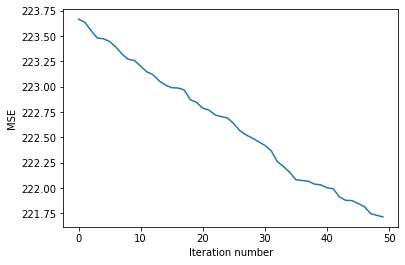

In [113]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

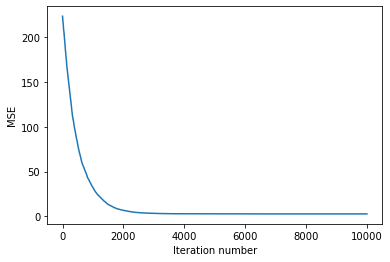

In [115]:
%pylab inline
plot(range(len(stoch_errors_by_iter_2)), stoch_errors_by_iter_2)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [116]:
stoch_grad_desc_weights

array([14.01961682,  3.94909052,  2.76783147, -0.04537642])

In [117]:
norm_eq_weights

array([14.0225    ,  3.91925365,  2.79206274, -0.02253861])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [118]:
stoch_errors_by_iter[-1]

2.786369048218392

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [119]:
answer4 = stoch_errors_by_iter[-1]# Ваш код здесь
print(round(answer4, 3))

2.786


In [124]:
with open('linreg_stochastic_grad_descent_4.txt', mode='w') as file:
    file.write(str(round(answer4, 3)))